In [3]:
import numpy as np
import pandas as pd
import librosa
# Load the VGGish model
def select_strongest_8_seconds(y, sr):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, trim=True)
    # Calculate the cumulative onset strength for each 8-second segment
    hop_length = 512
    frame_length = int(8 * sr / hop_length)
    onset_env_cumsum = np.cumsum(onset_env)
    max_strength = 0
    start_frame = 0

    for i in range(len(onset_env) - frame_length):
        strength = onset_env_cumsum[i + frame_length] - onset_env_cumsum[i]
        if strength > max_strength:
            max_strength = strength
            start_frame = i

    # Align the start of the 8-second segment with the nearest beat
    start_time = librosa.frames_to_time(start_frame, sr=sr, hop_length=hop_length)
    beat_times = librosa.frames_to_time(beats, sr=sr, hop_length=hop_length)

    if len(beat_times) > 0:
        nearest_beat_time = min(beat_times, key=lambda x: abs(x - start_time))
        start_time = nearest_beat_time

    end_time = start_time + 8
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    y_selected_seconds = y[start_sample:end_sample]
    return y_selected_seconds, start_time, end_time

In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import numpy as np
#
# # Load the CSV file
# file_path = 'final_dataset_13_genres_59_subgenres.csv'
# df = pd.read_csv(file_path)
#
# df


name                   artist  \
0     Clean White Noise - Loopable with no fade            Erik Eriksson   
1                          White Noise - 500 hz                 Granular   
2                          White Noise - 145 hz                 Granular   
3                                   Forest Rain          Rain Recordings   
4                           Quiet Rain in River  Stereo Outdoor Sampling   
...                                         ...                      ...   
4810                               Bla Bla Hard                Fast Rage   
4811                                      Clean   Sitte, MODUS STEIFHIGH   
4812                           Gefühl von Schön          Cracky Koksberg   
4813               Jetz is eh alles scheiß egal               Tekktonikk   
4814                           Coke In My Heart                 Schranze   

                  spotify_id  \
0     2bRKxuH1o7pTmb1y4GfdEc   
1     65rkHetZXO6DQmBh3C2YtW   
2     6H4B9gJD6eQlNoEh8q85pP   
3     6ADPydLM8fmi6fjO9ZXAb8   
4     2dz9Mx1pZKF2OLAPCr3AcC   
...                      ...   
4810  6TOTcAaGe5WJTTeb2u8qvt   
4811  1fXqV8Eyf3hjtmKlmo11MQ   
4812  687orBcQL4XP0Dnplk4POn   
4813  1bpoitSH1XChf4RvDRwVrd   
4814  0WJ4KOuoAraJZnYLkWRw6w   

                                                preview  \
0     https://p.scdn.co/mp3-preview/a97b75141d35d8a7...   
1     https://p.scdn.co/mp3-preview/0354dc1fcb7e3d31...   
2     https://p.scdn.co/mp3-preview/3e2362dc8f9bca1e...   
3     https://p.scdn.co/mp3-preview/de755e7a9e80353e...   
4     https://p.scdn.co/mp3-preview/bf4b72d6d3f8aeef...   
...                                                 ...   
4810                                                NaN   
4811                                                NaN   
4812                                                NaN   
4813                                                NaN   
4814                                                NaN   

                                                    img  danceability  \
0     https://i.scdn.co/image/ab67616d0000b273a9c080...        0.0000   
1     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
2     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
3     https://i.scdn.co/image/ab67616d0000b2737a1bdd...        0.0771   
4     https://i.scdn.co/image/ab67616d0000b27308ac37...        0.1660   
...                                                 ...           ...   
4810                                                NaN        0.6960   
4811                                                NaN        0.6450   
4812                                                NaN        0.5670   
4813                                                NaN        0.7360   
4814                                                NaN        0.7100   

       energy  loudness  speechiness  acousticness  ...  energy_artist  \
0     0.00342   -28.460       0.0000         0.791  ...       0.002697   
1     0.00005   -32.354       0.0000         0.923  ...       0.181767   
2     0.00002   -40.449       0.0000         0.944  ...       0.181767   
3     1.00000   -16.540       0.0508         0.902  ...       0.995500   
4     0.00133   -23.291       0.2150         0.125  ...       0.001330   
...       ...       ...          ...           ...  ...            ...   
4810  0.94500       NaN       0.1950           NaN  ...            NaN   
4811  0.78800       NaN       0.1810           NaN  ...            NaN   
4812  0.80400       NaN       0.0742           NaN  ...            NaN   
4813  0.91300       NaN       0.2020           NaN  ...            NaN   
4814  0.82900       NaN       0.0812           NaN  ...            NaN   

      instrumentalness_artist  liveness_artist  speechiness_artist  \
0                    1.000000         0.111000            0.000000   
1                    0.616077         0.170569            0.013223   
2                    0.616077         0.170569            0.

In [2]:
# # Ensure the 'genres' column is a list
# df['genres'] = df['genres'].apply(eval)
#
# # Create a new column for the exploded values
# df['exploded_genres'] = df['genres']
#
# # Explode the 'exploded_genres' column
# df_exploded = df.explode('exploded_genres')
# df_exploded

name                   artist  \
0     Clean White Noise - Loopable with no fade            Erik Eriksson   
1                          White Noise - 500 hz                 Granular   
2                          White Noise - 145 hz                 Granular   
3                                   Forest Rain          Rain Recordings   
4                           Quiet Rain in River  Stereo Outdoor Sampling   
...                                         ...                      ...   
4810                               Bla Bla Hard                Fast Rage   
4811                                      Clean   Sitte, MODUS STEIFHIGH   
4812                           Gefühl von Schön          Cracky Koksberg   
4813               Jetz is eh alles scheiß egal               Tekktonikk   
4814                           Coke In My Heart                 Schranze   

                  spotify_id  \
0     2bRKxuH1o7pTmb1y4GfdEc   
1     65rkHetZXO6DQmBh3C2YtW   
2     6H4B9gJD6eQlNoEh8q85pP   
3     6ADPydLM8fmi6fjO9ZXAb8   
4     2dz9Mx1pZKF2OLAPCr3AcC   
...                      ...   
4810  6TOTcAaGe5WJTTeb2u8qvt   
4811  1fXqV8Eyf3hjtmKlmo11MQ   
4812  687orBcQL4XP0Dnplk4POn   
4813  1bpoitSH1XChf4RvDRwVrd   
4814  0WJ4KOuoAraJZnYLkWRw6w   

                                                preview  \
0     https://p.scdn.co/mp3-preview/a97b75141d35d8a7...   
1     https://p.scdn.co/mp3-preview/0354dc1fcb7e3d31...   
2     https://p.scdn.co/mp3-preview/3e2362dc8f9bca1e...   
3     https://p.scdn.co/mp3-preview/de755e7a9e80353e...   
4     https://p.scdn.co/mp3-preview/bf4b72d6d3f8aeef...   
...                                                 ...   
4810                                                NaN   
4811                                                NaN   
4812                                                NaN   
4813                                                NaN   
4814                                                NaN   

                                                    img  danceability  \
0     https://i.scdn.co/image/ab67616d0000b273a9c080...        0.0000   
1     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
2     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
3     https://i.scdn.co/image/ab67616d0000b2737a1bdd...        0.0771   
4     https://i.scdn.co/image/ab67616d0000b27308ac37...        0.1660   
...                                                 ...           ...   
4810                                                NaN        0.6960   
4811                                                NaN        0.6450   
4812                                                NaN        0.5670   
4813                                                NaN        0.7360   
4814                                                NaN        0.7100   

       energy  loudness  speechiness  acousticness  ...  \
0     0.00342   -28.460       0.0000         0.791  ...   
1     0.00005   -32.354       0.0000         0.923  ...   
2     0.00002   -40.449       0.0000         0.944  ...   
3     1.00000   -16.540       0.0508         0.902  ...   
4     0.00133   -23.291       0.2150         0.125  ...   
...       ...       ...          ...           ...  ...   
4810  0.94500       NaN       0.1950           NaN  ...   
4811  0.78800       NaN       0.1810           NaN  ...   
4812  0.80400       NaN       0.0742           NaN  ...   
4813  0.91300       NaN       0.2020           NaN  ...   
4814  0.82900       NaN       0.0812           NaN  ...   

      instrumentalness_artist  liveness_artist  speechiness_artist  \
0                    1.000000         0.111000            0.000000   
1                    0.616077         0.170569            0.013223   
2                    0.616077         0.170569            0.013223   
3                    0.779000         0.770000            0.049900   
4                    0.846000         0.233000            0.215000   
...                       ... 

In [3]:
# # Group by the 'genres' column and get the size of each group
# grouped = df_exploded.groupby('exploded_genres').size()
#
# # Sort the groups by size in descending order
# sorted_grouped = grouped.sort_values(ascending=False)
#
# # Display the sorted sizes of each group
# sorted_grouped

exploded_genres
rock                     592
pop                      547
rap                      490
alternative metal        482
country                  427
r&b                      402
contemporary country     386
country road             358
hip hop                  350
nu metal                 323
dance pop                312
latin pop                261
modern rock              254
alternative rock         250
edm                      219
trap                     206
hard rock                204
pop rap                  197
contemporary r&b         173
sleep                    137
musica mexicana          131
classic rock             125
gangster rap             124
soul                     117
classical                110
electro house            108
metal                     99
neo soul                  94
eurodance                 92
reggae fusion             90
environmental             89
mexican pop               88
tropical                  78
alternative r&b           7

In [4]:
# # Convert the list of genres to a string representation
# df['genres_str'] = df['genres'].apply(str)
#
# # Group by the string representation of genres and get the size of each group
# grouped = df.groupby('genres_str').size()
#
# # Sort the groups by size in descending order
# sorted_grouped = grouped.sort_values(ascending=False)
#
# # Display the sorted sizes of each group
# sorted_grouped

genres_str
['contemporary country', 'country', 'country road']    288
['pop']                                                179
['dance pop', 'pop']                                   138
['musica mexicana']                                    117
['alternative metal', 'nu metal', 'rock']              110
                                                      ... 
['bachata', 'tropical']                                  1
['dance pop', 'pop rap', 'reggae fusion']                1
['contemporary r&b', 'neo soul']                         1
['pop', 'reggae fusion']                                 1
['edm', 'house']                                         1
Length: 203, dtype: int64

In [6]:
# import pandas as pd
# import numpy as np
#
# # Ensure the 'genres' column is a list
# df['genres_str'] = df['genres_str'].apply(eval)
#
# # Create a set of all unique genres
# unique_genres = set(genre for sublist in df['genres_str'] for genre in sublist)
#
# # Convert the set to a list
# unique_genres_list = list(unique_genres)
#
# # Create a DataFrame with one-hot encoded columns for each genre
# one_hot_encoded_genres = pd.DataFrame(0, index=df.index, columns=unique_genres_list)
#
# # Fill the one-hot encoded DataFrame
# for i, genres in enumerate(df['genres_str']):
#     one_hot_encoded_genres.loc[i, genres] = 1
#
# # Combine the one-hot encoded columns into a single column with arrays
# df['genre_array2'] = one_hot_encoded_genres.apply(lambda row: np.array(row.values), axis=1)
#
# df

name                   artist  \
0     Clean White Noise - Loopable with no fade            Erik Eriksson   
1                          White Noise - 500 hz                 Granular   
2                          White Noise - 145 hz                 Granular   
3                                   Forest Rain          Rain Recordings   
4                           Quiet Rain in River  Stereo Outdoor Sampling   
...                                         ...                      ...   
4810                               Bla Bla Hard                Fast Rage   
4811                                      Clean   Sitte, MODUS STEIFHIGH   
4812                           Gefühl von Schön          Cracky Koksberg   
4813               Jetz is eh alles scheiß egal               Tekktonikk   
4814                           Coke In My Heart                 Schranze   

                  spotify_id  \
0     2bRKxuH1o7pTmb1y4GfdEc   
1     65rkHetZXO6DQmBh3C2YtW   
2     6H4B9gJD6eQlNoEh8q85pP   
3     6ADPydLM8fmi6fjO9ZXAb8   
4     2dz9Mx1pZKF2OLAPCr3AcC   
...                      ...   
4810  6TOTcAaGe5WJTTeb2u8qvt   
4811  1fXqV8Eyf3hjtmKlmo11MQ   
4812  687orBcQL4XP0Dnplk4POn   
4813  1bpoitSH1XChf4RvDRwVrd   
4814  0WJ4KOuoAraJZnYLkWRw6w   

                                                preview  \
0     https://p.scdn.co/mp3-preview/a97b75141d35d8a7...   
1     https://p.scdn.co/mp3-preview/0354dc1fcb7e3d31...   
2     https://p.scdn.co/mp3-preview/3e2362dc8f9bca1e...   
3     https://p.scdn.co/mp3-preview/de755e7a9e80353e...   
4     https://p.scdn.co/mp3-preview/bf4b72d6d3f8aeef...   
...                                                 ...   
4810                                                NaN   
4811                                                NaN   
4812                                                NaN   
4813                                                NaN   
4814                                                NaN   

                                                    img  danceability  \
0     https://i.scdn.co/image/ab67616d0000b273a9c080...        0.0000   
1     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
2     https://i.scdn.co/image/ab67616d0000b273bce4fa...        0.0000   
3     https://i.scdn.co/image/ab67616d0000b2737a1bdd...        0.0771   
4     https://i.scdn.co/image/ab67616d0000b27308ac37...        0.1660   
...                                                 ...           ...   
4810                                                NaN        0.6960   
4811                                                NaN        0.6450   
4812                                                NaN        0.5670   
4813                                                NaN        0.7360   
4814                                                NaN        0.7100   

       energy  loudness  speechiness  acousticness  ...  liveness_artist  \
0     0.00342   -28.460       0.0000         0.791  ...         0.111000   
1     0.00005   -32.354       0.0000         0.923  ...         0.170569   
2     0.00002   -40.449       0.0000         0.944  ...         0.170569   
3     1.00000   -16.540       0.0508         0.902  ...         0.770000   
4     0.00133   -23.291       0.2150         0.125  ...         0.233000   
...       ...       ...          ...           ...  ...              ...   
4810  0.94500       NaN       0.1950           NaN  ...              NaN   
4811  0.78800       NaN       0.1810           NaN  ...              NaN   
4812  0.80400       NaN       0.0742           NaN  ...              NaN   
4813  0.91300       NaN       0.2020           NaN  ...              NaN   
4814  0.82900       NaN       0.0812           NaN  ...              NaN   

      speechiness_artist  valence_artist  \
0               0.000000        0.000000   
1               0.013223        0.013956   
2               0.013223        0.013956   
3               0.049900        0.011255   
4               0.215000  

In [7]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
#
# # Convert the list of genres to a string representation
# df['genres_str'] = df['genres'].apply(str)
#
# # Group by the string representation of genres and get the size of each group
# grouped = df.groupby('genres_str').size()
#
# # Split the groups by size
# large_groups = grouped[grouped > 2].index
# small_groups = grouped[grouped <= 2].index
#
# # Create separate DataFrames for large and small groups
# large_groups_df = df[df['genres_str'].isin(large_groups)]
# small_groups_df = df[df['genres_str'].isin(small_groups)]
#
# # Perform stratified split on large groups
# train_large, temp_large = train_test_split(large_groups_df, test_size=0.3, stratify=large_groups_df['genres_str'], random_state=42)
#
# # Ensure each class in temp_large has at least 2 samples
# temp_large = temp_large.groupby('genres_str').filter(lambda x: len(x) > 1)
#
# # Perform stratified split on temp_large
# val_large, test_large = train_test_split(temp_large, test_size=0.6, stratify=temp_large['genres_str'], random_state=42)
#
# # Combine small groups with the train set
# train_df = pd.concat([train_large, small_groups_df])
# val_df = val_large
# test_df = test_large
#
# # Display the sizes of the train, validation, and test sets
# print(f'Train set size: {train_df.shape[0]}')
# print(f'Validation set size: {val_df.shape[0]}')
# print(f'Test set size: {test_df.shape[0]}')

Train set size: 3381
Validation set size: 562
Test set size: 844


In [13]:
# # Drop the 'exploded_genres' column in all DataFrames
# train_df = train_df.drop(columns=['exploded_genres'])
# val_df = val_df.drop(columns=['exploded_genres'])
# test_df = test_df.drop(columns=['exploded_genres'])


In [14]:
# train_df

name  \
4175                                              Lo/Hi   
2663  Gang Up (with Young Thug, 2 Chainz & Wiz Khali...   
1055                                         I Remember   
632                                                GIRL   
2983                 Everybody Dies In Their Nightmares   
...                                                 ...   
3718                                      Dance Tonight   
3728                           2 On (feat. ScHoolboy Q)   
3846                     Police On My Back - Remastered   
3910                                         Simple Man   
4176                                         Simple Man   

                        artist              spotify_id  \
4175            The Black Keys  25YlltWXRb9k7KbrEBRuhJ   
2663                Young Thug  5PfTI3zrQbZEWcQdycMqJM   
1055                   Kaskade  62h4GYm6aTqS0dsfJtKYIX   
632               Maren Morris  0pGXe7umwkcCm01Ipoxp0U   
2983              XXXTENTACION  3GVkPk8mqxz0itaAriG1L7   
...                        ...                     ...   
3718                Lucy Pearl  1TwVcKR6JojvPwBGbWZT36   
3728                   Tinashe  3jVtllWS5CFFWLQng8sKsr   
3846                 The Clash  3lILuFinx7CFaYXJ6FWz54   
3910  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   
4176  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   

                                                preview  \
4175  https://p.scdn.co/mp3-preview/438a89dc507d840a...   
2663  https://p.scdn.co/mp3-preview/4e83b0f87ce913bf...   
1055  https://p.scdn.co/mp3-preview/36d3fe192233e081...   
632   https://p.scdn.co/mp3-preview/41e1f8fd180e5bf8...   
2983  https://p.scdn.co/mp3-preview/5ba73af0f120ffd1...   
...                                                 ...   
3718  https://p.scdn.co/mp3-preview/2cb93c262953b307...   
3728  https://p.scdn.co/mp3-preview/f282a42fdb44e524...   
3846  https://p.scdn.co/mp3-preview/9d451684d9206ff5...   
3910  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   
4176  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   

                                                    img  danceability  energy  \
4175  https://i.scdn.co/image/ab67616d0000b27326ff57...         0.606   0.679   
2663  https://i.scdn.co/image/ab67616d0000b2737d7076...         0.631   0.732   
1055  https://i.scdn.co/image/ab67616d0000b273eb53ec...         0.672   0.592   
632   https://i.scdn.co/image/ab67616d0000b273f46b5e...         0.440   0.793   
2983  https://i.scdn.co/image/ab67616d0000b273203c89...         0.734   0.570   
...                                                 ...           ...     ...   
3718  https://i.scdn.co/image/ab67616d0000b2737faa44...         0.787   0.425   
3728  https://i.scdn.co/image/ab67616d0000b27341f53c...         0.742   0.595   
3846  https://i.scdn.co/image/ab67616d0000b273279186...         0.554   0.853   
3910  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   
4176  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   

      loudness  speechiness  acousticness  ...  instrumentalness_artist  \
4175    -7.445       0.0321      0.015100  ...             1.065460e-01   
2663    -4.706       0.2030      0.030400  ...             1.336270e-05   
1055    -7.189       0.0311      0.158000  ...             1.885232e-01   
632     -3.950       0.0501      0.067700  ...             7.714286e-07   
2983    -7.066       0.1330      0.847000  ...             3.096825e-02   
...        ...          ...           ...  ...                      ...   
3718    -5.692       0.0641      0.006370  ...             5.305714e-04   
3728    -7.510       0.1070      0.150000  ...             5.227734e-03   
3846    -6.712       0.0406      0.000631  ...             9.750639e-02   
3910   -13.076       0.0494      0.654000  ...             4.194268e-02   
4176   -13.076       0.0494      0.654000  ...             4.194268e-02   

      liveness_artist  speechiness_artist  valence_artist  \
4

In [15]:
# # # Save the train, validation, and test sets to CSV files
# train_df.to_csv('train_set_final_13main_59sub_genres.csv', index=False)
# val_df.to_csv('validation_set_final_13main_59sub_genres.csv', index=False)
# test_df.to_csv('test_set_final_13main_59sub_genres.csv', index=False)

In [1]:
import pandas as pd

# Load the train, validation, and test sets from CSV files
train_df = pd.read_csv('train_set_final_13main_59sub_genres.csv')
val_df = pd.read_csv('validation_set_final_13main_59sub_genres.csv')
test_df = pd.read_csv('test_set_final_13main_59sub_genres.csv')

# Display the first few rows of each DataFrame to verify


In [2]:
train_df

name  \
0                                                 Lo/Hi   
1     Gang Up (with Young Thug, 2 Chainz & Wiz Khali...   
2                                            I Remember   
3                                                  GIRL   
4                    Everybody Dies In Their Nightmares   
...                                                 ...   
3376                                      Dance Tonight   
3377                           2 On (feat. ScHoolboy Q)   
3378                     Police On My Back - Remastered   
3379                                         Simple Man   
3380                                         Simple Man   

                        artist              spotify_id  \
0               The Black Keys  25YlltWXRb9k7KbrEBRuhJ   
1                   Young Thug  5PfTI3zrQbZEWcQdycMqJM   
2                      Kaskade  62h4GYm6aTqS0dsfJtKYIX   
3                 Maren Morris  0pGXe7umwkcCm01Ipoxp0U   
4                 XXXTENTACION  3GVkPk8mqxz0itaAriG1L7   
...                        ...                     ...   
3376                Lucy Pearl  1TwVcKR6JojvPwBGbWZT36   
3377                   Tinashe  3jVtllWS5CFFWLQng8sKsr   
3378                 The Clash  3lILuFinx7CFaYXJ6FWz54   
3379  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   
3380  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   

                                                preview  \
0     https://p.scdn.co/mp3-preview/438a89dc507d840a...   
1     https://p.scdn.co/mp3-preview/4e83b0f87ce913bf...   
2     https://p.scdn.co/mp3-preview/36d3fe192233e081...   
3     https://p.scdn.co/mp3-preview/41e1f8fd180e5bf8...   
4     https://p.scdn.co/mp3-preview/5ba73af0f120ffd1...   
...                                                 ...   
3376  https://p.scdn.co/mp3-preview/2cb93c262953b307...   
3377  https://p.scdn.co/mp3-preview/f282a42fdb44e524...   
3378  https://p.scdn.co/mp3-preview/9d451684d9206ff5...   
3379  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   
3380  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   

                                                    img  danceability  energy  \
0     https://i.scdn.co/image/ab67616d0000b27326ff57...         0.606   0.679   
1     https://i.scdn.co/image/ab67616d0000b2737d7076...         0.631   0.732   
2     https://i.scdn.co/image/ab67616d0000b273eb53ec...         0.672   0.592   
3     https://i.scdn.co/image/ab67616d0000b273f46b5e...         0.440   0.793   
4     https://i.scdn.co/image/ab67616d0000b273203c89...         0.734   0.570   
...                                                 ...           ...     ...   
3376  https://i.scdn.co/image/ab67616d0000b2737faa44...         0.787   0.425   
3377  https://i.scdn.co/image/ab67616d0000b27341f53c...         0.742   0.595   
3378  https://i.scdn.co/image/ab67616d0000b273279186...         0.554   0.853   
3379  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   
3380  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   

      loudness  speechiness  acousticness  ...  instrumentalness_artist  \
0       -7.445       0.0321      0.015100  ...             1.065460e-01   
1       -4.706       0.2030      0.030400  ...             1.336270e-05   
2       -7.189       0.0311      0.158000  ...             1.885232e-01   
3       -3.950       0.0501      0.067700  ...             7.714286e-07   
4       -7.066       0.1330      0.847000  ...             3.096825e-02   
...        ...          ...           ...  ...                      ...   
3376    -5.692       0.0641      0.006370  ...             5.305714e-04   
3377    -7.510       0.1070      0.150000  ...             5.227734e-03   
3378    -6.712       0.0406      0.000631  ...             9.750639e-02   
3379   -13.076       0.0494      0.654000  ...             4.194268e-02   
3380   -13.076       0.0494      0.654000  ...             4.194268e-02   

      liveness_artist  speechiness_artist  valence_artist  \
0

In [13]:
import numpy as np
import pandas as pd

# Function to convert a saved string back to a NumPy array
def convert_genre_array(saved_str):
    cleaned_str = saved_str.replace("[", "").replace("]", "").replace("\n", " ")
    array_list = list(map(int, cleaned_str.split()))
    return np.array(array_list)

# List of all datasets to modify
datasets = [train_df, test_df, val_df]  # Add any other datasets you have

# Apply conversion to all datasets
for df in datasets:
    df["genre_array2"] = df["genre_array2"].apply(convert_genre_array)

# ✅ Now, genre_array2 contains proper NumPy arrays!

In [14]:
train_df


name  \
0                                                 Lo/Hi   
1     Gang Up (with Young Thug, 2 Chainz & Wiz Khali...   
2                                            I Remember   
3                                                  GIRL   
4                    Everybody Dies In Their Nightmares   
...                                                 ...   
3376                                      Dance Tonight   
3377                           2 On (feat. ScHoolboy Q)   
3378                     Police On My Back - Remastered   
3379                                         Simple Man   
3380                                         Simple Man   

                        artist              spotify_id  \
0               The Black Keys  25YlltWXRb9k7KbrEBRuhJ   
1                   Young Thug  5PfTI3zrQbZEWcQdycMqJM   
2                      Kaskade  62h4GYm6aTqS0dsfJtKYIX   
3                 Maren Morris  0pGXe7umwkcCm01Ipoxp0U   
4                 XXXTENTACION  3GVkPk8mqxz0itaAriG1L7   
...                        ...                     ...   
3376                Lucy Pearl  1TwVcKR6JojvPwBGbWZT36   
3377                   Tinashe  3jVtllWS5CFFWLQng8sKsr   
3378                 The Clash  3lILuFinx7CFaYXJ6FWz54   
3379  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   
3380  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   

                                                preview  \
0     https://p.scdn.co/mp3-preview/438a89dc507d840a...   
1     https://p.scdn.co/mp3-preview/4e83b0f87ce913bf...   
2     https://p.scdn.co/mp3-preview/36d3fe192233e081...   
3     https://p.scdn.co/mp3-preview/41e1f8fd180e5bf8...   
4     https://p.scdn.co/mp3-preview/5ba73af0f120ffd1...   
...                                                 ...   
3376  https://p.scdn.co/mp3-preview/2cb93c262953b307...   
3377  https://p.scdn.co/mp3-preview/f282a42fdb44e524...   
3378  https://p.scdn.co/mp3-preview/9d451684d9206ff5...   
3379  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   
3380  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   

                                                    img  danceability  energy  \
0     https://i.scdn.co/image/ab67616d0000b27326ff57...         0.606   0.679   
1     https://i.scdn.co/image/ab67616d0000b2737d7076...         0.631   0.732   
2     https://i.scdn.co/image/ab67616d0000b273eb53ec...         0.672   0.592   
3     https://i.scdn.co/image/ab67616d0000b273f46b5e...         0.440   0.793   
4     https://i.scdn.co/image/ab67616d0000b273203c89...         0.734   0.570   
...                                                 ...           ...     ...   
3376  https://i.scdn.co/image/ab67616d0000b2737faa44...         0.787   0.425   
3377  https://i.scdn.co/image/ab67616d0000b27341f53c...         0.742   0.595   
3378  https://i.scdn.co/image/ab67616d0000b273279186...         0.554   0.853   
3379  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   
3380  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   

      loudness  speechiness  acousticness  ...  instrumentalness_artist  \
0       -7.445       0.0321      0.015100  ...             1.065460e-01   
1       -4.706       0.2030      0.030400  ...             1.336270e-05   
2       -7.189       0.0311      0.158000  ...             1.885232e-01   
3       -3.950       0.0501      0.067700  ...             7.714286e-07   
4       -7.066       0.1330      0.847000  ...             3.096825e-02   
...        ...          ...           ...  ...                      ...   
3376    -5.692       0.0641      0.006370  ...             5.305714e-04   
3377    -7.510       0.1070      0.150000  ...             5.227734e-03   
3378    -6.712       0.0406      0.000631  ...             9.750639e-02   
3379   -13.076       0.0494      0.654000  ...             4.194268e-02   
3380   -13.076       0.0494      0.654000  ...             4.194268e-02   

      liveness_artist  speechiness_artist  valence_artist  \
0

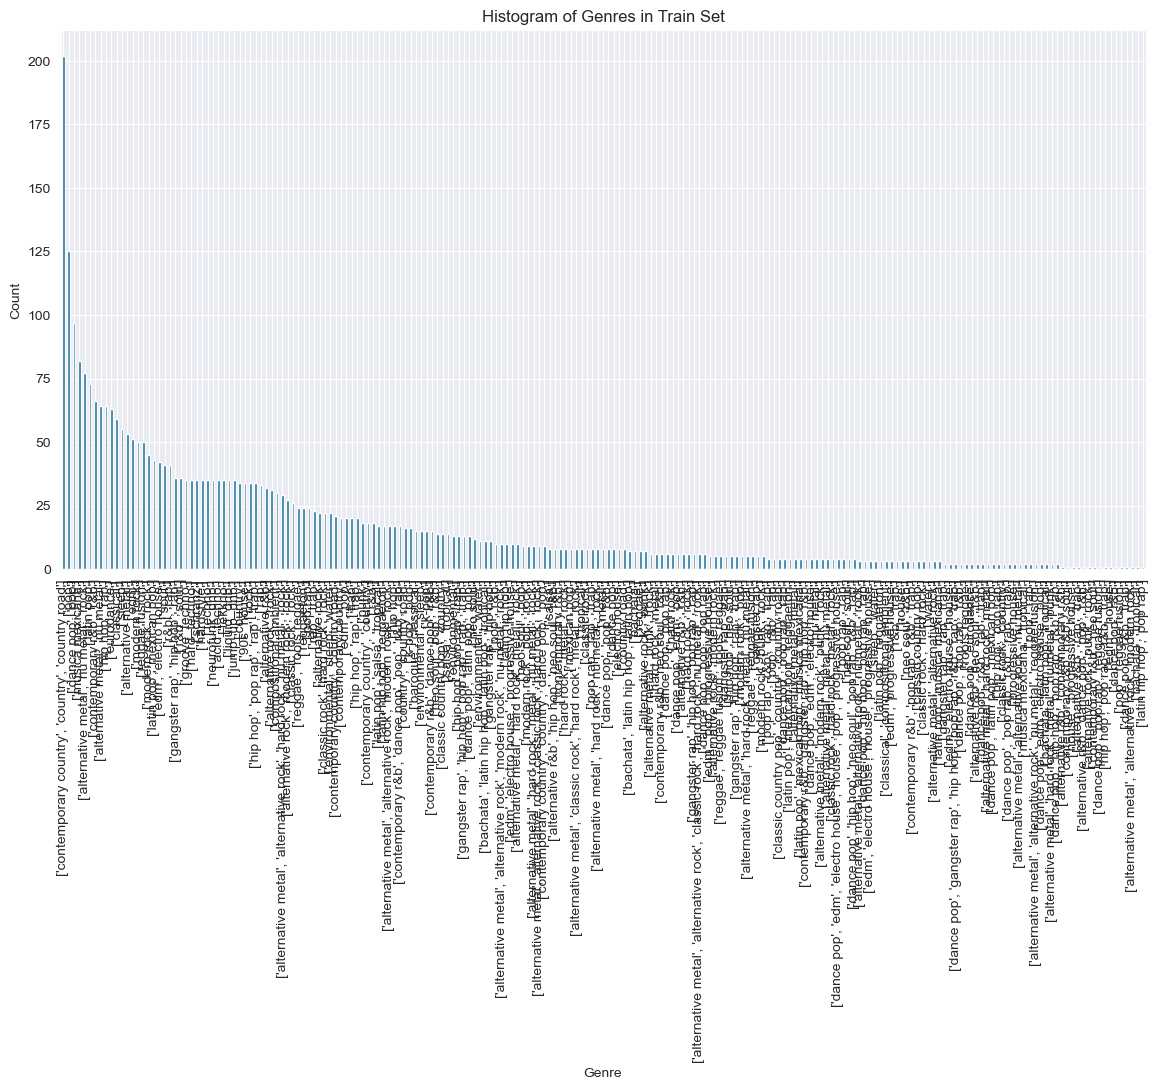

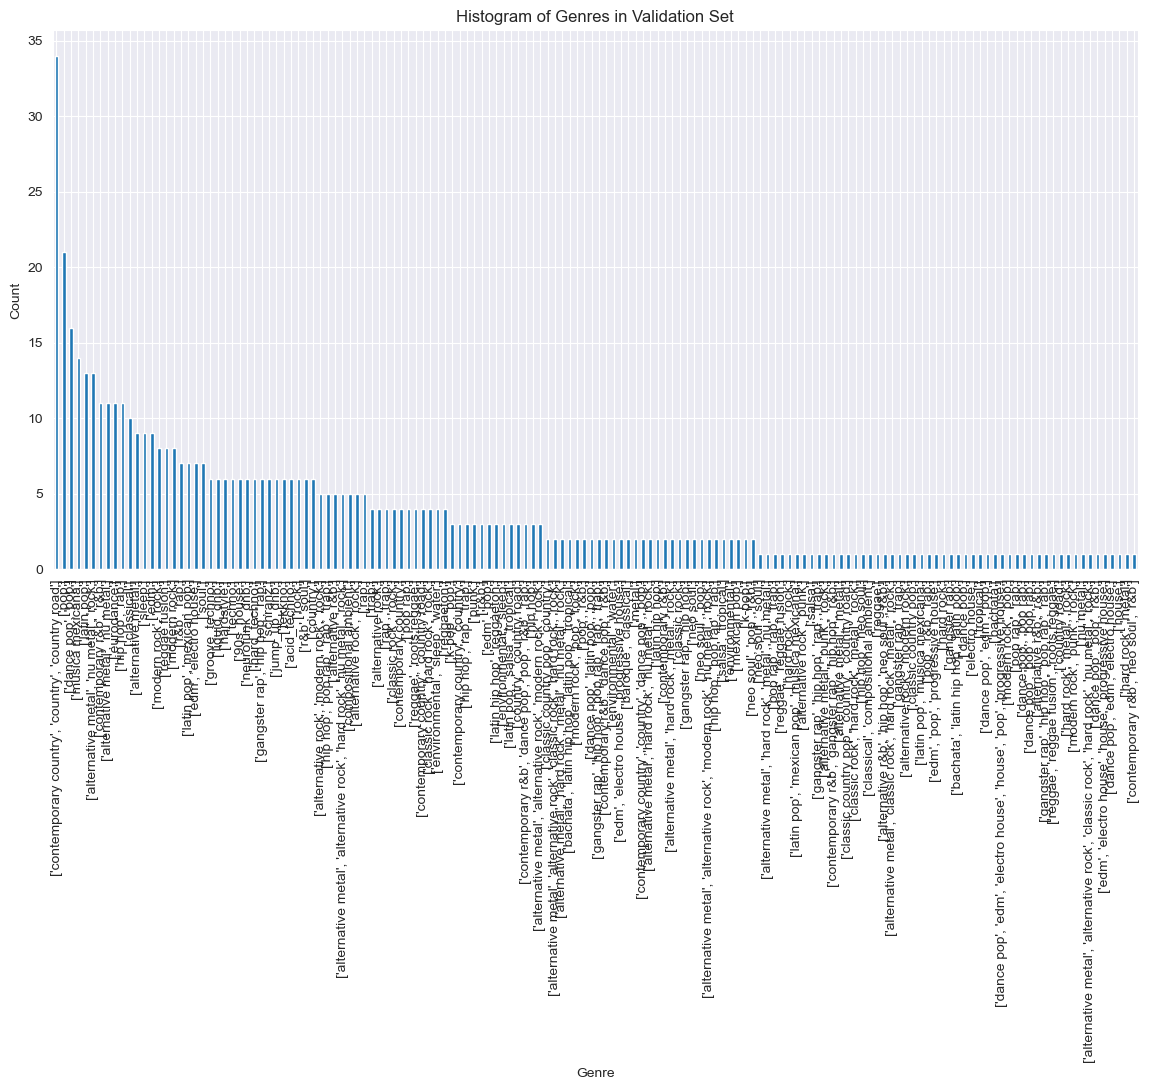

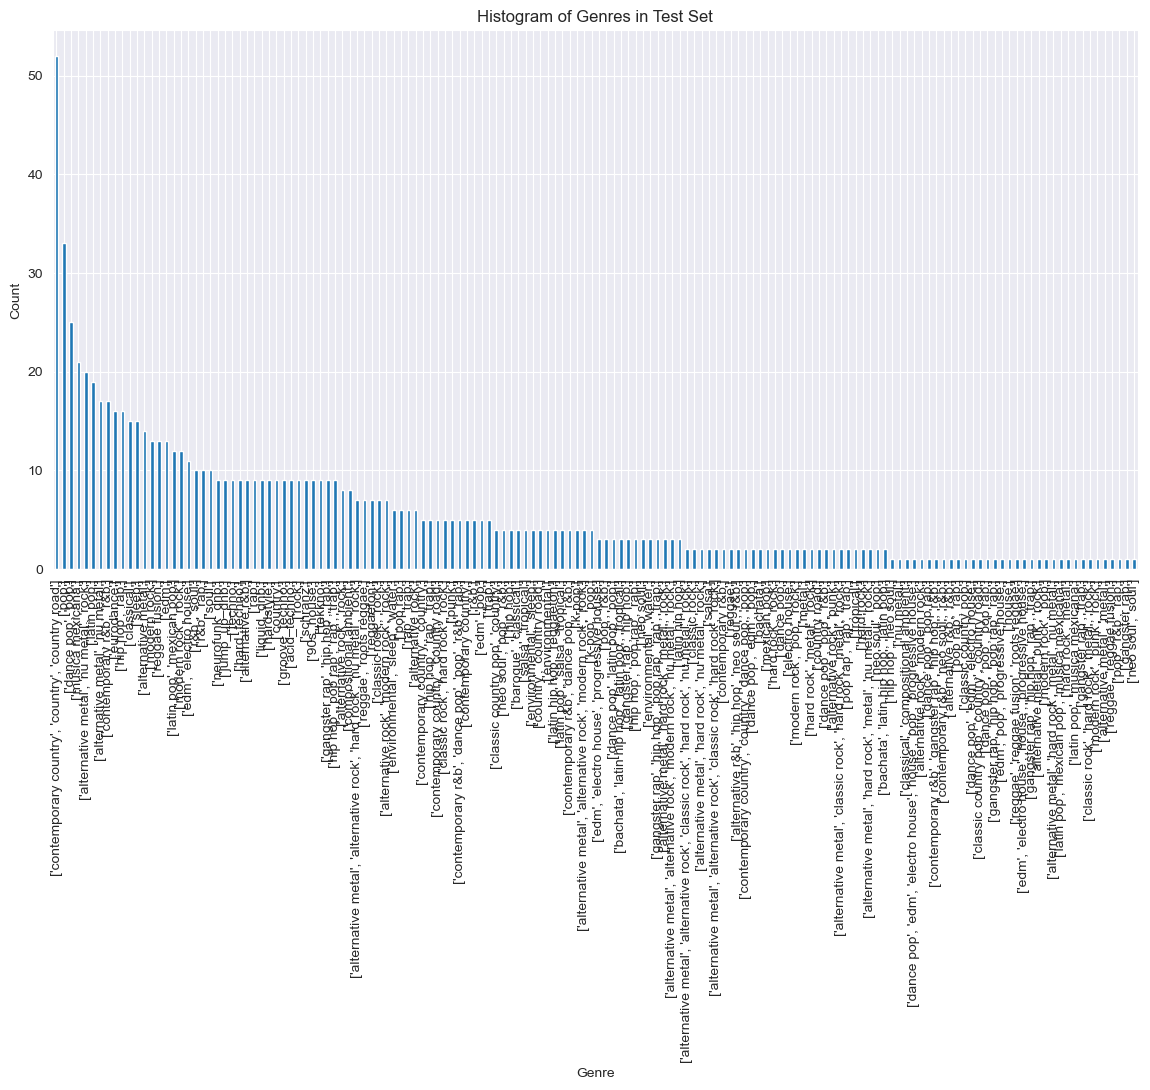

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of genres in the train set
plt.figure(figsize=(14, 7))
train_df['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Genres in Train Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of genres in the validation set
plt.figure(figsize=(14, 7))
val_df['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Genres in Validation Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of genres in the test set
plt.figure(figsize=(14, 7))
test_df['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Genres in Test Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

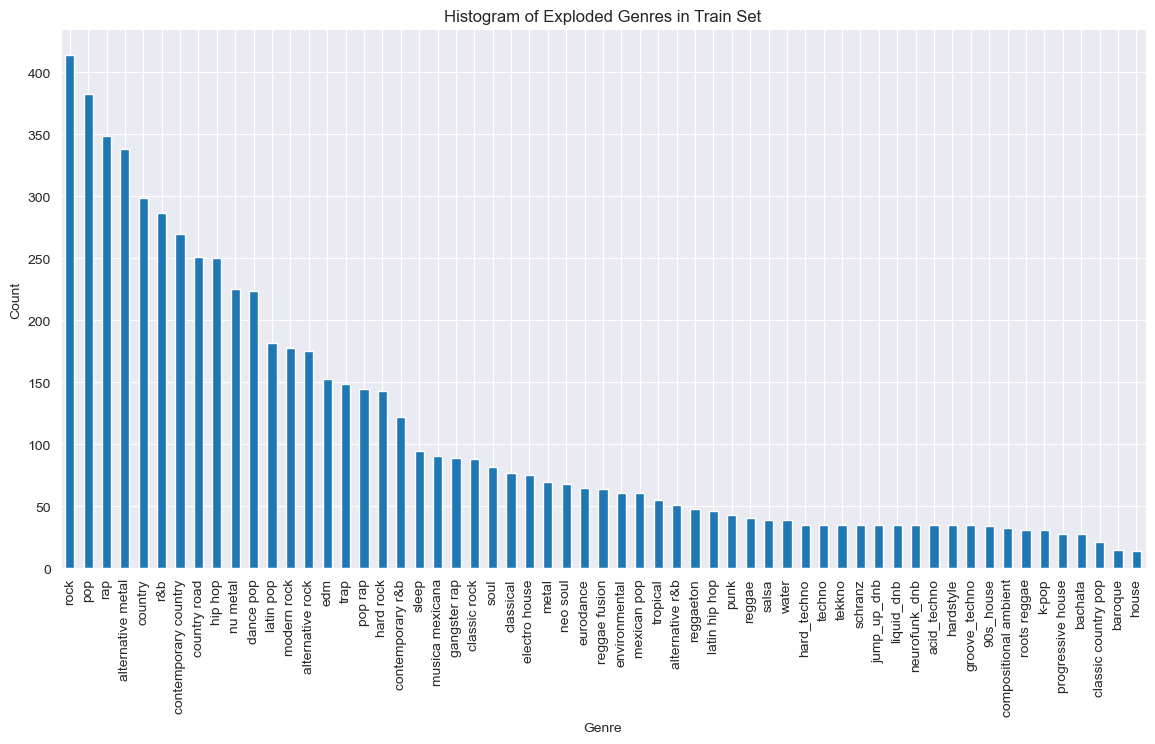

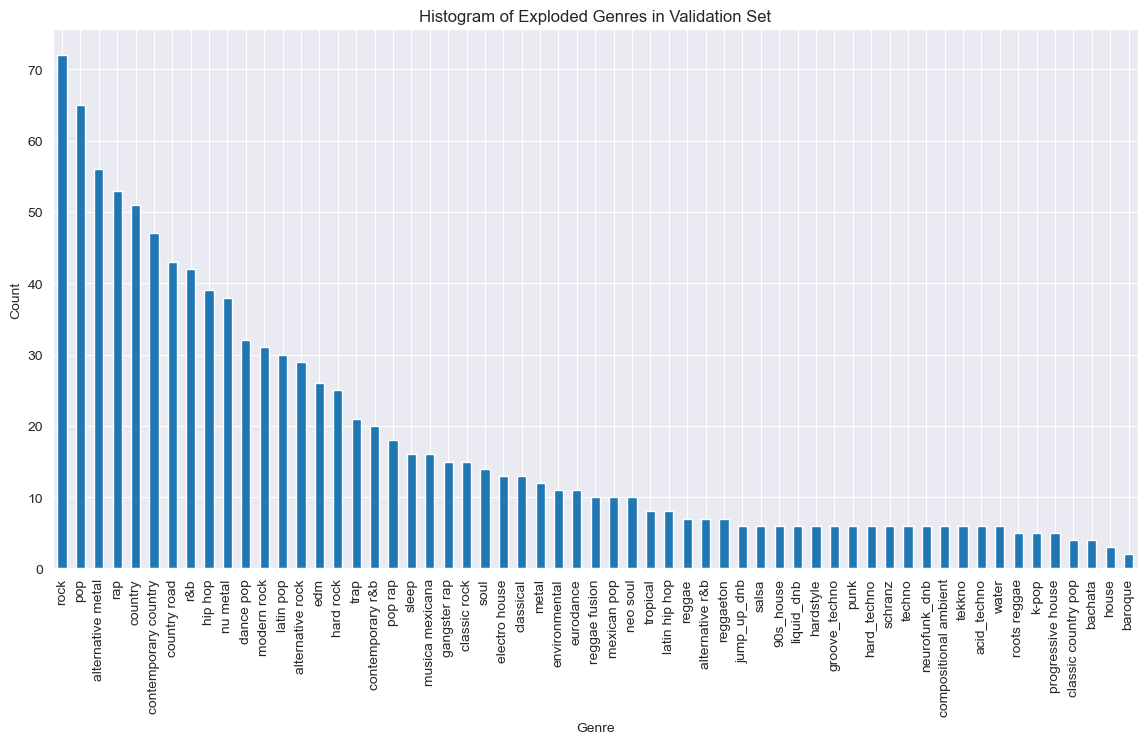

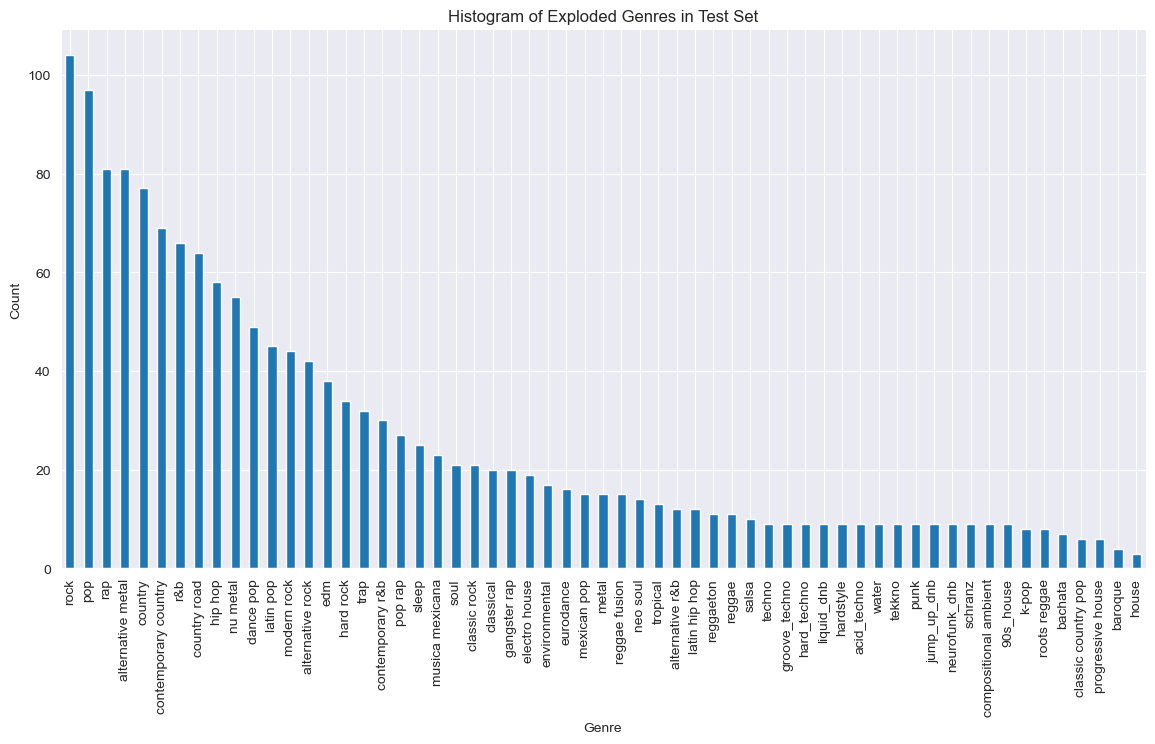

In [16]:
import matplotlib.pyplot as plt


# Ensure the 'genres' column is a list
train_df['genres_str'] = train_df['genres_str'].apply(eval)
val_df['genres_str'] = val_df['genres_str'].apply(eval)
test_df['genres_str'] = test_df['genres_str'].apply(eval)

# Explode the 'genres' column in each split
train_exploded = train_df.explode('genres_str')
val_exploded = val_df.explode('genres_str')
test_exploded = test_df.explode('genres_str')

# Plot the distribution of exploded genres in the train set
plt.figure(figsize=(14, 7))
train_exploded['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Train Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the validation set
plt.figure(figsize=(14, 7))
val_exploded['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Validation Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the test set
plt.figure(figsize=(14, 7))
test_exploded['genres_str'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Test Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
#TODO eliminovat main genre z one hot encodingu alebo ich nejak cropnut nech to neje tak imbalanced

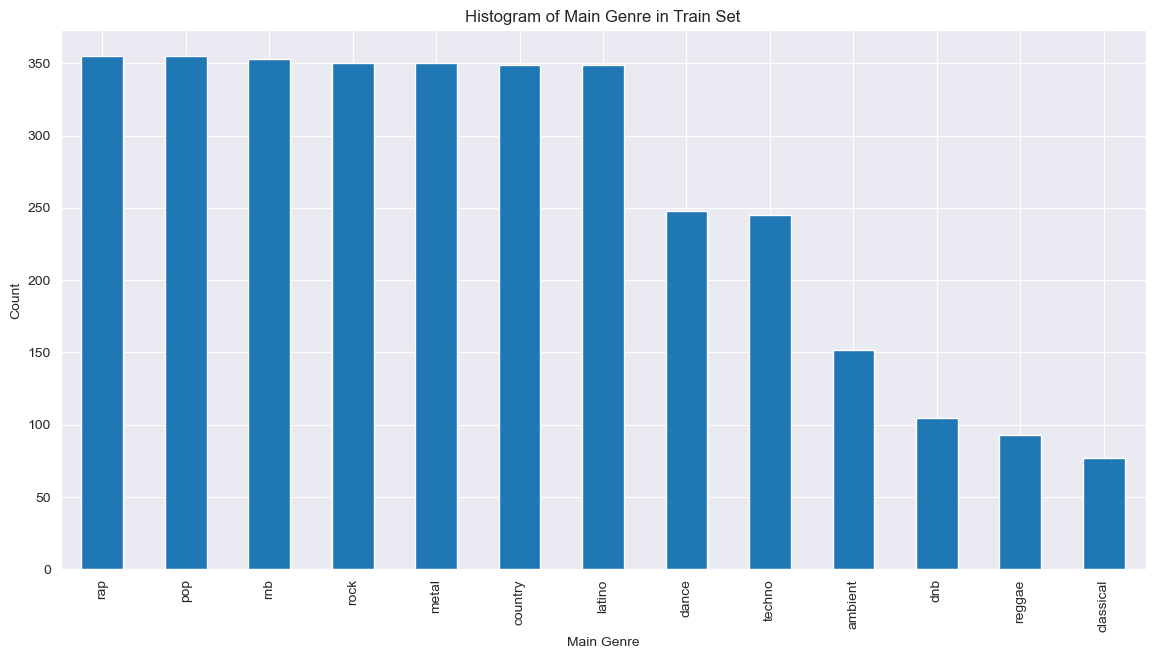

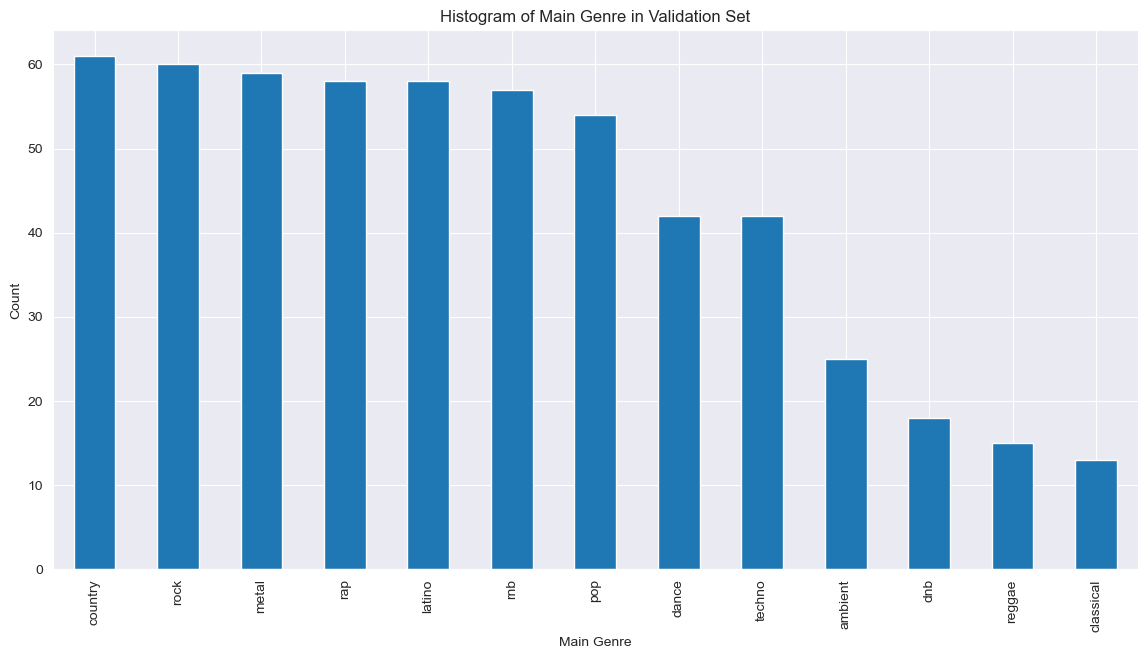

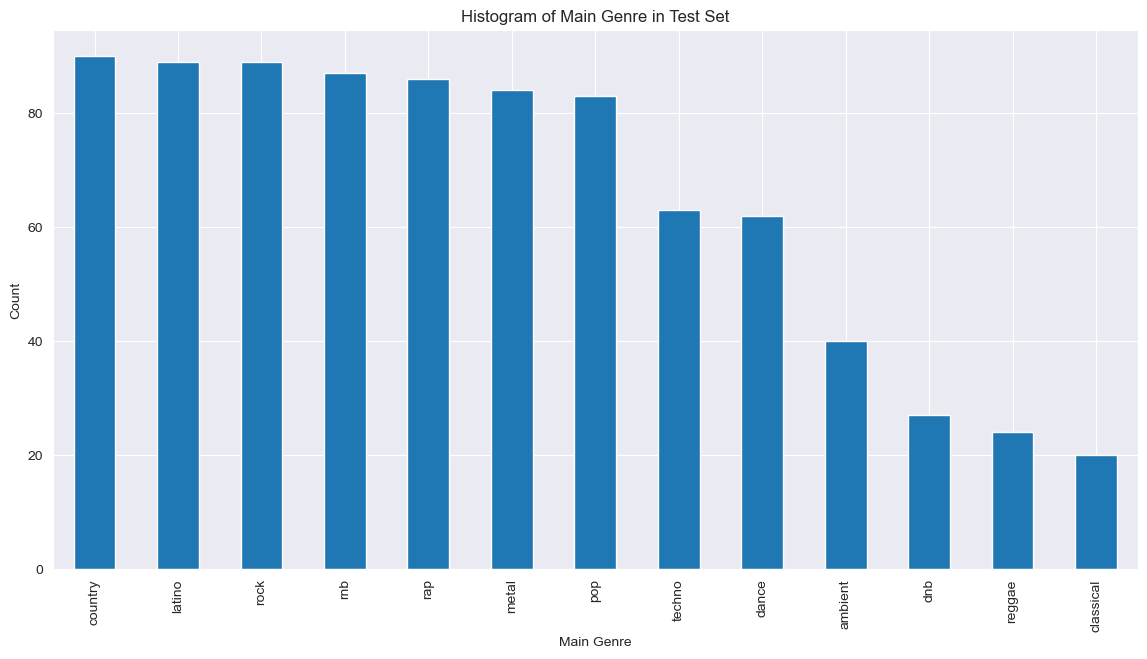

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of main_genre in the train set
plt.figure(figsize=(14, 7))
train_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Main Genre in Train Set')
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of main_genre in the validation set
plt.figure(figsize=(14, 7))
val_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Main Genre in Validation Set')
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of main_genre in the test set
plt.figure(figsize=(14, 7))
test_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Main Genre in Test Set')
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Check the size of the 'genre_array2' column in each DataFrame
print(f"Size of 'genre_array2' in train_df: {train_df['genre_array2'].apply(len).unique()}")
print(f"Size of 'genre_array2' in val_df: {val_df['genre_array2'].apply(len).unique()}")
print(f"Size of 'genre_array2' in test_df: {test_df['genre_array2'].apply(len).unique()}")

Size of 'genre_array2' in train_df: [59]
Size of 'genre_array2' in val_df: [59]
Size of 'genre_array2' in test_df: [59]


In [23]:
from __future__ import print_function

from random import shuffle

import numpy as np
import tensorflow.compat.v1 as tf
import tf_slim as slim

import vggish_input
import vggish_params
import vggish_slim

tf.disable_eager_execution()
flags = tf.app.flags

flags.DEFINE_integer(
    'num_batches', int(3380/5),
    'Number of batches of examples to feed into the model. Each batch is of '
    'variable size and contains shuffled examples of each class of audio.')

flags.DEFINE_boolean(
    'train_vggish', True,
    'If True, allow VGGish parameters to change during training, thus '
    'fine-tuning VGGish. If False, VGGish parameters are fixed, thus using '
    'VGGish as a fixed feature extractor.')

flags.DEFINE_string(
    'checkpoint', 'vggish_model.ckpt',
    'Path to the VGGish checkpoint file.')

FLAGS = flags.FLAGS

_NUM_CLASSES = 59



2025-03-13 17:18:37.604046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import tqdm
current_index = 0
def _get_examples_batch(traindf, batch_size):
    features = []
    labels = []
    global current_index

    for _ in tqdm.tqdm(range(batch_size)):
        if current_index >= 3380:
            print("SETTING CURRENT INDEX TO 0")
            current_index = 0  # Reset index if it exceeds the dataframe length

        song_path = traindf.iloc[current_index]['file_path']
        label = np.array(traindf.iloc[current_index]['genre_array2']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)

        for example in examples:
            features.append(example)
            labels.append(np.array(label))

        current_index += 1

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    print("Current index: ",current_index)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [20]:
import tqdm
def _get_examples_batch_validation(data):
    features = []
    labels = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        label = np.array(data.iloc[i]['genre_array2']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)
        if len(examples) != 8:
            print(f"Count of spectograms from this song {song_path} is different then 8. And it is of size :  ", len(examples))
        for example in examples:
            features.append(example)
            labels.append(np.array(label))

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [21]:
import tqdm
def _get_examples_batch_test(data):
    features = []
    labels = []
    file_paths = []
    genres = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        genre = data.iloc[i]['genres_str']
        label = np.array(data.iloc[i]['genre_array2']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)
        if len(examples) != 8:
            print(f"Count of spectograms from this song {song_path} is different then 8. And it is of size :  ", len(examples))
        for example in examples:
            features.append(example)
            labels.append(np.array(label))
            file_paths.append(song_path)
            genres.append(genre)
    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels, file_paths, genres))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _, _, _) in labeled_examples]
    labels = [label for (_, label, _, _) in labeled_examples]
    file_paths = [file_path for (_, _, file_path, _) in labeled_examples]
    genres = [genre for (_, _, _, genre) in labeled_examples]
    return (features, labels, file_paths, genres)

In [24]:
x = _get_examples_batch(train_df,5)
print(len(x[0]))

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

Current index:  5
40


In [20]:
f,l = x

In [31]:
l.shape()

AttributeError: 'list' object has no attribute 'shape'

In [25]:
current_index = 0
current_index

0

In [26]:
from tensorflow.compat.v1.graph_util import convert_variables_to_constants
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_losses = []
train_accuracies = []
train_f1_micors = []

val_losses = []
val_f1micro = []

threshold = 0.2  # Adjust based on validation performance

def save_frozen_graph(sess, output_node_names, output_filename):
    """Freezes the current session and saves the frozen graph to a .pb file."""
    # Get the graph definition
    graph_def = sess.graph.as_graph_def()

    # Convert variables to constants
    frozen_graph_def = convert_variables_to_constants(
        sess, graph_def, output_node_names
    )

    # Save the frozen graph
    output_path = os.path.join(os.getcwd(), output_filename)
    with open(output_path, "wb") as f:
        f.write(frozen_graph_def.SerializeToString())

    print(f"Frozen model saved to: {output_path}")

# def validate(sess, features_input, labels_input, loss, validation_data):
#     """Run validation on the validation dataset."""
#     val_features, val_labels = validation_data
#     val_loss = sess.run(loss, feed_dict={features_input: val_features, labels_input: val_labels})
#     print('Validation loss: %g' % val_loss)
def validate(sess, features_input, labels_input, pos_weight_placeholder, loss, predictions, validation_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels = validation_data
    pos_weight_batch = np.sum(np.array(val_labels), axis=0) / (np.sum(1 - np.array(val_labels), axis=0) + 1e-5)

    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels, pos_weight_placeholder: pos_weight_batch}
    )

    # Apply threshold to convert probabilities to binary predictions
    val_preds_classes = (val_preds_probs > threshold).astype(int)

    # Compute classification metrics
    accuracy = accuracy_score(val_labels, val_preds_classes)
    precision_weighted = precision_score(val_labels, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels, val_preds_classes, average='micro', zero_division=1)

    # Print validation results
    print(f'Validation - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')
    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return val_loss, f1


def validate_test(sess, features_input, labels_input,pos_weight_placeholder, loss, predictions, test_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels, _,_ = test_data
    pos_weight_batch = np.sum(np.array(val_labels), axis=0) / (np.sum(1 - np.array(val_labels), axis=0) + 1e-5)
    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels, pos_weight_placeholder: pos_weight_batch}
    )

    # Apply threshold to convert probabilities to binary predictions
    val_preds_classes = (val_preds_probs > threshold).astype(int)
    # print("Val preds classes: ", val_preds_classes)
    # print("Val labels: ", val_labels)

    # Compute classification metrics
    accuracy = accuracy_score(val_labels, val_preds_classes)
    precision_weighted = precision_score(val_labels, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels, val_preds_classes, average='micro', zero_division=1)


    # Print validation results
    print(f'Test - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')

    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


def list_model_layers(graph):
    for op in graph.get_operations():
        print(f"Name: {op.name}, Type: {op.type}")
        for tensor in op.outputs:
            print(f"  Tensor: {tensor.name}, Shape: {tensor.shape}")


In [27]:
print("Loading validation data...")
validation_data = _get_examples_batch_validation(val_df)
print("Validation data loaded: ", len(validation_data[0]))

test_data = _get_examples_batch_test(test_df)
print("Test data loaded: ", len(test_data[0]))

Loading validation data...


100%|██████████| 562/562 [05:36<00:00,  1.67it/s]


Validation data loaded:  4496


 45%|████▌     | 382/844 [03:27<03:46,  2.04it/s]

Count of spectograms from this song ../mp3songs/Liquid_Drum_and_Bass/Jealousy.mp3 is different then 8. And it is of size :   6


 72%|███████▏  | 604/844 [05:32<02:09,  1.85it/s]

Count of spectograms from this song ../mp3songs/48_genres_11_main_genres/Mansard Roof.mp3 is different then 8. And it is of size :   6


100%|██████████| 844/844 [07:55<00:00,  1.77it/s]

Test data loaded:  6748


In [23]:
len(test_data)

4

In [28]:
def main(_):
  with tf.Graph().as_default(), tf.Session() as sess:
    # Define VGGish.
    embeddings = vggish_slim.define_vggish_slim(training=FLAGS.train_vggish)
    # Define a shallow classification model and associated training ops on top
    # of VGGish.
    with tf.variable_scope('mymodel'):
      # Add a fully connected layer with 100 units. Add an activation function
      # to the embeddings since they are pre-activation.
      num_units = 100
      fc = slim.fully_connected(tf.nn.relu(embeddings), num_units)

      # Add a classifier layer at the end, consisting of parallel logistic
      # classifiers, one per class. This allows for multi-class tasks.
      logits = slim.fully_connected(
          fc, _NUM_CLASSES, activation_fn=None, scope='logits')
      tf.sigmoid(logits, name='prediction')

      # Add training ops.
      with tf.variable_scope('train'):
        global_step = tf.train.create_global_step()

        # Labels are assumed to be fed as a batch multi-hot vectors, with
        # a 1 in the position of each positive class label, and 0 elsewhere.
        labels_input = tf.placeholder(
            tf.float32, shape=(None, _NUM_CLASSES), name='labels')

        # Placeholder for pos_weight (computed per batch)
        pos_weight_placeholder = tf.placeholder(tf.float32, shape=(_NUM_CLASSES,), name='pos_weight')
        # Cross-entropy label loss.
        xent = tf.nn.weighted_cross_entropy_with_logits(
            logits=logits, labels=labels_input, pos_weight= pos_weight_placeholder, name='xent')
        loss = tf.reduce_mean(xent, name='loss_op')
        tf.summary.scalar('loss', loss)

        # We use the same optimizer and hyperparameters as used to train VGGish.
        optimizer = tf.train.AdamOptimizer(
            learning_rate=vggish_params.LEARNING_RATE,
            epsilon=vggish_params.ADAM_EPSILON)
        train_op = optimizer.minimize(loss, global_step=global_step)

    # Initialize all variables in the model, and then load the pre-trained
    # VGGish checkpoint.
    sess.run(tf.global_variables_initializer())
    vggish_slim.load_vggish_slim_checkpoint(sess, FLAGS.checkpoint)
    list_model_layers(sess.graph)

    # The training loop.
    features_input = sess.graph.get_tensor_by_name(
        vggish_params.INPUT_TENSOR_NAME)

    predictions = sess.graph.get_tensor_by_name("mymodel/prediction:0")

    for step in range(FLAGS.num_batches):
        print('Current index:', current_index)
        (features, labels) = _get_examples_batch(train_df, 5)
        # Compute pos_weight dynamically for this batch
        # print("Labels: ", labels)
        #vacsiu penalizaciu
        scaling_factor = 2  # Increase penalty for missing 1s
        pos_weight_batch = scaling_factor * (np.sum(np.array(labels), axis=0) / (np.sum(1 - np.array(labels), axis=0) + 1e-5))

        print("Pos weight batch: ", pos_weight_batch)
        # print("Pos weight batch shape: ", pos_weight_batch.shape)
        # print(f"pos_weight_placeholder expected shape: ({_NUM_CLASSES},)")
        # print(f"pos_weight_batch dtype: {pos_weight_batch.dtype}")

        [num_steps, loss_value, preds, _] = sess.run(
          [global_step, loss, predictions, train_op],
          feed_dict={features_input: features, labels_input: labels, pos_weight_placeholder: pos_weight_batch})
      # Apply threshold to convert sigmoid outputs to binary predictions
        print("predictions: ",preds)
        preds_classes = (preds > threshold).astype(int)  # Convert probabilities to 0/1
        print("Preds_classes: ",preds_classes)
        print("Labels: ",labels)
        # Compute accuracy
        train_accuracy = accuracy_score(labels, preds_classes)
        # Compute F1-Micro
        train_f1_micro = f1_score(labels, preds_classes, average="micro")

        print(f'Step {num_steps}: Loss = {loss_value:.4f}, Accuracy = {train_accuracy:.4f}, F1-Micro = {train_f1_micro:.4f}')
        train_losses.append(loss_value)
        train_accuracies.append(train_accuracy)
        train_f1_micors.append(train_f1_micro)

        if step % 50 == 0:  # Perform validation every 25 steps
            print("Validating...")
            val_loss, f1 = validate(sess, features_input, labels_input, pos_weight_placeholder,loss, predictions, validation_data)
            val_losses.append(val_loss)
            val_f1micro.append(f1)

    print("Validating...")
    val_loss, f1 = validate(sess, features_input, labels_input, pos_weight_placeholder, loss, predictions, validation_data)
    val_losses.append(val_loss)
    val_f1micro.append(f1)
    print("Validating on test data...")
    validate_test(sess, features_input, labels_input, pos_weight_placeholder, loss, predictions, test_data)

    print("Training Done!")

    # Save the fine-tuned model
    saver = tf.train.Saver()
    saver.save(sess, 'fine_tuned_59_genres_with_val_sigmoid_vggish_model_multilabel_batch_size_5.ckpt')
    output_node_names = ["mymodel/prediction"]  # Change if needed

# Save the model as a frozen graph (.pb)
    save_frozen_graph(sess, output_node_names, "fine_tuned_59_genres_with_val_sigmoid_vggish_model_multilabel_batch_size_5.pb")


In [29]:
if __name__ == '__main__':
  tf.app.run()

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
2025-03-13 17:37:41.312898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from vggish_model.ckpt


I0313 17:37:42.940583 140704380009280 saver.py:1417] Restoring parameters from vggish_model.ckpt


Name: vggish/input_features, Type: Placeholder
  Tensor: vggish/input_features:0, Shape: (None, 96, 64)
Name: vggish/Reshape/shape, Type: Const
  Tensor: vggish/Reshape/shape:0, Shape: (4,)
Name: vggish/Reshape, Type: Reshape
  Tensor: vggish/Reshape:0, Shape: (None, 96, 64, 1)
Name: vggish/conv1/weights/Initializer/truncated_normal/shape, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/shape:0, Shape: (4,)
Name: vggish/conv1/weights/Initializer/truncated_normal/mean, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/mean:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/stddev, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/stddev:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal, Type: TruncatedNormal
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal:0, Shape: (3, 3, 1, 64)
Name: vggish/conv1/weights/Initializer/truncated_normal/mul, T

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  5
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.4222762  0.63131124 0.4731068  ... 0.51067346 0.4196475  0.46488   ]
 [0.48298803 0.5811087  0.51070577 ... 0.4833743  0.4947291  0.4093935 ]
 [0.444671   0.46002394 0.47982085 ... 0.43358684 0.5736792  0.4790269 ]
 ...
 [0.39028963 0.63961965 0.4510996  ... 0.48178083 0.42741415 0.4698048 ]
 [0.43085468 0.4561622  0.4686332  ... 0.4636646

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  10
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.46010572 0.523011   0.4902278  ... 0.43393815 0.47748238 0.48095977]
 [0.39877483 0.5926352  0.4941048  ... 0.46194798 0.5351305  0.52938247]
 [0.4540714  0.50704056 0.49716458 ... 0.42718682 0.5171567  0.5333591 ]
 ...
 [0.4635804  0.5468744  0.47349095 ... 0.40789124 0.51111645 0.49210367]
 [0.4775375  0.5375889  0.5135211  ... 

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  15
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.47731844 0.4869801  0.46877077 ... 0.4966285  0.4462302  0.49794275]
 [0.44340733 0.526217   0.45540333 ... 0.4703487  0.46099073 0.46328425]
 [0.4128672  0.506552   0.4750774  ... 0.5322526  0.45399487 0.42789993]
 ...
 [0.44842136 0.5572795  0.4945733  ... 0.4795539  0.4439877  0.523499  ]
 [0.43982723 0.4923116  0.45828882 ... 0.46857876 0.511

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  20
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.49315417 0.51806366 0.4862804  ... 0.47521365 0.50476503 0.46181157]
 [0.47344097 0.52796453 0.4561393  ... 0.50479543 0.47569782 0.44824225]
 [0.44078773 0.50014377 0.47435445 ... 0.49919134 0.4784197  0.45460844]
 ...
 [0.43204796 0.47123897 0.48877123 ... 0.4468852  0.51834655 0.46977746]
 [0.4396322  0.5339939  0.48546574 ... 0.46669024 0.517

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  25
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.4326235  0.5080759  0.43897003 ... 0.42559326 0.5033973  0.46755818]
 [0.5860259  0.572105   0.48756072 ... 0.47337857 0.46949646 0.53775144]
 [0.5011957  0.49659273 0.43294802 ... 0.4188145  0.4825523  0.51632226]
 ...
 [0.4581906  0.53397703 0.50774527 ... 0.4215073  0.4807535  0.47102526]
 [0.47738552 0.5250568  0.52342033 ... 0.400702

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  30
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.48439324 0.52295697 0.55096054 ... 0.43889844 0.5127822  0.42961323]
 [0.47570226 0.53783137 0.49944192 ... 0.48952696 0.47314408 0.46285045]
 [0.46248564 0.48642847 0.4623004  ... 0.5016677  0.5019699  0.43918285]
 ...
 [0.49080902 0.5377687  0.52234524 ... 0.4062814  0.5021756  0.5243803 ]
 [0.52902514 0.5307082  0.49871632 ... 0.408932

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  35
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.40880325 0.51160854 0.46038356 ... 0.4590501  0.48088053 0.48449636]
 [0.45599464 0.5047217  0.5052926  ... 0.45330152 0.49609274 0.46881244]
 [0.44689476 0.5276063  0.5132621  ... 0.44610402 0.515457   0.46394193]
 ...
 [0.38780272 0.48797944 0.47949016 ... 0.467964   0.48058265 0.45465928]
 [0.46170875 0.51572955 0.4845823  ... 

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  40
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.49999984 1.33333278 0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278]
predictions:  [[0.49530703 0.44477385 0.44519776 ... 0.40125144 0.4828771  0.49785376]
 [0.46440783 0.58093345 0.5044966  ... 0.45222813 0.49630746 0.48923814]
 [0.44685224 0.56667185 0.48283684 ... 0.47212476 0.459359   0.44655365]
 ...
 [0.5409792  0.4613966  0.49261028 ... 0.4044103  0.46579978 0.5172749 ]
 [0.42453966 0.4612189  0.4637298  ... 0.4734424  0.473

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  45
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.47027642 0.48743823 0.43674266 ... 0.4472468  0.49354097 0.3897009 ]
 [0.4711823  0.50280285 0.5160127  ... 0.45256105 0.51115936 0.46814817]
 [0.5286455  0.55730957 0.4790201  ... 0.4333492  0.46599737 0.44725037]
 ...
 [0.43071017 0.47786242 0.4982945  ... 0.48292065 0.5407594  0.454635  ]
 [0.47751063 0.49299097 0.4662492  ... 0.47794178 0.54967    0.

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  50
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.4543869  0.5317764  0.47583142 ... 0.48056465 0.48468336 0.49028853]
 [0.3617279  0.48881352 0.43244296 ... 0.49718332 0.48728728 0.464575  ]
 [0.41995195 0.53980786 0.4907874  ... 0.46780157 0.4777948  0.46954483]
 ...
 [0.4349766  0.5216118  0.4833095  ... 0.48488277 0.47329757 0.47529337]
 [0.36182967 0.61691266 0.4526679  ... 

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  55
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.4160455  0.4353817  0.47368383 ... 0.46962264 0.55144435 0.45498794]
 [0.3602872  0.58902353 0.44975814 ... 0.46893165 0.43261865 0.43635067]
 [0.4190091  0.46543843 0.49346045 ... 0.42702413 0.5474134  0.46335566]
 ...
 [0.44508344 0.4837536  0.48919964 ... 0.4797717  0.5288352  0.48118263]
 [0.40986624 0.46057153 0.4617068  ... 0.474434

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  60
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.42869818 0.43033907 0.45069706 ... 0.4784009  0.53063846 0.45120144]
 [0.42685172 0.41834855 0.4601472  ... 0.45442605 0.5399501  0.46378666]
 [0.39929876 0.47402808 0.4284253  ... 0.4997624  0.4605352  0.4513975 ]
 ...
 [0.34044474 0.6379481  0.43198273 ... 0.51121813 0.40780237 0.4327586 ]
 [0.41903636 0.47097215 0.42629197 ... 

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  65
Pos weight batch:  [0.49999984 0.         0.49999984 0.         1.33333278 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[0.45526025 0.4889494  0.45649272 ... 0.35980293 0.5548276  0.45479438]
 [0.48540685 0.48665905 0.429868   ... 0.3896597  0.56852037 0.45658344]
 [0.41189376 0.5370716  0.4869556  ... 0.39918604 0.5154864  0.5292415 ]
 ...
 [0.41552243 0.49866167 0.45374352 ... 0.46123135 0.5123452  0.4459603 ]
 [0.45135736 0.4970819  0.4367659  ... 0.397024

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  70
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.43878224 0.5013422  0.49103254 ... 0.46238717 0.5209345  0.48799706]
 [0.43912497 0.53050274 0.45906642 ... 0.4873494  0.46752173 0.46290267]
 [0.4620303  0.5293655  0.48354504 ... 0.47114795 0.46961117 0.4740512 ]
 ...
 [0.44890925 0.52144843 0.46188402 ... 0.48414332 0.46730173 0.44277018]
 [0.46850803 0.49672398 0.43939465 ... 0.429771

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  75
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.45565984 0.68706256 0.5374694  ... 0.32516536 0.5259038  0.50512254]
 [0.38417324 0.5554118  0.47644296 ... 0.49452576 0.46924552 0.4486747 ]
 [0.46606272 0.6555067  0.52544343 ... 0.35238066 0.5086801  0.53455275]
 ...
 [0.41679004 0.45564342 0.48957694 ... 0.45791245 0.513846   0.4349904 ]
 [0.4402854  0.5292594  0.49901187 ... 0.470889

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  80
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.49999984 0.         0.49999984]
predictions:  [[0.41975704 0.49411514 0.43314767 ... 0.49051738 0.46597522 0.46812057]
 [0.38906798 0.5105122  0.43760887 ... 0.5023599  0.4751843  0.45869747]
 [0.35911328 0.40362427 0.41824937 ... 0.45054567 0.5474475  0.43201008]
 ...
 [0.37323147 0.5294888  0.43338233 ... 0.4815159  0.43653953 0.4568984 ]
 [0.40795475 0.5185317  0.5184608  ... 0.458181

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  85
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[0.4627849  0.48319754 0.49363446 ... 0.4384025  0.50369906 0.49985826]
 [0.38295823 0.54930705 0.49993527 ... 0.49114954 0.4956947  0.44149396]
 [0.40926048 0.4646171  0.47623613 ... 0.47516757 0.53322244 0.45276275]
 ...
 [0.4208433  0.51585984 0.4840007  ... 0.50016856 0.5003873  0.4906243 ]
 [0.37688747 0.5034876  0.49500

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  90
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.42255914 0.4359875  0.47770748 ... 0.45004508 0.54889435 0.45952737]
 [0.37312117 0.49809614 0.4739545  ... 0.45668066 0.48929793 0.447931  ]
 [0.5131047  0.442649   0.49872866 ... 0.40764442 0.5193645  0.44329342]
 ...
 [0.35903972 0.4452379  0.4780186  ... 0.4606729  0.499416   0.39895126]
 [0.5435005  0.4345565  0.49525392 ... 0.39462098 0.49922487 0.

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  95
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         2.99999813]
predictions:  [[0.37917042 0.41888937 0.4085352  ... 0.4823406  0.53709435 0.43906525]
 [0.48007324 0.53889495 0.5152197  ... 0.4565468  0.49798322 0.46403334]
 [0.39912024 0.46806675 0.4864896  ... 0.45297348 0.5212956  0.4334126 ]
 ...
 [0.4701538  0.5137129  0.48786938 ... 0.52097565 0.49810475 0.48955932]
 [0.3781306  0.50305486 0.46107352 ... 0.460084

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  100
Pos weight batch:  [0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.41718334 0.47898117 0.47957814 ... 0.44264492 0.5164072  0.43336225]
 [0.40065485 0.54009044 0.5075823  ... 0.40237108 0.5374852  0.496517  ]
 [0.32090932 0.6386377  0.4758236  ... 0.5097786  0.46375346 0.36600864]
 ...
 [0.4065616  0.507031   0.43180475 ... 0.45396873 0.48988155 0.445885  ]
 [0.38844952 0.49413848 0.47555077 ... 0.47473127 0.51

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  105
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.42518532 0.53827405 0.49679542 ... 0.44938046 0.51628613 0.47778788]
 [0.41678995 0.50261474 0.4769623  ... 0.46720162 0.55052    0.46933466]
 [0.35501793 0.51574224 0.4391764  ... 0.472264   0.4489356  0.43425328]
 ...
 [0.33431253 0.46103612 0.44381657 ... 0.48326793 0.52130306 0.39113826]
 [0.35409662 0.47622523 0.42509165 ... 0.50280225 0.51

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  110
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[0.40009385 0.51785934 0.48302    ... 0.4826198  0.5040329  0.44257775]
 [0.41267058 0.4926253  0.47051507 ... 0.46294522 0.5158441  0.44794223]
 [0.42704627 0.5167797  0.48500916 ... 0.39670536 0.53000724 0.4527134 ]
 ...
 [0.49130404 0.49012288 0.4896061  ... 0.39754716 0.51167905 0.4872742 ]
 [0.46344545 0.5398025  0.46645525 ... 0.3801074  0.53

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  115
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[0.4358775  0.510522   0.5010056  ... 0.4749684  0.52113056 0.50602263]
 [0.31886408 0.55018306 0.44455603 ... 0.47306287 0.4428172  0.45046884]
 [0.36799243 0.41108793 0.46587676 ... 0.465652   0.51944625 0.39198953]
 ...
 [0.33205938 0.4973288  0.43551537 ... 0.48053712 0.49946982 0.37484798]
 [0.32107547 0.5577468  0.45503977 ...

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  120
Pos weight batch:  [0.         0.49999984 0.49999984 0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.4046725  0.4440169  0.45971242 ... 0.47103828 0.5318734  0.44822174]
 [0.37279382 0.46554986 0.47996798 ... 0.44958624 0.5370874  0.43684605]
 [0.34605575 0.42918813 0.45110178 ... 0.47747043 0.5425994  0.40973103]
 ...
 [0.32143384 0.47564405 0.4193925  ... 0.4727544  0.48592624 0.40496057]
 [0.3093801  0.5055877  0.40924725 ... 0.47881928 0.49

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  125
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.34050047 0.54679    0.45229748 ... 0.5008028  0.47116652 0.427269  ]
 [0.3721155  0.4120123  0.4051192  ... 0.40885702 0.5450304  0.3744839 ]
 [0.37357005 0.41312936 0.44192806 ... 0.5060331  0.55895567 0.39248937]
 ...
 [0.3056213  0.47537524 0.47853038 ... 0.47783977 0.5450515  0.35553673]
 [0.3129314  0.5708931  0.47289127 ... 0.53136927 0.49

100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Current index:  130
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.3149152  0.35299262 0.36248013 ... 0.40483084 0.54942083 0.4046645 ]
 [0.29388914 0.5566769  0.42187166 ... 0.4867905  0.4667019  0.392274  ]
 [0.43668142 0.5175327  0.49722722 ... 0.5059232  0.52709335 0.43375093]
 ...
 [0.34503642 0.47941682 0.4405405  ... 0.45502737 0.50600225 0.40666077]
 [0.38046    0.4332194  0.45225355 ... 0.48014

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  135
Pos weight batch:  [0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.44214034 0.48097765 0.45779613 ... 0.45720553 0.53780067 0.45881566]
 [0.37868953 0.51471895 0.5445464  ... 0.4267661  0.5517842  0.46374354]
 [0.4370037  0.49752322 0.46474382 ... 0.4682907  0.52339506 0.45486838]
 ...
 [0.32448286 0.4578354  0.43456635 ... 0.47502017 0.5185996  0.33961406]
 [0.34419307 0.5148972  0.4788196  ... 0.47413826 0.51

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  140
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.49999984 0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.27336892 0.5113608  0.43734336 ... 0.44846046 0.48665622 0.36738247]
 [0.32678577 0.5095086  0.4731255  ... 0.46797356 0.4726279  0.40891373]
 [0.33135962 0.5132319  0.44566408 ... 0.4877615  0.5106172  0.37996063]
 ...
 [0.33012182 0.4788198  0.45849955 ... 0.47397372 0.5533943  0.4233458 ]
 [0.27830672 0.4713339  0.41331378 ... 0.48428

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  145
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.49999984]
predictions:  [[0.2451003  0.59323686 0.45166895 ... 0.46774307 0.40301287 0.3859726 ]
 [0.30493787 0.4674931  0.4157552  ... 0.45164153 0.48922855 0.37987533]
 [0.2651723  0.53921837 0.47445053 ... 0.47513804 0.48442498 0.37667465]
 ...
 [0.35851508 0.42611337 0.41677102 ... 0.46998492 0.5389315  0.42604792]
 [0.276828   0.55293185 0.42357403 ... 0.48203

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  150
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.30907446 0.40563172 0.38060287 ... 0.3928314  0.54920757 0.3241445 ]
 [0.46457306 0.47968975 0.46757817 ... 0.41205212 0.5584767  0.4872775 ]
 [0.4182817  0.42919895 0.47050047 ... 0.41582525 0.56263906 0.4152419 ]
 ...
 [0.23980129 0.55556446 0.3974483  ... 0.50829834 0.46835527 0.36586934]
 [0.46325308 0.49842677 0.45874736 ...

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  155
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.37807772 0.48497722 0.46093515 ... 0.44343546 0.54371935 0.40241417]
 [0.19151995 0.5172968  0.3554991  ... 0.51673126 0.44440913 0.282707  ]
 [0.2056488  0.53680074 0.36519113 ... 0.4885313  0.46474198 0.31913605]
 ...
 [0.2349613  0.4828263  0.3888916  ... 0.487724   0.4889804  0.32144916]
 [0.18696277 0.6458103  0.36058405 ... 0.48628

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  160
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.29500246 0.4035993  0.40352473 ... 0.4468685  0.532536   0.3477742 ]
 [0.21016137 0.598103   0.39070222 ... 0.47831893 0.44088855 0.3323384 ]
 [0.3330684  0.45095375 0.46214062 ... 0.45044342 0.5216209  0.37789202]
 ...
 [0.3084773  0.378541   0.39459    ... 0.46067998 0.5534165  0.34016135]
 [0.26866674 0.40502948 0.40210512 ... 0.44667

100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


Current index:  165
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.28889346 0.39432874 0.39849332 ... 0.46466726 0.540494   0.34977803]
 [0.21587141 0.5591309  0.36582544 ... 0.50374186 0.444833   0.2725276 ]
 [0.29503015 0.4083015  0.40395442 ... 0.3751542  0.5471943  0.31900883]
 ...
 [0.36969754 0.52162164 0.5423543  ... 0.44470647 0.5265422  0.43964356]
 [0.24996625 0.48448136 0.45299062 ... 0.43098

100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


Current index:  170
Pos weight batch:  [0.49999984 1.33333278 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.        ]
predictions:  [[0.1962527  0.5575463  0.34732142 ... 0.5000879  0.42067835 0.31717095]
 [0.1571452  0.55570495 0.34147367 ... 0.4922848  0.46643558 0.19949096]
 [0.17577212 0.56397754 0.38023847 ... 0.47847545 0.44537854 0.24721251]
 ...
 [0.42194656 0.51780236 0.49176177 ... 0.41566956 0.5185352  0.48296645]
 [0.18500489 0.549048   0.34578595 ...

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  175
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.21671848 0.6123293  0.37570474 ... 0.4725572  0.37999836 0.35684547]
 [0.32341272 0.38490447 0.38035563 ... 0.37959522 0.5533442  0.36557364]
 [0.16249362 0.575205   0.34808668 ... 0.4621158  0.4083304  0.30877107]
 ...
 [0.17087598 0.4942007  0.29613876 ... 0.49754646 0.46340308 0.26811752]
 [0.26130608 0.36980695 0.3810875  ... 0.37807

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  180
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         1.33333278 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.11243583 0.6471882  0.25967157 ... 0.47476146 0.3855583  0.24713662]
 [0.08350818 0.680016   0.25433752 ... 0.48587152 0.3474863  0.21456906]
 [0.18044445 0.59881496 0.3879571  ... 0.5004815  0.442232   0.22411391]
 ...
 [0.23366775 0.4359879  0.37032112 ... 0.41584697 0.5108668  0.2664118 ]
 [0.1244426  0.6644762  0.29243627 ... 0.47858

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  185
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.11581357 0.5590878  0.23125035 ... 0.5027018  0.4390156  0.20332788]
 [0.10047834 0.5497623  0.23999852 ... 0.48797396 0.40810192 0.19646586]
 [0.11206844 0.5491811  0.24755174 ... 0.46667853 0.43104395 0.17738171]
 ...
 [0.08398698 0.59037936 0.23346068 ... 0.46808782 0.38768423 0.16664518]
 [0.0957946  0.6831527  0.28813767 ... 0.47652

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  190
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.10055048 0.4321081  0.30139825 ... 0.36064574 0.53744435 0.1353578 ]
 [0.07779953 0.62589777 0.26946673 ... 0.48282778 0.3479523  0.18064593]
 [0.1315224  0.5226901  0.34937033 ... 0.41488186 0.50192267 0.14389849]
 ...
 [0.08782952 0.58538926 0.2520681  ... 0.46787006 0.38021085 0.18329287]
 [0.11923973 0.44385552 0.30619386 ... 0.4029029  0.51

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  195
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.11857785 0.51251453 0.27674636 ... 0.46564436 0.4577839  0.18253043]
 [0.28625843 0.51847696 0.46296152 ... 0.45196348 0.4730935  0.35027894]
 [0.12264191 0.46946973 0.24136235 ... 0.43555397 0.47976795 0.21457192]
 ...
 [0.13117065 0.46941218 0.2877409  ... 0.45660618 0.4691029  0.23076673]
 [0.11765637 0.4025797  0.3098

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  200
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.1407693  0.41504097 0.2645336  ... 0.34285405 0.5197941  0.21598504]
 [0.07281263 0.5674558  0.2593217  ... 0.41630614 0.3827442  0.19597086]
 [0.03586517 0.3457148  0.1959881  ... 0.31546128 0.43140304 0.09252626]
 ...
 [0.01927883 0.7937412  0.1506806  ... 0.3788986  0.25510052 0.07629337]
 [0.07320293 0.7263563  0.26079628 ... 0.43058

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  205
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[0.09251682 0.5069721  0.3001078  ... 0.4276725  0.46222436 0.12524338]
 [0.06576617 0.48451224 0.24714874 ... 0.39344668 0.44885886 0.10567967]
 [0.05711807 0.59148157 0.27787247 ... 0.39593372 0.41397822 0.09703875]
 ...
 [0.01265757 0.77208394 0.10827923 ... 0.38225585 0.28432706 0.06500297]
 [0.04271572 0.5501698  0.16996296 ...

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  210
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[0.07012951 0.286863   0.19054207 ... 0.2985984  0.4580901  0.12911004]
 [0.10775152 0.22407389 0.25363007 ... 0.28261185 0.5444213  0.1905768 ]
 [0.0413604  0.6856415  0.19174373 ... 0.3873819  0.310916   0.11813874]
 ...
 [0.03347365 0.66789675 0.18654896 ... 0.37278786 0.3223911  0.10926059]
 [0.0611097  0.62547505 0.21932717 ... 0.39469934 0.35

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  215
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.05276632 0.5227925  0.22575665 ... 0.39411062 0.3994961  0.09133139]
 [0.04095516 0.37775815 0.15353103 ... 0.29612482 0.46470666 0.0872113 ]
 [0.01211436 0.49091324 0.07496677 ... 0.34025803 0.36962458 0.0473379 ]
 ...
 [0.02501116 0.30523813 0.10166432 ... 0.29269263 0.50048816 0.06256135]
 [0.05072294 0.36443204 0.20013212 ... 0.35956088 0.42

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  220
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[0.01370084 0.4710482  0.1421758  ... 0.27882242 0.32455918 0.04386159]
 [0.01618059 0.20803545 0.09761944 ... 0.21089469 0.3748985  0.04518489]
 [0.01709428 0.3708338  0.11628525 ... 0.3042785  0.41788355 0.03994821]
 ...
 [0.02306611 0.424673   0.13357899 ... 0.30950245 0.42318597 0.05296001]
 [0.02352    0.36796066 0.12219229 ...

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  225
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.04515916 0.5442067  0.2070538  ... 0.37036932 0.34612456 0.13370158]
 [0.00711233 0.70303124 0.09982204 ... 0.264129   0.2953788  0.02873765]
 [0.01001134 0.15600173 0.09801081 ... 0.16597451 0.44239077 0.02790635]
 ...
 [0.04308821 0.34370267 0.18307108 ... 0.30687967 0.45732462 0.09219237]
 [0.01077195 0.6536774  0.14186093 ... 0.2674587  0.30737022 0

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  230
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.04348063 0.34003058 0.18182187 ... 0.30111998 0.44392315 0.07723936]
 [0.09847621 0.49367106 0.31781062 ... 0.3863607  0.39154023 0.18556406]
 [0.02306707 0.31650922 0.16429096 ... 0.27667665 0.39850152 0.0568169 ]
 ...
 [0.01577769 0.42718187 0.11895848 ... 0.29961568 0.3714646  0.04661316]
 [0.01004529 0.35978973 0.08523686 ... 0.25801

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  235
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.02576846 0.3338281  0.16384843 ... 0.27513918 0.4097371  0.06052413]
 [0.02031742 0.2572727  0.13077496 ... 0.21836382 0.47386754 0.04658155]
 [0.01728965 0.3133244  0.1412119  ... 0.25308883 0.4826553  0.03324418]
 ...
 [0.01704593 0.23903954 0.15330067 ... 0.22647022 0.4360794  0.04317067]
 [0.02342214 0.31414938 0.12487644 ... 0.29034287 0.43

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  240
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00610998 0.29851258 0.07155887 ... 0.23717558 0.31164616 0.0214516 ]
 [0.0167813  0.6716445  0.14088234 ... 0.3016274  0.22777875 0.07264356]
 [0.02110074 0.30804724 0.20044287 ... 0.22652975 0.40299115 0.04630439]
 ...
 [0.01282086 0.3878567  0.1155901  ... 0.2608672  0.3570501  0.03347205]
 [0.0080073  0.30775595 0.06417239 ...

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  245
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[0.20260651 0.4481859  0.40872005 ... 0.39993557 0.46174815 0.28605285]
 [0.2150681  0.4322447  0.41710833 ... 0.3818422  0.47052762 0.29158258]
 [0.02753394 0.40664634 0.16824332 ... 0.30785263 0.31377596 0.07582725]
 ...
 [0.01365497 0.26813963 0.13348888 ... 0.19545396 0.32991514 0.03364723]
 [0.00958042 0.4460783  0.12293914 ... 0.25516436 0.25039077 0

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  250
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[0.07430052 0.4778154  0.2966794  ... 0.34391016 0.37612176 0.13170816]
 [0.01277389 0.3687313  0.132843   ... 0.22859067 0.2844214  0.04092392]
 [0.02581472 0.3675471  0.18292293 ... 0.27075627 0.31630525 0.06716239]
 ...
 [0.01403552 0.2782282  0.14892988 ... 0.18222211 0.3502449  0.03940614]
 [0.0714227  0.49287218 0.28683856 ... 0.3442515  0.35

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  255
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 1.33333278 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.03534137 0.44296136 0.18821488 ... 0.30567563 0.2992019  0.10697134]
 [0.01369117 0.27869612 0.13797987 ... 0.20683168 0.30033115 0.04069228]
 [0.01860397 0.27290568 0.12281377 ... 0.19455746 0.35768142 0.04551965]
 ...
 [0.01131975 0.29550484 0.13095778 ... 0.19522022 0.30985287 0.03489011]
 [0.01501705 0.35342324 0.11797332 ... 0.25577456 0.31

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  260
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.01705468 0.3711403  0.14839289 ... 0.21363153 0.3101776  0.05942634]
 [0.01561271 0.33288562 0.1736164  ... 0.19308501 0.3320711  0.04416649]
 [0.01688208 0.54346246 0.1768336  ... 0.24137864 0.23227033 0.06727423]
 ...
 [0.01267534 0.37447152 0.15767162 ... 0.17605582 0.28152922 0.0442854 ]
 [0.01501196 0.32291293 0.16407375 ...

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  265
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00766706 0.33165562 0.10721602 ... 0.20719384 0.2765444  0.03739798]
 [0.00844932 0.3385415  0.14885549 ... 0.14044286 0.23751591 0.02816087]
 [0.01384733 0.3550412  0.1410197  ... 0.265867   0.2606403  0.05224641]
 ...
 [0.00509255 0.4043108  0.06715187 ... 0.24718343 0.22834547 0.02659725]
 [0.00969128 0.31180027 0.08702283 ...

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  270
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00955468 0.32795596 0.1136971  ... 0.18008985 0.26009586 0.03116873]
 [0.01779383 0.2684466  0.15947606 ... 0.17373696 0.33107668 0.04611373]
 [0.01754626 0.25187418 0.16918711 ... 0.18088722 0.34376636 0.05552212]
 ...
 [0.01958534 0.28003797 0.14085293 ... 0.210431   0.3355586  0.05425585]
 [0.02097611 0.35239843 0.16618349 ... 0.2484875  0.34472305 0

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  275
Pos weight batch:  [0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         1.33333278 0.         0.        ]
predictions:  [[0.01052032 0.37205052 0.15622067 ... 0.15438583 0.24859503 0.03679341]
 [0.01394485 0.20508906 0.14494886 ... 0.14181744 0.29494333 0.03557924]
 [0.01379725 0.23587756 0.1305562  ... 0.17409973 0.33145145 0.04267966]
 ...
 [0.01397419 0.32616326 0.17306574 ... 0.14941886 0.26924762 0.04098004]
 [0.00625073 0.20489022 0.09888583 ...

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  280
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00925873 0.30880848 0.14854923 ... 0.13438112 0.23305903 0.03526017]
 [0.01710675 0.25605798 0.16848953 ... 0.16527219 0.31406885 0.04863327]
 [0.00492012 0.24154714 0.11029256 ... 0.09498423 0.2327145  0.01868414]
 ...
 [0.01989431 0.42427477 0.17285806 ... 0.18712696 0.33565655 0.06738842]
 [0.00454968 0.23477536 0.11945917 ... 0.10262628 0.25

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  285
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00501871 0.16344397 0.09260745 ... 0.10856415 0.22631799 0.01601117]
 [0.00412236 0.1365286  0.09460894 ... 0.07663076 0.26356053 0.0132575 ]
 [0.0057503  0.15550876 0.08937705 ... 0.1045846  0.28117782 0.01945239]
 ...
 [0.00383728 0.06226225 0.06584712 ... 0.05995201 0.28513587 0.01113997]
 [0.01343725 0.19827515 0.1623794  ... 0.14572

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  290
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[0.00586824 0.20069066 0.15267377 ... 0.07718217 0.24740744 0.02098345]
 [0.01876749 0.18774264 0.16754706 ... 0.13090535 0.33437213 0.04034596]
 [0.0022254  0.1794231  0.07642815 ... 0.07888804 0.17683952 0.00882863]
 ...
 [0.00326168 0.28815955 0.0997804  ... 0.07718343 0.21108676 0.01387705]
 [0.01938233 0.29407927 0.17539075 ... 0.17984475 0.27

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  295
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00854724 0.17692892 0.15971072 ... 0.09822858 0.23823608 0.03224374]
 [0.00987194 0.19557136 0.09263229 ... 0.17451069 0.28172928 0.03933741]
 [0.00847908 0.14405455 0.15460761 ... 0.0856097  0.26621956 0.02688547]
 ...
 [0.00929188 0.1987622  0.15791509 ... 0.11667504 0.25621757 0.04113477]
 [0.00426791 0.15463424 0.11973296 ... 0.06565

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  300
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00888002 0.1172443  0.16871685 ... 0.07191322 0.2280688  0.01931546]
 [0.01063218 0.11313642 0.18168408 ... 0.07466777 0.28639492 0.02485996]
 [0.02349677 0.1637569  0.19580473 ... 0.1100985  0.33955693 0.05450027]
 ...
 [0.00681828 0.15074688 0.1367626  ... 0.10117762 0.23089297 0.02363118]
 [0.00895782 0.18780452 0.16178538 ... 0.08315904 0.23

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  305
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00603498 0.16375166 0.13379109 ... 0.06428754 0.23011118 0.02500034]
 [0.0084296  0.1294049  0.16204965 ... 0.07807801 0.24926032 0.02597384]
 [0.00772901 0.13308649 0.17227918 ... 0.07037339 0.24351466 0.02618437]
 ...
 [0.00922906 0.09813289 0.12803952 ... 0.08308677 0.2582892  0.02244164]
 [0.00552347 0.12292253 0.13892502 ... 0.05642836 0.221171   0

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  310
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.0044072  0.07893123 0.13808092 ... 0.05076392 0.25170374 0.01444193]
 [0.00529475 0.14669706 0.14831653 ... 0.05183357 0.2066452  0.01317725]
 [0.00590123 0.12456171 0.11831088 ... 0.07339253 0.23581326 0.01673169]
 ...
 [0.0023168  0.09730897 0.08009381 ... 0.04762185 0.20219962 0.01003556]
 [0.0033401  0.09244844 0.10443232 ... 0.05768911 0.20373073 0

100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


Current index:  315
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00240086 0.0922701  0.10448302 ... 0.03242607 0.20000082 0.00970226]
 [0.00147717 0.19281095 0.08899355 ... 0.03928736 0.13718882 0.00964845]
 [0.00154169 0.13334839 0.07955667 ... 0.03989824 0.14165132 0.00862388]
 ...
 [0.00423982 0.11077363 0.13003321 ... 0.04269327 0.19054784 0.01316741]
 [0.00247686 0.09669296 0.1480381  ... 0.02869383 0.21

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  320
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00325624 0.11366484 0.10322537 ... 0.04823753 0.20965843 0.01572451]
 [0.00298446 0.13278928 0.13707642 ... 0.03674726 0.16305077 0.0141661 ]
 [0.00190971 0.11402898 0.11051538 ... 0.02652517 0.14643687 0.00848924]
 ...
 [0.00126829 0.11437918 0.10307381 ... 0.02024112 0.11916876 0.0065332 ]
 [0.00086439 0.0881381  0.04590786 ... 0.03176773 0.14

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  325
Pos weight batch:  [0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00077572 0.09448535 0.06584775 ... 0.01706384 0.1448778  0.00543402]
 [0.00042479 0.15945214 0.05989482 ... 0.02564458 0.07040857 0.00339171]
 [0.00260477 0.11846034 0.1245091  ... 0.02593927 0.14972033 0.01074581]
 ...
 [0.00048593 0.07108083 0.04757635 ... 0.01511165 0.12245724 0.0035149 ]
 [0.00298229 0.1404498  0.11686043 ...

100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Current index:  330
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00316295 0.10017097 0.14043963 ... 0.02513622 0.20242058 0.01525009]
 [0.0010109  0.13286297 0.1292053  ... 0.0141806  0.12138012 0.00896388]
 [0.00060151 0.09329002 0.08074966 ... 0.01184107 0.12393032 0.00493777]
 ...
 [0.03093919 0.28968465 0.24721338 ... 0.1827292  0.2732067  0.07459468]
 [0.00070864 0.06656592 0.11280257 ... 0.00991

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  335
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.7102847e-02 3.7430057e-01 2.6660165e-01 ... 1.1077771e-01
  1.9441362e-01 7.1205504e-02]
 [1.6241195e-02 4.0585673e-01 2.3490281e-01 ... 1.1980094e-01
  1.8956248e-01 7.0386410e-02]
 [2.2302061e-02 3.5907939e-01 2.9021481e-01 ... 1.3597712e-01
  2.0755757e-01 7.1337119e-02]
 ...
 [2.7087529e-03 1.1661878e-01 1.4696020e-01 ... 1.7435957e-02
  2.0

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  340
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00025378 0.10417164 0.05929363 ... 0.00581014 0.07722715 0.00272491]
 [0.00026409 0.04757209 0.04699955 ... 0.01204005 0.10223237 0.00306153]
 [0.00101342 0.08619978 0.08832404 ... 0.01440902 0.12415695 0.00561056]
 ...
 [0.000561   0.08201071 0.07404966 ... 0.00821114 0.14825498 0.0044802 ]
 [0.0002054  0.1603027  0.06565022 ... 0.00565

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  345
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         1.33333278 0.         0.
 1.33333278 0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[0.00025691 0.05887656 0.09441326 ... 0.00411211 0.11718298 0.00274842]
 [0.00106152 0.09294253 0.12417245 ... 0.00932716 0.16929758 0.01035859]
 [0.00097924 0.10550334 0.13142182 ... 0.01715776 0.0992783  0.00749844]
 ...
 [0.00054918 0.10160743 0.11070333 ... 0.01044802 0.0910269  0.00526844]
 [0.00020908 0.05748074 0.09922244 ... 0.00390899 0.09

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  350
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00033287 0.07455324 0.08575697 ... 0.00520448 0.12518585 0.0044814 ]
 [0.00083946 0.0693895  0.10717344 ... 0.00714165 0.1782136  0.00748769]
 [0.0011572  0.16441667 0.10063357 ... 0.02028404 0.16349766 0.00759062]
 ...
 [0.00049277 0.10877221 0.10813526 ... 0.00923453 0.08976407 0.00309031]
 [0.00070078 0.03978243 0.09490388 ... 0.00758627 0.18

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  355
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[4.20285447e-04 8.34865868e-02 5.85838184e-02 ... 5.22230007e-03
  1.68428317e-01 5.04561281e-03]
 [1.42742589e-03 1.06902532e-01 1.09576233e-01 ... 1.96925513e-02
  1.77848011e-01 1.29882675e-02]
 [1.28960382e-04 5.62766269e-02 4.87184227e-02 ... 2.36781756e-03
  1.20958976e-01 1.82959682e-03]
 ...
 [5.09804289e-04 2.92078871e-02 1

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  360
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.59396533e-04 5.58149740e-02 1.10129565e-01 ... 2.81893788e-03
  1.72995999e-01 5.40083880e-03]
 [2.41265254e-04 6.89281672e-02 9.30576026e-02 ... 4.38809488e-03
  1.27243906e-01 4.21461929e-03]
 [5.01696661e-04 3.40583064e-02 1.19513959e-01 ... 4.29753866e-03
  2.08980009e-01 7.49605102e-03]
 ...
 [7.61924719e-04 8.20789933e-02 1

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  365
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.5456850e-04 4.5689881e-02 1.4222312e-01 ... 2.8423287e-03
  1.7232551e-01 6.4240866e-03]
 [1.7468841e-03 4.4328500e-02 1.4924507e-01 ... 9.2360582e-03
  2.6604906e-01 1.6390337e-02]
 [3.0974229e-03 1.5056890e-01 1.8461326e-01 ... 2.1273211e-02
  2.0426179e-01 2.0495690e-02]
 ...
 [3.3482381e-03 1.5567300e-01 1.6152701e-01 ... 2.4492616e-02
  1.9

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  370
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.25951005e-05 4.14691791e-02 4.89488207e-02 ... 5.97416540e-04
  1.48875326e-01 1.51856162e-03]
 [1.19262491e-03 1.16532430e-01 1.31902337e-01 ... 1.12104770e-02
  2.41135135e-01 1.56695694e-02]
 [6.68849330e-04 3.03720497e-02 1.31656736e-01 ... 3.61429900e-03
  2.46757314e-01 9.13893618e-03]
 ...
 [6.05626883e-05 5.54472618e-02 5.52083552e-02 ... 1.2114

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  375
Pos weight batch:  [0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.55375024e-04 3.90102342e-02 1.09524325e-01 ... 1.80779421e-03
  2.47070223e-01 6.90919859e-03]
 [7.07844680e-04 4.65291440e-02 1.39888644e-01 ... 3.27654695e-03
  2.77195245e-01 1.21713858e-02]
 [5.66412869e-04 3.11591774e-02 1.44402012e-01 ... 2.50241347e-03
  2.73705930e-01 1.16826929e-02]
 ...
 [2.94293393e-04 3.02252080e-02 1.16141416e-01 ..

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  380
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.2437700e-04 4.1496027e-02 1.0957667e-01 ... 1.8005507e-03
  2.0314775e-01 7.7331783e-03]
 [5.8994545e-05 2.1965278e-02 4.8937328e-02 ... 9.2776632e-04
  1.7343533e-01 2.8955925e-03]
 [1.7001339e-04 3.0972753e-02 9.8371729e-02 ... 1.0346530e-03
  2.4816684e-01 6.4646993e-03]
 ...
 [1.4564369e-04 3.5757534e-02 1.0740593e-01 ... 2.0035822e-

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  385
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.9281086e-05 4.8888147e-02 4.6591017e-02 ... 4.9381889e-04
  1.5134045e-01 2.3204312e-03]
 [5.8894380e-05 3.7179768e-02 5.6400556e-02 ... 5.8611727e-04
  2.1114543e-01 3.4641495e-03]
 [6.5679646e-06 2.1013340e-02 2.1575557e-02 ... 2.1053168e-04
  1.1322748e-01 8.2914234e-04]
 ...
 [6.8774680e-05 1.8572330e-02 7.4716389e-02 ... 5.4922787e-04
  1.9

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  390
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.        ]
predictions:  [[7.3870542e-05 3.5761692e-02 6.5973282e-02 ... 8.6333760e-04
  1.9899382e-01 4.1659656e-03]
 [6.1181495e-06 1.6424373e-02 3.2242194e-02 ... 1.5742035e-04
  1.4898701e-01 9.9804485e-04]
 [5.0716928e-05 6.3082665e-02 5.8554623e-02 ... 9.4376178e-04
  1.4696446e-01 2.6383859e-03]
 ...
 [4.9209415e-05 2.0495476e-02 6.4517520e-02

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  395
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.83274187e-05 2.48181876e-02 4.84862924e-02 ... 2.08601268e-04
  1.86501354e-01 1.89038785e-03]
 [7.95465712e-06 3.51374336e-02 2.61276793e-02 ... 1.71572523e-04
  1.19789422e-01 8.71777243e-04]
 [3.35896009e-04 9.89612937e-02 9.28385854e-02 ... 4.33446048e-03
  1.86338648e-01 5.50676370e-03]
 ...
 [4.81336656e-06 2.47998387e-02 2.6577070

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  400
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[1.88610636e-06 3.92897725e-02 1.46733522e-02 ... 9.24118867e-05
  7.74013922e-02 3.56549222e-04]
 [1.21649168e-06 2.51763985e-02 1.53352506e-02 ... 6.68230496e-05
  9.51004624e-02 2.55742460e-04]
 [1.73116387e-05 5.82357235e-02 2.85091978e-02 ... 3.68319190e-04
  1.19172394e-01 1.20288541e-03]
 ...
 [8.81733104e-06 5.33010252e-02 1

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  405
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[6.03529088e-06 5.11358455e-02 2.11835485e-02 ... 2.40709880e-04
  1.16203099e-01 7.57200934e-04]
 [1.00985146e-03 2.60329843e-01 1.18998192e-01 ... 1.48277692e-02
  2.03598768e-01 1.86225288e-02]
 [6.72734241e-05 1.77484497e-01 4.62812632e-02 ... 3.94550245e-03
  8.76787305e-02 1.56568096e-03]
 ...
 [8.48280382e-04 1.73140049e-01 1.1138474

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  410
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.61724699e-06 3.04948464e-02 1.25358095e-02 ... 1.25796345e-04
  1.12677254e-01 6.78884331e-04]
 [9.93828735e-07 2.30032373e-02 1.25791440e-02 ... 6.53489988e-05
  7.79569820e-02 2.22535353e-04]
 [1.51229267e-06 4.20869403e-02 1.51251871e-02 ... 9.68509121e-05
  7.45059773e-02 2.62518239e-04]
 ...
 [1.11648706e-06 4.80836108e-02 1.29323425e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  415
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[3.03393972e-06 4.33185697e-02 1.95395872e-02 ... 9.60764883e-05
  1.25581399e-01 7.65964680e-04]
 [1.48370179e-06 3.87419127e-02 1.74895301e-02 ... 5.64805887e-05
  9.70278382e-02 4.40801407e-04]
 [1.26233601e-06 2.70398930e-02 1.08094662e-02 ... 5.52118181e-05
  9.82450023e-02 4.17681556e-04]
 ...
 [6.33176342e-07 1.383456

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  420
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[5.13711484e-07 2.22210772e-02 1.00715002e-02 ... 2.48474480e-05
  7.99292624e-02 2.81525514e-04]
 [1.61826574e-05 1.33179247e-01 3.32241431e-02 ... 9.50001529e-04
  1.06808014e-01 1.58570777e-03]
 [1.26697671e-07 1.59196239e-02 5.27863903e-03 ... 1.08298018e-05
  5.45705855e-02 1.27801963e-04]
 ...
 [2.71746785e-06 2.71425210e-02 1.84880607e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  425
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         1.33333278 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[8.5776071e-07 2.9494384e-02 1.1806476e-02 ... 3.1697607e-05
  9.2829682e-02 5.1060703e-04]
 [1.0584437e-06 2.0737231e-02 1.4038855e-02 ... 2.9368817e-05
  9.7020090e-02 5.0974532e-04]
 [1.6256175e-07 1.8735465e-02 6.4494130e-03 ... 9.5096557e-06
  8.3394319e-02 1.9147639e-04]
 ...
 [3.8491177e-07 9.6768579e-03 1.0957117e-02 ... 1.3133457e-

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  430
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.23774975e-06 2.76713818e-02 1.81330293e-02 ... 8.91420277e-05
  1.04305647e-01 8.22866103e-04]
 [1.43298769e-06 3.00936904e-02 1.60863735e-02 ... 5.40613255e-05
  1.23901024e-01 6.98928779e-04]
 [1.28930481e-06 2.70789042e-02 1.56411305e-02 ... 4.35412803e-05
  1.24830469e-01 7.18137890e-04]
 ...
 [2.99311364e-06 3.20917182e-02 1

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  435
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.36304118e-06 5.07982299e-02 1.49537558e-02 ... 9.67310116e-05
  9.54594240e-02 7.45338621e-04]
 [8.04207843e-07 1.12922797e-02 1.76952742e-02 ... 2.33580176e-05
  1.07943751e-01 5.78685489e-04]
 [1.35906021e-07 1.51467677e-02 3.89253302e-03 ... 7.48318826e-06
  7.40278587e-02 1.66613696e-04]
 ...
 [2.91968772e-05 1.22568466e-01 4.1308004

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  440
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.11592715e-06 4.77134958e-02 9.04223230e-03 ... 5.29614226e-05
  9.29821357e-02 4.97363275e-04]
 [7.80687287e-07 2.57524308e-02 1.04928091e-02 ... 2.75330131e-05
  1.09293886e-01 5.01612318e-04]
 [1.01398496e-06 3.96653116e-02 1.14691108e-02 ... 3.85796338e-05
  1.28073648e-01 6.19381899e-04]
 ...
 [4.80909875e-07 2.89598573e-02 9.65242274e-03 ..

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  445
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.54642708e-07 2.52745152e-02 7.93134328e-03 ... 1.65959354e-05
  8.79360586e-02 3.09504103e-04]
 [1.89850543e-05 2.81795692e-02 3.50418873e-02 ... 2.48845026e-04
  1.76470503e-01 2.28766305e-03]
 [4.95245274e-07 4.61476035e-02 9.64830816e-03 ... 2.72134221e-05
  1.06273934e-01 4.68772923e-04]
 ...
 [1.24466993e-07 2.24532466e-02 5.59415203e-03 ..

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  450
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[8.93072320e-06 6.71265423e-02 2.41882112e-02 ... 2.30780308e-04
  1.50108337e-01 1.76973443e-03]
 [1.58361814e-07 1.49361994e-02 7.55053153e-03 ... 8.34133698e-06
  1.07479714e-01 2.39914822e-04]
 [7.02527245e-07 2.07563061e-02 1.15444902e-02 ... 2.12625291e-05
  1.19493455e-01 4.18147451e-04]
 ...
 [2.64147218e-07 2.68937554e-02 6.34400267e-03 ..

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  455
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.18512349e-07 2.15292759e-02 6.07368117e-03 ... 1.98546186e-05
  7.53859952e-02 3.61370214e-04]
 [1.12831924e-06 3.65292765e-02 1.23287477e-02 ... 3.86303327e-05
  1.09631799e-01 5.53996011e-04]
 [1.10901460e-07 4.20736596e-02 4.94314032e-03 ... 1.03422144e-05
  6.85630664e-02 1.26491475e-04]
 ...
 [1.07370944e-07 2.77808383e-02 5.1125022

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  460
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[1.69480688e-06 6.08116165e-02 1.22790514e-02 ... 9.18922742e-05
  9.70638767e-02 4.80462331e-04]
 [2.23202960e-06 6.39591068e-02 1.33905811e-02 ... 9.27193178e-05
  1.12070814e-01 6.23160799e-04]
 [1.86850218e-06 4.90410924e-02 1.38897551e-02 ... 7.34958885e-05
  1.01106934e-01 5.73125377e-04]
 ...
 [4.11047859e-06 5.96375130e-02 1.64099038e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  465
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.2135538e-08 1.6428079e-02 2.7420684e-03 ... 2.5635743e-06
  5.3559940e-02 4.7859408e-05]
 [1.9268558e-07 4.3857973e-02 5.1326524e-03 ... 1.4152562e-05
  8.8053480e-02 1.5671330e-04]
 [3.1470100e-07 2.8612174e-02 8.3655743e-03 ... 1.6508597e-05
  1.0055738e-01 2.3478367e-04]
 ...
 [1.4050975e-08 2.9921789e-02 2.2791300e-03 ... 2.0380860e-06
  4.5325417e-

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  470
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.3331870e-07 6.5073080e-02 5.1823501e-03 ... 2.5316880e-05
  7.9944283e-02 1.8376144e-04]
 [2.3076869e-05 1.9055226e-01 3.1560842e-02 ... 9.6511893e-04
  8.8135347e-02 1.7803379e-03]
 [2.2658527e-07 6.1328199e-02 6.1116088e-03 ... 1.7820141e-05
  7.0690736e-02 1.4554178e-04]
 ...
 [1.3242102e-07 5.1395684e-02 4.7323564e-03 ... 1.3166552e-05
  7.5

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  475
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[8.1526466e-08 3.9008021e-02 4.7957292e-03 ... 7.6493243e-06
  6.6511847e-02 9.0227208e-05]
 [1.9541163e-07 5.0122850e-02 5.6017991e-03 ... 1.4434927e-05
  8.1505954e-02 1.2994109e-04]
 [1.6827437e-08 2.7021108e-02 1.9745023e-03 ... 2.2923268e-06
  4.7797054e-02 3.1602623e-05]
 ...
 [7.6769105e-08 4.8792094e-02 3.3606817e-03 ... 7.9662195e-

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  480
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.80377199e-07 6.94622248e-02 4.69312398e-03 ... 1.74077250e-05
  6.53678402e-02 1.11146925e-04]
 [3.95209732e-08 7.36701414e-02 2.75042234e-03 ... 7.96770109e-06
  5.10957390e-02 5.36621337e-05]
 [9.03972648e-07 5.22268936e-02 1.06296856e-02 ... 4.98358640e-05
  1.00926898e-01 4.00208373e-04]
 ...
 [1.51110908e-06 8.81702602e-02 1.60022601e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  485
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[4.10450610e-07 1.24813184e-01 6.15142100e-03 ... 3.99123019e-05
  6.59497827e-02 2.08472818e-04]
 [7.43277369e-08 7.86760673e-02 3.05916741e-03 ... 1.06892085e-05
  4.75813784e-02 7.37857772e-05]
 [4.30437765e-08 9.07728896e-02 2.75531178e-03 ... 1.06401258e-05
  3.37913819e-02 4.45326550e-05]
 ...
 [5.80112328e-07 1.17712535e-01 9.29307844e-03 ..

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  490
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.2969343e-09 4.5150544e-02 8.4151817e-04 ... 5.3715257e-07
  2.8096756e-02 8.0186301e-06]
 [7.8412477e-09 3.9941162e-02 1.4554906e-03 ... 1.9969414e-06
  4.1052051e-02 2.2742168e-05]
 [1.3046417e-07 7.4615739e-02 3.0901358e-03 ... 1.4710884e-05
  5.7756692e-02 9.4482166e-05]
 ...
 [1.8820833e-08 6.0186867e-02 2.3276184e-03 ... 4.6356495e-06
  3.7165575e-

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  495
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.9200061e-07 9.2753261e-02 6.7624249e-03 ... 2.8385966e-05
  5.2594263e-02 1.8565629e-04]
 [1.6739692e-08 9.8423764e-02 1.4034644e-03 ... 5.2364949e-06
  2.8800974e-02 4.0805102e-05]
 [8.3827280e-07 1.1183358e-01 8.8835983e-03 ... 4.9118276e-05
  6.1912004e-02 2.8149440e-04]
 ...
 [1.7458127e-08 5.6048233e-02 2.4257184e-03 ... 4.6644650e-

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  500
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 2.99999813
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.6021161e-07 5.4874629e-02 1.0696796e-02 ... 3.8612543e-05
  7.9945289e-02 3.2346888e-04]
 [1.8542961e-07 7.9111665e-02 4.3111048e-03 ... 1.5397498e-05
  6.0523082e-02 1.2652138e-04]
 [2.7705887e-08 5.3886756e-02 2.2100697e-03 ... 4.3707219e-06
  4.4762224e-02 5.2117113e-05]
 ...
 [6.7055957e-08 6.7005709e-02 2.8555144e-03 ... 9.3117196e-06
  4.8

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  505
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.0592901e-08 5.1006101e-02 3.1958006e-03 ... 5.9672147e-06
  4.4806425e-02 5.9084570e-05]
 [1.0167757e-06 6.8687201e-02 1.3455521e-02 ... 6.8121633e-05
  7.1046039e-02 3.8378686e-04]
 [3.7536580e-08 6.4505272e-02 2.9156362e-03 ... 7.4341588e-06
  4.4455882e-02 6.3206593e-05]
 ...
 [4.8206522e-07 6.5361939e-02 5.5317637e-03 ... 3.1739441e-05
  6.6

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  510
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[6.1367331e-08 5.9655800e-02 2.8548802e-03 ... 1.0846392e-05
  5.3728361e-02 7.7985700e-05]
 [1.9419606e-06 7.6370493e-02 9.6137505e-03 ... 9.7396136e-05
  7.2642028e-02 5.3526269e-04]
 [3.3234392e-07 1.1073500e-01 6.5208185e-03 ... 2.5693536e-05
  5.5108659e-02 2.0450712e-04]
 ...
 [3.1256451e-07 1.3450418e-01 6.8317968e-03 ... 2.6314394e-05
  5.0

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  515
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.        ]
predictions:  [[3.45317460e-07 6.76816478e-02 4.85371705e-03 ... 2.92146760e-05
  8.92950073e-02 2.59026128e-04]
 [6.32160891e-07 9.95250940e-02 6.38170214e-03 ... 5.20824287e-05
  7.77955726e-02 2.74655700e-04]
 [7.96442578e-07 8.65655690e-02 8.79112538e-03 ... 6.37161429e-05
  7.22637624e-02 2.97169783e-04]
 ...
 [8.36036396e-09 5.952118

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  520
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[4.8028751e-06 1.5513091e-01 1.1427837e-02 ... 1.8290227e-04
  9.9382982e-02 8.8582729e-04]
 [1.6074188e-07 1.2686907e-01 3.4673673e-03 ... 2.3585480e-05
  5.4628365e-02 1.4216754e-04]
 [2.4469080e-04 2.2005004e-01 6.0105700e-02 ... 5.4530026e-03
  1.5820345e-01 7.1302038e-03]
 ...
 [1.6848044e-04 2.3832674e-01 5.9820633e-02 ... 3.9411495e-

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  525
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.55057294e-07 9.98238176e-02 7.16187293e-03 ... 6.22588996e-05
  6.50719032e-02 3.60226026e-04]
 [1.49892219e-06 5.23767509e-02 9.46632493e-03 ... 9.56074582e-05
  9.10648108e-02 5.98407234e-04]
 [1.64230778e-06 9.59343389e-02 8.10019113e-03 ... 9.33841075e-05
  9.66117978e-02 5.51530044e-04]
 ...
 [2.90066328e-06 7.59531707e-02 1.36381956e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  530
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[4.31447370e-06 1.04983009e-01 1.12719070e-02 ... 1.52314955e-04
  8.98307711e-02 8.29145487e-04]
 [6.77709295e-06 1.02536187e-01 1.30829271e-02 ... 2.62069370e-04
  9.47839990e-02 9.74104682e-04]
 [1.87997600e-07 1.07689112e-01 3.93384136e-03 ... 2.23447769e-05
  4.58818115e-02 1.39460695e-04]
 ...
 [6.88855016e-06 1.226474

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  535
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.8929619e-06 1.3417107e-01 1.3000504e-02 ... 2.4260057e-04
  9.4109178e-02 1.0613216e-03]
 [2.2582776e-06 7.0417993e-02 9.3362080e-03 ... 8.0099002e-05
  7.7555545e-02 5.9807935e-04]
 [1.5033630e-06 7.6242559e-02 1.1699910e-02 ... 1.0610957e-04
  6.2140517e-02 4.8464397e-04]
 ...
 [5.3224767e-07 8.1852265e-02 6.4036911e-03 ... 4.5809713e-

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  540
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.08423792e-05 1.29435942e-01 1.47252642e-02 ... 2.97582010e-04
  1.18352652e-01 1.27852173e-03]
 [2.62203116e-06 9.58939195e-02 8.67448002e-03 ... 1.14192168e-04
  9.15375799e-02 5.87954477e-04]
 [1.87200494e-05 1.48856983e-01 1.88854877e-02 ... 6.39834441e-04
  1.06499754e-01 2.06193677e-03]
 ...
 [1.71530210e-05 1.40660316e-01 1.9972743

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  545
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[6.54383803e-06 1.14484236e-01 1.31553002e-02 ... 1.97227520e-04
  9.44858864e-02 1.04586605e-03]
 [5.37617188e-06 9.69937444e-02 1.66084263e-02 ... 1.99325834e-04
  8.61946419e-02 1.00156071e-03]
 [1.77175377e-06 9.42927152e-02 7.64343189e-03 ... 1.05011772e-04
  6.09749071e-02 4.20672877e-04]
 ...
 [9.23331936e-06 1.16625294e-01 1.42837120e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  550
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.94483289e-06 8.89689103e-02 1.34136574e-02 ... 1.33268957e-04
  7.46008307e-02 6.44974934e-04]
 [1.95817915e-06 9.86701474e-02 1.22117149e-02 ... 1.05563464e-04
  7.48078004e-02 5.65288879e-04]
 [3.33335862e-07 4.60588671e-02 4.97175660e-03 ... 1.91846757e-05
  5.33661135e-02 1.71854146e-04]
 ...
 [6.84442193e-06 1.10849962e-01 1.42705124e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  555
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.35659575e-05 1.24502465e-01 1.72327850e-02 ... 3.91190813e-04
  9.15053934e-02 1.36535638e-03]
 [1.72133932e-05 1.28000855e-01 2.39524432e-02 ... 5.38184599e-04
  8.74719769e-02 1.55968359e-03]
 [1.27396743e-05 1.00303948e-01 1.78351030e-02 ... 4.06687468e-04
  8.41865689e-02 1.65224937e-03]
 ...
 [1.07459346e-05 8.29723477e-02 1

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  560
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[5.28049031e-06 1.32291660e-01 1.15328617e-02 ... 2.62044137e-04
  6.11127131e-02 8.49922828e-04]
 [1.91862673e-05 1.01573959e-01 1.85380280e-02 ... 4.79332171e-04
  8.34836364e-02 1.45487941e-03]
 [1.04544088e-05 9.27535072e-02 1.81306824e-02 ... 2.96410930e-04
  8.45125467e-02 1.16436300e-03]
 ...
 [1.88402428e-05 9.22434255e-02 2

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  565
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[6.3221669e-06 1.0630257e-01 1.3986894e-02 ... 2.6282680e-04
  5.9847917e-02 5.9933501e-04]
 [5.1223337e-06 6.7168847e-02 1.6227867e-02 ... 1.5405416e-04
  6.5585285e-02 5.6575699e-04]
 [1.5516855e-07 4.1983787e-02 3.4792323e-03 ... 1.3855793e-05
  2.3495482e-02 9.2458591e-05]
 ...
 [1.4929133e-06 7.8176513e-02 9.2568463e-03 ... 7.6

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  570
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4910920e-06 5.5873126e-02 9.8048346e-03 ... 7.6765238e-05
  5.0105520e-02 3.7223630e-04]
 [4.7634630e-06 6.6908792e-02 1.3540559e-02 ... 1.4622255e-04
  5.7899501e-02 7.1968796e-04]
 [4.1854079e-07 4.5292262e-02 6.7220018e-03 ... 3.3236753e-05
  3.0676348e-02 1.8634336e-04]
 ...
 [1.1112683e-06 8.7867230e-02 7.7579375e-03 ... 8.8767098e-05
  4.5

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  575
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[3.3410236e-06 6.0216628e-02 1.2821003e-02 ... 1.6528578e-04
  5.0117008e-02 5.8542972e-04]
 [8.7390918e-06 7.2163306e-02 1.7834308e-02 ... 2.8577665e-04
  6.1018564e-02 1.2340600e-03]
 [2.2918175e-05 6.2539108e-02 2.8725432e-02 ... 4.4064136e-04
  9.0810068e-02 1.7478449e-03]
 ...
 [1.5224397e-05 7.5251058e-02 2.1773150e-02 ... 3.1112859e-

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  580
Pos weight batch:  [0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.9858529e-07 3.8694866e-02 7.6307547e-03 ... 2.7539973e-05
  2.7724981e-02 1.7838761e-04]
 [1.3915117e-05 9.9631570e-02 2.2883961e-02 ... 5.0051691e-04
  5.7088092e-02 1.2966496e-03]
 [6.4465377e-07 3.5598371e-02 7.2223768e-03 ... 2.9316179e-05
  3.0742120e-02 2.2660328e-04]
 ...
 [1.5283358e-05 1.1764725e-01 2.9506575e-02 ... 5.6283624e-

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  585
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.09245393e-05 9.75861326e-02 1.63295865e-02 ... 6.60793390e-04
  5.63731752e-02 1.34970294e-03]
 [2.03002401e-06 5.97362407e-02 1.06395278e-02 ... 1.47719125e-04
  3.50816920e-02 5.24696137e-04]
 [9.68960831e-06 6.32442236e-02 2.08449978e-02 ... 3.82295955e-04
  6.63707554e-02 1.42096996e-03]
 ...
 [1.85091926e-06 6.95833489e-02 1

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  590
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.3592356e-06 7.7714577e-02 1.6318155e-02 ... 1.0569048e-04
  3.8729187e-02 5.5628107e-04]
 [2.5023512e-06 4.8921533e-02 1.4257881e-02 ... 1.5279558e-04
  4.0873859e-02 7.3305779e-04]
 [2.6326099e-06 5.7116397e-02 1.2979126e-02 ... 1.8351665e-04
  3.6677442e-02 8.0664270e-04]
 ...
 [8.0718684e-07 4.1311383e-02 1.1812241e-02 ... 4.0701099e-

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  595
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.44764078e-06 8.47839713e-02 1.47454524e-02 ... 1.52654466e-04
  2.83110160e-02 5.17319306e-04]
 [1.39895228e-05 8.49078968e-02 2.55622566e-02 ... 5.02961513e-04
  5.59213422e-02 1.63636089e-03]
 [2.79822939e-06 1.09972544e-01 1.14060091e-02 ... 1.55961839e-04
  2.92928685e-02 6.14179531e-04]
 ...
 [2.64753498e-06 7.51221478e-02 1.85591523e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  600
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[2.75109255e-06 8.16122890e-02 1.36385094e-02 ... 1.73818233e-04
  4.01033051e-02 6.79916120e-04]
 [2.48333504e-06 8.61218795e-02 1.38061121e-02 ... 1.24885482e-04
  3.61925848e-02 6.19651750e-04]
 [2.02938509e-06 1.09506376e-01 1.23576904e-02 ... 1.66557002e-04
  3.35886888e-02 5.00463240e-04]
 ...
 [3.70785779e-06 1.02310948e-01 2

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  605
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 1.33333278 0.49999984 0.         0.         0.         1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.78629364e-06 6.92549050e-02 1.12275444e-02 ... 1.24995087e-04
  3.60466763e-02 6.66369451e-04]
 [4.47029697e-06 1.06722683e-01 1.78800449e-02 ... 2.02524549e-04
  3.73634100e-02 9.19830636e-04]
 [3.55201223e-06 1.05299383e-01 2.07141489e-02 ... 1.80998235e-04
  3.25985029e-02 5.41214366e-04]
 ...
 [3.39096778e-06 9.05850381e-02 1.89563371e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  610
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[8.6043692e-06 1.1909279e-01 2.4293192e-02 ... 4.8253915e-04
  3.7411831e-02 1.2221891e-03]
 [2.2951115e-06 8.7584853e-02 1.2951940e-02 ... 1.2569729e-04
  2.8533597e-02 5.8452209e-04]
 [2.5775771e-06 8.2816415e-02 1.4879906e-02 ... 1.2768502e-04
  3.0615311e-02 5.6658045e-04]
 ...
 [5.0602875e-06 9.2116773e-02 1.7021742e-02 ... 2.7122986e-04
  4.1

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  615
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[3.9509334e-05 6.2183894e-02 3.2414310e-02 ... 1.0377973e-03
  5.8890790e-02 3.5504454e-03]
 [5.0581682e-05 1.2853388e-01 4.0821522e-02 ... 1.6138686e-03
  6.2132310e-02 2.6933569e-03]
 [2.5609974e-05 9.0272471e-02 3.0829886e-02 ... 4.7980898e-04
  5.3802643e-02 1.9749028e-03]
 ...
 [9.5465884e-07 3.8639937e-02 1.4139906e-02 ... 7.2736882e-05
  2.4

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  620
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[5.76750199e-06 8.20613205e-02 1.88301522e-02 ... 2.70606077e-04
  4.30927649e-02 8.76757083e-04]
 [2.49408663e-06 8.20939466e-02 1.31964367e-02 ... 1.55950547e-04
  2.91764159e-02 7.22196302e-04]
 [1.38471478e-06 6.33980483e-02 1.26074273e-02 ... 9.89142791e-05
  2.40787808e-02 3.80180747e-04]
 ...
 [1.87110209e-06 8.68425369e-02 1.36742406e-02 ... 1.0876

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  625
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.18605533e-06 7.07734004e-02 1.47029217e-02 ... 9.93969734e-05
  2.87684724e-02 4.50342020e-04]
 [5.83450742e-07 6.89263642e-02 1.06016286e-02 ... 4.69180559e-05
  2.83299088e-02 3.29432427e-04]
 [1.81938788e-06 8.57851431e-02 1.46012492e-02 ... 1.12659254e-04
  2.68216860e-02 5.94516750e-04]
 ...
 [8.25260827e-07 5.19694500e-02 1.0743283

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  630
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[8.2570468e-06 6.9175430e-02 2.4348294e-02 ... 3.7301428e-04
  4.7283575e-02 1.3234711e-03]
 [1.1476482e-05 6.2692761e-02 2.7558491e-02 ... 3.2423084e-04
  3.9755765e-02 1.4034109e-03]
 [6.8975364e-06 8.3132327e-02 2.2700677e-02 ... 2.9299018e-04
  3.4250639e-02 9.6322381e-04]
 ...
 [2.3221080e-06 4.3997303e-02 1.8548789e-02 ... 1.7823052e-04
  2.9

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  635
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.42463590e-06 9.90902260e-02 2.93211713e-02 ... 4.33017878e-04
  3.67532969e-02 1.06938765e-03]
 [1.95571756e-05 9.20211226e-02 3.74847390e-02 ... 8.30724777e-04
  4.69415896e-02 1.91840366e-03]
 [4.19234584e-06 8.18574578e-02 2.25202721e-02 ... 3.16957128e-04
  2.70382930e-02 6.95226539e-04]
 ...
 [9.90705189e-08 3.28484289e-02 4.89074970e-03 ..

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  640
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         2.99999813 0.         0.        ]
predictions:  [[7.41815302e-06 1.02851138e-01 2.06309482e-02 ... 3.05078895e-04
  4.56652604e-02 1.15968985e-03]
 [3.93346181e-06 8.79180357e-02 1.61914434e-02 ... 1.86655074e-04
  3.57806124e-02 7.53626402e-04]
 [1.07612657e-04 1.26929015e-01 6.38276339e-02 ... 2.47048121e-03
  8.50597695e-02 4.95242933e-03]
 ...
 [1.16229330e-06 6.99656233e-02 1.0627479

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  645
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[2.8376662e-06 5.2802134e-02 1.3983087e-02 ... 1.6555298e-04
  1.6237218e-02 5.1582616e-04]
 [7.2048379e-06 7.6173887e-02 1.9444624e-02 ... 4.6332824e-04
  4.0982656e-02 1.1880946e-03]
 [8.8436482e-06 7.7566534e-02 2.0050980e-02 ... 3.5019594e-04
  4.2119574e-02 1.2009757e-03]
 ...
 [8.2874686e-07 2.9945970e-02 1.2442399e-02 ... 6.6513880e-

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  650
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[6.8227346e-05 1.6001467e-01 5.3526048e-02 ... 2.0054555e-03
  7.1903549e-02 3.9425911e-03]
 [8.6518950e-05 1.6729687e-01 5.5966835e-02 ... 2.3461473e-03
  7.6313414e-02 4.3797805e-03]
 [2.8084553e-06 7.5485185e-02 1.4711885e-02 ... 2.3092159e-04
  2.9639974e-02 7.6118804e-04]
 ...
 [2.1311716e-05 8.9127578e-02 2.9692341e-02 ... 7.1422401e-

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  655
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[5.75560785e-04 2.02529192e-01 7.42354468e-02 ... 9.25825443e-03
  8.09454918e-02 1.03166029e-02]
 [1.60051081e-06 6.00254834e-02 1.32244956e-02 ... 1.25140476e-04
  1.81522500e-02 4.22690384e-04]
 [1.39124040e-06 6.63995370e-02 1.36890272e-02 ... 1.31506458e-04
  2.02260725e-02 3.73443705e-04]
 ...
 [1.78400046e-06 4.92394976e-02 1.18824951e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  660
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.70015901e-06 8.13029408e-02 1.80432443e-02 ... 5.93871693e-04
  3.52907442e-02 1.16440526e-03]
 [6.24987160e-06 5.33261038e-02 2.04914156e-02 ... 5.89304604e-04
  2.22928673e-02 1.09362369e-03]
 [4.00748904e-05 1.02676652e-01 2.98878327e-02 ... 1.39220490e-03
  5.18639386e-02 2.74641393e-03]
 ...
 [1.21767216e-05 8.00743923e-02 2

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  665
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[6.8868817e-06 6.2866829e-02 1.7923009e-02 ... 4.5170489e-04
  2.6306313e-02 1.1325749e-03]
 [3.7052562e-06 6.6080287e-02 1.2901842e-02 ... 3.2565772e-04
  2.0116754e-02 7.6642318e-04]
 [5.5501732e-05 1.1504328e-01 2.8106065e-02 ... 2.0310876e-03
  3.9299283e-02 3.4228486e-03]
 ...
 [9.9291838e-06 1.0372373e-01 2.2012293e-02 ... 6.6898152e-

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  670
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.43749986 0.         0.51612887 0.         0.
 0.         0.         0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.         0.51612887 0.         0.         0.         0.
 0.         0.         0.51612887 0.51612887 0.51612887 0.
 0.         0.         0.         0.         0.         0.43749986
 0.         0.         0.         0.         0.         0.51612887
 0.         0.51612887 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.22707002e-04 1.07917860e-01 4.65248190e-02 ... 3.46982828e-03
  5.97355478e-02 5.20235952e-03]
 [6.83589587e-06 1.13090068e-01 1.77369304e-02 ... 6.75135059e-04
  2.53239311e-02 1.08669105e-03]
 [1.03037550e-04 8.74761939e-02 4.51372974e-02 ... 2.33689742e-03
  5.77650480e-02 3.61775584e-03]
 ...
 [5.44873910e-05 8.45299661e-02 4

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  675
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         1.33333278 0.         0.49999984]
predictions:  [[5.67581701e-05 1.11210778e-01 3.66730765e-02 ... 2.07074801e-03
  5.30656427e-02 2.75432644e-03]
 [2.84057624e-05 1.10228084e-01 2.94159744e-02 ... 1.54511479e-03
  4.94942628e-02 2.42267642e-03]
 [2.12357590e-05 8.93256441e-02 2.27692164e-02 ... 1.10702356e-03
  2.80265063e-02 1.66114711e-03]
 ...
 [7.72146232e-05 1.24743000e-01 3.9805501

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  680
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.67452876e-04 1.61740705e-01 4.89407517e-02 ... 4.77056578e-03
  7.37067685e-02 6.51927479e-03]
 [1.72207147e-04 1.65012926e-01 4.92781699e-02 ... 6.30757958e-03
  6.57626539e-02 6.06308319e-03]
 [5.86610367e-05 1.22517049e-01 3.24288942e-02 ... 3.00427456e-03
  5.44476397e-02 3.28155886e-03]
 ...
 [6.77343342e-05 1.04962826e-01 3.5973470

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  685
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.80760580e-05 1.18451804e-01 3.43220830e-02 ... 1.82485604e-03
  3.22641954e-02 1.69609953e-03]
 [4.77615140e-05 1.05852693e-01 2.81413533e-02 ... 2.53982306e-03
  3.90535742e-02 2.84646428e-03]
 [2.30480582e-05 1.17227539e-01 2.95332558e-02 ... 2.05401517e-03
  4.05634753e-02 1.88332575e-03]
 ...
 [1.75904079e-05 8.93193260e-02 2.8767595

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Current index:  690
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.0976515e-05 4.6413872e-02 2.2432027e-02 ... 7.3451939e-04
  2.6294267e-02 1.3647747e-03]
 [5.3240219e-06 5.4236740e-02 2.5409831e-02 ... 6.8118965e-04
  2.1466710e-02 7.7442371e-04]
 [1.4594554e-05 5.3953622e-02 3.8580153e-02 ... 1.2959619e-03
  2.5835160e-02 1.4904249e-03]
 ...
 [3.8940096e-05 1.0309150e-01 4.0345930e-02 ... 2.5247461e-03
  3.1

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  695
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.03522756e-06 5.13885915e-02 1.31226731e-02 ... 5.93984383e-04
  1.51807498e-02 5.74452337e-04]
 [3.53785799e-05 6.16077632e-02 3.68359014e-02 ... 2.12257844e-03
  3.22995372e-02 2.53935787e-03]
 [8.57408304e-05 1.18731461e-01 3.68377492e-02 ... 3.86221521e-03
  4.54807840e-02 3.57062765e-03]
 ...
 [1.31788875e-05 1.08421974e-01 2.1713614

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  700
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.5847183e-05 1.2566857e-01 3.9223578e-02 ... 4.5837685e-03
  5.3870313e-02 3.7817028e-03]
 [1.3668712e-06 4.9187548e-02 1.3300107e-02 ... 4.7123840e-04
  1.0316861e-02 3.6280340e-04]
 [1.0569612e-04 1.1480574e-01 4.0679377e-02 ... 5.0442629e-03
  5.6963053e-02 4.2476091e-03]
 ...
 [2.8974230e-06 5.2050732e-02 1.5976571e-02 ... 7.0163293e-

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  705
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[2.6276279e-05 8.8209562e-02 2.6376126e-02 ... 2.3780649e-03
  3.4839578e-02 2.0009866e-03]
 [6.0115958e-06 4.6174143e-02 2.1876885e-02 ... 9.4713928e-04
  1.9771185e-02 9.5608714e-04]
 [1.4859893e-05 7.5760379e-02 2.6037810e-02 ... 1.7773269e-03
  3.4566149e-02 1.5497548e-03]
 ...
 [1.5518806e-05 5.9041243e-02 2.8786656e-02 ... 1.4840835e-03
  2.7

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  710
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[2.2873478e-06 3.2465089e-02 1.6618859e-02 ... 4.2070870e-04
  1.8558905e-02 8.8874315e-04]
 [2.2598911e-06 3.9473463e-02 1.8074730e-02 ... 5.1298254e-04
  1.4324932e-02 6.4024440e-04]
 [3.3830656e-05 8.3028071e-02 2.9128840e-02 ... 2.8024670e-03
  3.4310937e-02 2.4782408e-03]
 ...
 [4.9369512e-05 8.2847089e-02 3.8823798e-02 ... 2.9

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  715
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[8.7190383e-06 5.1963326e-02 2.1917453e-02 ... 1.0511942e-03
  2.5027672e-02 1.1448872e-03]
 [1.8298220e-05 6.6609047e-02 2.5003601e-02 ... 1.7101169e-03
  2.7265340e-02 1.6410593e-03]
 [9.1471673e-05 4.0021557e-02 5.4736435e-02 ... 2.4713369e-03
  5.7546064e-02 3.8212058e-03]
 ...
 [4.6000663e-05 3.3996191e-02 4.2811006e-02 ... 1.5920202e-

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  720
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.7432196e-05 5.4824658e-02 2.8551999e-02 ... 1.4288287e-03
  3.4381904e-02 1.8846304e-03]
 [4.6617060e-05 8.9586064e-02 3.3281256e-02 ... 3.0229047e-03
  4.4076163e-02 2.9414699e-03]
 [9.7316315e-06 6.4293019e-02 2.2158807e-02 ... 1.1243076e-03
  3.1254858e-02 1.4224186e-03]
 ...
 [1.7873683e-05 6.5319903e-02 3.2237779e-02 ... 1.9998292e-

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  725
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 2.99999813 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.3481510e-06 2.3215037e-02 1.1812298e-02 ... 2.9140120e-04
  1.3702598e-02 4.6016707e-04]
 [6.5693052e-06 5.5251915e-02 2.1316839e-02 ... 8.7572046e-04
  2.4694433e-02 1.2034092e-03]
 [2.1395332e-05 3.9647780e-02 3.7896443e-02 ... 1.2818578e-03
  3.2394927e-02 2.2322256e-03]
 ...
 [1.6186481e-06 2.7188135e-02 1.5519872e-02 ... 3.3774978e-

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  730
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[5.4181630e-05 7.7310070e-02 4.2326901e-02 ... 2.9772867e-03
  4.8770115e-02 4.0256735e-03]
 [6.7359506e-06 3.8761493e-02 1.9235389e-02 ... 5.8866321e-04
  3.0421590e-02 1.4457116e-03]
 [1.2717339e-05 5.6317244e-02 2.6779830e-02 ... 1.2327713e-03
  3.3866167e-02 1.9996699e-03]
 ...
 [4.5090026e-05 6.0984798e-02 3.4529928e-02 ... 2.5327841e-03
  4.9790461e-

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  735
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.7095555e-05 4.1570138e-02 2.8364724e-02 ... 1.2033823e-03
  4.4372637e-02 2.3151615e-03]
 [1.4754747e-05 3.7800089e-02 3.1831488e-02 ... 1.2060055e-03
  4.1405525e-02 2.3607071e-03]
 [1.9130852e-05 6.3444443e-02 2.6786530e-02 ... 1.5609784e-03
  4.1144978e-02 2.2715651e-03]
 ...
 [1.7314909e-05 3.8969889e-02 2.8552761e-02 ... 1.1659469e-

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  740
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.0443398e-05 5.1761020e-02 2.6662366e-02 ... 1.1050306e-03
  3.3956509e-02 1.9262946e-03]
 [5.1883249e-05 3.9699778e-02 4.3665569e-02 ... 1.8152369e-03
  5.7845838e-02 4.5073419e-03]
 [7.2438597e-06 2.6584810e-02 2.6264727e-02 ... 6.3367927e-04
  3.5003252e-02 1.5781464e-03]
 ...
 [1.0189103e-05 2.7853249e-02 2.7307946e-02 ... 6.5048138e-04
  4.1

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  745
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.3236387e-05 3.6265023e-02 2.8056804e-02 ... 9.0768898e-04
  4.0695094e-02 2.2286878e-03]
 [1.9705712e-05 3.8800009e-02 3.2083422e-02 ... 1.2182229e-03
  4.4981174e-02 2.5829317e-03]
 [1.5940679e-05 4.2523552e-02 3.0961998e-02 ... 1.1766843e-03
  3.5725821e-02 2.7133101e-03]
 ...
 [3.6130008e-05 4.2349618e-02 3.8261313e-02 ... 1.7708576e-

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  750
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.6366979e-05 3.5782199e-02 2.8033806e-02 ... 1.0740703e-03
  4.5156375e-02 2.6327805e-03]
 [2.1482163e-05 3.1769745e-02 3.7999414e-02 ... 1.0396393e-03
  5.0625425e-02 2.8373906e-03]
 [1.9136944e-04 4.9256068e-02 7.3725633e-02 ... 4.5663607e-03
  8.1473604e-02 1.0620637e-02]
 ...
 [2.0490857e-05 3.7642263e-02 3.0001910e-02 ... 1.2445119e-03
  4.4

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  755
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[8.0377395e-06 2.0443421e-02 2.4153132e-02 ... 5.5491604e-04
  3.2179292e-02 1.8481957e-03]
 [3.0648604e-05 3.3155404e-02 3.1845085e-02 ... 1.4606884e-03
  4.5720030e-02 4.2738048e-03]
 [3.9457286e-06 1.8114531e-02 2.2717936e-02 ... 3.4176520e-04
  3.1188061e-02 1.2565630e-03]
 ...
 [3.4305667e-05 4.9809467e-02 3.5040099e-02 ... 2.1196483e-03
  5.4

100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


Current index:  760
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984]
predictions:  [[4.5794688e-05 4.4021565e-02 3.5788685e-02 ... 1.7213303e-03
  5.7569742e-02 4.8267548e-03]
 [2.8843328e-06 1.2429771e-02 1.6458841e-02 ... 2.2421106e-04
  2.1260634e-02 1.2730591e-03]
 [2.7599785e-05 4.0996157e-02 3.1342622e-02 ... 1.4349084e-03
  5.3008046e-02 3.8359461e-03]
 ...
 [1.0971471e-05 2.6636986e-02 2.3948060e-02 ... 7.0031086e-

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Current index:  765
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.5104548e-06 2.2815902e-02 2.7186539e-02 ... 6.0827908e-04
  4.1624084e-02 2.1017070e-03]
 [7.8208313e-06 2.6711972e-02 2.3069249e-02 ... 6.4303319e-04
  3.6996007e-02 1.9034250e-03]
 [6.2065710e-06 1.7329417e-02 1.8309169e-02 ... 5.2438094e-04
  3.0210603e-02 2.2150739e-03]
 ...
 [3.5009214e-06 1.6351147e-02 1.8053234e-02 ... 3.4903176e-04
  3.8

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  770
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[1.2245802e-05 2.5054356e-02 2.9836832e-02 ... 8.5504312e-04
  3.9574277e-02 2.7753743e-03]
 [6.6357265e-05 4.4793539e-02 3.6852464e-02 ... 2.6104059e-03
  5.7896093e-02 6.3169021e-03]
 [4.5681412e-05 4.0869009e-02 3.5453618e-02 ... 2.2019960e-03
  5.9076831e-02 5.6354865e-03]
 ...
 [1.1766462e-05 3.3566281e-02 2.5856381e-02 ... 8.8116946e-

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  775
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.7616295e-06 1.4573557e-02 1.6136359e-02 ... 2.1686307e-04
  2.2905251e-02 1.0705123e-03]
 [1.3124505e-05 3.5166156e-02 2.6088294e-02 ... 9.2151971e-04
  4.6754323e-02 3.0375132e-03]
 [2.3188517e-05 3.1904671e-02 3.0295754e-02 ... 1.2293508e-03
  4.7809497e-02 3.7809035e-03]
 ...
 [2.1637887e-05 3.6696412e-02 2.6703738e-02 ... 1.3317449e-03
  4.3

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  780
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[1.7232229e-05 3.3085294e-02 2.4911378e-02 ... 1.1687429e-03
  4.5817733e-02 3.2771041e-03]
 [4.3955424e-06 1.9877035e-02 1.4597524e-02 ... 5.3136150e-04
  2.7026527e-02 1.8267994e-03]
 [1.6809312e-05 3.1337500e-02 2.2498282e-02 ... 1.0790403e-03
  3.4772944e-02 3.6405397e-03]
 ...
 [4.8232268e-05 4.0620141e-02 3.1340789e-02 ... 2.0526152e-

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  785
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.6088051e-06 1.2233385e-02 1.4391600e-02 ... 2.8774707e-04
  1.3233403e-02 7.3007710e-04]
 [6.1105646e-07 1.0904848e-02 7.1612666e-03 ... 1.5742770e-04
  1.5966147e-02 7.1885542e-04]
 [1.5355704e-06 1.1027140e-02 1.5692824e-02 ... 2.6123243e-04
  1.5637621e-02 6.9158175e-04]
 ...
 [1.2095533e-05 2.0058557e-02 3.5072565e-02 ... 8.2696218e-04
  3.3

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  790
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.0933576e-05 2.9049749e-02 2.2165736e-02 ... 8.3456445e-04
  3.3555262e-02 2.1576253e-03]
 [1.1148517e-05 2.6761327e-02 2.2964671e-02 ... 8.6834491e-04
  3.5527058e-02 2.3337456e-03]
 [9.3995477e-06 2.4147198e-02 1.9107984e-02 ... 6.5894926e-04
  2.4546864e-02 2.3099512e-03]
 ...
 [7.8000294e-06 2.4982335e-02 1.7250909e-02 ... 7.2199199e-04
  2.9

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  795
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[1.60595737e-05 2.37512439e-02 2.26083249e-02 ... 1.04085146e-03
  4.06649299e-02 3.31178331e-03]
 [1.73518692e-05 3.99228372e-02 1.98075641e-02 ... 1.40444783e-03
  3.80446054e-02 2.83089909e-03]
 [2.55321847e-05 4.71389480e-02 2.84575000e-02 ... 1.82060339e-03
  4.34526242e-02 3.86473443e-03]
 ...
 [1.27299945e-05 3.23827900e-02 1.9970648

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  800
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.6764214e-05 3.9602019e-02 2.4470977e-02 ... 1.4322005e-03
  4.0009074e-02 2.6165321e-03]
 [8.0037698e-06 3.3345353e-02 1.6085258e-02 ... 9.1318652e-04
  3.8003657e-02 2.1868953e-03]
 [9.1592283e-06 3.5597891e-02 2.0238705e-02 ... 9.3748874e-04
  3.3326276e-02 3.0709945e-03]
 ...
 [1.3293642e-05 3.2091834e-02 2.5082914e-02 ... 1.3318133e-

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  805
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.49999984
 0.         1.33333278 0.49999984 0.         0.         0.
 1.33333278 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.5373200e-05 4.5719698e-02 2.1405825e-02 ... 1.7251684e-03
  3.1886164e-02 3.4213592e-03]
 [1.3916842e-05 3.9943274e-02 2.0430148e-02 ... 1.5736837e-03
  3.4082871e-02 3.1438775e-03]
 [4.7576746e-06 2.8303772e-02 1.5385692e-02 ... 7.8309810e-04
  2.7443660e-02 1.5929458e-03]
 ...
 [3.1703352e-05 5.0806280e-02 3.3457443e-02 ... 1.9802537e-

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  810
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[1.8665840e-05 5.1368810e-02 2.1158516e-02 ... 1.7941616e-03
  4.0071975e-02 2.9691292e-03]
 [3.4287868e-06 3.1263556e-02 1.2265965e-02 ... 6.9298473e-04
  2.5207516e-02 1.4581098e-03]
 [3.8341518e-06 2.9166348e-02 1.1506842e-02 ... 6.9641578e-04
  2.5962425e-02 1.8248482e-03]
 ...
 [5.1023003e-06 2.9264865e-02 1.2778977e-02 ... 8.2422327e-

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  815
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[2.55022428e-06 4.68755625e-02 1.44883757e-02 ... 5.41476125e-04
  1.53541919e-02 1.13176275e-03]
 [1.29915825e-05 3.76323164e-02 1.85908508e-02 ... 1.51833170e-03
  3.04081198e-02 3.91547615e-03]
 [2.20524689e-05 8.32970515e-02 2.19397079e-02 ... 3.09911650e-03
  3.31225954e-02 4.18126117e-03]
 ...
 [2.06151635e-05 4.09556180e-02 2.4038193

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  820
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.8702314e-06 3.7774727e-02 1.6075782e-02 ... 7.8514771e-04
  1.0452792e-02 9.6599432e-04]
 [3.8462299e-06 4.6236124e-02 1.2398250e-02 ... 1.0310556e-03
  2.6706904e-02 2.2608496e-03]
 [1.3386323e-06 2.7844029e-02 7.7051711e-03 ... 4.4801913e-04
  2.0719914e-02 1.7241898e-03]
 ...
 [8.7657936e-06 3.7732374e-02 2.0630626e-02 ... 1.0493821e-

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  825
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.2528659e-05 6.4016856e-02 1.6514594e-02 ... 1.8508005e-03
  3.5922084e-02 3.0119182e-03]
 [4.5625071e-05 6.6790611e-02 2.9957553e-02 ... 3.7267986e-03
  4.8494857e-02 6.6422643e-03]
 [4.4373746e-06 5.2465420e-02 1.1206870e-02 ... 9.5980271e-04
  1.8687587e-02 1.8261699e-03]
 ...
 [1.3520099e-06 5.6586165e-02 7.983

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  830
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.3695896e-07 3.6965679e-02 5.6780083e-03 ... 2.8158538e-04
  1.0479855e-02 7.9506787e-04]
 [1.7163249e-05 7.5728051e-02 1.7104564e-02 ... 2.2001371e-03
  3.7490729e-02 3.8065282e-03]
 [4.1573294e-06 9.2340410e-02 1.3249753e-02 ... 1.1337436e-03
  2.0144599e-02 2.4285908e-03]
 ...
 [1.0536674e-05 7.6573052e-02 1.5374254e-02 ... 1.7311267e-

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  835
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 2.99999813 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[1.2158945e-05 4.5761835e-02 1.9270990e-02 ... 1.9916696e-03
  2.1041792e-02 3.4670790e-03]
 [5.7871490e-05 8.7956451e-02 2.3060193e-02 ... 5.5931066e-03
  3.2931753e-02 8.9732762e-03]
 [2.8586740e-07 5.7721112e-02 6.3699088e-03 ... 4.0658572e-04
  6.1926940e-03 3.6219761e-04]
 ...
 [1.1565256e-05 5.3327840e-02 2.1588681e-02 ... 2.0086477e-03
  2.3

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  840
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[3.5548524e-05 1.1793529e-01 1.8440232e-02 ... 5.1705949e-03
  3.2586869e-02 6.5313270e-03]
 [1.2278311e-05 8.6364821e-02 1.7806575e-02 ... 2.2975872e-03
  2.4333687e-02 3.5594837e-03]
 [6.0716552e-06 8.6204030e-02 1.0888108e-02 ... 1.5430858e-03
  1.8496022e-02 3.0618301e-03]
 ...
 [2.0092064e-05 1.0670432e-01 1.4536392e-02 ... 3.4672550e-

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  845
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.6390866e-06 6.6382423e-02 1.0436933e-02 ... 1.0994845e-03
  1.6185330e-02 1.9424602e-03]
 [1.9860110e-05 1.6196020e-01 1.6053714e-02 ... 4.5242831e-03
  2.9324580e-02 4.5151180e-03]
 [1.3571471e-05 9.3712099e-02 1.6275415e-02 ... 2.6778092e-03
  3.1295348e-02 3.4780803e-03]
 ...
 [4.0948717e-06 6.0573373e-02 8.0701951e-03 ... 1.2

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  850
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.0995951e-06 9.3621664e-02 8.4960852e-03 ... 1.7602930e-03
  1.8182367e-02 2.9341916e-03]
 [8.7759799e-05 1.3407716e-01 3.1990211e-02 ... 6.5617124e-03
  4.1414946e-02 1.1429072e-02]
 [7.1947004e-05 1.2555610e-01 3.0716427e-02 ... 6.0684071e-03
  4.0553927e-02 9.4962707e-03]
 ...
 [2.3137867e-05 1.3043875e-01 1.7080465e-02 ... 4.2600026e-

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  855
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[4.3643799e-05 1.2164061e-01 1.9114712e-02 ... 5.6095519e-03
  3.8103454e-02 7.6680258e-03]
 [1.4765741e-05 1.1232716e-01 1.4377207e-02 ... 3.3913734e-03
  2.7660210e-02 4.3327049e-03]
 [2.7524296e-05 1.0548392e-01 1.8698839e-02 ... 4.4349334e-03
  3.2272972e-02 5.8274632e-03]
 ...
 [5.3434793e-05 1.0801825e-01 2.4236789e-02 ... 5.8530951e-03
  3.3

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  860
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.0221715e-04 1.3463466e-01 5.5900939e-02 ... 1.0836139e-02
  6.7536183e-02 1.4511979e-02]
 [3.7303598e-05 1.5976723e-01 1.9743672e-02 ... 5.1677702e-03
  3.2839697e-02 7.9175523e-03]
 [2.4107647e-05 1.2015316e-01 1.6320135e-02 ... 4.6471367e-03
  3.2699812e-02 6.0020792e-03]
 ...
 [6.0316928e-05 1.6255897e-01 2.2263164e-02 ... 7.4

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  865
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984 0.
 2.99999813 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[3.0389726e-06 7.9632618e-02 8.7714568e-03 ... 1.2243488e-03
  1.5520550e-02 2.0224382e-03]
 [7.0052971e-05 1.2360267e-01 2.3844460e-02 ... 7.5974776e-03
  4.2812765e-02 1.0879735e-02]
 [7.3985240e-05 1.5541363e-01 2.4169400e-02 ... 8.4859487e-03
  3.7217386e-02 1.0533260e-02]
 ...
 [1.8893808e-05 1.2945600e-01 1.3299024e-02 ... 4.8192116e-

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  870
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[9.17386205e-06 9.32190716e-02 9.96219646e-03 ... 2.99094152e-03
  1.78661011e-02 4.15343652e-03]
 [1.03493585e-05 1.05133556e-01 1.32504869e-02 ... 2.63484358e-03
  2.23648753e-02 4.73947637e-03]
 [7.67779875e-06 1.16768092e-01 1.00661768e-02 ... 2.61675240e-03
  2.14131977e-02 3.85694043e-03]
 ...
 [1.04004452e-04 1.838660

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  875
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.6768088e-04 1.4614826e-01 4.5648701e-02 ... 1.2624849e-02
  5.2974354e-02 1.5638826e-02]
 [1.2397621e-05 1.0283829e-01 1.3757251e-02 ... 2.9108867e-03
  2.8131118e-02 5.5856113e-03]
 [2.6600044e-06 8.2254834e-02 8.4940260e-03 ... 1.1231729e-03
  1.2070185e-02 3.4866731e-03]
 ...
 [8.4244712e-06 8.3760254e-02 1.1923260e-02 ... 2.1

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  880
Pos weight batch:  [0.         0.         1.33333278 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.6455856e-06 6.1892960e-02 9.0438807e-03 ... 1.5186549e-03
  1.2630953e-02 3.4688357e-03]
 [1.0303006e-06 6.9466256e-02 8.7763788e-03 ... 1.2584032e-03
  5.6443810e-03 1.0220892e-03]
 [4.1027752e-06 7.8856185e-02 7.8644007e-03 ... 1.7967187e-03
  1.0551414e-02 4.0849065e-03]
 ...
 [5.7533839e-06 7.2483927e-02 8.2156789e-03 ... 2.3536785e-

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  885
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.1141785e-05 1.3914508e-01 2.6620390e-02 ... 9.5838914e-03
  3.2434545e-02 1.2042808e-02]
 [3.0216737e-05 6.9392130e-02 2.5233891e-02 ... 4.8127961e-03
  2.0419782e-02 6.1863256e-03]
 [2.2451461e-06 8.9485474e-02 5.6251767e-03 ... 1.4785898e-03
  7.9615209e-03 2.8730771e-03]
 ...
 [5.6954061e-05 8.3767377e-02 3.0306378e-02 ... 6.8

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  890
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[2.5212168e-05 1.0063682e-01 1.5304400e-02 ... 4.5547229e-03
  1.7480861e-02 6.6062459e-03]
 [6.0315204e-05 1.4604467e-01 2.1243293e-02 ... 6.8772379e-03
  3.0497618e-02 1.0398633e-02]
 [6.7382316e-05 1.4068145e-01 2.1708941e-02 ... 8.8656219e-03
  3.0458866e-02 9.6723074e-03]
 ...
 [2.7620061e-05 1.1546867e-01 1.3738236e-02 ... 5.4131062e-

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  895
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 1.33333278]
predictions:  [[1.27114463e-05 1.11429706e-01 1.35300029e-02 ... 3.48861585e-03
  1.42291663e-02 6.44079316e-03]
 [3.75743366e-05 1.39859989e-01 1.66548826e-02 ... 6.44823350e-03
  2.59637497e-02 7.53216259e-03]
 [1.56193870e-04 1.57545581e-01 3.18853706e-02 ... 1.29179312e-02
  3.16198841e-02 1.42770270e-02]
 ...
 [1.08405802e-05 1.06109172e-01 1.53426183e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  900
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.        ]
predictions:  [[2.93319808e-05 1.59170389e-01 1.64837986e-02 ... 6.32588239e-03
  2.42932495e-02 7.24350242e-03]
 [3.77202414e-05 1.26066253e-01 1.79806445e-02 ... 6.87622884e-03
  2.14218926e-02 1.07644815e-02]
 [6.31747098e-05 1.58333734e-01 2.33506542e-02 ... 8.06813687e-03
  2.89045162e-02 1.05197215e-02]
 ...
 [6.55073527e-05 1.44678831e-01 2.22264174e-02 ... 8.3007

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  905
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.4767912e-04 1.1706869e-01 4.3812826e-02 ... 9.6744280e-03
  5.1410604e-02 1.5843762e-02]
 [3.0405581e-06 1.1129560e-01 6.5097781e-03 ... 1.9181608e-03
  7.3180003e-03 3.2660398e-03]
 [4.0763014e-05 8.0449283e-02 2.1278681e-02 ... 5.5920435e-03
  1.8795766e-02 1.1431050e-02]
 ...
 [2.7156624e-04 1.6110770e-01 4.8940655e-02 ... 1.5645910e-

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  910
Pos weight batch:  [0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.99999813 0.         0.         0.         0.        ]
predictions:  [[4.8605489e-05 1.2548143e-01 2.6985427e-02 ... 6.2940400e-03
  1.3874989e-02 1.2289906e-02]
 [4.9670842e-05 1.0367285e-01 2.1951776e-02 ... 6.5930067e-03
  2.4810951e-02 1.0108503e-02]
 [2.9051507e-05 5.3932071e-02 1.5613155e-02 ... 4.7576516e-03
  1.3482468e-02 1.0811231e-02]
 ...
 [2.4563865e-06 9.5221713e-02 4.4915010e-03 ... 1.1

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  915
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[3.25905021e-05 1.15118526e-01 1.90475993e-02 ... 5.93590131e-03
  2.01774463e-02 9.64886416e-03]
 [3.64794369e-06 6.09177724e-02 1.39877805e-02 ... 1.79897354e-03
  4.15840978e-03 1.91899634e-03]
 [5.45832918e-05 1.41281977e-01 2.27465853e-02 ... 7.59172719e-03
  1.88372452e-02 1.32342186e-02]
 ...
 [3.07165137e-05 1.37031913e-01 1.7477914

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  920
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[1.1378650e-05 9.7370133e-02 1.1427638e-02 ... 2.6350326e-03
  1.1415841e-02 8.7281633e-03]
 [9.9933350e-06 1.0904947e-01 1.2014945e-02 ... 2.7993335e-03
  1.0837401e-02 7.7542085e-03]
 [7.1357667e-06 9.8279923e-02 1.1377150e-02 ... 2.1095243e-03
  9.0731634e-03 7.4474281e-03]
 ...
 [3.4845954e-05 9.1098994e-02 1.7003855e-02 ... 6.0

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  925
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.83509165e-06 1.29299924e-01 8.72446876e-03 ... 2.64059380e-03
  8.76984745e-03 8.12948681e-03]
 [6.85999912e-05 1.01955928e-01 2.55913977e-02 ... 8.07862356e-03
  2.39569396e-02 1.50816068e-02]
 [2.80130553e-05 1.12234078e-01 1.77428555e-02 ... 4.85389913e-03
  1.98902134e-02 1.17740026e-02]
 ...
 [1.05423846e-04 1.61780730e-01 2.70172413e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  930
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[8.2384131e-06 1.0772967e-01 1.1228853e-02 ... 2.4593696e-03
  8.0954041e-03 8.3672125e-03]
 [2.3236909e-05 8.4562108e-02 1.8742548e-02 ... 3.4527194e-03
  1.3738709e-02 7.2468091e-03]
 [7.0973299e-05 1.6811725e-01 2.5339603e-02 ... 8.4404377e-03
  2.7995547e-02 1.2902564e-02]
 ...
 [9.2409769e-05 1.8333384e-01 2.9726421e-02 ... 1.0188977e-02
  2.9

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  935
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.49999984]
predictions:  [[1.03909251e-05 9.49488431e-02 1.29983453e-02 ... 2.71689682e-03
  1.39265675e-02 7.03071197e-03]
 [1.14161128e-04 1.11971468e-01 3.13221291e-02 ... 1.09098367e-02
  2.28607375e-02 2.10560076e-02]
 [8.64686353e-06 1.05867662e-01 1.20920036e-02 ... 2.95710261e-03
  1.51689826e-02 5.98690985e-03]
 ...
 [6.43440944e-06 1.06199615e-01 1.04678953e-02 ... 2.1927

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  940
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.30703915e-05 1.11067064e-01 2.04024930e-02 ... 4.54507815e-03
  2.23802105e-02 1.24878604e-02]
 [6.21592335e-05 1.20388664e-01 2.58184969e-02 ... 6.67512557e-03
  2.72385310e-02 1.47617478e-02]
 [4.03177255e-05 4.09461893e-02 2.83217244e-02 ... 5.22906752e-03
  1.78758409e-02 1.24114184e-02]
 ...
 [7.53741842e-05 1.29845351e-01 2.36945879e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  945
Pos weight batch:  [0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[3.93234950e-05 1.37546569e-01 2.02307831e-02 ... 5.67873241e-03
  2.62550823e-02 1.25359818e-02]
 [4.04250641e-05 9.58167911e-02 2.19978709e-02 ... 6.18710276e-03
  1.37530025e-02 1.46370083e-02]
 [1.01566611e-05 8.23433846e-02 1.27021633e-02 ... 2.53161089e-03
  8.51069950e-03 9.25418828e-03]
 ...
 [3.35720033e-05 1.66745618e-01 1.80533342e-02 ..

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  950
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[1.42586505e-05 1.15749002e-01 1.15497205e-02 ... 3.61580891e-03
  7.95277022e-03 8.97775963e-03]
 [3.89895176e-05 1.08261175e-01 1.95108484e-02 ... 5.99391758e-03
  2.42400263e-02 1.18716154e-02]
 [1.02397371e-05 1.05465606e-01 1.01159522e-02 ... 2.97755562e-03
  1.14694079e-02 8.22870899e-03]
 ...
 [6.67218319e-06 1.00941397e-01 7.1341246

100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Current index:  955
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.93939796e-06 7.24185109e-02 1.18272230e-02 ... 2.51073483e-03
  1.36554744e-02 7.40393950e-03]
 [1.44332647e-04 1.07168876e-01 2.98875440e-02 ... 1.20374942e-02
  2.71732043e-02 2.28458885e-02]
 [2.72277248e-05 8.72448459e-02 1.75502840e-02 ... 4.41397168e-03
  1.87351648e-02 1.14875166e-02]
 ...
 [1.41275068e-05 8.31242502e-02 1.41010126e-02 ... 3.1370

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  960
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[8.10037818e-06 5.59171103e-02 1.24367801e-02 ... 2.53995718e-03
  1.60257407e-02 7.13641755e-03]
 [1.80027218e-05 8.76378492e-02 1.53853232e-02 ... 3.78056616e-03
  1.80987250e-02 8.64229072e-03]
 [1.98500948e-05 8.00893232e-02 1.52992206e-02 ... 4.12638579e-03
  1.20933140e-02 1.01542762e-02]
 ...
 [2.46692798e-05 1.00422084e-01 1.48007032e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  965
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278]
predictions:  [[1.74813740e-05 8.06877017e-02 1.18089244e-02 ... 3.89733585e-03
  1.10357078e-02 1.03912558e-02]
 [2.55488685e-05 8.93130153e-02 1.79211460e-02 ... 4.72573750e-03
  1.80949774e-02 1.16670448e-02]
 [1.35898881e-05 7.38627613e-02 1.20891957e-02 ... 2.94028828e-03
  1.38811497e-02 9.13482532e-03]
 ...
 [1.55720718e-05 1.01268247e-01 1.3672163

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  970
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.47293996e-06 6.39214888e-02 9.06007458e-03 ... 1.75873097e-03
  1.35985715e-02 5.43207303e-03]
 [4.35368156e-06 5.70981912e-02 9.52452794e-03 ... 1.70165778e-03
  1.57801174e-02 4.75616613e-03]
 [4.20174729e-05 9.70721766e-02 1.76905114e-02 ... 5.94715215e-03
  1.97766032e-02 1.63229536e-02]
 ...
 [3.27197376e-05 6.14555217e-02 2.0726732

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  975
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.10802101e-06 7.45250434e-02 9.16212704e-03 ... 1.97054935e-03
  1.05447071e-02 6.30819844e-03]
 [1.02560962e-05 6.06926680e-02 1.07067404e-02 ... 2.58470862e-03
  2.00291220e-02 7.88751710e-03]
 [4.04443290e-06 2.38612220e-02 1.30103761e-02 ... 1.64839579e-03
  1.32962205e-02 6.59334101e-03]
 ...
 [5.26996564e-06 2.54385434e-02 1.12999901e-02 ..

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  980
Pos weight batch:  [0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[2.8060779e-06 4.8144344e-02 1.3789819e-02 ... 1.6963637e-03
  5.8728335e-03 2.3238037e-03]
 [2.2589149e-06 2.7807010e-02 9.0745427e-03 ... 9.9538744e-04
  1.0685966e-02 4.7646444e-03]
 [1.3556237e-06 2.7256880e-02 6.1459513e-03 ... 8.5173477e-04
  5.4909019e-03 4.5141727e-03]
 ...
 [1.5555971e-06 3.2161877e-02 5.7210741e-03 ... 9.8787283e-

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  985
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 1.33333278 0.         0.         0.49999984
 0.         0.         0.49999984 0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.77907477e-05 7.30281472e-02 1.65101960e-02 ... 3.75867100e-03
  2.65623294e-02 8.22864659e-03]
 [2.38374487e-05 6.60492927e-02 1.98104437e-02 ... 4.15743608e-03
  2.99527738e-02 1.05189122e-02]
 [1.39866825e-05 6.87233508e-02 1.50830653e-02 ... 3.40710720e-03
  2.26330031e-02 7.35465344e-03]
 ...
 [1.04925471e-06 1.86504349e-02 5

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  990
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[1.7878048e-05 6.3471973e-02 1.8307619e-02 ... 3.4606515e-03
  2.5575692e-02 9.6002985e-03]
 [2.3716162e-05 3.1401437e-02 1.9931197e-02 ... 3.1032292e-03
  2.1283489e-02 1.3230894e-02]
 [3.5780919e-05 4.3904431e-02 2.1684686e-02 ... 4.7563100e-03
  3.0560955e-02 1.6114490e-02]
 ...
 [1.5954503e-05 4.5849144e-02 1.5569850e-02 ... 3.0977612e-03
  2.1

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  995
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.4988678e-06 3.9630394e-02 7.1627684e-03 ... 9.9241792e-04
  1.0678533e-02 3.7771843e-03]
 [8.3075509e-05 7.2414845e-02 3.1157752e-02 ... 7.5639961e-03
  3.6332794e-02 1.8434431e-02]
 [4.1868320e-06 3.4305621e-02 1.0783616e-02 ... 1.8665913e-03
  9.2587490e-03 6.0693072e-03]
 ...
 [4.3350465e-06 2.9591730e-02 9.7638154e-03 ... 1.8184175e-03
  1.2095291e-

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  1000
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.4393851e-06 2.2521337e-02 1.2850288e-02 ... 1.2341817e-03
  1.0360635e-02 6.2209922e-03]
 [2.1867072e-05 6.3874118e-02 1.7190592e-02 ... 3.9541768e-03
  2.6277484e-02 9.2656314e-03]
 [2.3019836e-06 3.6104899e-02 7.8133680e-03 ... 1.3399988e-03
  1.4392106e-02 3.8217413e-03]
 ...
 [1.6564105e-05 3.9135668e-02 1.6931534e-02 ... 2.7723454e-03
  1.2891644e

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  1005
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.0257466e-05 4.3014877e-02 1.4286270e-02 ... 2.5426585e-03
  1.5555627e-02 8.3946753e-03]
 [6.4788542e-06 3.0784333e-02 1.0903490e-02 ... 2.1475346e-03
  1.6754370e-02 6.7304699e-03]
 [5.7010861e-06 3.5059892e-02 7.3298565e-03 ... 2.0537826e-03
  7.8837378e-03 6.6147759e-03]
 ...
 [2.5322852e-06 2.0374730e-02 6.5784222e-03 ... 1.2647363e

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Current index:  1010
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[2.9371424e-06 2.8206155e-02 9.3625803e-03 ... 1.4332688e-03
  1.8283272e-02 3.9564408e-03]
 [1.7717656e-06 2.7187228e-02 8.0298791e-03 ... 9.9038379e-04
  1.3657021e-02 3.3536670e-03]
 [4.5644251e-06 3.3631202e-02 1.0967520e-02 ... 1.8346868e-03
  1.4224680e-02 5.3510722e-03]
 ...
 [4.1838184e-06 2.4509974e-02 1.1168531e-02 ... 1.3294537e

100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Current index:  1015
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[7.40451924e-06 2.65933536e-02 1.43838096e-02 ... 2.24280730e-03
  1.50561715e-02 9.13581438e-03]
 [8.51104778e-06 3.50799449e-02 1.45989368e-02 ... 2.50294665e-03
  1.16397496e-02 7.19852373e-03]
 [3.82850294e-06 2.10178625e-02 1.49868345e-02 ... 1.31266576e-03
  7.80879660e-03 5.43416757e-03]
 ...
 [8.46527018e-06 2.08706185e-02 

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Current index:  1020
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.04566295e-05 2.74305530e-02 2.36818958e-02 ... 3.25304014e-03
  2.33449154e-02 1.40460385e-02]
 [5.07099730e-06 3.20008062e-02 1.17211463e-02 ... 1.51075597e-03
  1.01898564e-02 6.98671071e-03]
 [8.68824372e-06 3.42409313e-02 1.57489181e-02 ... 2.23174039e-03
  1.72912758e-02 8.13607592e-03]
 ...
 [7.80772370e-06 3.38943787e-02 1.390320

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  1025
Pos weight batch:  [0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.        ]
predictions:  [[2.9471277e-05 3.2790676e-02 2.6499171e-02 ... 4.3303156e-03
  2.9239541e-02 1.4525050e-02]
 [2.4665938e-05 2.9615400e-02 2.9551685e-02 ... 3.5110444e-03
  3.1197989e-02 1.3266888e-02]
 [7.4000150e-06 3.7013944e-02 1.6166693e-02 ... 2.2163540e-03
  2.1613562e-02 7.6362705e-03]
 ...
 [1.0340262e-05 4.6683211e-02 1.2699006e-0

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Current index:  1030
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[4.6834553e-05 4.9130578e-02 2.8058054e-02 ... 5.6214435e-03
  2.1201275e-02 1.6942743e-02]
 [1.5095150e-05 3.9076034e-02 2.0540485e-02 ... 3.2398493e-03
  2.1527823e-02 1.2200747e-02]
 [4.4947537e-05 3.0736972e-02 3.4413394e-02 ... 4.8997086e-03
  3.0641176e-02 1.5008515e-02]
 ...
 [6.7187830e-05 5.6205921e-02 2.8459420e-02 ... 7.5150998e

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  1035
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.1446084e-05 4.3408856e-02 1.6059084e-02 ... 2.9019821e-03
  2.0404447e-02 8.9578461e-03]
 [1.8013077e-05 2.5538564e-02 1.8726928e-02 ... 3.1377745e-03
  2.2673281e-02 1.3862051e-02]
 [4.7431681e-06 2.7184909e-02 1.3452611e-02 ... 1.7856514e-03
  2.1590468e-02 7.1721813e-03]
 ...
 [1.4788727e-05 2.6692528e-02 1.8501185e-02 ... 2.7398460e

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Current index:  1040
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 2.99999813 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.5991200e-05 3.4328002e-02 1.8425629e-02 ... 2.7449368e-03
  1.7826516e-02 1.4135452e-02]
 [2.9199440e-05 3.4967784e-02 2.3796696e-02 ... 4.4895480e-03
  2.7557530e-02 1.8636690e-02]
 [2.2125191e-06 2.9543744e-02 8.8946093e-03 ... 1.0832497e-03
  1.3551883e-02 6.3808281e-03]
 ...
 [3.1076415e-05 3.8691983e-02 2.6989859e-02 ... 4.9888650e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1045
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.70247820e-05 3.61523107e-02 2.36624610e-02 ... 4.51236218e-03
  3.83893289e-02 2.08164621e-02]
 [3.09938441e-05 4.67769243e-02 2.22144295e-02 ... 4.21211869e-03
  3.07858903e-02 1.49888825e-02]
 [7.09940377e-06 2.32178401e-02 1.59925614e-02 ... 1.79730635e-03
  1.70558970e-02 1.23642227e-02]
 ...
 [1.31255820e-05 2.86203790e-02 1.958920

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1050
Pos weight batch:  [0.49999984 0.49999984 0.49999984 0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[9.6385502e-06 2.2899633e-02 1.5515712e-02 ... 1.9142530e-03
  1.6700396e-02 1.1318412e-02]
 [6.7245339e-05 7.2750658e-02 3.0119365e-02 ... 7.8826267e-03
  3.8576156e-02 2.2553980e-02]
 [4.8744255e-06 2.4956509e-02 1.0831192e-02 ... 1.6683905e-03
  1.3019338e-02 8.6133946e-03]
 ...
 [6.0121853e-05 8.5628130e-02 2.8495284e-0

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1055
Pos weight batch:  [0.         0.51612887 0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.51612887 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.43749986
 0.         0.         0.         0.         0.         0.
 0.51612887 0.         0.43749986 0.         0.51612887]
predictions:  [[3.6589750e-05 4.1161284e-02 2.5683623e-02 ... 3.9750910e-03
  3.4094319e-02 1.8277725e-02]
 [2.9195597e-05 4.3170657e-02 2.5560118e-02 ... 4.5184176e-03
  3.1098045e-02 1.7545817e-02]
 [2.9907604e-05 4.2391021e-02 2.5461687e-02 ... 4.5719524e-03
  2.7785974e-02 2.0485891e-02]
 ...
 [1.9614254e-05 4.5557436e-02 1.9597262e-02 ... 3.8582894e

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1060
Pos weight batch:  [0.         1.33333278 0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[2.3571336e-05 3.3180989e-02 1.9268818e-02 ... 3.2062349e-03
  2.7950305e-02 1.7905822e-02]
 [5.6386842e-05 4.3387119e-02 3.0548606e-02 ... 5.9237080e-03
  4.2897053e-02 2.1869244e-02]
 [1.0978304e-04 5.9421174e-02 3.4925614e-02 ... 7.8759063e-03
  5.0209068e-02 2.9352445e-02]
 ...
 [1.7523837e-05 3.4730580e-02 1.9783568e-02 ... 2.7771618e

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  1065
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[5.24686802e-05 2.53284387e-02 3.62565517e-02 ... 5.25945472e-03
  4.20625508e-02 2.99429428e-02]
 [8.83141911e-06 4.18350771e-02 1.34191038e-02 ... 2.56933994e-03
  1.04700299e-02 1.22833783e-02]
 [2.32225757e-05 3.45193930e-02 2.06631143e-02 ... 3.55793489e-03
  2.43057515e-02 1.87505577e-02]
 ...
 [4.24393193e-06 2.02002358e-02 1.22932335e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1070
Pos weight batch:  [0.49999984 0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.08045069e-05 4.11779881e-02 1.55384326e-02 ... 2.55815405e-03
  2.28568073e-02 1.14802914e-02]
 [4.84126795e-05 1.31105930e-02 4.14918549e-02 ... 2.55855289e-03
  1.67640597e-02 1.09365284e-02]
 [1.94853274e-04 4.55566682e-02 5.85484467e-02 ... 8.43340904e-03
  5.87722659e-02 3.49163152e-02]
 ...
 [2.32826260e-05 5.31154275e-02 1.92904510e-02 ... 4.151

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  1075
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.1039222e-04 6.7672238e-02 4.4453058e-02 ... 1.0556783e-02
  4.1119855e-02 4.8254412e-02]
 [3.7127571e-05 3.6836345e-02 2.3112180e-02 ... 3.8075317e-03
  3.5722971e-02 2.4098342e-02]
 [5.1294369e-06 4.5302834e-02 1.1744568e-02 ... 2.2241645e-03
  1.9900316e-02 7.6517053e-03]
 ...
 [4.5018529e-05 4.3085430e-02 2.3954688e-02 ... 4.0853447e-03
  3.6803097e

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  1080
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 2.99999813 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[9.15739583e-05 7.95878991e-02 3.09909694e-02 ... 7.04512093e-03
  2.94838957e-02 2.84727700e-02]
 [1.06328525e-05 5.89118861e-02 1.41604459e-02 ... 3.61199211e-03
  2.06318479e-02 1.04716755e-02]
 [1.88079102e-05 4.95846123e-02 1.77630354e-02 ... 3.82521795e-03
  2.66525131e-02 1.38803991e-02]
 ...
 [6.47566048e-06 3.72089334e-02 1.442185

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1085
Pos weight batch:  [0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 2.99999813 0.         0.         0.         0.        ]
predictions:  [[4.96462781e-06 3.97626758e-02 1.22912535e-02 ... 2.06097751e-03
  1.96778439e-02 9.46272630e-03]
 [8.72805595e-06 4.69969288e-02 1.48537168e-02 ... 2.40370608e-03
  1.33351879e-02 1.37746399e-02]
 [1.31976403e-05 4.10816669e-02 1.44221075e-02 ... 2.87903240e-03
  1.97865050e-02 1.66434012e-02]
 ...
 [5.37414689e-06 2.42548175e-02 1.09922132e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1090
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.4876604e-04 4.4912547e-02 6.7783251e-02 ... 9.6370466e-03
  3.9023116e-02 2.7767900e-02]
 [1.8194303e-05 2.3546206e-02 2.3569349e-02 ... 2.1932048e-03
  1.4438235e-02 9.5661879e-03]
 [6.2890090e-06 1.8785823e-02 2.0787463e-02 ... 9.7570126e-04
  9.3613453e-03 4.9828961e-03]
 ...
 [1.8029559e-05 2.2728192e-02 2.4570314e-02 ... 1.9595549e-03
  1.4220459e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1095
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.4685526e-05 7.0527591e-02 1.9469388e-02 ... 3.8933931e-03
  2.8767454e-02 1.0894967e-02]
 [6.2421100e-06 4.7876049e-02 1.1903940e-02 ... 2.0052323e-03
  1.6104696e-02 1.2476921e-02]
 [5.9969316e-06 5.4495845e-02 1.0723214e-02 ... 2.2701921e-03
  1.8834041e-02 8.4621478e-03]
 ...
 [9.3706112e-06 6.6201054e-02 1.3761256e-02 ... 3.1731429e

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1100
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.1942898e-05 3.7160166e-02 2.1482840e-02 ... 3.1138568e-03
  2.2326587e-02 2.3507232e-02]
 [8.9715541e-06 4.3864261e-02 1.4719040e-02 ... 2.1761367e-03
  2.5691332e-02 9.6497610e-03]
 [7.4437999e-06 5.0149806e-02 1.3011627e-02 ... 2.1620577e-03
  2.3004634e-02 9.1715679e-03]
 ...
 [1.6628810e-05 9.0300173e-02 1.4012176e-02 ... 3.5373785e-03
  2.

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1105
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.48769175e-05 7.61280358e-02 1.99558567e-02 ... 4.13694326e-03
  3.61051373e-02 1.55064929e-02]
 [3.39816711e-06 5.09125143e-02 1.01175858e-02 ... 1.55480963e-03
  1.21314172e-02 9.37777013e-03]
 [1.68733295e-05 7.01705590e-02 1.69685502e-02 ... 3.59163992e-03
  2.53740810e-02 1.49354218e-02]
 ...
 [1.35569871e-06 2.94467378e-02 6.767802

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1110
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.        ]
predictions:  [[3.99681776e-05 5.27567789e-02 2.47115269e-02 ... 5.11915609e-03
  2.68233381e-02 2.54060850e-02]
 [3.40490169e-06 3.73879932e-02 8.09122343e-03 ... 1.13128149e-03
  9.60018113e-03 1.05426423e-02]
 [1.57575087e-05 6.38372377e-02 1.76709052e-02 ... 3.01628560e-03
  2.71329768e-02 1.31207025e-02]
 ...
 [9.45296324e-06 2.91321259e-02 1.81603692e-02 ... 2.319

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1115
Pos weight batch:  [0.         0.51612887 0.51612887 0.         0.         0.
 0.         0.51612887 0.51612887 0.         0.         0.
 0.51612887 0.         0.         0.         0.         0.43749986
 0.         0.         0.         0.51612887 0.         0.
 0.51612887 0.         0.         0.         0.         0.
 0.         0.         0.         0.51612887 0.         0.
 0.         0.         0.         0.         0.         0.51612887
 0.         0.51612887 0.43749986 0.         0.         0.
 0.         0.         0.         0.         0.51612887 0.
 0.         0.         0.         0.         0.51612887]
predictions:  [[2.3181651e-06 4.0230550e-02 5.7844957e-03 ... 1.0479260e-03
  1.2593053e-02 7.6255747e-03]
 [4.6173122e-05 8.7379120e-02 2.3253802e-02 ... 5.9220428e-03
  4.0499918e-02 1.8845377e-02]
 [2.0351399e-05 6.2187161e-02 1.5196690e-02 ... 3.6344794e-03
  2.7235880e-02 1.9039737e-02]
 ...
 [2.2902575e-06 4.6982083e-02 6.9691590e-03 ... 1.2516381e

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  1120
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.49999984]
predictions:  [[1.0693246e-05 4.7200937e-02 1.2860643e-02 ... 2.8614630e-03
  1.9771557e-02 1.3131223e-02]
 [1.6530792e-05 8.4152922e-02 1.7891251e-02 ... 4.4625718e-03
  2.4114706e-02 1.1213129e-02]
 [6.7620631e-06 5.6445971e-02 1.1175217e-02 ... 2.3892203e-03
  2.1299774e-02 7.9265563e-03]
 ...
 [8.4976513e-05 7.6699808e-02 3.2747839e-02 ... 7.

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1125
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.11586597e-06 6.66363239e-02 1.12494929e-02 ... 2.73539615e-03
  1.93227921e-02 8.99605546e-03]
 [1.94877321e-05 6.91981390e-02 1.73142795e-02 ... 4.24899487e-03
  2.67854426e-02 1.50186690e-02]
 [8.08414825e-06 7.21251443e-02 1.16332136e-02 ... 2.67162221e-03
  2.11872496e-02 1.05532268e-02]
 ...
 [1.27503029e-06 5.17805368e-02 6.545993

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  1130
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.26209681e-06 3.83714214e-02 7.41309812e-03 ... 1.46079413e-03
  9.62649472e-03 7.02830544e-03]
 [7.53118074e-05 8.70380774e-02 3.54216844e-02 ... 6.70681940e-03
  4.50177342e-02 2.16696486e-02]
 [1.45247429e-06 2.87748445e-02 6.28113747e-03 ... 9.60794569e-04
  1.05320085e-02 6.88826106e-03]
 ...
 [1.09344398e-06 3.03905029e-02 5.23908529e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  1135
Pos weight batch:  [0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.73898864e-06 3.89004610e-02 1.11256056e-02 ... 2.07770057e-03
  1.72437299e-02 1.30290175e-02]
 [4.37528200e-07 3.55670191e-02 8.67304206e-03 ... 4.91944316e-04
  1.25162012e-03 4.21165838e-04]
 [3.73583171e-05 3.23245861e-02 2.16571838e-02 ... 4.13007149e-03
  2.24895719e-02 2.83535589e-02]
 ...
 [1.19789291e-07 2.23310851e-02 5.169678

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  1140
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[1.7807824e-05 5.2766446e-02 1.6370336e-02 ... 3.4261132e-03
  1.7364839e-02 1.5278323e-02]
 [9.8516139e-06 4.7627907e-02 1.1900939e-02 ... 2.8595699e-03
  1.5199246e-02 1.3630206e-02]
 [1.1560403e-05 6.3401945e-02 1.3525778e-02 ... 3.1810063e-03
  1.3425160e-02 1.0333672e-02]
 ...
 [3.4471217e-05 4.7896955e-02 2.2606531e-02 ... 5.

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1145
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.3530363e-06 2.8863549e-02 8.1264498e-03 ... 1.2911243e-03
  7.5367624e-03 8.4524937e-03]
 [1.9132212e-06 2.5057955e-02 1.8444890e-02 ... 6.4008636e-04
  1.5532174e-03 1.0319704e-03]
 [4.5003844e-06 2.7518971e-02 1.2856321e-02 ... 1.0122292e-03
  1.0062410e-02 5.7037324e-03]
 ...
 [1.5945012e-05 4.1918412e-02 1.5891232e-02 ... 3.2414959e-03
  1.

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  1150
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.84421162e-06 3.22157256e-02 6.14224793e-03 ... 1.11862249e-03
  1.04409019e-02 5.58811985e-03]
 [3.53877817e-06 3.85313220e-02 8.17213301e-03 ... 1.60260627e-03
  1.39530534e-02 5.73116448e-03]
 [6.47042589e-06 3.08222454e-02 1.10424915e-02 ... 1.96815585e-03
  9.88021493e-03 1.18217235e-02]
 ...
 [9.94851052e-06 2.85493955e-02 1.21893380e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1155
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[6.41110910e-06 3.65322642e-02 1.05895111e-02 ... 2.02852418e-03
  1.18205706e-02 1.02636507e-02]
 [1.79763765e-06 2.69910991e-02 5.58779715e-03 ... 9.36282391e-04
  8.78532324e-03 7.71798985e-03]
 [7.11122175e-06 4.64466698e-02 1.09872278e-02 ... 2.20060302e-03
  1.14946933e-02 8.59446358e-03]
 ...
 [1.60231957e-05 4.20157537e-02 1.36452075e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1160
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.0044632e-06 3.7282795e-02 8.5038897e-03 ... 1.8997651e-03
  1.2454667e-02 9.2433477e-03]
 [5.4816155e-06 6.0137622e-02 7.4000964e-03 ... 2.0923603e-03
  8.1473039e-03 8.7746987e-03]
 [4.7224285e-06 3.1180426e-02 1.0688300e-02 ... 1.6518506e-03
  1.0798744e-02 1.0048407e-02]
 ...
 [3.0977260e-06 3.5660129e-02 8.7303920e-03 ... 1.3411096e

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1165
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.19392589e-05 4.66557890e-02 1.34979840e-02 ... 2.58331723e-03
  1.70588493e-02 1.22076198e-02]
 [1.82666281e-05 3.55312154e-02 1.45579381e-02 ... 3.19964881e-03
  1.27895446e-02 1.55374389e-02]
 [1.23992404e-05 4.63364162e-02 1.49129396e-02 ... 2.39265966e-03
  1.68462247e-02 1.08216135e-02]
 ...
 [1.16796518e-05 1.82643738e-02 1.17220245e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  1170
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[5.2469924e-05 6.5375544e-02 2.3328464e-02 ... 6.4978427e-03
  1.6369440e-02 2.2055807e-02]
 [2.3701872e-05 5.8428932e-02 1.5380608e-02 ... 4.7037560e-03
  1.1189526e-02 1.4709334e-02]
 [2.0195858e-04 4.1404661e-02 6.4742953e-02 ... 7.2852252e-03
  2.0867517e-02 1.6987380e-02]
 ...
 [3.7005582e-05 4.5714267e-02 2.4548763e-02 ... 4.4327928e-03
  1.

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1175
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.34350329e-06 3.21052112e-02 7.97048584e-03 ... 1.19408721e-03
  1.02031967e-02 6.61564013e-03]
 [1.76565277e-06 3.76368798e-02 6.38277177e-03 ... 1.07808539e-03
  8.25517438e-03 4.57170280e-03]
 [1.41406890e-05 2.91788727e-02 1.69391632e-02 ... 2.47084070e-03
  1.14676142e-02 1.65002719e-02]
 ...
 [1.10150204e-05 4.64710779e-02 1.41267227e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1180
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.86785489e-05 4.68900427e-02 2.03488823e-02 ... 4.36957041e-03
  1.30154975e-02 1.67777333e-02]
 [2.48735960e-05 5.30007705e-02 1.66572127e-02 ... 3.74306203e-03
  2.00440362e-02 1.19315432e-02]
 [1.64408957e-05 4.08862457e-02 1.60346162e-02 ... 2.71797995e-03
  1.98271964e-02 1.16970818e-02]
 ...
 [1.64687972e-05 6.20532185e-02 1.45117333e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1185
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[6.5508439e-06 3.3103582e-02 1.2124457e-02 ... 1.6531966e-03
  8.5666245e-03 1.1626816e-02]
 [8.1487809e-07 1.9619463e-02 8.3731534e-03 ... 5.4267095e-04
  7.6266885e-04 4.3343316e-04]
 [2.7326912e-05 5.3034417e-02 1.7445682e-02 ... 3.6170790e-03
  2.2299036e-02 1.3169081e-02]
 ...
 [9.5867090e-06 4.9366083e-02 1.1659752e-02 ... 2.0650213e-03
  7.

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1190
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[3.99272649e-05 6.24321364e-02 2.18859613e-02 ... 4.94118501e-03
  2.38473900e-02 1.68586206e-02]
 [1.35576156e-05 4.93577011e-02 1.37289297e-02 ... 2.90976604e-03
  1.57869104e-02 1.08595071e-02]
 [5.10109885e-06 2.41769459e-02 9.00886301e-03 ... 1.37546845e-03
  8.29873793e-03 1.00992164e-02]
 ...
 [2.40096560e-05 4.94506583e-02 1.716494

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1195
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.37517652e-05 2.86561809e-02 2.31854953e-02 ... 3.13306600e-03
  1.46161923e-02 1.63789000e-02]
 [1.63771747e-05 2.28648018e-02 2.26595122e-02 ... 2.93865334e-03
  7.33034639e-03 1.13859717e-02]
 [4.55461741e-05 5.64293899e-02 2.18528286e-02 ... 5.39223384e-03
  1.71671323e-02 1.88605580e-02]
 ...
 [1.23360687e-05 4.81604822e-02 

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1200
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278]
predictions:  [[5.1574196e-05 4.8940707e-02 2.4458699e-02 ... 4.8829587e-03
  1.5722677e-02 2.2666452e-02]
 [4.1319968e-06 4.4264365e-02 7.6015336e-03 ... 1.8478034e-03
  4.7168112e-03 8.4554683e-03]
 [2.1268370e-05 4.7994088e-02 1.4275698e-02 ... 3.4042282e-03
  1.1014460e-02 1.7177939e-02]
 ...
 [9.3621702e-06 3.2588378e-02 1.1609169e-02 ... 1.

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  1205
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[1.2438133e-05 4.0396899e-02 1.2993843e-02 ... 2.8130556e-03
  6.2251324e-03 1.1485909e-02]
 [8.5296051e-05 6.7475870e-02 2.4799168e-02 ... 6.4835562e-03
  2.2109788e-02 2.2394352e-02]
 [5.9893646e-05 7.0549004e-02 2.4315614e-02 ... 6.0992963e-03
  1.5996840e-02 2.2750441e-02]
 ...
 [4.7307899e-06 3.9267123e-02 1.0044125e-02 ... 1.6464063e

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1210
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.24825144e-05 5.29816039e-02 1.48608005e-02 ... 3.62948002e-03
  1.19584901e-02 1.68003626e-02]
 [1.69150426e-05 4.30746302e-02 1.36975143e-02 ... 2.96529196e-03
  1.32356444e-02 1.58630759e-02]
 [6.67290260e-06 4.17961441e-02 9.52991378e-03 ... 2.27051741e-03
  7.85678066e-03 9.05808061e-03]
 ...
 [2.92757272e-06 2.40702759e-02 8.128175

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  1215
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[2.25228378e-05 3.40186693e-02 1.88404452e-02 ... 3.31642339e-03
  6.29729498e-03 1.30279250e-02]
 [1.16986475e-05 3.61793973e-02 1.38743958e-02 ... 2.30630673e-03
  1.15332305e-02 1.28042847e-02]
 [2.57824668e-05 5.08542806e-02 1.45107247e-02 ... 4.20483015e-03
  1.14446683e-02 1.68953724e-02]
 ...
 [2.28415647e-05 3.91207002e-02 2.07506400e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1220
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 2.99999813 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[5.8484516e-06 1.9782586e-02 1.1881236e-02 ... 1.7395921e-03
  4.5525515e-03 8.9542018e-03]
 [3.3283734e-05 4.9025137e-02 1.9789327e-02 ... 5.2248104e-03
  8.5564209e-03 1.7722938e-02]
 [2.1457632e-05 4.2448319e-02 1.6975338e-02 ... 3.3201091e-03
  1.3569628e-02 1.3917690e-02]
 ...
 [1.1562146e-05 3.7500668e-02 1.1295111e-02 ... 3.

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  1225
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.3642609e-05 3.7166111e-02 1.8424006e-02 ... 3.8204601e-03
  8.8321557e-03 2.1999493e-02]
 [7.5922212e-06 2.6669012e-02 1.4678820e-02 ... 1.9642857e-03
  1.9948503e-03 5.0531183e-03]
 [3.4180499e-05 5.0657734e-02 1.6710971e-02 ... 4.5949169e-03
  8.7630115e-03 1.6631074e-02]
 ...
 [2.3949056e-06 3.3764318e-02 6.5518012e-03 ... 1.2107625e-03
  6.

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  1230
Pos weight batch:  [0.         0.53333316 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.53333316
 0.         0.         0.53333316 0.37499988 0.         0.
 0.53333316 0.         0.         0.         0.         0.
 0.         0.53333316 0.         0.         0.         0.
 0.53333316 0.         0.         0.         0.         0.
 0.         0.53333316 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.53333316 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.53333316]
predictions:  [[9.4701543e-05 3.4595158e-02 2.6608085e-02 ... 6.9837668e-03
  9.7272396e-03 2.0139705e-02]
 [2.2827651e-05 5.6648578e-02 1.3147496e-02 ... 4.3783877e-03
  5.8448492e-03 1.7708210e-02]
 [6.7058019e-05 4.3410249e-02 1.9969048e-02 ... 5.7321843e-03
  1.1170159e-02 3.2251030e-02]
 ...
 [9.9901066e-05 5.4232128e-02 2.2157041e-02 ... 6.9060191e-03
  1.

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  1235
Pos weight batch:  [0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[4.2523732e-04 6.6121332e-02 6.0354918e-02 ... 1.2956922e-02
  1.2738451e-02 2.2195749e-02]
 [4.4571693e-04 5.4831229e-02 5.5945199e-02 ... 1.2527425e-02
  1.4613103e-02 2.7305579e-02]
 [1.5541198e-04 5.4037448e-02 4.0774528e-02 ... 7.4769217e-03
  1.1029136e-02 2.5754217e-02]
 ...
 [7.6892566e-06 4.7313478e-02 8.2803639e-03 ... 1.6545147e-03
  4.

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  1240
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[3.3214128e-05 6.8108238e-02 1.5938114e-02 ... 5.1364941e-03
  1.5330105e-02 1.7317012e-02]
 [1.9119965e-05 7.2967827e-02 1.1780440e-02 ... 4.6482878e-03
  1.0279129e-02 1.3033470e-02]
 [1.4921966e-05 6.1063401e-02 9.7894631e-03 ... 3.4523897e-03
  9.0145357e-03 1.2212641e-02]
 ...
 [1.8614805e-05 6.1343610e-02 1.1734493e-02 ... 3.9216126e

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  1245
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.2564165e-06 4.8589196e-02 8.8839335e-03 ... 2.3149522e-03
  6.4776214e-03 1.1663395e-02]
 [9.9688714e-06 5.1196069e-02 8.9888517e-03 ... 2.5351441e-03
  6.8836045e-03 1.4709459e-02]
 [2.2196426e-05 4.6340268e-02 1.3195145e-02 ... 3.6831046e-03
  7.5650415e-03 1.3835794e-02]
 ...
 [5.7656820e-05 7.8195147e-02 1.5334323e-02 ... 7.6299533e-03
  1.1648503e

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1250
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[4.9458806e-05 5.5018801e-02 1.6029388e-02 ... 5.8151991e-03
  1.3248492e-02 2.5082545e-02]
 [5.8041162e-05 7.4876808e-02 1.6468840e-02 ... 6.8857404e-03
  1.0203197e-02 2.5178449e-02]
 [3.9225590e-05 7.0121184e-02 1.3163951e-02 ... 6.0412306e-03
  1.0572624e-02 2.2532025e-02]
 ...
 [3.1617212e-05 7.8465700e-02 1.3558757e-02 ... 5.6461073e

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  1255
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.56546055e-04 1.02978654e-01 4.20318395e-02 ... 1.61582623e-02
  2.90494915e-02 4.71455827e-02]
 [7.30792544e-06 3.67184803e-02 6.79696817e-03 ... 1.76701648e-03
  4.30908892e-03 1.39738591e-02]
 [3.29562172e-04 1.13478512e-01 3.47077399e-02 ... 1.49084432e-02
  2.06950828e-02 3.73231135e-02]
 ...
 [9.29592352e-05 3.75833102e-02 2.45965142e-02 .

100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


Current index:  1260
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.0557220e-04 8.9976318e-02 2.5181828e-02 ... 1.5557627e-02
  1.3627859e-02 3.6947720e-02]
 [4.8511578e-05 4.6092898e-02 1.4966357e-02 ... 4.9809837e-03
  7.5261365e-03 3.0550456e-02]
 [9.6440754e-06 4.5387279e-02 7.4479850e-03 ... 3.4131762e-03
  6.4212484e-03 1.0702822e-02]
 ...
 [1.0407768e-04 6.5784007e-02 1.9286152e-02 ... 9.1516646e-03
  1.

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  1265
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[7.13636666e-07 2.75622755e-02 7.23657245e-03 ... 7.49661820e-04
  4.34854737e-04 5.45045361e-04]
 [8.77241473e-05 4.93171550e-02 1.71542633e-02 ... 7.50294281e-03
  1.14573576e-02 3.61621641e-02]
 [4.51367414e-05 6.31700233e-02 1.31298816e-02 ... 7.16514280e-03
  8.25214107e-03 2.03722194e-02]
 ...
 [5.77616556e-05 6.82041422e-02 1.738229

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  1270
Pos weight batch:  [0.         0.         0.         0.         0.49999984 1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.99999813 0.         0.         0.         0.        ]
predictions:  [[2.2278672e-04 8.2100183e-02 2.0344771e-02 ... 1.4417758e-02
  1.1163877e-02 5.1320221e-02]
 [2.4514836e-06 4.7601372e-02 1.0604970e-02 ... 1.3814811e-03
  7.0467696e-04 9.2321401e-04]
 [7.4628362e-05 3.4948248e-02 2.1065895e-02 ... 6.4088418e-03
  7.5843665e-03 2.9250110e-02]
 ...
 [1.7347630e-06 4.7457710e-02 9.0693822e-03 ... 1.2085785e

100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Current index:  1275
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.49999984 0.        ]
predictions:  [[3.97568147e-05 6.86394647e-02 1.28238518e-02 ... 7.43780145e-03
  4.39292705e-03 2.27193087e-02]
 [1.15399780e-04 8.26555714e-02 1.78932883e-02 ... 1.09030474e-02
  1.23198964e-02 2.83841230e-02]
 [3.68862165e-05 8.77291337e-02 1.11737102e-02 ... 7.35100592e-03
  9.04412102e-03 1.54627105e-02]
 ...
 [1.24648141e-04 8.33065212e-02 

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Current index:  1280
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[4.11225337e-05 5.86325973e-02 1.13962973e-02 ... 5.70956338e-03
  9.95693449e-03 2.05569677e-02]
 [4.19039543e-06 7.53151253e-02 1.07306615e-02 ... 1.95568730e-03
  7.84299686e-04 9.63149534e-04]
 [5.57675885e-05 7.73324743e-02 1.32810595e-02 ... 7.65379798e-03
  8.82639643e-03 2.15061586e-02]
 ...
 [2.78404195e-06 5.62884286e-02 1.068506

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  1285
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.7812467e-05 7.8214392e-02 1.3123896e-02 ... 8.5928710e-03
  1.0602729e-02 2.3333017e-02]
 [6.8137408e-05 7.5130068e-02 1.3838853e-02 ... 8.6637940e-03
  9.4314823e-03 2.3067726e-02]
 [6.9543530e-05 7.0621394e-02 1.3903701e-02 ... 8.9485329e-03
  9.5311524e-03 2.6183162e-02]
 ...
 [2.2851628e-04 1.0297048e-01 2.3104524e-02 ... 1.4791307e-02
  1.

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  1290
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.99999813 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         2.99999813 0.         0.        ]
predictions:  [[1.07080385e-04 8.94539803e-02 1.39111672e-02 ... 1.27915600e-02
  1.38893826e-02 2.71698311e-02]
 [6.29002971e-05 1.11356661e-01 1.13787111e-02 ... 1.11427484e-02
  1.06838243e-02 2.00070925e-02]
 [1.97378584e-04 1.18263796e-01 1.60878859e-02 ... 2.01293323e-02
  1.31418174e-02 3.35066170e-02]
 ...
 [1.29877415e-04 9.36802477e-02 1.68938674e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1295
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.        ]
predictions:  [[3.18491402e-05 5.29406965e-02 8.69088899e-03 ... 5.20325871e-03
  5.16751548e-03 1.62921660e-02]
 [1.42417048e-04 8.55321959e-02 1.89324897e-02 ... 1.55819720e-02
  1.96316931e-02 2.65213661e-02]
 [6.28276466e-05 5.37496991e-02 1.51804145e-02 ... 7.47369137e-03
  1.05433585e-02 2.42070071e-02]
 ...
 [4.97349283e-05 4.94562611e-02 1.507877

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1300
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.8347240e-04 1.0593625e-01 2.0983741e-02 ... 2.0257860e-02
  1.6896542e-02 2.8044637e-02]
 [7.1970884e-05 6.3697770e-02 1.5508381e-02 ... 9.8173236e-03
  6.8663689e-03 3.0571815e-02]
 [7.2067458e-04 9.6351922e-02 4.0011309e-02 ... 3.1141127e-02
  2.9386869e-02 5.7336483e-02]
 ...
 [2.2799395e-04 6.7378700e-02 2.3423044e-02 ... 1.8528519e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1305
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[6.6584325e-04 7.6283656e-02 3.2550491e-02 ... 3.1444818e-02
  2.3576837e-02 6.4434230e-02]
 [7.5610238e-05 5.2683800e-02 1.4321857e-02 ... 1.2666304e-02
  9.9139269e-03 2.4040226e-02]
 [9.3485485e-04 1.3512711e-01 4.5189064e-02 ... 3.1568546e-02
  3.7514456e-02 4.8607439e-02]
 ...
 [1.0701836e-03 1.2803553e-01 4.6294469e-02 ... 3.

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1310
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00013274 0.07473444 0.02167129 ... 0.01599301 0.01173554 0.0361052 ]
 [0.00026787 0.08694565 0.0259767  ... 0.02677541 0.0170245  0.03306138]
 [0.00014909 0.09354503 0.02144212 ... 0.02014793 0.01135109 0.03435288]
 ...
 [0.00022499 0.0657613  0.0242902  ... 0.01960825 0.01504924 0.04774971]
 [0.00030751 0.06949843 0.02501438 ... 0.02395045 0.0

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1315
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[4.71765379e-04 9.92844999e-02 2.68847272e-02 ... 3.49855609e-02
  2.28577070e-02 4.22980823e-02]
 [1.49487765e-04 7.87962377e-02 2.04886310e-02 ... 1.90225076e-02
  1.14049120e-02 3.12608890e-02]
 [6.83415492e-05 5.39411493e-02 1.23254787e-02 ... 1.26366885e-02
  8.25127773e-03 1.85778756e-02]
 ...
 [8.36611493e-04 1.13137163e-01 3.71274240e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1320
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         1.33333278 0.49999984 0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.4688117e-04 8.8856384e-02 1.7812921e-02 ... 2.6499325e-02
  1.8261734e-02 2.2265155e-02]
 [4.2201482e-06 3.1919427e-02 1.2391618e-02 ... 2.9427609e-03
  7.6998427e-04 1.0545248e-03]
 [2.9474293e-04 7.2482079e-02 2.3473866e-02 ... 2.7772482e-02
  2.2670610e-02 3.0502209e-02]
 ...
 [3.6382620e-04 7.2413720e-02 2.4390822e-02 ... 3.4224115e

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  1325
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[0.00029697 0.0888506  0.02448115 ... 0.03266058 0.01464715 0.03098497]
 [0.00108961 0.09880511 0.04005204 ... 0.05016144 0.03169703 0.05695246]
 [0.00099515 0.12103189 0.03837365 ... 0.05326548 0.02884437 0.05217513]
 ...
 [0.00035362 0.09798366 0.0268284  ... 0.04165802 0.02275228 0.03330357]
 [0.00022982 0.07761544 0.02004534 ... 0.02597683 0.0

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1330
Pos weight batch:  [0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.17325505e-04 6.24522194e-02 2.51669474e-02 ... 2.75440551e-02
  1.00162979e-02 3.17183174e-02]
 [1.81136711e-04 4.71497327e-02 2.28656977e-02 ... 2.26414688e-02
  1.00909108e-02 2.75961254e-02]
 [1.85087687e-04 7.87608176e-02 1.59186069e-02 ... 3.17958891e-02
  1.70742236e-02 2.26179548e-02]
 ...
 [1.16616044e-04 6.89773038e-02 1.636529

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1335
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[4.46625854e-05 4.20928895e-02 1.25395888e-02 ... 1.08289504e-02
  8.24653916e-03 2.39166040e-02]
 [9.18904334e-05 6.81116804e-02 1.20474380e-02 ... 2.09642276e-02
  9.92181245e-03 1.64369252e-02]
 [5.04201336e-04 9.67156515e-02 2.99339686e-02 ... 4.18551564e-02
  2.40567904e-02 4.32150848e-02]
 ...
 [6.12650838e-05 5.36319204e-02 1.41317248e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  1340
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[1.4235964e-04 6.4781398e-02 1.7276004e-02 ... 2.5477150e-02
  1.4350251e-02 2.2582542e-02]
 [1.2601534e-04 3.7424807e-02 1.8139586e-02 ... 1.8174354e-02
  1.2212735e-02 2.5859570e-02]
 [3.1035597e-04 6.0084056e-02 2.3557739e-02 ... 2.8643256e-02
  1.2974472e-02 3.6650144e-02]
 ...
 [2.2751860e-04 7.0793033e-02 2.1056361e-02 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  1345
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.3459009e-04 7.2286032e-02 2.0981194e-02 ... 3.9518405e-02
  1.7068407e-02 2.7323751e-02]
 [1.4770532e-04 6.4634264e-02 1.5564135e-02 ... 2.3358028e-02
  7.8431442e-03 3.1342689e-02]
 [3.9460110e-06 2.7834576e-02 6.8274816e-03 ... 4.9264333e-03
  8.0859242e-04 2.4836434e-03]
 ...
 [2.8795507e-04 1.0346675e-01 2.4175430e-02 ... 2.4973221e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1350
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00019202 0.05663783 0.02079719 ... 0.02867801 0.01371311 0.02686654]
 [0.00026267 0.06439547 0.02635888 ... 0.03451806 0.01727535 0.03414756]
 [0.00053751 0.08037569 0.02899292 ... 0.04425737 0.02241185 0.03666255]
 ...
 [0.00084296 0.08373868 0.03067764 ... 0.05623554 0.02592696 0.04218556]
 [0.00077924 0.08556053 0.02952369 ... 0.0542

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1355
Pos weight batch:  [1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278]
predictions:  [[1.10307832e-04 5.01889214e-02 1.45285036e-02 ... 2.77981497e-02
  9.47793480e-03 2.24919841e-02]
 [4.31586814e-05 4.93223481e-02 9.16684233e-03 ... 2.11396310e-02
  7.57997064e-03 1.42518580e-02]
 [1.46762584e-04 5.18620275e-02 1.94894988e-02 ... 2.82185562e-02
  1.21724764e-02 2.16595717e-02]
 ...
 [1.59254574e-04 5.90397976e-02 1.905858

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  1360
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.3913542e-04 4.6470698e-02 1.4822105e-02 ... 2.5719184e-02
  8.2031665e-03 2.0258395e-02]
 [8.7616805e-05 4.1154575e-02 1.4451418e-02 ... 1.9799514e-02
  6.8104886e-03 2.0374473e-02]
 [1.8029938e-05 2.5327338e-02 8.0191642e-03 ... 8.5079726e-03
  4.4327844e-03 1.1484079e-02]
 ...
 [1.1619712e-04 3.1852238e-02 1.8044205e-02 ... 2.1508001e

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  1365
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00011207 0.03720542 0.01922777 ... 0.02079585 0.00935906 0.0291163 ]
 [0.00028895 0.05631699 0.02171296 ... 0.03740028 0.01762667 0.0283209 ]
 [0.00010977 0.04158241 0.01541565 ... 0.02229527 0.00763921 0.02537   ]
 ...
 [0.00010185 0.02675003 0.01500767 ... 0.02011353 0.00947789 0.03177776]
 [0.00016376 0.04287301 0.02075709 ... 0.0213

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Current index:  1370
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[7.13836052e-05 4.31680940e-02 1.04646608e-02 ... 1.62060410e-02
  8.51917733e-03 2.67675575e-02]
 [1.84887846e-04 4.73338254e-02 1.68545283e-02 ... 2.92231627e-02
  9.69882216e-03 3.19870897e-02]
 [3.13593882e-05 3.11740953e-02 1.01934215e-02 ... 1.05354618e-02
  6.26772828e-03 1.78829022e-02]
 ...
 [2.30868391e-05 2.92649977e-02 7.34058116e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1375
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.5495914e-05 2.7601236e-02 8.3166640e-03 ... 8.1458213e-03
  4.0597059e-03 1.2118241e-02]
 [8.0307946e-05 3.8914114e-02 1.2534707e-02 ... 2.3271058e-02
  8.1516318e-03 2.1539448e-02]
 [4.6130783e-05 2.4287323e-02 9.6344398e-03 ... 1.3693573e-02
  5.8762059e-03 2.0208437e-02]
 ...
 [4.7903970e-05 3.5810839e-02 1.3077474e-02 ... 1.2857089e-02
  9.

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1380
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[6.63967658e-05 2.54501197e-02 1.16078118e-02 ... 1.36844767e-02
  7.53223710e-03 2.16043741e-02]
 [4.19680546e-05 2.99297757e-02 1.01839770e-02 ... 1.17344158e-02
  6.41250145e-03 1.30456993e-02]
 [3.02589215e-05 2.81688701e-02 7.81061780e-03 ... 1.30098760e-02
  5.91850700e-03 1.43076004e-02]
 ...
 [6.72215465e-05 2.88817976e-02 1.25836814e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  1385
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[5.3620795e-05 3.1192111e-02 1.0043238e-02 ... 1.9783314e-02
  7.5851949e-03 1.7074654e-02]
 [1.8059778e-04 5.9062991e-02 1.5295792e-02 ... 3.6538299e-02
  1.2672072e-02 2.7251154e-02]
 [1.6474568e-03 7.3422998e-02 4.3403450e-02 ... 6.3874707e-02
  2.4741914e-02 7.8131385e-02]
 ...
 [8.6154141e-05 2.6403679e-02 1.3330108e-02 ... 1.6973713e-02
  8.

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1390
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.3746557e-05 2.7646132e-02 8.5288407e-03 ... 1.0970520e-02
  3.6378512e-03 2.1941712e-02]
 [1.3553540e-04 3.9951880e-02 1.5772024e-02 ... 2.4901930e-02
  9.9993143e-03 3.8533349e-02]
 [1.8817025e-04 4.2559821e-02 1.6015051e-02 ... 3.1821422e-02
  1.5139634e-02 3.1594887e-02]
 ...
 [1.0830662e-04 3.6303818e-02 1.1678444e-02 ... 2.7679527e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1395
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.0957962e-04 2.3086989e-02 1.3556665e-02 ... 2.1032481e-02
  7.1712709e-03 3.5187874e-02]
 [4.8210935e-05 2.9395938e-02 1.2242383e-02 ... 1.1199344e-02
  2.7422640e-03 1.2093621e-02]
 [1.4310995e-04 1.9165875e-02 1.6217351e-02 ... 1.5565969e-02
  1.0499623e-02 4.0931679e-02]
 ...
 [2.6006121e-04 4.6742331e-02 1.7859716e-02 ... 3.1704754e

100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


Current index:  1400
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         1.33333278 0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.5378176e-04 4.0623393e-02 1.3802626e-02 ... 2.7045632e-02
  9.1994246e-03 3.9032616e-02]
 [3.7495295e-06 1.4200142e-02 1.1954744e-02 ... 1.9311355e-03
  5.3999666e-04 8.8501774e-04]
 [5.0568324e-05 2.4330655e-02 8.6654602e-03 ... 1.6911481e-02
  5.6209611e-03 2.4272988e-02]
 ...
 [1.0095035e-04 2.9435169e-02 1.2729245e-02 ... 2.2167251e

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1405
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[2.1343285e-04 2.5165882e-02 2.1042215e-02 ... 2.2476362e-02
  1.2091559e-02 4.8755586e-02]
 [2.8234886e-04 3.5964221e-02 2.6090275e-02 ... 1.3465678e-02
  1.5033081e-03 5.2739717e-03]
 [8.5269145e-05 3.1086195e-02 1.9906702e-02 ... 1.4813718e-02
  3.9387736e-03 1.4406887e-02]
 ...
 [2.2747608e-04 3.2945581e-02 1.8503029e-02 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1410
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         1.33333278]
predictions:  [[9.7080781e-05 2.2353150e-02 1.7628066e-02 ... 1.1289777e-02
  3.7608640e-03 1.7470103e-02]
 [1.2808217e-03 4.9376637e-02 4.7123697e-02 ... 3.3601876e-02
  2.2142978e-02 5.7132233e-02]
 [6.1596837e-04 5.0048247e-02 3.2595061e-02 ... 2.7534781e-02
  2.1498594e-02 4.7077503e-02]
 ...
 [7.1245345e-04 5.1612642e-02 3.8924064e-02 ... 3.1286761e

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  1415
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.31145920e-04 3.13346796e-02 1.08548617e-02 ... 1.82990134e-02
  8.26135930e-03 5.35700805e-02]
 [2.16369881e-04 2.50788033e-02 2.04451550e-02 ... 2.40171161e-02
  1.39592215e-02 5.44428378e-02]
 [2.05812641e-04 3.90075520e-02 1.46599002e-02 ... 2.84727123e-02
  1.01952637e-02 4.81443666e-02]
 ...
 [1.07319174e-04 3.91095877e-02 

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1420
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.03677390e-04 3.72591391e-02 1.08003234e-02 ... 1.65700521e-02
  7.45483767e-03 3.16071771e-02]
 [4.92345789e-05 3.64997797e-02 1.17300153e-02 ... 1.24287708e-02
  3.33636953e-03 1.87268667e-02]
 [4.90989805e-05 2.19359696e-02 6.93114474e-03 ... 1.41975787e-02
  5.49184205e-03 2.89889127e-02]
 ...
 [8.74737962e-05 1.80954672e-02 1.11491904e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1425
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[5.5965986e-05 2.5878601e-02 8.1563182e-03 ... 1.7453102e-02
  1.0168026e-02 2.7594794e-02]
 [5.4137116e-05 2.1639524e-02 7.8680813e-03 ... 1.4097023e-02
  6.5991613e-03 4.1613527e-02]
 [7.5996744e-05 2.6178055e-02 1.0833660e-02 ... 1.8559262e-02
  1.1922407e-02 2.9206902e-02]
 ...
 [8.6928150e-05 2.6520392e-02 1.1746859e-02 ... 1.6586691e

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1430
Pos weight batch:  [0.         0.51612887 0.         0.         0.         0.
 0.         0.43749986 0.         0.         0.51612887 0.
 1.24999948 0.         0.         0.51612887 0.         0.
 0.         0.         0.         0.51612887 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.43749986
 0.         0.         0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.51612887 0.         0.51612887 0.         0.        ]
predictions:  [[5.3585576e-05 2.0638356e-02 9.6274354e-03 ... 1.5760614e-02
  8.4920023e-03 4.0307064e-02]
 [2.2501631e-04 3.6859386e-02 1.6003726e-02 ... 2.6574062e-02
  1.4163234e-02 5.4170996e-02]
 [2.7405069e-04 3.5471264e-02 1.9093644e-02 ... 2.6281109e-02
  1.5803752e-02 5.1439911e-02]
 ...
 [2.5505165e-04 4.1454066e-02 1.8132504e-02 ... 2.8227964e

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  1435
Pos weight batch:  [0.         0.         1.33333278 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         1.33333278 0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         1.33333278]
predictions:  [[0.00016469 0.03577141 0.01084219 ... 0.02259667 0.01008813 0.06670427]
 [0.0003292  0.0402746  0.01698776 ... 0.02918699 0.01160466 0.09070271]
 [0.00047991 0.05342394 0.0184677  ... 0.04335004 0.01416555 0.07950605]
 ...
 [0.00012646 0.02695011 0.01227691 ... 0.01732778 0.01054501 0.05433074]
 [0.00038313 0.05443989 0.01678549 ..

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1440
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00018933 0.0679691  0.01470401 ... 0.02201723 0.00717653 0.07547784]
 [0.00013256 0.02662346 0.0104157  ... 0.01831263 0.00679459 0.07842675]
 [0.00016679 0.02584842 0.01340231 ... 0.01781441 0.01105772 0.05629405]
 ...
 [0.00021753 0.02886182 0.01492813 ... 0.02586875 0.01393834 0.06069072]
 [0.00058524 0.04046318 0.02238849 ..

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  1445
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.41416895e-04 2.53207590e-02 1.37479706e-02 ... 1.97262503e-02
  1.53492996e-02 4.83762249e-02]
 [3.20125808e-04 5.00057079e-02 1.64571367e-02 ... 2.77755931e-02
  1.40159251e-02 7.68099055e-02]
 [9.51252005e-05 2.42720656e-02 1.03875743e-02 ... 1.66164674e-02
  1.09329335e-02 5.23163006e-02]
 ...
 [1.45259910e-04 2.63890121e-02 1.16461962e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  1450
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[7.92741484e-05 3.06726471e-02 1.03663569e-02 ... 2.05925945e-02
  1.38817234e-02 3.90404388e-02]
 [1.32712259e-04 3.81902605e-02 1.54127805e-02 ... 2.40475945e-02
  1.91444457e-02 4.90434729e-02]
 [1.36800038e-04 3.30239721e-02 1.29887732e-02 ... 2.02444270e-02
  8.21758714e-03 8.04394484e-02]
 ...
 [7.70043232e-04 4.85999845e-02 

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  1455
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.49999984]
predictions:  [[0.00055453 0.05294047 0.02304541 ... 0.04052977 0.01905235 0.09865011]
 [0.00010701 0.0269122  0.01255664 ... 0.02166007 0.01535021 0.04017804]
 [0.00012307 0.03020644 0.01389935 ... 0.02060909 0.0153531  0.05691065]
 ...
 [0.00015842 0.03313537 0.01358924 ... 0.02650765 0.01624879 0.04356635]
 [0.00024188 0.03957995 0.01499401 ..

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  1460
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00029972 0.05845764 0.02465582 ... 0.02520101 0.01037362 0.06827167]
 [0.00026302 0.03271671 0.01735149 ... 0.03089659 0.01454367 0.07745087]
 [0.00014351 0.0296212  0.01531918 ... 0.02146588 0.01690955 0.05445257]
 ...
 [0.0003564  0.04041271 0.01916434 ... 0.03439834 0.01757246 0.07690369]
 [0.00027861 0.03976353 0.01849848 ... 0.0312

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1465
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[1.91619591e-04 3.44135128e-02 1.59441680e-02 ... 2.69269850e-02
  1.57649927e-02 6.57741353e-02]
 [6.80711091e-05 2.51598991e-02 8.68897140e-03 ... 2.16691960e-02
  1.21192569e-02 3.22788805e-02]
 [2.37160872e-04 3.78060006e-02 1.69160701e-02 ... 3.19591314e-02
  1.87402908e-02 7.07727745e-02]
 ...
 [1.07776563e-04 2.98551

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1470
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.10982866e-04 2.43138801e-02 1.46957459e-02 ... 1.89741123e-02
  1.16628446e-02 6.88543990e-02]
 [3.43308668e-04 4.41136584e-02 2.13104337e-02 ... 3.02495584e-02
  1.78351682e-02 1.03589892e-01]
 [2.32334583e-04 2.90488750e-02 1.68247186e-02 ... 2.86219697e-02
  1.28973713e-02 8.74900967e-02]
 ...
 [1.92956912e-04 3.45016867e-02 1.712188

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  1475
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.72168555e-04 3.51605751e-02 1.44363092e-02 ... 3.08947563e-02
  1.56852193e-02 4.80758063e-02]
 [1.00204561e-04 2.71489099e-02 1.24703655e-02 ... 2.03544106e-02
  1.41025307e-02 3.85138504e-02]
 [1.71170377e-05 1.36657078e-02 6.00439822e-03 ... 7.59885414e-03
  4.64794599e-03 3.28700170e-02]
 ...
 [6.04864472e-05 2.11971141e-02 9.87160765e-03 ... 1.399

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  1480
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.0001057  0.02790339 0.01193397 ... 0.02070378 0.01063766 0.05142578]
 [0.00021099 0.02589935 0.02055416 ... 0.01984879 0.01700397 0.06794081]
 [0.00027445 0.04162803 0.01969472 ... 0.02776165 0.0170786  0.08121663]
 ...
 [0.00045559 0.05056322 0.02324767 ... 0.03539323 0.02006564 0.06756922]
 [0.00040402 0.04411466 0.02322599 ... 0.0359

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  1485
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[6.2164974e-05 1.8585904e-02 9.6923392e-03 ... 1.5245635e-02
  1.0043062e-02 4.0746782e-02]
 [8.3548446e-05 3.3393104e-02 1.0762872e-02 ... 2.6058393e-02
  1.6972998e-02 3.2521162e-02]
 [1.2774589e-04 2.8878527e-02 2.7535951e-02 ... 1.5212826e-02
  1.1984264e-03 7.7154669e-03]
 ...
 [1.5626193e-04 2.2417337e-02 3.2470416e-02 ... 1.1716298e

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1490
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.5872109e-04 3.5003476e-02 2.7181676e-02 ... 2.0736383e-02
  6.3260677e-03 4.3936253e-02]
 [4.3079244e-06 9.4133280e-03 3.5370726e-03 ... 3.8004448e-03
  4.0862667e-03 1.7906139e-02]
 [1.4649385e-04 2.5432337e-02 1.5358526e-02 ... 2.1262063e-02
  1.1718418e-02 7.9855449e-02]
 ...
 [2.1743058e-04 2.6477909e-02 2.0504108e-02 ... 2.3200748e

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1495
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.97938007e-05 1.46085648e-02 7.03141140e-03 ... 9.96742211e-03
  9.36014391e-03 2.62387339e-02]
 [3.46336601e-05 2.35384908e-02 7.20406603e-03 ... 1.66517831e-02
  1.27883703e-02 2.20076982e-02]
 [1.45819904e-05 1.57798063e-02 5.62078552e-03 ... 1.07391244e-02
  9.32111125e-03 1.68376043e-02]
 ...
 [1.13422844e-04 3.00493650e-02 1.862773

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  1500
Pos weight batch:  [0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.0905507e-05 1.5066252e-02 8.9834416e-03 ... 1.3912182e-02
  8.8685835e-03 3.3328749e-02]
 [2.4068799e-05 1.5654953e-02 7.8455238e-03 ... 1.1262101e-02
  9.1340877e-03 2.8104868e-02]
 [4.9856779e-05 2.2477543e-02 9.9002691e-03 ... 1.5432823e-02
  1.1556695e-02 3.3458747e-02]
 ...
 [1.6708126e-04 3.3756875e-02 2.2820620e-02 ... 2.1936266e-02
  1.5271802e

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1505
Pos weight batch:  [0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.49999984 0.49999984 0.49999984]
predictions:  [[1.32027635e-05 1.44042866e-02 5.00326930e-03 ... 1.04217399e-02
  7.24412268e-03 1.75140295e-02]
 [2.64783193e-05 1.51936579e-02 1.05349058e-02 ... 1.00099323e-02
  6.03926135e-03 4.09421474e-02]
 [1.92296247e-05 1.20471781e-02 6.55371649e-03 ... 1.04908152e-02
  7.94566609e-03 2.39035562e-02]
 ...
 [1.09494482e-04 2.42207088e-02 1.790081

100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


Current index:  1510
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.3426898e-04 2.0725835e-02 3.5450149e-02 ... 1.2129805e-02
  5.2092983e-03 2.1295946e-02]
 [4.9479142e-05 2.7301887e-02 1.5860703e-02 ... 1.0445989e-02
  1.1597531e-02 2.6266964e-02]
 [2.0186135e-05 1.6579729e-02 7.6975701e-03 ... 1.2387273e-02
  1.0016856e-02 2.0543499e-02]
 ...
 [3.8307797e-05 1.8377330e-02 7.7420198e-03 ... 1.5929526e

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1515
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[1.35847207e-04 2.64275242e-02 2.34915949e-02 ... 1.23922322e-02
  1.77864693e-02 6.15757108e-02]
 [8.97296341e-05 3.14089954e-02 1.60268527e-02 ... 2.25472692e-02
  1.44181168e-02 4.05499376e-02]
 [1.56098860e-04 2.55389567e-02 3.08253411e-02 ... 1.52831143e-02
  1.50222387e-02 7.14430735e-02]
 ...
 [1.05333194e-04 3.95012759e-02 1.911963

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  1520
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[5.5481789e-05 2.3531426e-02 1.2951603e-02 ... 1.6513264e-02
  1.1226391e-02 3.9307583e-02]
 [1.6752107e-04 2.3842845e-02 2.9537689e-02 ... 1.4258009e-02
  4.4544446e-03 1.7900152e-02]
 [6.1730731e-05 1.4101219e-02 1.5464423e-02 ... 1.0505853e-02
  1.8242655e-02 3.8505983e-02]
 ...
 [6.1293335e-06 8.9544002e-03 5.2685137e-03 ... 4.9204137e

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1525
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[1.03344166e-04 2.65616998e-02 2.21330374e-02 ... 1.63448732e-02
  1.59165170e-02 5.38704097e-02]
 [1.13282127e-04 2.04612743e-02 2.19378192e-02 ... 1.79285593e-02
  1.35196401e-02 6.86491132e-02]
 [3.32404306e-05 1.72558073e-02 1.16691245e-02 ... 1.26379151e-02
  1.41492346e-02 2.46646386e-02]
 ...
 [2.27154633e-05 1.34480866e-02 1.185681

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  1530
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 1.33333278 0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.16409207e-05 1.79869048e-02 9.45298746e-03 ... 1.32123735e-02
  1.26117254e-02 2.18337029e-02]
 [3.30383300e-05 2.82250047e-02 1.29241841e-02 ... 1.60533134e-02
  1.22220395e-02 2.16468032e-02]
 [1.28618594e-05 1.17248036e-02 7.61661725e-03 ... 6.33743545e-03
  7.09795393e-03 2.08347142e-02]
 ...
 [4.18920426e-05 1.93597414e-02 1.361416

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1535
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 2.99999813 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         2.99999813 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[6.3017374e-05 1.6966736e-02 2.0135863e-02 ... 1.0463501e-02
  1.8564435e-02 4.3649580e-02]
 [2.2454789e-05 1.7000020e-02 1.0714592e-02 ... 1.2849327e-02
  9.8440303e-03 2.6395114e-02]
 [6.8821326e-05 2.4501882e-02 1.3912646e-02 ... 2.0696664e-02
  1.7571105e-02 3.6484461e-02]
 ...
 [8.2321916e-05 2.0060513e-02 2.1733815e-02 ... 1.5853014e-02
  2.

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  1540
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[2.3199311e-05 1.3651891e-02 1.0978635e-02 ... 1.1090826e-02
  1.0365255e-02 3.4327827e-02]
 [7.6436145e-06 1.4804187e-02 5.8607110e-03 ... 8.2413731e-03
  9.4393566e-03 1.3884453e-02]
 [5.4041382e-05 2.5969693e-02 1.7525485e-02 ... 1.9345975e-02
  1.8204583e-02 4.0810984e-02]
 ...
 [5.4135671e-05 2.6145285e-02 1.6052645e-02 ... 1.6498409e

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1545
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.3089297e-05 2.5766071e-02 2.0012300e-02 ... 1.3826233e-02
  1.4082405e-02 5.5085871e-02]
 [5.3463556e-04 4.1554261e-02 3.4303591e-02 ... 4.4068843e-02
  2.3628125e-02 8.0304720e-02]
 [5.9672722e-05 1.6709091e-02 2.2887535e-02 ... 1.2344575e-02
  1.9559784e-02 5.3491902e-02]
 ...
 [1.2998978e-04 2.9808886e-02 2.5674755e-02 ... 1.8527037e

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1550
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[9.9315686e-05 2.4777072e-02 1.8287940e-02 ... 2.1748839e-02
  1.4485170e-02 5.7513516e-02]
 [2.9441639e-05 1.3386796e-02 1.3667168e-02 ... 1.0999391e-02
  1.9865826e-02 2.6052022e-02]
 [5.7102257e-05 1.7171631e-02 1.9643467e-02 ... 1.3928597e-02
  1.3659906e-02 5.5583399e-02]
 ...
 [1.0237492e-05 1.0172990e-02 8.5723484e-03 ... 6.

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1555
Pos weight batch:  [0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[6.2037776e-05 2.2209836e-02 1.8182617e-02 ... 1.7598659e-02
  1.9368656e-02 4.1321449e-02]
 [2.3860466e-05 1.7310444e-02 1.1029470e-02 ... 1.2445721e-02
  1.8352130e-02 2.2779718e-02]
 [9.7513648e-06 1.2047813e-02 9.2796059e-03 ... 6.2339939e-03
  1.0803717e-02 2.4250755e-02]
 ...
 [3.2802214e-05 1.8953443e-02 1.4559137e-02 ... 1.3629481e-02
  2.1987677e

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  1560
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[6.46641929e-05 1.90944355e-02 1.77900773e-02 ... 1.66478883e-02
  1.91804040e-02 4.81045134e-02]
 [4.40428739e-05 1.68001335e-02 1.59905441e-02 ... 1.35628637e-02
  1.90977398e-02 3.56707573e-02]
 [1.51177683e-05 1.23547874e-02 1.10476948e-02 ... 9.05445125e-03
  1.17543517e-02 2.48008072e-02]
 ...
 [3.78607874e-05 2.80265175e-02 1.306075

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1565
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.1954981e-04 3.2699570e-02 3.5113912e-02 ... 2.3886735e-02
  3.3770517e-02 4.8892599e-02]
 [4.5545766e-04 3.8198952e-02 4.1415431e-02 ... 2.5586285e-02
  3.5395775e-02 5.4456312e-02]
 [4.3288277e-05 1.7732685e-02 1.6009230e-02 ... 1.4650489e-02
  1.4327338e-02 4.4508316e-02]
 ...
 [5.3860358e-04 4.7624618e-02 4.2825498e-02 ... 3.1611964e

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1570
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.10348432e-04 1.89726166e-02 2.67994404e-02 ... 1.51794227e-02
  2.03646403e-02 6.61891773e-02]
 [2.88714054e-05 1.51173035e-02 1.42009947e-02 ... 9.19473637e-03
  1.69648770e-02 3.19515914e-02]
 [6.64532126e-05 2.31772456e-02 1.65188704e-02 ... 1.76601727e-02
  1.75423585e-02 3.67337577e-02]
 ...
 [1.20455828e-04 2.59040147e-02 5.01884297e-02 ... 8.068

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1575
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.49999984 1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.57205024e-05 2.61388496e-02 1.62207428e-02 ... 1.79666970e-02
  2.13837661e-02 3.27355824e-02]
 [4.16670882e-05 1.50047597e-02 1.78538132e-02 ... 1.09368125e-02
  1.51004661e-02 4.80817854e-02]
 [5.20540561e-06 1.37056345e-02 7.63295498e-03 ... 8.34554713e-03
  9.34074819e-03 1.47893121e-02]
 ...
 [2.30576174e-04 3.16399299e-02 2.562053

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1580
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.31901295e-04 3.10862195e-02 2.31938679e-02 ... 2.21481826e-02
  1.85693782e-02 4.30227928e-02]
 [1.06358872e-04 2.29163077e-02 2.98157483e-02 ... 1.74522866e-02
  1.65311638e-02 4.37547937e-02]
 [1.31764522e-04 2.37188134e-02 2.48035192e-02 ... 2.12640874e-02
  1.80035811e-02 4.20117006e-02]
 ...
 [6.39080172e-05 2.05009449e-02 

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  1585
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.36711081e-05 3.56191359e-02 1.84107050e-02 ... 2.55001280e-02
  1.92842446e-02 3.42216715e-02]
 [2.00557879e-05 1.51101993e-02 1.11688115e-02 ... 1.17539801e-02
  1.20084817e-02 2.85337269e-02]
 [2.74204976e-05 1.78577192e-02 1.43370721e-02 ... 1.26258582e-02
  1.83878038e-02 2.89984290e-02]
 ...
 [3.06392212e-05 1.60889328e-02 1.34122949e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1590
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 1.33333278 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.49999984]
predictions:  [[3.07941198e-04 2.82055158e-02 3.95006984e-02 ... 2.15328410e-02
  1.34284701e-02 5.46773300e-02]
 [1.01845020e-04 3.37692723e-02 2.29770802e-02 ... 2.85440776e-02
  1.57388747e-02 5.16401678e-02]
 [2.18218760e-04 3.49187888e-02 3.46973687e-02 ... 2.43375041e-02
  2.92922184e-02 7.81724676e-02]
 ...
 [1.08559645e-04 3.02560981e-02 

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1595
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[9.2529954e-05 2.2436382e-02 1.7885614e-02 ... 2.5108308e-02
  1.7273186e-02 4.3403182e-02]
 [6.4637068e-05 3.7671067e-02 1.7578257e-02 ... 2.6662491e-02
  2.2367420e-02 3.0605786e-02]
 [4.1155137e-05 2.3940617e-02 1.5702270e-02 ... 1.6028276e-02
  2.0574518e-02 3.2508280e-02]
 ...
 [5.1680589e-05 1.6360942e-02 1.8050639e-02 ... 1.7450234e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1600
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.3990902e-05 1.7492419e-02 2.1041131e-02 ... 1.7218698e-02
  1.7593071e-02 5.3083144e-02]
 [8.8807399e-05 2.6312996e-02 2.1687012e-02 ... 2.2150725e-02
  1.8647708e-02 4.0224522e-02]
 [4.5950594e-05 2.2078551e-02 1.8312890e-02 ... 1.5703643e-02
  1.7696252e-02 5.2760307e-02]
 ...
 [1.1346958e-04 2.6203260e-02 2.6169159e-02 ... 2.5004249e-02
  2.

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1605
Pos weight batch:  [0.         0.49999984 0.         0.49999984 0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.3133952e-04 3.9919432e-02 2.3830054e-02 ... 3.5118748e-02
  2.1872144e-02 4.6258904e-02]
 [7.4079704e-05 1.5820857e-02 2.4055300e-02 ... 1.4762594e-02
  1.6524883e-02 3.3006418e-02]
 [9.1484668e-05 3.5153642e-02 2.2156550e-02 ... 2.7621809e-02
  1.8889919e-02 3.6558688e-02]
 ...
 [3.0022622e-05 1.9454492e-02 1.5493215e-02 ... 1.5198838e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  1610
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.4557156e-05 2.6474567e-02 1.9598503e-02 ... 2.3342103e-02
  2.1647535e-02 3.4216225e-02]
 [2.2696720e-04 3.6543626e-02 3.1264305e-02 ... 3.2936100e-02
  2.1935657e-02 6.6397943e-02]
 [2.4667961e-05 2.3994984e-02 1.1883340e-02 ... 1.6347911e-02
  1.3208433e-02 2.3020973e-02]
 ...
 [3.8842807e-04 3.3179365e-02 6.2147759e-02 ... 2.4459962e

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  1615
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         1.33333278 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[1.9247291e-04 5.3193368e-02 2.7875585e-02 ... 3.7931412e-02
  1.5554881e-02 5.7874981e-02]
 [2.3512448e-05 2.2740826e-02 3.7891377e-02 ... 6.8256389e-03
  1.5914557e-03 3.2214127e-03]
 [8.6218672e-05 4.5678198e-02 1.9400796e-02 ... 3.5126366e-02
  1.8638145e-02 3.3127200e-02]
 ...
 [1.3949144e-05 1.3086559e-02 1.2005903e-02 ... 1.0148200e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  1620
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.        ]
predictions:  [[2.65233302e-05 3.10941152e-02 1.18044904e-02 ... 2.05226224e-02
  1.45919900e-02 1.66548826e-02]
 [6.86666826e-05 4.09946814e-02 1.78451259e-02 ... 2.83429101e-02
  2.04647314e-02 2.51344293e-02]
 [5.34498249e-05 2.39532050e-02 1.82188638e-02 ... 1.80717949e-02
  1.25769945e-02 3.41288336e-02]
 ...
 [4.57186288e-05 2.40488127e-02 1.848446

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  1625
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4031598e-04 3.7481651e-02 5.4524701e-02 ... 1.4054539e-02
  1.1271355e-02 2.2691797e-02]
 [1.1304818e-05 3.4125846e-02 2.8016474e-02 ... 5.2317446e-03
  1.4541599e-03 3.1845402e-03]
 [7.1047480e-06 2.7452806e-02 2.8410887e-02 ... 4.3006539e-03
  6.3948607e-04 1.7572405e-03]
 ...
 [6.8275367e-05 3.1739779e-02 2.4968425e-02 ... 2.1248899e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  1630
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.34960532e-05 2.78486703e-02 1.20778978e-02 ... 2.24571731e-02
  1.50045967e-02 2.34217606e-02]
 [1.02993348e-04 4.17096727e-02 2.34322604e-02 ... 3.14033031e-02
  2.16142032e-02 3.34251598e-02]
 [5.46569390e-05 3.31838690e-02 1.93689540e-02 ... 2.17441134e-02
  1.45254331e-02 3.09733190e-02]
 ...
 [4.10832581e-05 3.27589810e-02 1.18998410e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  1635
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.24835366e-04 5.14623597e-02 3.00572831e-02 ... 2.23471560e-02
  1.01121534e-02 2.99704634e-02]
 [1.97094523e-05 1.28020616e-02 1.28765972e-02 ... 1.27163194e-02
  1.20633738e-02 1.86172277e-02]
 [2.51145721e-05 1.57531537e-02 1.41932331e-02 ... 1.14135724e-02
  1.63994934e-02 2.12926976e-02]
 ...
 [2.77043473e-05 1.83256418e-02 

100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


Current index:  1640
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.50466236e-04 4.39676717e-02 2.93045808e-02 ... 2.65020188e-02
  2.34138109e-02 4.40475456e-02]
 [4.71414533e-05 2.63227243e-02 1.83780845e-02 ... 1.49670169e-02
  1.54771339e-02 3.88172604e-02]
 [1.09212735e-04 5.53604290e-02 2.11047698e-02 ... 2.46576983e-02
  1.09497355e-02 2.13375743e-02]
 ...
 [3.56388446e-05 2.86515485e-02 

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  1645
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.10169385e-04 3.23247425e-02 3.19422781e-02 ... 2.25794259e-02
  1.85132083e-02 5.50957173e-02]
 [5.35971776e-05 4.56338823e-02 1.61810163e-02 ... 3.21571417e-02
  1.73536800e-02 1.88577641e-02]
 [8.30582303e-06 1.58180259e-02 1.04214558e-02 ... 8.73790123e-03
  8.72552861e-03 1.71559211e-02]
 ...
 [4.94198175e-05 3.10435388e-02 1.69976465e-02 ... 2.107

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  1650
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[1.5373185e-05 2.8138066e-02 9.4999047e-03 ... 1.6720697e-02
  1.1957390e-02 1.1522121e-02]
 [3.2049345e-05 3.3114456e-02 1.0297671e-02 ... 2.6686750e-02
  1.3653759e-02 1.8961189e-02]
 [2.3158000e-05 3.7405711e-02 9.7303735e-03 ... 2.4660222e-02
  1.2422171e-02 1.4988980e-02]
 ...
 [5.2921387e-05 3.0351246e-02 1.4751418e-02 ... 2.5857028e

100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


Current index:  1655
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         1.33333278]
predictions:  [[3.16465630e-05 3.79930958e-02 1.43770780e-02 ... 1.52766062e-02
  1.11389542e-02 2.27137189e-02]
 [7.18418305e-05 3.27269100e-02 1.70117449e-02 ... 2.65475009e-02
  1.41298715e-02 2.69918386e-02]
 [4.90118291e-05 5.17548658e-02 1.40392119e-02 ... 2.97560822e-02
  1.61357783e-02 2.49213334e-02]
 ...
 [2.27084038e-05 2.54549030e-02 1.32702915e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  1660
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.38313002e-05 2.65392195e-02 1.69263277e-02 ... 1.64683536e-02
  1.36851855e-02 2.70170346e-02]
 [4.74291373e-05 4.92929928e-02 1.56702884e-02 ... 2.04972606e-02
  1.10055963e-02 2.83173732e-02]
 [5.39461726e-05 3.14454548e-02 1.38041060e-02 ... 2.58497465e-02
  1.51758380e-02 2.22902596e-02]
 ...
 [1.32586347e-05 2.05477886e-02 1.100349

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1665
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[3.0693009e-05 2.1011649e-02 1.5302367e-02 ... 1.3925375e-02
  1.7827986e-02 2.3896363e-02]
 [4.5263514e-05 2.8865440e-02 1.3840154e-02 ... 2.1540357e-02
  1.5437375e-02 1.9787058e-02]
 [1.4034758e-04 5.1382393e-02 2.3977285e-02 ... 2.9953633e-02
  1.7230274e-02 3.9709494e-02]
 ...
 [4.4914112e-05 4.3885745e-02 9.9079898e-03 ... 3.

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  1670
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 1.33333278 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.1331827e-05 3.3414096e-02 6.3749566e-03 ... 2.5012191e-02
  1.2400038e-02 1.2989488e-02]
 [5.3943138e-05 4.1043483e-02 1.6793385e-02 ... 2.5608510e-02
  1.6122257e-02 2.4420666e-02]
 [1.3611341e-05 2.2015110e-02 1.1173978e-02 ... 1.0772655e-02
  4.5907185e-03 1.3218330e-02]
 ...
 [9.7491975e-06 1.9158984e-02 7.9395566e-03 ... 1.3523075e

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  1675
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.98130256e-05 2.93602981e-02 1.00009209e-02 ... 1.88885946e-02
  9.78319254e-03 2.24227272e-02]
 [1.36098615e-05 2.25313492e-02 8.99697747e-03 ... 1.15787871e-02
  7.28453463e-03 1.95095409e-02]
 [4.32661109e-05 3.33134532e-02 1.11815045e-02 ... 2.83016264e-02
  1.45712988e-02 1.98946781e-02]
 ...
 [8.05436284e-05 4.02986221e-02 1.339615

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  1680
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[6.64107647e-05 3.36871482e-02 1.54436016e-02 ... 2.57203244e-02
  1.54283484e-02 2.46076174e-02]
 [5.42075795e-05 2.97051053e-02 1.07271196e-02 ... 3.04917172e-02
  1.57226026e-02 2.18453109e-02]
 [4.21842087e-05 2.37802472e-02 1.42012425e-02 ... 2.24385224e-02
  1.37839904e-02 2.27374416e-02]
 ...
 [3.58243160e-05 2.98648849e-02 1.632159

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1685
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.8636421e-05 2.0141572e-02 8.6100232e-03 ... 1.6190777e-02
  1.1653407e-02 1.2820907e-02]
 [4.1780495e-05 2.4210064e-02 1.9026650e-02 ... 1.9998303e-02
  1.6122250e-02 3.4474965e-02]
 [1.2754456e-05 2.2818154e-02 1.3744641e-02 ... 1.0791157e-02
  6.2947767e-03 2.8631311e-02]
 ...
 [7.5492513e-05 3.0384740e-02 2.1820270e-02 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  1690
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[7.1309310e-05 2.9584309e-02 1.7481247e-02 ... 2.2947399e-02
  1.5577716e-02 3.9835118e-02]
 [1.4514818e-04 4.1871428e-02 2.7981739e-02 ... 2.6150050e-02
  1.2030554e-02 4.3692876e-02]
 [6.7166504e-05 2.9759794e-02 2.0157902e-02 ... 2.0355951e-02
  1.0508991e-02 4.4128347e-02]
 ...
 [1.1919884e-04 3.0134687e-02 2.5353761e-02 ... 2.4614424e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  1695
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.5287018e-04 3.6480989e-02 2.1659674e-02 ... 2.8384682e-02
  2.4684176e-02 4.2512391e-02]
 [1.2644949e-04 3.8491130e-02 1.8790474e-02 ... 3.4619611e-02
  1.4289743e-02 5.6859832e-02]
 [1.4535464e-05 2.0286784e-02 6.2501319e-03 ... 1.7833857e-02
  1.0232209e-02 1.3252714e-02]
 ...
 [1.1566926e-04 4.3073352e-02 3.1100180e-02 ... 2.0769879e

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1700
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[4.0411342e-05 3.0017495e-02 1.8686190e-02 ... 1.7410994e-02
  1.2342533e-02 4.0293638e-02]
 [1.2533859e-04 3.3459637e-02 1.9842012e-02 ... 3.0943666e-02
  2.2605496e-02 3.8263366e-02]
 [8.6530672e-05 2.9717367e-02 2.4625117e-02 ... 2.1708352e-02
  1.2086639e-02 6.0814608e-02]
 ...
 [1.6960585e-04 3.9338451e-02 3.0948345e-02 ... 3.0244790e

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  1705
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 1.33333278 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.8020122e-05 1.5906796e-02 8.4135784e-03 ... 1.5477831e-02
  9.5780808e-03 1.7208470e-02]
 [4.9205380e-05 1.5934078e-02 2.1843834e-02 ... 1.3686652e-02
  1.6235307e-02 4.1551746e-02]
 [9.1553520e-05 3.3670884e-02 3.1274572e-02 ... 1.7503858e-02
  1.0198932e-02 4.9318828e-02]
 ...
 [6.7155044e-05 2.4956783e-02 2.1164309e-02 ... 1.7886270e-02
  9.

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1710
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.08738466e-04 4.81253043e-02 2.91245673e-02 ... 2.47072596e-02
  7.14909844e-03 3.00816670e-02]
 [2.17323359e-05 1.35702854e-02 1.18341800e-02 ... 1.30398069e-02
  1.20172985e-02 2.85757780e-02]
 [3.37169622e-05 2.05123723e-02 1.33214928e-02 ... 1.52053926e-02
  1.37599166e-02 2.71098968e-02]
 ...
 [8.54821992e-05 2.57495511e-02 1.74858160e-02 ... 2.392

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1715
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984]
predictions:  [[1.59534990e-04 3.61618847e-02 2.24597268e-02 ... 3.63199785e-02
  2.01740898e-02 4.32164446e-02]
 [1.33719193e-04 5.78515157e-02 2.67573148e-02 ... 2.51014847e-02
  1.35565875e-02 4.97905910e-02]
 [9.45723150e-05 2.15382744e-02 2.25871652e-02 ... 2.13686135e-02
  1.67970229e-02 4.36180197e-02]
 ...
 [1.58107214e-04 5.28132692e-02 2.55462341e-02 .

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1720
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[9.47010922e-05 2.45778952e-02 2.47889310e-02 ... 1.94575805e-02
  1.37438206e-02 5.33496402e-02]
 [7.76636080e-05 2.47365497e-02 2.08313707e-02 ... 1.91572662e-02
  1.54746287e-02 3.89991626e-02]
 [2.98190334e-05 1.44296475e-02 1.37683908e-02 ... 1.33101288e-02
  8.51974171e-03 3.84125672e-02]
 ...
 [2.25111129e-04 3.46611664e-02 2.92474944e-02 .

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1725
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[7.64364595e-05 2.99481396e-02 1.89366676e-02 ... 1.92162767e-02
  1.25093935e-02 5.71949780e-02]
 [7.73863867e-05 2.74444222e-02 1.89447235e-02 ... 2.51488034e-02
  9.22692940e-03 6.17146231e-02]
 [2.70346936e-04 3.22965570e-02 3.46853696e-02 ... 3.10936850e-02
  2.10510008e-02 7.14816675e-02]
 ...
 [1.19226017e-04 3.07607539e-02 2.02755202e-02 .

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1730
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[1.25436636e-04 2.84264162e-02 2.38199960e-02 ... 2.68520415e-02
  1.41029023e-02 5.38472198e-02]
 [5.23942763e-05 2.07691900e-02 1.45028159e-02 ... 2.12430041e-02
  9.82152857e-03 4.74296547e-02]
 [6.32225128e-05 2.49043331e-02 1.61307305e-02 ... 2.34858301e-02
  1.40785510e-02 3.42863612e-02]
 ...
 [1.21806304e-04 2.57450733e-02 

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1735
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.7907015e-04 2.7599305e-02 3.0329747e-02 ... 2.8554348e-02
  1.6790126e-02 7.8781769e-02]
 [1.3227221e-04 2.6934311e-02 2.4730248e-02 ... 2.7745189e-02
  1.2032708e-02 7.3750943e-02]
 [6.3561885e-05 3.2933641e-02 1.7436922e-02 ... 2.0667905e-02
  8.7133162e-03 5.1491532e-02]
 ...
 [1.9876898e-04 4.9763933e-02 2.4658978e-02 ... 3.5861388e

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1740
Pos weight batch:  [0.         0.49999984 0.49999984 0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.6172473e-05 2.6860498e-02 1.1998687e-02 ... 3.1944979e-02
  1.2555208e-02 3.3947147e-02]
 [1.2115692e-04 2.4849521e-02 2.2217700e-02 ... 2.3783984e-02
  1.5663816e-02 6.8488255e-02]
 [1.2038464e-04 2.5448075e-02 2.0332320e-02 ... 3.0555790e-02
  1.5754670e-02 5.3717501e-02]
 ...
 [2.3523135e-04 4.6314679e-02 3.51

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  1745
Pos weight batch:  [0.         0.         0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.24999948
 0.         0.         0.         0.         0.         0.
 0.         0.51612887 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.51612887 0.         0.         0.         0.
 0.51612887 0.         1.24999948 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.51612887 0.         0.         0.         0.        ]
predictions:  [[2.68633681e-04 2.49952413e-02 3.35826837e-02 ... 3.76958139e-02
  1.52520230e-02 1.09132774e-01]
 [1.24715662e-04 3.08915451e-02 2.10991688e-02 ... 3.59456465e-02
  1.40520222e-02 6.20048791e-02]
 [9.93903377e-05 2.32233945e-02 1.53647866e-02 ... 2.90283840e-02
  1.39850592e-02 3.32075208e-02]
 ...
 [9.20339953e-05 2.17336453e-02 1.584322

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  1750
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.6900041e-03 7.7632032e-02 7.0414469e-02 ... 6.1612256e-02
  2.8534392e-03 2.3087958e-02]
 [2.0080380e-04 2.6707152e-02 2.0966604e-02 ... 3.8147941e-02
  1.9205509e-02 5.2742492e-02]
 [9.1038914e-05 2.2123437e-02 1.7138941e-02 ... 2.6430300e-02
  1.3887874e-02 3.9652292e-02]
 ...
 [2.5955192e-04 3.2922029e-02 2.5603743e-02 ... 4.0251497e-02
  1.

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1755
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.21798061e-04 2.12059245e-02 2.17913222e-02 ... 2.83231419e-02
  1.27077848e-02 7.38657787e-02]
 [1.14808405e-04 2.22160779e-02 1.86010711e-02 ... 3.14673223e-02
  1.37069300e-02 5.82470633e-02]
 [2.75146122e-05 1.24021629e-02 1.08360061e-02 ... 1.64664984e-02
  8.56376532e-03 2.80381385e-02]
 ...
 [2.39008426e-04 2.31057890e-02 2.67063472e-02 ... 3.588

100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


Current index:  1760
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[2.91992706e-04 2.37560365e-02 2.69225892e-02 ... 3.88688929e-02
  1.61271580e-02 7.20598921e-02]
 [8.47060437e-05 1.61358006e-02 2.21182331e-02 ... 2.17719227e-02
  1.08027840e-02 7.31681511e-02]
 [2.07930672e-04 3.19213569e-02 2.44739093e-02 ... 4.13598567e-02
  1.46493660e-02 6.98669702e-02]
 ...
 [1.85515266e-04 3.78049947e-02 3.618371

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  1765
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.9251223e-05 1.5197740e-02 1.2505843e-02 ... 2.1581437e-02
  9.0175988e-03 3.3615422e-02]
 [2.0882455e-04 2.3222888e-02 2.9117551e-02 ... 2.8225206e-02
  1.8474134e-02 8.7118872e-02]
 [4.3801530e-05 1.3151066e-02 1.5617598e-02 ... 1.5289065e-02
  9.1357185e-03 5.6619901e-02]
 ...
 [4.1533280e-05 1.2414914e-02 1.4836833e-02 ... 1.2408333e

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  1770
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         1.33333278]
predictions:  [[4.15273389e-05 2.73652542e-02 1.58360172e-02 ... 2.02550981e-02
  3.95471836e-03 2.77200397e-02]
 [2.35287429e-04 3.41809578e-02 2.02491172e-02 ... 4.87461872e-02
  1.26982238e-02 6.28461614e-02]
 [5.49532742e-05 2.74696983e-02 1.77830122e-02 ... 2.44824849e-02
  5.30980667e-03 3.51746976e-02]
 ...
 [1.56315145e-04 2.86329240e-02 3.21576931e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1775
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.5648709e-04 2.2316784e-02 2.0788386e-02 ... 2.6699245e-02
  1.1347856e-02 6.7317858e-02]
 [3.7625501e-05 1.9395705e-02 9.5512988e-03 ... 2.5711935e-02
  9.6416082e-03 2.6825614e-02]
 [9.5996176e-05 1.8935557e-02 1.5290466e-02 ... 2.9900467e-02
  1.1967333e-02 5.1680289e-02]
 ...
 [3.3621855e-05 1.8022647e-02 8.9070564e-03 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  1780
Pos weight batch:  [0.         0.49999984 0.         0.49999984 0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[6.2880325e-05 2.7407931e-02 1.2865922e-02 ... 3.0794544e-02
  8.5209534e-03 6.4084388e-02]
 [9.0865025e-05 2.2387568e-02 1.8495103e-02 ... 2.6737479e-02
  1.2045175e-02 5.9881702e-02]
 [8.7426939e-05 1.5092626e-02 1.5851950e-02 ... 2.4636207e-02
  8.3220052e-03 6.2339213e-02]
 ...
 [4.0529245e-05 1.4127853e-02 1.2804079e-02 ... 2.2718459e-02
  6.

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  1785
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[5.54880353e-05 2.61103269e-02 1.42673003e-02 ... 2.74367090e-02
  6.59353752e-03 5.49372435e-02]
 [3.65735250e-05 1.12542836e-02 1.33027351e-02 ... 1.61697268e-02
  6.77633984e-03 5.78933358e-02]
 [8.45416725e-05 1.36949643e-02 2.17103753e-02 ... 2.14504655e-02
  1.23356422e-02 7.53341317e-02]
 ...
 [3.05202411e-05 3.71683650e-02 1.064453

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  1790
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4203943e-05 8.3831009e-03 8.5818656e-03 ... 1.1478343e-02
  4.2316616e-03 4.0362746e-02]
 [6.8005706e-05 1.6010731e-02 1.3027551e-02 ... 2.5225319e-02
  9.1307489e-03 4.4665474e-02]
 [1.7337874e-04 2.5614396e-02 2.7977875e-02 ... 3.5352435e-02
  1.0652938e-02 8.4461026e-02]
 ...
 [8.2754021e-05 2.2288596e-02 1.7804790e-02 ... 2.9460862e-02
  8.

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1795
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.3310116e-05 1.1327449e-02 9.5694996e-03 ... 1.9711871e-02
  7.6749339e-03 3.7217662e-02]
 [3.5263784e-05 1.8917324e-02 1.4411275e-02 ... 1.7844869e-02
  3.4914683e-03 3.8143713e-02]
 [7.2862967e-06 1.1797555e-02 1.4208040e-02 ... 7.8515131e-03
  1.3381095e-03 6.4834212e-03]
 ...
 [4.8959089e-05 1.2952263e-02 1.1017467e-02 ... 2.

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1800
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.25862420e-05 1.46533176e-02 1.08702732e-02 ... 2.15711165e-02
  9.65813734e-03 3.25089470e-02]
 [2.87485400e-05 1.50002763e-02 9.52726882e-03 ... 2.14917995e-02
  8.02175421e-03 3.62754017e-02]
 [2.61597179e-05 1.39119662e-02 8.45219754e-03 ... 2.12579761e-02
  8.50285217e-03 2.83158831e-02]
 ...
 [1.13123977e-04 2.49367747e-02 

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  1805
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         1.33333278 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[4.5531301e-06 1.1257414e-02 8.7668812e-03 ... 6.7309993e-03
  8.1285532e-04 4.4024866e-03]
 [8.5067237e-05 2.3986185e-02 1.2290288e-02 ... 3.6962811e-02
  9.3754008e-03 5.0648600e-02]
 [2.4545143e-05 8.3573703e-03 1.1742874e-02 ... 1.2071499e-02
  6.5749767e-03 5.6721516e-02]
 ...
 [4.8799535e-05 1.8205574e-02 1.2248127e-02 ... 2.9748736e

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1810
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[7.4735392e-05 1.4379010e-02 1.8746359e-02 ... 2.4511108e-02
  9.0601603e-03 5.8769580e-02]
 [1.2740601e-04 1.8348081e-02 1.7109592e-02 ... 3.0608915e-02
  1.5861388e-02 7.3119268e-02]
 [2.3431404e-04 4.4702858e-02 2.3597464e-02 ... 4.0505514e-02
  1.3607049e-02 8.4622234e-02]
 ...
 [7.2670671e-05 1.5231834e-02 2.1545740e-02 ... 2.3917984e

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1815
Pos weight batch:  [0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[3.89366796e-05 1.05157755e-02 1.29276700e-02 ... 1.69858206e-02
  7.31875142e-03 4.73194122e-02]
 [2.60883389e-05 1.04950368e-02 1.02890637e-02 ... 1.47633227e-02
  6.11576065e-03 4.60549742e-02]
 [3.03261459e-05 1.17959380e-02 9.27822944e-03 ... 2.01253854e-02
  6.50290214e-03 4.12996784e-02]
 ...
 [7.78620524e-05 1.82316173e-02 1.419971

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  1820
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278]
predictions:  [[8.9964560e-05 2.5561366e-02 1.3728988e-02 ... 2.9525965e-02
  1.1566351e-02 7.2583549e-02]
 [3.3686654e-05 1.3660517e-02 1.5150325e-02 ... 1.4851505e-02
  7.1888207e-03 5.9698194e-02]
 [1.1071523e-04 2.2354441e-02 1.5502352e-02 ... 2.9252728e-02
  9.4043855e-03 7.0761770e-02]
 ...
 [3.1251824e-05 8.9619448e-03 1.0705867e-02 ... 1.4984152e-02
  6.6500874e

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1825
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 2.99999813 0.         0.49999984 0.         0.        ]
predictions:  [[6.28237467e-05 2.01409534e-02 1.39590772e-02 ... 2.44542304e-02
  1.00209378e-02 5.82868233e-02]
 [7.48950624e-05 2.65779551e-02 1.33785419e-02 ... 2.83882432e-02
  1.06062423e-02 6.30256757e-02]
 [9.14251868e-05 1.66747142e-02 1.51396003e-02 ... 2.81029474e-02
  1.04230493e-02 5.83315566e-02]
 ...
 [1.07826754e-05 8.73827748e-03 6.605501

100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


Current index:  1830
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[6.58819190e-05 2.14533620e-02 2.00025104e-02 ... 2.15548202e-02
  8.92970432e-03 6.65141121e-02]
 [1.56729307e-04 3.60809676e-02 2.31783371e-02 ... 3.28585617e-02
  1.05561009e-02 7.71688744e-02]
 [2.85029346e-05 1.19565511e-02 1.13860350e-02 ... 1.33374855e-02
  6.83393143e-03 4.33299206e-02]
 ...
 [6.74338313e-04 3.01770847e-02 3.547688

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1835
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.70003666e-04 1.42102316e-02 2.98552718e-02 ... 2.64341403e-02
  1.64462011e-02 9.65903327e-02]
 [1.01213198e-04 2.29904056e-02 1.18864253e-02 ... 3.72967944e-02
  1.08683771e-02 4.85656448e-02]
 [6.16899415e-05 2.09870059e-02 1.08300541e-02 ... 2.16759127e-02
  1.30914198e-02 5.20006977e-02]
 ...
 [8.10939091e-05 1.82704013e-02 

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  1840
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.6749009e-04 3.3416823e-02 1.5296877e-02 ... 4.2458065e-02
  1.1989245e-02 5.9997387e-02]
 [3.8791990e-05 1.5759712e-02 1.1310480e-02 ... 2.0094447e-02
  7.5521218e-03 7.2176464e-02]
 [2.7778182e-05 1.6418736e-02 8.6440835e-03 ... 1.7585663e-02
  7.2584199e-03 5.1559247e-02]
 ...
 [1.1532375e-04 2.1609766e-02 1.5882168e-02 ... 2.

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Current index:  1845
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.49999984 0.         0.         0.        ]
predictions:  [[1.03070270e-04 3.68963033e-02 1.41000049e-02 ... 3.43704261e-02
  1.15590710e-02 5.82671538e-02]
 [5.09789134e-05 1.51725244e-02 1.57166049e-02 ... 1.60775241e-02
  1.03926724e-02 5.11684194e-02]
 [6.52325107e-05 3.66757736e-02 1.30932918e-02 ... 2.78061666e-02
  1.11406250e-02 5.48649244e-02]
 ...
 [2.23286934e-05 1.34158917e-02 1.25176199e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1850
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[6.8309237e-05 2.9934738e-02 1.0510876e-02 ... 3.0726120e-02
  1.4246178e-02 4.1681904e-02]
 [9.5813812e-05 3.5250358e-02 1.3863205e-02 ... 2.9963996e-02
  7.8183264e-03 7.2617568e-02]
 [5.6677766e-04 4.5160908e-02 3.3145528e-02 ... 4.8321187e-02
  2.2370737e-02 9.1179967e-02]
 ...
 [3.7939072e-04 4.5109909e-02 3.7342601e-02 ... 4.

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  1855
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[9.8677250e-05 3.9471839e-02 1.0752750e-02 ... 4.1527826e-02
  1.2766783e-02 4.4498056e-02]
 [1.5985538e-04 3.0328702e-02 2.0145401e-02 ... 2.9465884e-02
  1.6322771e-02 5.5909600e-02]
 [2.5254520e-05 1.7204061e-02 7.6422822e-03 ... 1.4814533e-02
  6.2551773e-03 3.4357622e-02]
 ...
 [7.5644341e-05 3.7426222e-02 1.7073199e-02 ... 2.2500057e

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  1860
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.0634006e-04 6.8728127e-02 3.0756140e-02 ... 4.8197001e-02
  1.5497259e-02 1.0346710e-01]
 [1.9568403e-04 3.7478127e-02 1.6847765e-02 ... 4.4534147e-02
  1.0339354e-02 7.8438453e-02]
 [1.1480030e-04 3.7317403e-02 1.3749347e-02 ... 3.7137449e-02
  1.1899382e-02 6.9666035e-02]
 ...
 [1.0759531e-04 3.1346735e-02 1.5198097e-0

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1865
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.        ]
predictions:  [[6.84451879e-05 4.31949235e-02 9.57332365e-03 ... 3.72244492e-02
  1.15809375e-02 3.51341739e-02]
 [4.20911820e-05 2.71902867e-02 8.78119934e-03 ... 2.72412710e-02
  1.10973176e-02 3.40322889e-02]
 [7.51546977e-05 4.79132310e-02 1.13228355e-02 ... 3.46875563e-02
  8.90649576e-03 5.38303591e-02]
 ...
 [1.42677483e-04 4.85042036e-02 1.53810838e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1870
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[6.3702180e-05 3.6633156e-02 1.3819966e-02 ... 2.4593424e-02
  6.6155745e-03 7.2719529e-02]
 [6.1865860e-05 3.6635168e-02 1.3399662e-02 ... 2.7228493e-02
  7.4985311e-03 5.9536099e-02]
 [4.7986359e-05 2.7378364e-02 8.8433260e-03 ... 2.4422187e-02
  8.1236903e-03 4.4143807e-02]
 ...
 [3.9430928e-05 2.6468823e-02 8.0767395e-03 ... 1.8247867e

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1875
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.80246774e-05 4.14442644e-02 1.14952475e-02 ... 2.94619519e-02
  8.36392958e-03 6.36101663e-02]
 [5.37034393e-05 3.12706679e-02 1.13429399e-02 ... 2.42833942e-02
  1.18797189e-02 3.96178439e-02]
 [1.65488906e-04 4.46895100e-02 1.54052228e-02 ... 3.82952020e-02
  1.31141599e-02 7.59035498e-02]
 ...
 [5.78057952e-05 3.55655625e-02 

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1880
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.8407557e-05 4.0061954e-02 9.1981860e-03 ... 2.7402230e-02
  8.5367188e-03 4.7614429e-02]
 [1.1900679e-04 5.1834945e-02 1.7912697e-02 ... 2.9331382e-02
  1.1631984e-02 7.2576091e-02]
 [6.1064733e-05 4.5106914e-02 9.0228543e-03 ... 3.3941139e-02
  1.0875935e-02 3.8373258e-02]
 ...
 [8.0751124e-05 4.8976708e-02 8.3721438e-03 ... 4.1759443e-02
  9.

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1885
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[6.88703003e-05 2.92535760e-02 1.10401539e-02 ... 2.85703577e-02
  7.68927438e-03 4.37569171e-02]
 [1.94272245e-04 4.24534604e-02 1.61066223e-02 ... 4.60975803e-02
  1.26696145e-02 6.16594218e-02]
 [3.47845271e-05 3.43946181e-02 9.39192437e-03 ... 2.33098231e-02
  4.44674538e-03 3.97348925e-02]
 ...
 [5.22212395e-05 3.58991250e-02 1.099553

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  1890
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[9.62122722e-05 5.30233346e-02 1.03034945e-02 ... 3.84277888e-02
  9.15860385e-03 5.05428575e-02]
 [6.43835447e-05 2.62343176e-02 1.00845164e-02 ... 2.97004059e-02
  9.39789321e-03 4.34199646e-02]
 [1.99361293e-05 1.90220289e-02 7.35929841e-03 ... 1.63859706e-02
  7.14666210e-03 2.95191538e-02]
 ...
 [1.62872864e-04 9.06920731e-02 1.668688

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1895
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[3.8912516e-05 2.2115439e-02 1.1193415e-02 ... 1.8166998e-02
  9.0861144e-03 3.9856151e-02]
 [5.2578267e-05 3.8828310e-02 1.2435387e-02 ... 2.5395501e-02
  8.7079015e-03 5.5098221e-02]
 [2.6537369e-05 5.4151908e-02 8.1174001e-03 ... 2.4987401e-02
  4.1256943e-03 4.0701106e-02]
 ...
 [3.2032083e-05 3.0536408e-02 7.3048216e-03 ... 2.

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1900
Pos weight batch:  [1.33333278 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[6.6588540e-04 4.0235143e-02 4.4165023e-02 ... 2.8666522e-02
  3.4106048e-03 1.6191974e-02]
 [9.4127387e-04 5.8941804e-02 4.7995236e-02 ... 4.6401296e-02
  1.6433017e-02 4.4107456e-02]
 [6.9300353e-04 5.0693169e-02 3.5480864e-02 ... 4.1031655e-02
  1.2740761e-02 3.8373969e-02]
 ...
 [1.0262123e-05 2.0743269e-02 4.9880175e-03 ... 1.5361180e-02
  4.

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1905
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.7540598e-05 2.2428725e-02 8.2118614e-03 ... 2.2904946e-02
  7.6715797e-03 3.5323858e-02]
 [3.0657084e-05 2.7481083e-02 8.8524669e-03 ... 2.1070119e-02
  8.3011873e-03 3.2906361e-02]
 [3.8612470e-05 3.3375137e-02 8.8822292e-03 ... 2.4713403e-02
  5.8151004e-03 4.0489588e-02]
 ...
 [9.5440992e-06 1.8580435e-02 3.8641489e-03 ... 1.3931518e

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  1910
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.6932712e-05 3.9139170e-02 1.4324839e-02 ... 3.4086462e-02
  6.7131096e-03 3.8406223e-02]
 [8.4168751e-05 4.7102433e-02 1.1293530e-02 ... 3.8730793e-02
  9.3410658e-03 4.1060679e-02]
 [2.4454324e-05 3.9231621e-02 7.8880955e-03 ... 2.0086953e-02
  5.1471605e-03 3.4073539e-02]
 ...
 [2.4043473e-05 3.2370288e-02 1.2163912e-02 ... 2.0054601e

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1915
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[6.5537715e-05 4.6160094e-02 8.8886544e-03 ... 3.4844086e-02
  1.2183828e-02 3.1649381e-02]
 [1.1754805e-04 3.8521480e-02 1.4759126e-02 ... 3.1727396e-02
  1.2585275e-02 3.6566015e-02]
 [1.1520637e-04 4.5646001e-02 1.2716726e-02 ... 3.5760500e-02
  1.5810145e-02 4.2996474e-02]
 ...
 [1.6044604e-04 4.9907696e-02 2.2115191e-02 ... 3.4464572e-02
  1.1668122e

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1920
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.6451832e-04 4.9703944e-02 1.4134263e-02 ... 4.8472665e-02
  1.2609563e-02 4.5055233e-02]
 [2.7104124e-05 2.5879635e-02 7.1524167e-03 ... 1.9817835e-02
  1.0027714e-02 2.0393135e-02]
 [2.5165016e-05 3.7520688e-02 4.7995583e-03 ... 2.8580204e-02
  7.3945643e-03 1.7111644e-02]
 ...
 [9.0068766e-05 4.5297891e-02 1.2506903e-02 ... 3.

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1925
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.2097098e-05 2.7556187e-02 4.1708807e-03 ... 2.8191907e-02
  8.4136492e-03 1.5202421e-02]
 [9.7100310e-05 3.1797864e-02 1.2119970e-02 ... 3.2216083e-02
  1.2770154e-02 3.8297731e-02]
 [5.4423410e-05 4.5074560e-02 1.6854733e-02 ... 1.3561371e-02
  2.6869744e-03 6.5250550e-03]
 ...
 [1.7481207e-05 2.4343656e-02 3.8135990e-03 ... 2.4891535e

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  1930
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         2.99999813 0.         0.49999984 0.         0.
 2.99999813 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         2.99999813
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.61222917e-05 2.22226307e-02 1.46483965e-02 ... 1.69262569e-02
  5.23975352e-03 2.54882295e-02]
 [4.02027363e-05 3.12335212e-02 4.89325915e-03 ... 3.25981043e-02
  8.27408209e-03 2.07281895e-02]
 [7.49277096e-05 2.68473644e-02 1.04632098e-02 ... 2.50537917e-02
  8.26557167e-03 4.07524481e-02]
 ...
 [7.92537467e-05 3.41327861e-02 

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1935
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         2.99999813 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.2644043e-05 1.0429346e-02 5.6392606e-03 ... 9.3488526e-03
  6.2192967e-03 1.7756380e-02]
 [1.3586881e-05 2.3406425e-02 6.8360139e-03 ... 1.3012508e-02
  6.7649563e-03 2.4782280e-02]
 [1.5864786e-04 2.8951868e-02 2.0758785e-02 ... 2.6348675e-02
  1.5597824e-02 3.7457742e-02]
 ...
 [5.5868455e-05 2.7412029e-02 1.4302209e-02 ... 1.5710734e

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1940
Pos weight batch:  [0.49999984 0.         1.33333278 0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[6.3801213e-05 2.7124712e-02 1.3409759e-02 ... 1.8841285e-02
  1.6002780e-02 4.1532360e-02]
 [8.6308821e-05 2.8526731e-02 1.4922954e-02 ... 1.9470157e-02
  1.3166156e-02 4.8032377e-02]
 [2.9007326e-05 1.4233027e-02 5.8337408e-03 ... 1.6277231e-02
  1.1821952e-02 1.9861879e-02]
 ...
 [9.0996682e-06 1.3842986e-02 5.2242181e-0

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1945
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.3254699e-05 1.7646026e-02 6.5196510e-03 ... 1.8017307e-02
  1.5858067e-02 2.1637980e-02]
 [3.7182879e-05 1.8371975e-02 7.3730778e-03 ... 1.8177077e-02
  1.4159528e-02 2.6426552e-02]
 [4.5380595e-05 1.9613482e-02 8.1253462e-03 ... 1.7863506e-02
  1.7970964e-02 2.4080332e-02]
 ...
 [5.8981663e-05 2.1930188e-02 1.0506973e-02 ... 1.

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  1950
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         1.33333278]
predictions:  [[3.4330180e-04 4.1549552e-02 1.8922662e-02 ... 4.4043716e-02
  2.1944953e-02 6.5900415e-02]
 [3.3314438e-05 1.2969660e-02 7.4179559e-03 ... 1.2941068e-02
  1.4415250e-02 2.9185141e-02]
 [3.5952046e-04 3.9125852e-02 2.7712272e-02 ... 3.3139039e-02
  2.5287371e-02 6.1364919e-02]
 ...
 [9.4042349e-05 1.9992605e-02 1.3295207e-02 ... 1.7883487e-02
  2.

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1955
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[8.6745466e-05 2.4664724e-02 1.4600405e-02 ... 2.2286439e-02
  1.8038027e-02 5.7936706e-02]
 [1.1140263e-04 1.7162675e-02 1.5626505e-02 ... 1.6487084e-02
  2.3376228e-02 5.5602558e-02]
 [2.7568149e-04 4.1088022e-02 2.4306476e-02 ... 3.1190746e-02
  2.8764619e-02 6.5128714e-02]
 ...
 [1.3201428e-04 3.0499881e-02 1.8929290e-0

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  1960
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[3.4366149e-04 4.7128674e-02 2.3016924e-02 ... 3.4194376e-02
  2.3934802e-02 7.1682833e-02]
 [8.8885172e-05 2.0052617e-02 1.0404676e-02 ... 1.9767614e-02
  2.4312194e-02 2.0995656e-02]
 [1.2654961e-04 3.1500183e-02 2.4017397e-02 ... 2.0467447e-02
  2.1458164e-02 6.0939875e-02]
 ...
 [3.3081807e-05 1.6243603e-02 5.6337449e-03 ... 1.6800426e

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1965
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00031208 0.03025905 0.02010991 ... 0.02721893 0.04305134 0.0405902 ]
 [0.00017798 0.02704383 0.01601024 ... 0.02464543 0.03288124 0.03535318]
 [0.00027308 0.02878386 0.02360073 ... 0.02688188 0.04146397 0.04623279]
 ...
 [0.00015251 0.02735342 0.01316064 ... 0.02783383 0.03217739 0.02937129]
 [0.00018181 0.02606246 0.0164501  ... 0.0237

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1970
Pos weight batch:  [0.49999984 1.33333278 0.         0.         0.49999984 0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00233036 0.05535177 0.0556142  ... 0.04150622 0.05547442 0.06222982]
 [0.00028174 0.03097166 0.01798533 ... 0.02741002 0.04544104 0.03124126]
 [0.00022429 0.03435587 0.01305865 ... 0.03694403 0.02587343 0.03522882]
 ...
 [0.00027793 0.0666272  0.0390688  ... 0.01930232 0.01259771 0.0150504 ]
 [0.00018666 0.03186239 0.02377544 ..

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1975
Pos weight batch:  [0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.4044748e-04 3.6616646e-02 4.8076339e-02 ... 2.4277866e-02
  4.0209316e-02 6.7061819e-02]
 [2.1132105e-04 3.3759370e-02 1.5313473e-02 ... 3.3785630e-02
  3.5017829e-02 3.3546813e-02]
 [3.3485561e-04 4.4205587e-02 3.0874539e-02 ... 2.7019115e-02
  4.3556035e-02 6.0366157e-02]
 ...
 [2.0339226e-04 3.3004098e-02 2.3734996e-02 ... 2.3446258e

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1980
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         1.33333278 0.49999984 0.        ]
predictions:  [[0.00211732 0.03601492 0.0481451  ... 0.02325225 0.00145258 0.01007151]
 [0.00206086 0.03443737 0.05971901 ... 0.02458603 0.00244049 0.0141097 ]
 [0.00023613 0.03746532 0.01462528 ... 0.03135171 0.03455825 0.034303  ]
 ...
 [0.00015277 0.03770808 0.01292547 ... 0.03021972 0.0295175  0.0279696 ]
 [0.00016194 0.02258061 0.01648256 ..

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  1985
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[0.00076484 0.06415591 0.03138516 ... 0.04453529 0.05494145 0.05403031]
 [0.00037189 0.0382303  0.03830206 ... 0.02363946 0.04139074 0.0611962 ]
 [0.00055214 0.04513089 0.03637427 ... 0.03072617 0.06285342 0.05743172]
 ...
 [0.00037428 0.04585702 0.01992889 ... 0.03972275 0.03200452 0.04002382]
 [0.00023315 0.03700479 0.02379011 ... 0.0280

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1990
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00014332 0.03203501 0.01340538 ... 0.0269575  0.02727119 0.02816612]
 [0.00030275 0.04637717 0.02216637 ... 0.02978394 0.02640087 0.04455978]
 [0.00017054 0.04056722 0.01731977 ... 0.0260885  0.02452528 0.05987636]
 ...
 [0.00013542 0.04589977 0.01147245 ... 0.03424662 0.0257976  0.02755152]
 [0.00017627 0.02088743 0.03486618 ... 0.0161

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  1995
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.8958993e-04 5.3429477e-02 1.3150701e-02 ... 4.1239686e-02
  2.1599669e-02 2.2223590e-02]
 [3.5562590e-04 4.7665592e-02 2.5892200e-02 ... 3.5107974e-02
  3.0560365e-02 4.8437905e-02]
 [6.2882958e-05 3.3612762e-02 8.7996023e-03 ... 2.3914862e-02
  1.8709198e-02 1.6482653e-02]
 ...
 [3.7358704e-04 3.7507277e-02 2.9720495e-02 ... 2.7879387e

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2000
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[8.7607084e-03 6.9104552e-02 8.8995807e-02 ... 6.4971007e-02
  1.4116460e-02 4.3326411e-02]
 [2.1964971e-04 3.8977083e-02 2.1343198e-02 ... 2.3404365e-02
  2.1769898e-02 4.4791292e-02]
 [7.7944566e-03 5.5442654e-02 8.0776483e-02 ... 6.4446062e-02
  1.2640603e-02 4.8329271e-02]
 ...
 [1.2860965e-04 3.0206574e-02 1.8353326e-02 ... 2.1516826e

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  2005
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00019358 0.04062683 0.01835489 ... 0.03154377 0.02131541 0.04036132]
 [0.00021784 0.05218416 0.02562539 ... 0.03012364 0.02365511 0.06067747]
 [0.00035057 0.05809836 0.01868641 ... 0.03983356 0.02127839 0.03764571]
 ...
 [0.00021297 0.04426314 0.0172848  ... 0.03347353 0.02213583 0.03860633]
 [0.00019907 0.04235932 0.01902176 ..

100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


Current index:  2010
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.2803188e-04 4.4697057e-02 1.6368574e-02 ... 2.3934349e-02
  1.8312642e-02 2.9350596e-02]
 [3.3644823e-04 5.1806655e-02 1.8979179e-02 ... 3.6119841e-02
  1.3813964e-02 4.8379365e-02]
 [3.0289253e-04 5.3034563e-02 2.0884436e-02 ... 3.8235370e-02
  2.1936608e-02 3.8039226e-02]
 ...
 [8.4671650e-05 2.0956693e-02 1.2362628e-02 ... 9.0244962e-03
  2.

100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Current index:  2015
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.        ]
predictions:  [[6.66460764e-05 4.19752188e-02 6.22719433e-03 ... 3.50926183e-02
  9.84981470e-03 1.52249457e-02]
 [4.45521546e-05 2.44675800e-02 9.05091409e-03 ... 1.60330143e-02
  1.14190644e-02 1.62517410e-02]
 [4.63422039e-05 2.93275658e-02 5.86705143e-03 ... 2.34164000e-02
  1.08624427e-02 1.39706451e-02]
 ...
 [8.42059404e-03 5.18429354e-02 

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  2020
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[7.4096017e-05 3.5210494e-02 1.3257434e-02 ... 1.8962614e-02
  7.0972480e-03 3.4330722e-02]
 [2.8566690e-05 3.0967830e-02 7.7356189e-03 ... 1.6019067e-02
  9.3274275e-03 2.2674572e-02]
 [8.8163419e-05 3.4260415e-02 9.2367427e-03 ... 2.7292499e-02
  1.0885516e-02 2.3502788e-02]
 ...
 [8.0546706e-05 3.6635999e-02 9.1384519e-03 ... 2.5892170e

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2025
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 2.99999813 0.         0.49999984 0.49999984 0.        ]
predictions:  [[7.1947892e-05 3.6155462e-02 9.8305801e-03 ... 2.1026131e-02
  1.0076854e-02 2.6828298e-02]
 [6.7255023e-05 3.7852470e-02 7.3019308e-03 ... 2.8693167e-02
  6.7189718e-03 1.9462688e-02]
 [3.0567375e-05 2.9671820e-02 5.3088176e-03 ... 2.0482130e-02
  6.5404885e-03 1.9946553e-02]
 ...
 [5.0909686e-05 2.7077660e-02 8.7462775e-03 ... 2.1400884e

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  2030
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[1.0039145e-04 6.0933314e-02 8.4541878e-03 ... 3.7523780e-02
  8.5841743e-03 2.5691988e-02]
 [1.8404378e-05 4.1175596e-02 2.4311224e-03 ... 2.5586070e-02
  4.7370433e-03 8.3633671e-03]
 [6.5982327e-05 3.8419336e-02 5.7629426e-03 ... 3.7426174e-02
  6.1582834e-03 2.4172492e-02]
 ...
 [8.9258814e-05 4.8499439e-02 6.9336323e-03 ... 4.4513851e

100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


Current index:  2035
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[7.2313414e-05 4.1753680e-02 1.0744495e-02 ... 1.9392703e-02
  7.9242960e-03 3.1766620e-02]
 [3.9174898e-05 4.3524764e-02 4.1477047e-03 ... 3.1103352e-02
  5.6839986e-03 1.5019847e-02]
 [5.4701002e-05 4.1233242e-02 9.0050120e-03 ... 2.2379214e-02
  6.7011430e-03 2.5414431e-02]
 ...
 [7.8037105e-05 4.1973110e-02 8.2838768e-03 ... 1.

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2040
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.8313214e-05 3.6830094e-02 2.6764430e-03 ... 2.5504466e-02
  4.5997943e-03 1.1323755e-02]
 [2.1701144e-05 4.0867504e-02 2.6658233e-03 ... 3.2400705e-02
  3.8646962e-03 1.1226935e-02]
 [6.6713212e-05 5.9296049e-02 4.7862530e-03 ... 3.8479581e-02
  5.0470158e-03 1.9503416e-02]
 ...
 [5.6069670e-03 5.3906366e-02 5.1604714e-02 ... 4.4465598e

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2045
Pos weight batch:  [0.49999984 0.         0.         0.         1.33333278 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.2524895e-05 1.7638437e-02 5.6989780e-03 ... 4.5657409e-03
  2.7854314e-05 4.5118973e-04]
 [3.8645958e-06 1.5466712e-02 2.2982445e-03 ... 6.2715751e-03
  1.0994257e-03 1.4042300e-02]
 [3.3597757e-05 4.7140840e-02 3.0848258e-03 ... 3.4978032e-02
  4.0082750e-03 1.7300898e-02]
 ...
 [1.9942652e-05 2.3786489e-02 5.6946753e-03 ... 5.4784403e

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2050
Pos weight batch:  [0.         0.49999984 0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984]
predictions:  [[7.4213756e-05 5.5441830e-02 7.5130304e-03 ... 2.9508309e-02
  6.2193531e-03 2.9827455e-02]
 [6.4069714e-06 1.2537793e-02 2.4883305e-03 ... 3.3200979e-03
  4.9513932e-05 5.4342282e-04]
 [1.5340537e-04 4.9927834e-02 8.1036817e-03 ... 3.9244656e-02
  5.9411679e-03 3.9544303e-02]
 ...
 [1.5958080e-05 2.3850914e-02 3.1976344e-03 ... 1.4460915e-02
  2.

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2055
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.4496621e-05 4.6739731e-02 3.1935968e-03 ... 2.8336739e-02
  4.1264310e-03 1.1813823e-02]
 [2.0978196e-05 4.3697219e-02 2.1406221e-03 ... 3.1996332e-02
  2.5197661e-03 1.1298770e-02]
 [6.7522415e-05 6.1190486e-02 4.4353125e-03 ... 4.4897821e-02
  5.2205166e-03 1.9167794e-02]
 ...
 [3.7098263e-05 4.6015572e-02 2.9927848e-03 ... 3.

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2060
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.28744257e-04 6.34470880e-02 5.09556895e-03 ... 4.58577499e-02
  2.91138096e-03 1.96917038e-02]
 [1.51839326e-04 5.83671443e-02 7.77502777e-03 ... 4.61749025e-02
  7.00241933e-03 3.15334275e-02]
 [1.82643107e-05 4.30158712e-02 4.32488741e-03 ... 1.33421663e-02
  1.41410413e-03 2.28297859e-02]
 ...
 [5.37857049e-05 5.67821488e-02 3.46728158e-03 .

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  2065
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 2.99999813 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.9778347e-05 3.7724044e-02 5.9367227e-03 ... 1.4071344e-02
  2.9405470e-03 3.3740025e-02]
 [5.5907367e-05 6.3750550e-02 7.7173398e-03 ... 2.1261528e-02
  3.4009134e-03 3.8990345e-02]
 [3.0233279e-05 5.2463189e-02 2.7657475e-03 ... 3.5369035e-02
  2.2924263e-03 1.4669561e-02]
 ...
 [3.5193440e-05 7.8636192e-02 6.1698398e-03 ... 1.6731918e-02
  2.

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  2070
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 7.99999    0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[7.00343298e-05 6.32741526e-02 4.16508317e-03 ... 3.91648784e-02
  4.98600863e-03 1.68771856e-02]
 [1.82583230e-04 1.21055596e-01 1.10280253e-02 ... 3.21982019e-02
  2.53585912e-03 2.27135923e-02]
 [1.12271890e-04 3.64107341e-02 1.30558843e-02 ... 2.20795311e-02
  4.82202740e-03 4.52200994e-02]
 ...
 [2.83063837e-05 6.82091638e-02 3.11949849e-03 .

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  2075
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[6.8933841e-05 5.4493729e-02 6.4916234e-03 ... 2.3223262e-02
  4.5359037e-03 2.7513068e-02]
 [2.9065757e-04 9.6196920e-02 1.0192397e-02 ... 3.1628326e-02
  1.6622191e-03 2.2311343e-02]
 [1.5969419e-04 7.8012154e-02 1.3679759e-02 ... 2.4000889e-02
  2.9848418e-03 3.0392770e-02]
 ...
 [5.8906175e-05 7.5813167e-02 6.1546895e-03 ... 1.8623283e-02
  2.

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  2080
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[2.4815794e-04 9.2203662e-02 1.3903844e-02 ... 3.2854091e-02
  5.8149430e-03 6.5330036e-02]
 [2.7477986e-04 7.2694138e-02 1.7013852e-02 ... 3.2231204e-02
  6.2539810e-03 6.9731966e-02]
 [4.6990684e-05 5.7216171e-02 4.7012814e-03 ... 2.6021436e-02
  4.2840792e-03 2.1929776e-02]
 ...
 [2.7111871e-03 1.0621546e-01 3.9383188e-02 ... 3.6963716e-02
  1.8877334e

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2085
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00049787 0.09408236 0.02103555 ... 0.02924897 0.0022571  0.02861001]
 [0.00033976 0.0917285  0.01508082 ... 0.03849941 0.00936951 0.09681641]
 [0.00057622 0.14019474 0.01606383 ... 0.04370727 0.00626539 0.09595812]
 ...
 [0.00017906 0.1036746  0.01070756 ... 0.03205813 0.00545241 0.08557612]
 [0.00021994 0.05460928 0.01944117 ..

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  2090
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00015402 0.07693037 0.00922901 ... 0.04228026 0.01109636 0.04005551]
 [0.00056062 0.08107615 0.01502939 ... 0.03491741 0.00362264 0.03990146]
 [0.00021223 0.06598676 0.00981102 ... 0.03921171 0.01037676 0.07279883]
 ...
 [0.0001434  0.08041991 0.01043301 ... 0.04093588 0.01145886 0.04525178]
 [0.00704009 0.07628427 0.06157688 ..

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2095
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.59942123e-04 5.62041886e-02 1.01093892e-02 ... 3.29116881e-02
  8.77005607e-03 6.02615401e-02]
 [1.90217351e-03 7.06235468e-02 3.76769938e-02 ... 7.07227886e-02
  2.97247972e-02 1.19808421e-01]
 [2.47476972e-04 7.57629648e-02 1.31693585e-02 ... 4.05273102e-02
  1.39022740e-02 6.09024167e-02]
 ...
 [4.80945746e-04 4.74821851e-02 

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2100
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00033172 0.07152697 0.01871816 ... 0.03027293 0.01481638 0.13284767]
 [0.0005692  0.10203592 0.0172639  ... 0.050988   0.01499077 0.0879838 ]
 [0.00069232 0.07567831 0.01769466 ... 0.0561946  0.01727788 0.10737953]
 ...
 [0.00125443 0.15484229 0.02451891 ... 0.08494727 0.01525369 0.09984844]
 [0.00053198 0.13354489 0.01444899 ... 0.05622025 0.0

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  2105
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00038852 0.08641807 0.0153328  ... 0.04415837 0.01235839 0.1126892 ]
 [0.00393015 0.13822936 0.0466847  ... 0.09078952 0.01352421 0.14009377]
 [0.00199726 0.06169605 0.04356189 ... 0.03834117 0.00508969 0.06317237]
 ...
 [0.00126957 0.11370359 0.02416968 ... 0.07200447 0.01478003 0.13111429]
 [0.00549201 0.09285498 0.08018792 ..

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2110
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00089035 0.08686736 0.02205149 ... 0.06737707 0.02233538 0.1174177 ]
 [0.00039858 0.09475209 0.01563083 ... 0.04522803 0.00971482 0.10626084]
 [0.00038145 0.07655648 0.01824225 ... 0.03722789 0.00832272 0.09745176]
 ...
 [0.00063451 0.08127622 0.02343683 ... 0.04906794 0.01637339 0.14009918]
 [0.00064708 0.06850056 0.01958623 ... 0.0507

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2115
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00120263 0.07259072 0.03664158 ... 0.04788325 0.02587101 0.13726008]
 [0.00104909 0.05607096 0.02668845 ... 0.04907259 0.02180564 0.13336994]
 [0.00096134 0.04833852 0.02208914 ... 0.02512074 0.00125291 0.02083772]
 ...
 [0.0016546  0.09970056 0.03848711 ... 0.05833957 0.02401589 0.14248641]
 [0.00022095 0.04839237 0.01702396 ... 0.02647406 0.0

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2120
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00121604 0.07040573 0.02294628 ... 0.07459405 0.02416888 0.10192704]
 [0.00106599 0.07032301 0.02071353 ... 0.06379735 0.01929986 0.08408974]
 [0.00082972 0.05877664 0.02911417 ... 0.04279043 0.02699896 0.15142184]
 ...
 [0.00066348 0.07602514 0.02225821 ... 0.05404537 0.00875422 0.09152248]
 [0.00133391 0.06275566 0.038103   ... 0.04061934 0.02946745 

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2125
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00024697 0.04623567 0.01342529 ... 0.03990847 0.01158045 0.08057218]
 [0.0010336  0.09231857 0.02123742 ... 0.06104071 0.01846369 0.11801376]
 [0.00103772 0.09287327 0.02206144 ... 0.06693209 0.02250891 0.11378172]
 ...
 [0.00115393 0.0521651  0.02863227 ... 0.04504973 0.00889188 0.08698997]
 [0.00101476 0.10449475 0.01858613 ... 0.08237499 0.0

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2130
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[0.00069917 0.04937213 0.02026914 ... 0.04566699 0.01571459 0.12835626]
 [0.00728909 0.07985929 0.0738393  ... 0.04995331 0.00074206 0.01205657]
 [0.00085792 0.05058591 0.02059278 ... 0.04536036 0.01295166 0.09192204]
 ...
 [0.0006239  0.06703646 0.02032015 ... 0.04797801 0.00851882 0.12497362]
 [0.00050152 0.03398136 0.01847187 ... 0.03782392 0.01318746 

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2135
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00049815 0.05175628 0.02009484 ... 0.04015473 0.01495947 0.09420746]
 [0.00048003 0.08895652 0.02220785 ... 0.0440135  0.00787069 0.07692492]
 [0.00029592 0.06675553 0.01880605 ... 0.03269698 0.0072633  0.0624798 ]
 ...
 [0.00050144 0.05366192 0.0176138  ... 0.04317794 0.01739464 0.08405757]
 [0.00088944 0.07944673 0.02273455 ... 0.0571

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2140
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.0578270e-03 4.7582664e-02 2.1030312e-02 ... 4.1459147e-02
  7.9321163e-03 6.3386783e-02]
 [1.3530347e-04 3.8507793e-02 1.2515897e-02 ... 2.1997103e-02
  6.4549367e-03 6.0125105e-02]
 [1.5079888e-04 3.4592796e-02 1.1984553e-02 ... 2.3694457e-02
  4.7054305e-03 7.5038806e-02]
 ...
 [6.6299777e-05 3.2660432e-02 7.6085520e-03 ... 1.

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2145
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[0.00064929 0.0346958  0.01633031 ... 0.03620797 0.00761319 0.0470229 ]
 [0.00022572 0.07684997 0.01054117 ... 0.05879353 0.01013923 0.03956701]
 [0.00105397 0.06558385 0.02255248 ... 0.06258954 0.01314039 0.0924515 ]
 ...
 [0.0001466  0.04085242 0.00895731 ... 0.03972941 0.00938782 0.03686646]
 [0.00110532 0.05309739 0.02460188 ... 0.05645989 0.0

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2150
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.2617586e-04 4.6260141e-02 1.0554388e-02 ... 4.7245517e-02
  1.2101440e-02 4.2831793e-02]
 [5.8193793e-05 2.0437036e-02 7.3786075e-03 ... 2.0284964e-02
  3.0385095e-03 5.6138664e-02]
 [2.1827246e-04 3.2280259e-02 1.4228591e-02 ... 2.8213469e-02
  5.8407998e-03 7.4445665e-02]
 ...
 [1.8699016e-04 1.7614972e-02 1.4115558e-02 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  2155
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[8.4623054e-05 2.3708219e-02 9.2962738e-03 ... 2.3541443e-02
  6.8796324e-03 3.9234478e-02]
 [1.2223124e-04 3.0179020e-02 1.0187880e-02 ... 3.2236531e-02
  7.9168435e-03 4.1586142e-02]
 [3.9142447e-05 1.4300035e-02 5.9030387e-03 ... 1.6213333e-02
  2.9388585e-03 4.8318483e-02]
 ...
 [5.0759743e-05 2.4111241e-02 7.0994799e-03 ... 2.0397248e-02
  3.

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  2160
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[4.6179332e-05 1.4858811e-02 6.9374619e-03 ... 1.5035051e-02
  4.6467548e-03 3.7282459e-02]
 [5.4477936e-05 1.4438120e-02 6.1872965e-03 ... 2.1412717e-02
  4.4930042e-03 3.0752409e-02]
 [3.8777158e-05 1.5403631e-02 5.6075444e-03 ... 1.5660871e-02
  2.9213419e-03 3.4455128e-02]
 ...
 [2.5739611e-04 3.0428350e-02 1.0372062e-02 ... 3.7783917e

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  2165
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.9260462e-03 2.3561610e-02 3.6766294e-02 ... 3.5674527e-02
  4.1610585e-03 4.0242068e-02]
 [2.8134440e-04 2.4512311e-02 1.4012097e-02 ... 3.6726575e-02
  6.5466482e-03 4.6755224e-02]
 [3.4630983e-05 1.8375352e-02 4.6794214e-03 ... 1.7556697e-02
  3.3409742e-03 2.8774224e-02]
 ...
 [2.7748197e-03 3.2526687e-02 4.0225931e-02 ... 4.9607500e

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2170
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[9.8429865e-04 2.5862526e-02 2.2852059e-02 ... 3.8561676e-02
  3.5599691e-03 3.8945988e-02]
 [6.8077861e-05 2.5690095e-02 5.9476290e-03 ... 3.1205205e-02
  4.7175363e-03 2.3276096e-02]
 [1.1706181e-03 3.5605248e-02 2.3879036e-02 ... 4.6551242e-02
  5.4509989e-03 4.8870832e-02]
 ...
 [1.4845905e-04 2.7450047e-02 9.7393515e-03 ... 2.8421719e-02
  6.

100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


Current index:  2175
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.9166044e-05 1.4498898e-02 6.3485429e-03 ... 1.4217159e-02
  1.8680576e-03 2.4584590e-02]
 [2.2659442e-04 2.2605490e-02 1.1273178e-02 ... 3.4365945e-02
  3.8663906e-03 3.7661780e-02]
 [5.2074083e-05 1.6926654e-02 9.2506520e-03 ... 1.6842782e-02
  1.7254716e-03 2.3722434e-02]
 ...
 [3.5622140e-04 3.2052547e-02 1.1993239e-02 ... 4.5816112e

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Current index:  2180
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.55659213e-05 1.50578134e-02 5.97024197e-03 ... 1.28612304e-02
  1.39680132e-03 2.15162076e-02]
 [5.80964843e-05 1.67376939e-02 8.17457307e-03 ... 1.52107058e-02
  2.07003159e-03 2.09945273e-02]
 [9.88439424e-05 4.04087007e-02 9.55946185e-03 ... 2.65681334e-02
  1.78629579e-03 2.30015460e-02]
 ...
 [1.56707683e-05 1.11270584e-02 3.091346

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  2185
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[9.2120034e-05 2.8388198e-02 7.9807322e-03 ... 2.9882256e-02
  3.6484217e-03 3.1685684e-02]
 [5.0055911e-04 4.6840563e-02 1.1510461e-02 ... 6.9966674e-02
  4.9907966e-03 3.3426952e-02]
 [9.3445837e-05 2.4235960e-02 9.4351750e-03 ... 2.5053941e-02
  2.8279650e-03 2.9187741e-02]
 ...
 [1.1720433e-04 2.5487421e-02 1.0460224e-02 ... 3.0157382e

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Current index:  2190
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[2.9966244e-05 2.4817528e-02 4.0246374e-03 ... 2.1531541e-02
  1.6803761e-03 1.5629886e-02]
 [6.4639535e-05 2.6088439e-02 5.7249786e-03 ... 3.1650349e-02
  3.0450702e-03 1.8050598e-02]
 [1.0850417e-04 2.3696393e-02 6.1331899e-03 ... 3.5758361e-02
  4.1454528e-03 2.4139462e-02]
 ...
 [7.8183395e-05 1.9845461e-02 6.6480814e-03 ... 2.5008814e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  2195
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[7.3675110e-05 4.1140933e-02 6.8300138e-03 ... 4.5000970e-02
  4.0062480e-03 1.7919106e-02]
 [2.5660311e-05 1.6743973e-02 4.2445171e-03 ... 1.6691716e-02
  1.0658589e-03 1.8559242e-02]
 [3.1005464e-05 1.8244691e-02 4.8645819e-03 ... 1.7196152e-02
  2.0720686e-03 1.6291479e-02]
 ...
 [9.2104317e-05 2.7611421e-02 9.1167986e-03 ... 2.6126994e-02
  2.

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  2200
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[4.06350882e-04 3.37187909e-02 1.13999555e-02 ... 5.77864870e-02
  5.24967723e-03 3.95302288e-02]
 [2.48248525e-05 2.15128083e-02 3.78657621e-03 ... 2.05722097e-02
  1.39642705e-03 1.43695530e-02]
 [1.10689987e-04 2.53814720e-02 9.35520511e-03 ... 2.56236158e-02
  3.33255995e-03 2.77693737e-02]
 ...
 [4.37738548e-04 2.79033296e-02 1.608530

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2205
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.        ]
predictions:  [[3.3121454e-04 2.9486429e-02 1.4806301e-02 ... 3.1662401e-02
  3.2160059e-03 2.4261102e-02]
 [7.6993681e-05 3.9392877e-02 6.6850758e-03 ... 3.3438917e-02
  2.2058769e-03 1.6192606e-02]
 [2.5795280e-05 2.0711398e-02 5.5671497e-03 ... 1.7265281e-02
  1.5840523e-03 1.3508452e-02]
 ...
 [4.8755297e-05 4.1104652e-02 4.7233636e-03 ... 4.1473340e-02
  2.

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Current index:  2210
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.21684022e-04 4.24729288e-02 9.32621211e-03 ... 4.60110493e-02
  2.21286947e-03 2.33496949e-02]
 [1.45051099e-05 2.21809670e-02 3.13426228e-03 ... 1.73485987e-02
  1.15168653e-03 9.16909333e-03]
 [5.70708304e-04 3.79953012e-02 1.70443188e-02 ... 4.87704352e-02
  4.29757778e-03 3.28460373e-02]
 ...
 [2.06607365e-04 2.18271166e-02 8.775288

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  2215
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.95617738e-05 2.74880473e-02 4.02209396e-03 ... 2.09495816e-02
  1.04895723e-03 1.72482003e-02]
 [2.66461895e-04 3.23992707e-02 1.13696652e-02 ... 4.02210318e-02
  4.96181892e-03 2.89167464e-02]
 [3.86701031e-05 2.51751840e-02 3.92915448e-03 ... 2.94232480e-02
  1.13444193e-03 1.49585903e-02]
 ...
 [2.33922954e-04 3.24645601e-02 9.482958

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Current index:  2220
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 1.33333278 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.2449367e-05 3.9813455e-02 5.0072428e-03 ... 2.5135383e-02
  1.7136813e-03 1.1663322e-02]
 [1.1191189e-04 1.9708205e-02 6.9845044e-03 ... 2.1474233e-02
  2.5364694e-03 2.3846736e-02]
 [2.8168631e-04 3.7923940e-02 1.0228245e-02 ... 4.1194178e-02
  2.5672722e-03 2.0560089e-02]
 ...
 [4.2577005e-05 2.6729124e-02 4.8549031e-03 ... 2.2339648e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2225
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4538407e-04 2.8155031e-02 9.4968760e-03 ... 2.0710168e-02
  1.8893904e-03 1.2968964e-02]
 [2.0004668e-04 2.1563314e-02 1.3854629e-02 ... 2.3318363e-02
  2.3512077e-03 1.6232390e-02]
 [3.8341456e-04 5.0908439e-02 1.1325681e-02 ... 5.4260764e-02
  7.3350621e-03 3.2489404e-02]
 ...
 [1.1374171e-04 3.3943482e-02 1.2199775e-02 ... 1.5938818e

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2230
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.18415897e-04 6.91302791e-02 6.37425622e-03 ... 5.69586121e-02
  4.69135586e-03 1.91830508e-02]
 [1.26851650e-04 4.14029025e-02 1.10443085e-02 ... 3.47206779e-02
  2.05521891e-03 2.24285200e-02]
 [1.77219670e-04 3.90277579e-02 1.04955873e-02 ... 3.48917320e-02
  1.94230303e-03 2.05146912e-02]
 ...
 [8.80347143e-05 2.44383477e-02 8.31649080e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2235
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.1365530e-04 4.7120553e-02 7.7612703e-03 ... 3.5553645e-02
  3.2931936e-03 2.7167425e-02]
 [2.7934939e-04 6.3315064e-02 9.5709683e-03 ... 6.7008726e-02
  5.4257363e-03 2.5907004e-02]
 [8.8483052e-05 4.5503192e-02 5.9342696e-03 ... 3.5493847e-02
  1.8873914e-03 1.9915683e-02]
 ...
 [1.4039440e-04 4.8046708e-02 6.0497094e-03 ... 6.0894132e-02
  3.7934175e

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  2240
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[1.22420886e-03 3.86537276e-02 2.02021878e-02 ... 6.23749457e-02
  4.17488115e-03 3.46649140e-02]
 [9.93121648e-04 4.32169475e-02 2.00379770e-02 ... 7.52494708e-02
  7.40635023e-03 6.00604638e-02]
 [2.69712822e-04 3.91336568e-02 7.91010074e-03 ... 5.18808402e-02
  4.76315245e-03 2.61594336e-02]
 ...
 [3.14123026e-05 1.79340504e-02 4.677229

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  2245
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984]
predictions:  [[2.1778082e-04 4.8773244e-02 1.2114581e-02 ... 3.6163915e-02
  4.3639438e-03 2.6596893e-02]
 [1.2914621e-04 3.5933200e-02 8.1654973e-03 ... 3.1702064e-02
  3.9115967e-03 3.1099049e-02]
 [5.8399150e-05 6.3645653e-02 4.9783140e-03 ... 5.7298277e-02
  4.0678927e-03 1.1248877e-02]
 ...
 [3.1029203e-04 3.7085865e-02 1.1245320e-02 ... 4.

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2250
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.        ]
predictions:  [[6.9148671e-05 4.3446537e-02 5.7354025e-03 ... 4.2475712e-02
  3.2859133e-03 1.7987045e-02]
 [7.2527357e-04 6.0080849e-02 1.8567150e-02 ... 6.8185695e-02
  1.0669471e-02 5.6569736e-02]
 [2.6031397e-04 4.7542043e-02 1.2247325e-02 ... 4.6918020e-02
  6.5026525e-03 3.0728135e-02]
 ...
 [8.9606932e-05 8.6272173e-02 5.4931697e-03 ... 8.5518509e

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2255
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984]
predictions:  [[1.2741634e-04 4.8454586e-02 6.3400306e-03 ... 6.4939797e-02
  5.4631964e-03 1.8470004e-02]
 [2.8365990e-04 2.9635895e-02 1.4057302e-02 ... 3.4259759e-02
  3.6333306e-03 3.6006335e-02]
 [3.0374882e-04 4.0136561e-02 1.0386050e-02 ... 5.1399142e-02
  5.8755879e-03 4.1091464e-02]
 ...
 [1.8900585e-04 5.2593049e-02 8.6129131e-03 ... 5.2113373e

100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


Current index:  2260
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00021508 0.03854483 0.01070402 ... 0.04235351 0.00651035 0.03558534]
 [0.0002414  0.05030517 0.01000453 ... 0.05561746 0.00679506 0.02374598]
 [0.00016903 0.03077612 0.01005889 ... 0.03170933 0.00550535 0.02712974]
 ...
 [0.0001364  0.03455139 0.00855692 ... 0.0383682  0.00514885 0.02666576]
 [0.00021002 0.03765096 0.00978795 ... 0.0488

100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


Current index:  2265
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00082248 0.02978791 0.02650584 ... 0.03336628 0.00406647 0.02702496]
 [0.00028941 0.0399637  0.0120415  ... 0.05972801 0.00874526 0.03430501]
 [0.00055689 0.04227052 0.02962857 ... 0.03933977 0.00694046 0.03563027]
 ...
 [0.00073484 0.03639429 0.02319871 ... 0.03778275 0.00713058 0.03667795]
 [0.00098693 0.03817247 0.0238961  ... 0.06463339 0.0

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  2270
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.         0.         0.
 1.33333278 0.49999984 0.         0.         0.        ]
predictions:  [[1.1381646e-05 1.0045283e-02 4.2459941e-03 ... 1.2900148e-02
  1.1137325e-03 9.3481150e-03]
 [1.1994750e-04 3.0032199e-02 1.0401648e-02 ... 3.0555356e-02
  4.3861330e-03 3.0957162e-02]
 [6.0440663e-05 1.6738815e-02 9.1002584e-03 ... 1.7863430e-02
  4.1938899e-03 2.4779249e-02]
 ...
 [2.1484306e-04 5.2400421e-02 1.0137629e-02 ... 5.8823887e

100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


Current index:  2275
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.84949036e-04 2.57644597e-02 1.21904695e-02 ... 3.43619734e-02
  5.75715350e-03 2.85862293e-02]
 [5.16516156e-04 1.54893324e-02 1.65427551e-02 ... 1.34266242e-02
  1.01159931e-04 1.16892334e-03]
 [4.10387438e-04 3.58496159e-02 1.26562063e-02 ... 5.08824252e-02
  8.91776569e-03 3.90046053e-02]
 ...
 [2.71713361e-04 6.05003834e-02 1.047707

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Current index:  2280
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[3.3680492e-04 5.0925046e-02 1.1673788e-02 ... 6.2902249e-02
  1.1589177e-02 2.7311638e-02]
 [5.8876241e-05 3.0842856e-02 8.5023027e-03 ... 2.4772745e-02
  2.2798781e-03 1.7443474e-02]
 [2.4738212e-04 3.3791989e-02 1.9108117e-02 ... 2.7705651e-02
  8.2576731e-03 2.7716620e-02]
 ...
 [4.2457771e-04 3.5223149e-02 1.6891666e-02 ... 4.0775798e

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  2285
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.0003412  0.07512734 0.01197017 ... 0.08538951 0.01085907 0.02856905]
 [0.00022159 0.04991723 0.01298747 ... 0.06043542 0.00802841 0.03167945]
 [0.0002796  0.0416671  0.01414434 ... 0.05182885 0.01089378 0.03699546]
 ...
 [0.00018406 0.03029334 0.01416408 ... 0.03399498 0.0069206  0.0371153 ]
 [0.00013399 0.07080291 0.01037061 ... 0.06210276 0.0081816  

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  2290
Pos weight batch:  [0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.0013341  0.05764041 0.02529284 ... 0.08324986 0.02017852 0.061737  ]
 [0.00040473 0.05635267 0.01257634 ... 0.06265269 0.00849849 0.03905434]
 [0.00016962 0.02524326 0.01371277 ... 0.02829648 0.00643429 0.03758807]
 ...
 [0.00057723 0.06527408 0.01844817 ... 0.07510615 0.01434019 0.02899338]
 [0.00108408 0.10071021 0.02328705 ..

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  2295
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.49999984 0.49999984 0.         0.        ]
predictions:  [[1.18159624e-04 2.77070496e-02 1.09999506e-02 ... 2.60466076e-02
  4.04668972e-03 3.24266776e-02]
 [1.65723410e-04 2.54521482e-02 1.40887145e-02 ... 2.95069590e-02
  5.41901682e-03 4.21194807e-02]
 [8.70922595e-05 1.93397272e-02 1.07991360e-02 ... 2.35599000e-02
  3.56314541e-03 3.16067040e-02]
 ...
 [3.94682313e-04 2.65697651e-02 1.856942

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Current index:  2300
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[0.00024553 0.04121896 0.01239564 ... 0.04968954 0.00816621 0.0355408 ]
 [0.0003601  0.04059539 0.02408344 ... 0.04459497 0.01415462 0.05280702]
 [0.00056401 0.04416227 0.01806695 ... 0.05107559 0.01246321 0.05461682]
 ...
 [0.0006975  0.0489223  0.02184035 ... 0.06358997 0.0147176  0.06219527]
 [0.00021131 0.02212451 0.01630236 ... 0.02393154 0.01065639 

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  2305
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00026167 0.04269867 0.01346423 ... 0.05110561 0.01027222 0.03306296]
 [0.00031529 0.04739272 0.01487318 ... 0.04471867 0.01114391 0.0442956 ]
 [0.00035388 0.04589474 0.01734887 ... 0.04283749 0.01158597 0.04972491]
 ...
 [0.0002124  0.0257792  0.01461616 ... 0.02876776 0.00816705 0.04385751]
 [0.00016321 0.02889721 0.0137721  ... 0.02671319 0.0

100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Current index:  2310
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00108233 0.07823978 0.0258003  ... 0.0712361  0.01452727 0.07497651]
 [0.00028804 0.02662864 0.02771568 ... 0.01854403 0.0032463  0.01204517]
 [0.00016566 0.06357218 0.01143727 ... 0.06501406 0.01217296 0.02487615]
 ...
 [0.00015803 0.05649811 0.01101405 ... 0.06021537 0.01063576 0.02643975]
 [0.00034643 0.04594794 0.01665094 ... 0.0489

100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Current index:  2315
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[5.1448535e-04 2.1197462e-02 2.4828650e-02 ... 1.5958747e-02
  1.5964428e-03 4.9393019e-03]
 [1.5712342e-03 3.2697354e-02 4.8800729e-02 ... 3.4369450e-02
  8.7404223e-03 3.6471624e-02]
 [9.3758325e-05 4.8236813e-02 9.1321245e-03 ... 4.2157404e-02
  7.4479184e-03 1.7283591e-02]
 ...
 [3.7136883e-04 4.2639855e-02 2.8538143e-02 ... 3.7812959e

100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Current index:  2320
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 2.99999813 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00053529 0.05773548 0.02153355 ... 0.05488813 0.01510211 0.04617327]
 [0.00030402 0.0572661  0.01788852 ... 0.05587821 0.01199062 0.03497275]
 [0.00036793 0.06869996 0.01789722 ... 0.06493644 0.01170116 0.04148393]
 ...
 [0.00061418 0.06161352 0.02383807 ... 0.06615475 0.01781567 0.0577056 ]
 [0.00145881 0.05176778 0.04204028 ... 0.0456

100%|██████████| 5/5 [00:04<00:00,  1.02it/s]


Current index:  2325
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.0001918  0.03451105 0.01390622 ... 0.03163094 0.00734015 0.03649122]
 [0.00031277 0.01263596 0.01941976 ... 0.00890884 0.00016082 0.00095902]
 [0.00026613 0.05198946 0.0191044  ... 0.04272601 0.0060972  0.04099325]
 ...
 [0.00064222 0.02142249 0.02319876 ... 0.01271063 0.00016713 0.00126761]
 [0.00018313 0.02690639 0.01378789 ... 0.03035004 0.0

100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


Current index:  2330
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00019894 0.0413272  0.01516256 ... 0.04185194 0.00850235 0.02899084]
 [0.00035192 0.06689119 0.01999054 ... 0.06712143 0.01561229 0.03527254]
 [0.00034077 0.07280067 0.01558009 ... 0.06375997 0.01467388 0.03018734]
 ...
 [0.00016278 0.04440235 0.01359529 ... 0.02973009 0.0073948  0.02519801]
 [0.00018431 0.04359996 0.01278115 ... 0.04365255 0.01307724 

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  2335
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00054231 0.05022785 0.02295442 ... 0.05435522 0.00623783 0.04610416]
 [0.00018634 0.03926095 0.0180211  ... 0.02941451 0.0070752  0.04080459]
 [0.00021277 0.06694248 0.01120136 ... 0.0630013  0.00833683 0.02639926]
 ...
 [0.00032136 0.03111985 0.01871958 ... 0.04038465 0.01033734 0.04643111]
 [0.00020604 0.04858995 0.01456037 ... 0.0398

100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


Current index:  2340
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.0001832  0.04069898 0.01455143 ... 0.03712321 0.01199278 0.03208039]
 [0.00016169 0.03236118 0.01119896 ... 0.04115472 0.00358847 0.03548435]
 [0.00016733 0.07451685 0.0116141  ... 0.05879189 0.01081145 0.0221688 ]
 ...
 [0.00010495 0.07773658 0.00900106 ... 0.06096484 0.00837964 0.01831063]
 [0.00028941 0.03618017 0.01536341 ... 0.04077777 0.0

100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


Current index:  2345
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.54652434e-04 3.31754945e-02 1.39499512e-02 ... 3.85859385e-02
  1.13784969e-02 4.27203551e-02]
 [3.65230691e-04 4.65354882e-02 1.41537171e-02 ... 5.16241454e-02
  1.09714251e-02 4.57821265e-02]
 [7.48979219e-05 2.70657167e-02 9.22832452e-03 ... 2.34197956e-02
  4.47038934e-03 3.07220221e-02]
 ...
 [2.19760521e-04 4.04133871e-02 

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  2350
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.32614965e-04 2.87321433e-02 1.20507134e-02 ... 2.58528497e-02
  8.50356836e-03 3.55198495e-02]
 [5.68211508e-05 2.48674899e-02 9.27125756e-03 ... 1.66200139e-02
  3.30434227e-03 2.46069636e-02]
 [5.69406475e-05 2.68896483e-02 9.62989964e-03 ... 1.97759140e-02
  3.71801364e-03 3.15733068e-02]
 ...
 [1.02955244e-04 2.45248117e-02 1.14601292e-02 .

100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


Current index:  2355
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 2.99999813 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.3247406e-04 4.2733859e-02 1.0189414e-02 ... 3.9389044e-02
  6.2086610e-03 2.4966080e-02]
 [7.4879965e-04 5.0924372e-02 2.0474905e-02 ... 5.2952092e-02
  1.2719624e-02 3.3019517e-02]
 [7.7744713e-04 4.8347764e-02 2.2144455e-02 ... 5.4859348e-02
  1.6493233e-02 5.2910559e-02]
 ...
 [1.3638080e-04 3.4851141e-02 9.1657285e-03 ... 3.

100%|██████████| 5/5 [00:06<00:00,  1.37s/it]


Current index:  2360
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 2.99999813 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.3485718e-04 4.8288826e-02 9.8158773e-03 ... 4.5773055e-02
  8.5199913e-03 2.6527466e-02]
 [7.2701790e-05 3.7369568e-02 7.3341010e-03 ... 3.5963219e-02
  6.1534415e-03 2.0671962e-02]
 [3.6149897e-05 4.0750474e-02 4.0248055e-03 ... 4.0355161e-02
  4.1183108e-03 1.3598265e-02]
 ...
 [1.5717692e-04 3.6414091e-02 1.0770406e-02 ... 4.2609766e-02
  8.9539019e

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Current index:  2365
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[3.9747069e-04 4.3989196e-02 1.1711015e-02 ... 6.3397981e-02
  1.1423777e-02 3.6678966e-02]
 [3.7094313e-04 4.9140815e-02 1.2124407e-02 ... 6.4399883e-02
  1.0634786e-02 3.7373755e-02]
 [3.5787787e-04 3.7566055e-02 1.3102495e-02 ... 4.5732528e-02
  9.3902517e-03 4.3642804e-02]
 ...
 [2.7571438e-04 5.4921016e-02 1.0420094e-02 ... 5.

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Current index:  2370
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[1.2246480e-04 7.7369533e-02 7.0005930e-03 ... 6.3388094e-02
  6.3272580e-03 2.4009349e-02]
 [1.2121746e-04 7.3407345e-02 6.8549942e-03 ... 7.0510030e-02
  6.2558749e-03 1.7536681e-02]
 [1.1561599e-04 4.3104131e-02 7.8809820e-03 ... 3.5490472e-02
  6.2277904e-03 2.4066260e-02]
 ...
 [4.7468598e-05 3.8361177e-02 5.2514807e-03 ... 3.3808663e-02
  4.

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  2375
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         2.99999813 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         2.99999813 0.         0.        ]
predictions:  [[1.5045678e-04 5.3310711e-02 7.0423791e-03 ... 4.5736715e-02
  5.8535477e-03 2.4752988e-02]
 [8.6634245e-04 4.7511093e-02 2.1243213e-02 ... 5.0878234e-02
  1.1393917e-02 3.3873353e-02]
 [9.4790259e-05 2.7694227e-02 8.8699255e-03 ... 2.3891265e-02
  3.6200562e-03 2.7804637e-02]
 ...
 [1.0805039e-04 4.6379242e-02 6.5716449e-03 ... 3.8728561e

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  2380
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[0.00022553 0.02229259 0.01102585 ... 0.01899929 0.00192551 0.01249892]
 [0.00018208 0.02817162 0.01014342 ... 0.03640093 0.00570791 0.03142352]
 [0.00013693 0.03067637 0.0075023  ... 0.03698218 0.0039447  0.03409462]
 ...
 [0.00015702 0.03246026 0.00883156 ... 0.03299845 0.00392    0.03204404]
 [0.00015685 0.03353808 0.00673542 ... 0.05678475 0.00602205 

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  2385
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[4.6510981e-05 2.4855133e-02 3.0117477e-03 ... 3.3549313e-02
  3.2960719e-03 1.2078945e-02]
 [1.8237896e-04 4.1502535e-02 6.1268974e-03 ... 6.5585136e-02
  6.5987585e-03 2.4046548e-02]
 [9.8088791e-04 5.6534451e-02 1.9626405e-02 ... 6.8155080e-02
  8.3031338e-03 4.0568255e-02]
 ...
 [4.0550742e-05 2.3239998e-02 4.1602659e-03 ... 2.3886027e-02
  2.6286230e

100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


Current index:  2390
Pos weight batch:  [0.         0.49999984 0.49999984 0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00015472 0.05992841 0.00537081 ... 0.08270331 0.00506659 0.01899696]
 [0.0001965  0.04581265 0.00705069 ... 0.06306612 0.00516396 0.03065582]
 [0.00020774 0.03741373 0.00980343 ... 0.0482024  0.00472609 0.03727318]
 ...
 [0.00037429 0.05975093 0.01251098 ... 0.05198954 0.00367807 0.04133261]
 [0.00020738 0.02717312 0.00913346 ..

100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


Current index:  2395
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.14586500e-05 2.07521431e-02 5.45693981e-03 ... 1.67416651e-02
  1.09844643e-03 1.10680945e-02]
 [2.06526223e-04 3.71177644e-02 1.15616042e-02 ... 4.46470752e-02
  4.64842049e-03 3.61815393e-02]
 [5.10829035e-04 4.36833426e-02 1.24994377e-02 ... 6.78188875e-02
  8.04288592e-03 3.98390852e-02]
 ...
 [4.73781511e-05 1.92166660e-02 4.07909509e-03 .

100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Current index:  2400
Pos weight batch:  [0.         0.49999984 0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.2281606e-03 4.6241980e-02 1.9578381e-02 ... 6.5706544e-02
  1.0795337e-02 3.9447490e-02]
 [2.7166749e-04 3.0176289e-02 1.2073943e-02 ... 3.8099665e-02
  4.4357041e-03 2.2934413e-02]
 [3.0396867e-04 4.4250470e-02 1.2912484e-02 ... 5.7082918e-02
  4.9478002e-03 3.9129812e-02]
 ...
 [9.8231819e-04 7.6565616e-02 1.2191870e-02 ... 1.2234037e-01
  1.0196097e

100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


Current index:  2405
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00016687 0.02827112 0.00792971 ... 0.0401917  0.00491455 0.02847617]
 [0.00031958 0.02724888 0.01169537 ... 0.04902241 0.00784994 0.02783794]
 [0.00093935 0.04604048 0.01535177 ... 0.08273341 0.01236037 0.0514672 ]
 ...
 [0.00075853 0.05271452 0.01030071 ... 0.08755126 0.00529281 0.0348895 ]
 [0.00020632 0.03635011 0.00770589 ... 0.0615

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Current index:  2410
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[2.54587154e-04 3.34268659e-02 8.78634769e-03 ... 6.33890033e-02
  6.67323172e-03 3.69965769e-02]
 [3.61769344e-05 7.60722300e-03 6.13263156e-03 ... 8.87828413e-03
  1.04303312e-04 5.38774591e-04]
 [5.17614535e-04 2.87531111e-02 1.18488213e-02 ... 6.01103008e-02
  6.55968627e-03 4.47848290e-02]
 ...
 [2.37639135e-04 1.14179626e-02 7.230901

100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


Current index:  2415
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[8.9809118e-04 4.8248373e-02 1.4065121e-02 ... 9.3335703e-02
  9.1112778e-03 4.4353794e-02]
 [1.1138823e-02 4.1640922e-02 4.4944853e-02 ... 4.6107467e-02
  8.7060384e-05 2.5408948e-03]
 [1.3193904e-04 2.8947325e-02 6.4714532e-03 ... 5.8387000e-02
  4.5595057e-03 2.8215850e-02]
 ...
 [1.1893590e-02 4.7716141e-02 4.8244994e-02 ... 4.5519821e

100%|██████████| 5/5 [00:06<00:00,  1.40s/it]


Current index:  2420
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         1.33333278 0.         0.49999984]
predictions:  [[0.00053558 0.04573727 0.00926216 ... 0.1077404  0.00692242 0.03873135]
 [0.00027147 0.04301616 0.00525715 ... 0.11425368 0.0067957  0.02547209]
 [0.00041207 0.05014426 0.0066709  ... 0.10160828 0.00741331 0.02832813]
 ...
 [0.00052299 0.03950516 0.01586579 ... 0.06585632 0.00866167 0.05251657]
 [0.00029614 0.0637705  0.00558935 ... 0.1324

100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


Current index:  2425
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00039065 0.04271796 0.00826927 ... 0.07377476 0.00436838 0.04082641]
 [0.0003074  0.03997473 0.01104205 ... 0.04422097 0.0042214  0.03947042]
 [0.00116381 0.0537409  0.01664401 ... 0.04827889 0.00289002 0.02234457]
 ...
 [0.00014908 0.02779633 0.00993818 ... 0.02643024 0.00319016 0.03150919]
 [0.00053703 0.05948703 0.007

100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


Current index:  2430
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.99999813 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 2.99999813
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         2.99999813 0.         0.        ]
predictions:  [[2.5328263e-04 2.7650995e-02 1.0743537e-02 ... 4.8107252e-02
  3.9308271e-03 4.0723622e-02]
 [4.1279261e-04 7.2234787e-02 7.1873064e-03 ... 1.4558035e-01
  6.8168365e-03 2.5807470e-02]
 [1.3962931e-04 2.5958695e-02 5.5390089e-03 ... 5.4625791e-02
  3.8950406e-03 2.6701776e-02]
 ...
 [1.6918541e-04 2.3171920e-02 7.8224037e-03 ... 2.9360319e-02
  1.

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  2435
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[0.00053767 0.04186808 0.01239157 ... 0.09013053 0.00760449 0.04701412]
 [0.00035093 0.02899748 0.00813014 ... 0.08055498 0.00505414 0.03988206]
 [0.00043545 0.0445483  0.00930663 ... 0.08136788 0.00349001 0.04638707]
 ...
 [0.00037248 0.03865993 0.01063192 ... 0.07348274 0.00320833 0.04548107]
 [0.00018108 0.02629881 0.00830218 ... 0.0490

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  2440
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.12823106e-03 4.54016700e-02 1.70514937e-02 ... 1.21946506e-01
  7.34636560e-03 6.30592257e-02]
 [4.04426391e-04 3.74172330e-02 8.02622177e-03 ... 1.11780368e-01
  4.86085331e-03 4.38048430e-02]
 [1.02550013e-03 4.80109528e-02 1.21332807e-02 ... 1.20665781e-01
  4.35567927e-03 6.57772347e-02]
 ...
 [7.61240162e-03 5.57233617e-02 1.64078902e-02 ... 8.380

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2445
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00035768 0.02556412 0.01163092 ... 0.06884215 0.00619926 0.04665992]
 [0.00128623 0.0643879  0.01421243 ... 0.16222472 0.0061089  0.06353068]
 [0.00254045 0.07720538 0.01806967 ... 0.2129253  0.01508972 0.06549147]
 ...
 [0.00143868 0.04757245 0.01596819 ... 0.13850157 0.00707965 0.07356948]
 [0.00119927 0.0581019  0.0153984  ... 0.1546

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  2450
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00186511 0.09293044 0.01377588 ... 0.20066707 0.00804118 0.05505998]
 [0.00307689 0.06675635 0.03075633 ... 0.15569207 0.0089667  0.06172577]
 [0.00428822 0.06024891 0.04135628 ... 0.11732411 0.00418479 0.04629404]
 ...
 [0.00125954 0.04413594 0.02898757 ... 0.07822147 0.00260969 0.03992859]
 [0.00268683 0.06827103 0.0278382  ... 0.15030774 0.0

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2455
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         1.33333278 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.1205219e-03 3.9965399e-02 1.9296421e-02 ... 1.4475904e-01
  3.9421981e-03 5.5548225e-02]
 [5.8198738e-04 1.4351026e-02 1.3038352e-02 ... 2.3788808e-02
  1.6348431e-05 3.3402152e-04]
 [4.2647670e-04 3.7189148e-02 1.1272939e-02 ... 6.8872936e-02
  2.5462322e-03 4.6853211e-02]
 ...
 [1.5270597e-03 5.1035270e-02 3.4301214e-02 ... 9.4885640e

100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Current index:  2460
Pos weight batch:  [0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00146182 0.02877294 0.02142594 ... 0.0944417  0.00550528 0.05580007]
 [0.07771938 0.11111799 0.08491256 ... 0.1762643  0.0028407  0.04374271]
 [0.00099421 0.07239436 0.01207601 ... 0.19608629 0.00962639 0.04098532]
 ...
 [0.00169054 0.06230861 0.01595867 ... 0.1909545  0.00771194 0.05562668]
 [0.05856146 0.0974263  0.07628863 ... 0.1719

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2465
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[0.0017867  0.05789017 0.02164456 ... 0.1469063  0.00866141 0.07898106]
 [0.00289086 0.06202537 0.02799715 ... 0.17619969 0.01468481 0.08457911]
 [0.00261086 0.10247177 0.03595535 ... 0.13802026 0.00719154 0.07644257]
 ...
 [0.0031778  0.07332351 0.02717604 ... 0.20627446 0.01077163 0.07706936]
 [0.00235263 0.07012574 0.02077019 ..

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2470
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.49999984 0.49999984 0.         0.        ]
predictions:  [[0.00084994 0.06097749 0.01775356 ... 0.13284488 0.00438073 0.0446048 ]
 [0.00077645 0.05321978 0.01311975 ... 0.1352227  0.00603028 0.04198949]
 [0.00344304 0.0747029  0.02801869 ... 0.1942737  0.01217769 0.08362641]
 ...
 [0.00103576 0.04774548 0.01396285 ... 0.15856577 0.00596295 0.06114794]
 [0.00077114 0.05397729 0.01155451 ... 0.15472333 0.0

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  2475
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[1.54923124e-04 3.58584151e-02 6.46594632e-03 ... 8.37517157e-02
  1.54195772e-03 3.28459963e-02]
 [1.44815398e-03 6.44938499e-02 2.60173641e-02 ... 1.12281695e-01
  5.56026120e-03 5.70130125e-02]
 [1.56542892e-03 5.09163551e-02 2.08435580e-02 ... 1.55973345e-01
  6.97200745e-03 7.55065307e-02]
 ...
 [6.41191844e-03 8.25736821e-02 3.972650

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  2480
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00367535 0.07253415 0.02480063 ... 0.20398538 0.00872837 0.07809827]
 [0.00211061 0.05539093 0.02547961 ... 0.1562067  0.00878064 0.07438289]
 [0.00034816 0.0345276  0.00849299 ... 0.11031931 0.00444742 0.03159318]
 ...
 [0.00057683 0.03663752 0.0155687  ... 0.09491443 0.0039535  0.05571365]
 [0.00198972 0.08165668 0.02688339 ... 0.1417

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2485
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00084907 0.04820701 0.02455792 ... 0.07328653 0.00556834 0.05466599]
 [0.0008382  0.05822128 0.01076297 ... 0.18994825 0.00769741 0.04354696]
 [0.0009932  0.04748796 0.02307935 ... 0.08825611 0.00591817 0.05763482]
 ...
 [0.00145004 0.04579841 0.01655676 ... 0.18511792 0.00734515 0.05485931]
 [0.00076446 0.06216102 0.01504682 ... 0.11173628 0.00341378 

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2490
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         1.33333278 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00101216 0.06062049 0.01386406 ... 0.17045183 0.00790029 0.0443358 ]
 [0.001624   0.06412031 0.02524787 ... 0.11905184 0.00393876 0.06058022]
 [0.00219934 0.06084605 0.02719097 ... 0.1310544  0.0036158  0.04976772]
 ...
 [0.00113729 0.06709778 0.0139734  ... 0.168188   0.00773944 0.0393618 ]
 [0.00408196 0.05749644 0.0262699  ... 0.0956

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2495
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00067882 0.04551294 0.01242196 ... 0.13567236 0.00996143 0.04000853]
 [0.00162499 0.06901994 0.01970363 ... 0.13474862 0.00514588 0.05642615]
 [0.00049014 0.0444061  0.01478545 ... 0.08620973 0.00353665 0.04279757]
 ...
 [0.00120932 0.0644737  0.01363983 ... 0.18020268 0.00578312 0.05498938]
 [0.00068048 0.04657678 0.01736088 ... 0.1138

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  2500
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00028806 0.0493317  0.00855691 ... 0.07917981 0.00243792 0.05130981]
 [0.00163355 0.04372356 0.02060265 ... 0.07792658 0.00082016 0.01037041]
 [0.00023548 0.02843527 0.01187427 ... 0.06036888 0.00148929 0.02032552]
 ...
 [0.00031833 0.03770634 0.01126555 ... 0.08345036 0.00224372 0.04419084]
 [0.00043666 0.03804654 0.01429939 ... 0.08818059 0.0

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2505
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.0015912  0.06726451 0.029041   ... 0.1139464  0.0057905  0.06406874]
 [0.00139286 0.04981915 0.01527792 ... 0.17005031 0.00849679 0.06490154]
 [0.00027332 0.04012771 0.01206426 ... 0.05408031 0.00189468 0.02229594]
 ...
 [0.00067082 0.0488097  0.01315743 ... 0.1338278  0.00617543 0.04429277]
 [0.00117752 0.05407627 0.01253161 ... 0.1857

100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Current index:  2510
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[6.63419371e-04 5.40976338e-02 1.53238000e-02 ... 9.74927619e-02
  2.89808260e-03 4.00367156e-02]
 [1.34114665e-03 6.00964390e-02 1.84937343e-02 ... 1.34252131e-01
  6.09010458e-03 5.80992438e-02]
 [3.64621344e-04 2.25517787e-02 1.31353065e-02 ... 3.31461132e-02
  1.12652269e-04 1.18599017e-03]
 ...
 [4.97992034e-04 5.91567308e-02 1.06359553e-02 ... 1.185

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  2515
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00169777 0.03510022 0.02791528 ... 0.09339404 0.00488778 0.04431034]
 [0.00135561 0.07044365 0.02080764 ... 0.13651732 0.00654061 0.06353787]
 [0.0003435  0.0231832  0.01112863 ... 0.04552687 0.00045354 0.00582173]
 ...
 [0.00094535 0.04965593 0.01519904 ... 0.12234358 0.00587226 0.03722197]
 [0.00056964 0.03422908 0.01691957 ... 0.0687

100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Current index:  2520
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[0.00022304 0.043985   0.007664   ... 0.09957018 0.00194623 0.03835059]
 [0.00019711 0.03304062 0.00726248 ... 0.08982295 0.0031303  0.02464672]
 [0.00049273 0.05401508 0.00873791 ... 0.11668983 0.0028883  0.05204478]
 ...
 [0.00023567 0.0353789  0.01004779 ... 0.0694577  0.00214727 0.03542433]
 [0.00029023 0.042232   0.00947197 ... 0.0803

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  2525
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[5.4457231e-04 4.9711239e-02 1.0542150e-02 ... 1.3793637e-01
  4.3029757e-03 3.3296980e-02]
 [2.7692777e-05 1.8110661e-02 3.6799561e-03 ... 3.4595396e-02
  6.0148264e-04 1.5314520e-02]
 [3.9047376e-05 1.4048217e-02 4.2543649e-03 ... 3.6717355e-02
  1.0174110e-03 1.9737065e-02]
 ...
 [8.4024396e-05 1.6776323e-02 6.2433062e-03 ... 3.7344161e

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2530
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[3.8053506e-05 1.9978534e-02 4.7946139e-03 ... 4.0797841e-02
  7.7884487e-04 1.5024392e-02]
 [6.4358079e-05 3.7717327e-02 8.2929516e-03 ... 3.6155786e-02
  1.0641559e-03 9.3613584e-03]
 [6.0368548e-05 1.9861951e-02 5.2640373e-03 ... 3.6633100e-02
  1.2034328e-03 2.3241729e-02]
 ...
 [7.5566837e-05 2.8517090e-02 5.0359177e-03 ... 4.8765738e

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  2535
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[5.2627431e-05 2.2618508e-02 4.0918668e-03 ... 4.0708490e-02
  1.2559689e-03 1.4778095e-02]
 [5.1788247e-05 2.6118483e-02 6.2061576e-03 ... 3.5415076e-02
  9.9636754e-04 1.4953132e-02]
 [2.5642588e-04 5.2724320e-02 1.3888031e-02 ... 6.8073638e-02
  1.7476085e-03 2.3463564e-02]
 ...
 [3.1805836e-04 4.2964894e-02 1.1603042e-02 ... 9.2554793e-02
  5.

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2540
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.49999984 0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[9.71617337e-05 3.28511335e-02 5.52332681e-03 ... 6.79312050e-02
  2.79225665e-03 2.02466529e-02]
 [6.29376227e-05 2.38681193e-02 5.39416540e-03 ... 5.06782308e-02
  1.85486651e-03 2.18040980e-02]
 [1.07564134e-04 2.09649168e-02 6.19576080e-03 ... 5.60103878e-02
  3.14877415e-03 2.53280345e-02]
 ...
 [2.72635312e-04 5.08110

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  2545
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4891443e-04 2.4645146e-02 1.5532102e-02 ... 3.4941521e-02
  2.2177389e-03 1.8005406e-02]
 [4.6432491e-05 8.0924211e-03 6.0279369e-03 ... 1.8190524e-02
  1.5895391e-03 1.2460775e-02]
 [1.3064466e-04 1.5014467e-02 1.0702156e-02 ... 3.5313468e-02
  1.3450744e-03 1.4664550e-02]
 ...
 [1.1020836e-04 1.8609498e-02 1.1524504e-02 ... 3.6922242e-02
  2.

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  2550
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.4231497e-04 1.8276744e-02 9.1568772e-03 ... 4.7708310e-02
  2.7401457e-03 2.5104634e-02]
 [4.8393154e-05 1.2438988e-02 6.7208596e-03 ... 2.8547226e-02
  1.4962244e-03 1.7527308e-02]
 [2.7968598e-04 4.0919546e-02 1.1599347e-02 ... 7.6068476e-02
  2.4755276e-03 2.7115474e-02]
 ...
 [4.9659713e-05 1.0778586e-02 5.9704147e-03 ... 3.0036937e-02
  1.4425884e

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2555
Pos weight batch:  [0.         0.         0.         0.49999984 0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[2.6736501e-05 1.2134052e-02 3.8635381e-03 ... 2.7509341e-02
  9.6542848e-04 1.8825578e-02]
 [8.9829453e-05 1.5013860e-02 7.8903269e-03 ... 3.3972178e-02
  2.3356881e-03 2.3657026e-02]
 [1.3737964e-04 2.5346121e-02 9.3943039e-03 ... 5.1713090e-02
  2.7241756e-03 2.8651262e-02]
 ...
 [4.1253057e-05 1.5218529e-02 4.3261461e-03 ... 3.8727194e-02
  1.

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  2560
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 1.33333278 0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         1.33333278]
predictions:  [[6.63505052e-04 4.66012880e-02 1.14248488e-02 ... 1.37790978e-01
  5.00544906e-03 3.73511761e-02]
 [3.34289420e-04 3.16018797e-02 1.66292954e-02 ... 5.57830185e-02
  3.50598805e-03 3.04727070e-02]
 [2.68590607e-04 2.48049758e-02 9.54582915e-03 ... 6.74649775e-02
  3.12070432e-03 2.46930607e-02]
 ...
 [2.09336897e-04 3.17952484e-02 8.88473541e-03 ... 8.055

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  2565
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.02696875e-04 1.28413271e-02 6.86076190e-03 ... 2.72294339e-02
  9.95005714e-04 1.11470465e-02]
 [4.90305756e-05 1.45157306e-02 4.20024898e-03 ... 4.29423489e-02
  1.40366890e-03 2.20615305e-02]
 [6.27335830e-05 4.16075587e-02 3.42962518e-03 ... 1.00858845e-01
  2.31118524e-03 1.32903978e-02]
 ...
 [2.59501030e-05 1.05486326e-02 5.046733

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2570
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[4.87007579e-04 3.14977877e-02 1.44250970e-02 ... 8.86019915e-02
  5.00804093e-03 4.74500582e-02]
 [6.36277604e-04 2.78073177e-02 1.62439775e-02 ... 8.89197737e-02
  6.00326294e-03 4.57186736e-02]
 [1.88335780e-05 6.80266134e-03 9.27904993e-03 ... 9.27009340e-03
  1.01961050e-04 3.84929153e-04]
 ...
 [1.05034969e-05 2.70060333e-03 4.33040177e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  2575
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[2.2622029e-05 7.6333014e-03 3.6336330e-03 ... 2.6038636e-02
  8.4795430e-04 2.0479979e-02]
 [2.0135964e-04 4.4611316e-02 7.4919965e-03 ... 8.4196121e-02
  3.6672612e-03 3.0733733e-02]
 [1.4875347e-05 7.5935666e-03 3.7098955e-03 ... 1.9351777e-02
  1.0551608e-03 1.4383168e-02]
 ...
 [1.1057996e-04 3.6367316e-02 4.5524240e-03 ... 9.9731602e-02
  4.

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2580
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[1.2219616e-04 1.6196929e-02 1.2124343e-02 ... 3.2320209e-02
  3.0845485e-03 2.5869710e-02]
 [1.2778979e-03 2.6051907e-02 3.2332301e-02 ... 5.3345762e-02
  3.3463179e-03 1.7259793e-02]
 [7.9729936e-05 1.2591563e-02 1.2963227e-02 ... 2.4163941e-02
  2.9775770e-03 1.8284703e-02]
 ...
 [3.1569868e-04 2.4031164e-02 1.3924046e-02 ... 5.4616965e-02
  4.

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2585
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.44859931e-04 3.09454743e-02 1.15412846e-02 ... 7.04601184e-02
  5.17229736e-03 3.46450992e-02]
 [4.92081977e-04 1.81216281e-02 1.54501796e-02 ... 6.50030077e-02
  5.87110547e-03 4.87171635e-02]
 [3.41389416e-04 8.21763743e-03 9.22443625e-03 ... 1.19223725e-02
  9.72533235e-06 2.20404952e-04]
 ...
 [2.21588096e-04 1.74455978e-02 1.41695421e-02 .

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2590
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[1.34343524e-02 3.10037583e-02 4.83232178e-02 ... 7.21205994e-02
  2.92917481e-03 3.31595913e-02]
 [2.50018871e-04 2.77404692e-02 1.03048524e-02 ... 6.99541196e-02
  5.34865167e-03 3.78506668e-02]
 [9.16921999e-04 2.66212840e-02 1.93247702e-02 ... 9.09196287e-02
  6.96298480e-03 4.62387465e-02]
 ...
 [5.00928785e-04 1.43110175e-02 

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  2595
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[6.6967725e-05 4.6734754e-03 6.6484371e-03 ... 7.6746405e-03
  9.7664606e-06 1.5574694e-04]
 [6.4076252e-05 4.5071030e-03 6.1322511e-03 ... 7.8076469e-03
  8.1263679e-06 1.4080010e-04]
 [6.4950384e-04 3.7164435e-02 1.1259201e-02 ... 1.2524968e-01
  7.4695433e-03 4.8492923e-02]
 ...
 [2.3423186e-04 2.8688796e-02 9.4796810e-0

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2600
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[7.6061275e-05 2.0059088e-02 4.8961947e-03 ... 5.1348597e-02
  2.2795703e-03 3.3434562e-02]
 [7.7579825e-05 1.8568950e-02 7.9329265e-03 ... 3.6325864e-02
  1.9323741e-03 3.1158546e-02]
 [8.3037092e-05 1.3578203e-02 1.0037920e-02 ... 4.1220993e-02
  1.6974185e-03 2.6396014e-02]
 ...
 [3.9793875e-05 1.0063649e-02 6.8372828e-03 ... 2.5505818e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2605
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[0.00059737 0.02811992 0.02115882 ... 0.06230398 0.00438852 0.05172392]
 [0.00052339 0.02171491 0.02351719 ... 0.05567773 0.00488788 0.03905123]
 [0.00047235 0.07800355 0.00810431 ... 0.18864712 0.00521195 0.0335223 ]
 ...
 [0.00078776 0.02577673 0.02138474 ... 0.06378792 0.00477096 0.04217777]
 [0.00077092 0.02587262 0.04664619 ... 0.0334

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  2610
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.61840464e-05 5.16827032e-03 8.44904594e-03 ... 8.81767459e-03
  9.16517020e-05 5.03089803e-04]
 [4.59008093e-04 3.48662883e-02 9.88881011e-03 ... 1.31729424e-01
  7.44108995e-03 3.86138000e-02]
 [3.69393616e-04 3.32969390e-02 1.01369889e-02 ... 1.20429404e-01
  7.01214094e-03 3.67957875e-02]
 ...
 [2.40223872e-05 1.95539999e-03 6.667033

100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


Current index:  2615
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4857402e-04 1.4466884e-02 9.4948802e-03 ... 4.9629353e-02
  2.2576218e-03 3.5721637e-02]
 [5.3853227e-04 5.8844283e-02 1.0091296e-02 ... 1.5241127e-01
  6.4968513e-03 2.5898030e-02]
 [1.9683861e-03 2.4639867e-02 2.5979090e-02 ... 6.4549774e-02
  1.4923271e-03 1.8589195e-02]
 ...
 [3.3817845e-04 2.0907819e-02 2.3423057e-02 ... 4.3918155e-02
  5.

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  2620
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         2.99999813 0.         0.49999984]
predictions:  [[0.0002014  0.01973012 0.00954185 ... 0.0686615  0.00533035 0.03553849]
 [0.00133701 0.03935972 0.01839248 ... 0.15638438 0.01012337 0.04586372]
 [0.00082541 0.01545344 0.03826417 ... 0.0550178  0.0060255  0.03954728]
 ...
 [0.00108254 0.05731194 0.01346096 ... 0.16047308 0.00881015 0.04333774]
 [0.00019751 0.02387406 0.01350263 ... 0.0452

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2625
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00053941 0.02087882 0.02566854 ... 0.06309532 0.00421432 0.0314325 ]
 [0.00034859 0.01946119 0.01399604 ... 0.0694193  0.00434013 0.05037538]
 [0.00096341 0.03027365 0.0199774  ... 0.12474663 0.00571973 0.04608543]
 ...
 [0.00056373 0.01222525 0.01888229 ... 0.04204886 0.00067452 0.00596691]
 [0.00182506 0.04381385 0.02521379 ... 0.1696

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  2630
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00139824 0.05088796 0.01393743 ... 0.19457018 0.01005415 0.05477123]
 [0.00024198 0.02817447 0.01153972 ... 0.0699141  0.00377982 0.02939732]
 [0.00154652 0.03630931 0.01831089 ... 0.16157271 0.00470005 0.04119613]
 ...
 [0.00061644 0.02248192 0.02248835 ... 0.06757002 0.00708057 0.04261267]
 [0.00127565 0.0399969  0.02069778 ... 0.12460396 0.0

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  2635
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.         1.33333278 0.         0.        ]
predictions:  [[0.00051446 0.05276763 0.00865278 ... 0.15084653 0.00670011 0.03599022]
 [0.00059563 0.04185343 0.0101192  ... 0.14604592 0.00610869 0.04147759]
 [0.00064813 0.07611582 0.0091133  ... 0.21997358 0.00739448 0.02844616]
 ...
 [0.00075967 0.05121697 0.01502551 ... 0.1381838  0.00891811 0.04099003]
 [0.00159626 0.03223393 0.02603754 ..

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2640
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         1.33333278 0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00100343 0.05200844 0.0126578  ... 0.11395989 0.00197901 0.02068554]
 [0.00337385 0.06802993 0.04844841 ... 0.16044702 0.01132245 0.05841578]
 [0.00329823 0.07300716 0.04126276 ... 0.17507818 0.01182824 0.07561404]
 ...
 [0.00390907 0.06453864 0.04099535 ... 0.164332   0.01245937 0.05816638]
 [0.00103305 0.10406023 0.01057508 ..

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2645
Pos weight batch:  [0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[5.07535937e-04 1.14724055e-01 7.08650053e-03 ... 2.77385443e-01
  4.74863127e-03 2.10358649e-02]
 [7.61619769e-04 1.11611649e-01 8.26735888e-03 ... 2.99184293e-01
  5.90706104e-03 3.16006914e-02]
 [3.35075310e-04 6.48445264e-02 6.30833907e-03 ... 2.37747461e-01
  4.99703735e-03 2.31680721e-02]
 ...
 [8.75112019e-04 4.68145087e-02 2.437114

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  2650
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00129236 0.04586624 0.02384947 ... 0.14526881 0.0095129  0.04641291]
 [0.00054418 0.04071978 0.01784997 ... 0.10636024 0.00314657 0.03573493]
 [0.00098337 0.05278973 0.02494423 ... 0.14032139 0.00586888 0.04670671]
 ...
 [0.00077664 0.04573002 0.02137211 ... 0.11012671 0.00351647 0.03768912]
 [0.00150462 0.1277387  0.01657767 ... 0.2571

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2655
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00110468 0.11910509 0.00985573 ... 0.34190294 0.00812207 0.02692807]
 [0.00302897 0.13180466 0.01730991 ... 0.33862683 0.01344351 0.05102621]
 [0.00380505 0.08778943 0.03058567 ... 0.2128133  0.01166937 0.06959428]
 ...
 [0.00323611 0.04600238 0.03505393 ... 0.10555521 0.00275757 0.01920443]
 [0.00095579 0.13416576 0.00908351 ..

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2660
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         1.33333278 0.         0.        ]
predictions:  [[0.00124296 0.07068122 0.01338831 ... 0.21868905 0.00720701 0.04515501]
 [0.00043205 0.13867044 0.00567601 ... 0.3318198  0.00442495 0.02046649]
 [0.00223701 0.07651944 0.02992098 ... 0.18173179 0.01001737 0.03460936]
 ...
 [0.0006069  0.07263467 0.01386643 ... 0.15060857 0.00504972 0.05196335]
 [0.00036876 0.10536198 0.00773187 ..

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  2665
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.42430072e-03 1.28335223e-01 1.64465271e-02 ... 2.27570772e-01
  6.82214275e-03 3.85431238e-02]
 [2.16870307e-04 1.00455865e-01 4.89353761e-03 ... 2.40449697e-01
  3.38413054e-03 1.81718096e-02]
 [8.36480758e-04 3.53562608e-02 2.56066564e-02 ... 1.11621492e-01
  5.91278682e-03 4.85261269e-02]
 ...
 [1.59403775e-04 2.92013790e-02 1.71793345e-02 .

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2670
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         2.99999813
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00040933 0.18151163 0.00699039 ... 0.2987927  0.00574641 0.01504461]
 [0.00064852 0.16333462 0.0072279  ... 0.3439148  0.00567901 0.02231754]
 [0.00101571 0.13980165 0.01239673 ... 0.27362406 0.00612994 0.03122525]
 ...
 [0.00037818 0.14438862 0.00700851 ... 0.26802686 0.00538605 0.01589939]
 [0.00077384 0.10150871 0.0079507  ... 0.24887626 0.0

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2675
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.49999984 0.         0.49999984 0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.6960746e-04 1.3732274e-02 1.1523646e-02 ... 3.0902468e-02
  2.2393157e-05 2.1237868e-04]
 [7.7996228e-04 5.9725486e-02 9.8440684e-03 ... 1.9678716e-01
  7.1805865e-03 3.5022642e-02]
 [4.5551886e-04 1.9232297e-02 1.9448262e-02 ... 3.1897523e-02
  2.5635925e-05 2.5966228e-04]
 ...
 [8.7707536e-04 1.3571636e-01 8.4268479e-03 ... 2.8565526e

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2680
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[0.00056774 0.05656197 0.01934266 ... 0.10155784 0.00442461 0.03178354]
 [0.00130806 0.05160911 0.03415792 ... 0.07386147 0.00207545 0.01159701]
 [0.00099523 0.11053429 0.01402793 ... 0.21088392 0.00619796 0.03990745]
 ...
 [0.00032548 0.05708391 0.01207112 ... 0.11043325 0.00355505 0.02349782]
 [0.00090159 0.06169076 0.01506102 ... 0.1797

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  2685
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[6.0733949e-04 2.1622328e-01 8.0378661e-03 ... 3.0513132e-01
  6.5810094e-03 2.1955179e-02]
 [8.7274535e-04 1.3646179e-01 9.2148883e-03 ... 2.7630827e-01
  5.8635343e-03 2.9674787e-02]
 [2.8598163e-04 1.5618615e-01 5.5153514e-03 ... 2.6827151e-01
  3.2961159e-03 1.9626610e-02]
 ...
 [1.9665349e-04 3.5169054e-02 1.1789615e-02 ... 6.

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2690
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[1.4034168e-04 7.4316420e-02 6.1677587e-03 ... 9.1559552e-02
  2.3192887e-03 2.4616614e-02]
 [3.5065965e-04 1.3134190e-01 8.1887310e-03 ... 1.7753509e-01
  4.4873278e-03 2.4319874e-02]
 [1.1573247e-04 1.1084946e-01 5.1843934e-03 ... 1.1703399e-01
  2.1720447e-03 1.3016489e-02]
 ...
 [1.9325096e-04 1.4740765e-01 4.3195128e-03 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2695
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[6.88542728e-04 1.08206831e-01 1.25465095e-02 ... 1.59198269e-01
  6.05417881e-03 3.58324945e-02]
 [1.49359970e-04 7.40709826e-02 7.35168811e-03 ... 1.01610526e-01
  3.26521881e-03 2.47509088e-02]
 [8.28141056e-04 7.42261186e-02 1.29638938e-02 ... 1.91125512e-01
  5.13769500e-03 2.79545318e-02]
 ...
 [2.57766689e-04 1.34958312e-01 

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  2700
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.0362713e-03 9.0831861e-02 9.9307485e-03 ... 2.5255013e-01
  6.0126432e-03 2.2620665e-02]
 [1.8805939e-04 5.2974392e-02 1.2199637e-02 ... 5.5419736e-02
  3.6346568e-03 3.4729645e-02]
 [1.2700525e-04 3.4117222e-02 1.0812816e-02 ... 4.1672882e-02
  3.7318179e-03 2.1938009e-02]
 ...
 [1.5185928e-03 9.6050516e-02 2.3664096e-02 ... 1.

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2705
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[8.9728608e-05 9.2592411e-02 3.7057737e-03 ... 1.0986935e-01
  2.1700922e-03 1.3448377e-02]
 [2.8918264e-04 1.1125879e-01 6.8531306e-03 ... 1.5683989e-01
  3.5772743e-03 2.2747371e-02]
 [1.7867087e-04 1.3164674e-01 4.7047809e-03 ... 1.9203126e-01
  3.8464866e-03 1.3114846e-02]
 ...
 [8.6119730e-04 1.6758002e-01 8.4636351e-03 ... 2.7023849e-01
  6.

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  2710
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[1.69832390e-04 1.14307687e-01 6.68020220e-03 ... 1.02158695e-01
  3.80626787e-03 1.55086061e-02]
 [6.64656051e-03 1.17423736e-01 3.47816274e-02 ... 1.27678603e-01
  6.94640679e-03 3.98689099e-02]
 [3.06922389e-04 3.03404927e-02 1.63856018e-02 ... 5.45447581e-02
  6.18155254e-03 2.89761275e-02]
 ...
 [1.53475150e-04 1.60121828e-01 

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  2715
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[2.14694213e-04 6.74167871e-02 9.09907278e-03 ... 8.67714509e-02
  4.38804319e-03 2.96738055e-02]
 [2.28787234e-04 5.19184507e-02 1.12377657e-02 ... 5.13204969e-02
  2.40192981e-03 1.29632205e-02]
 [2.23154944e-04 4.86971550e-02 1.42214708e-02 ... 5.58389761e-02
  3.98609042e-03 3.14823352e-02]
 ...
 [1.06601954e-04 1.17233135e-01 4.244482

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2720
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[8.62246263e-04 8.20771977e-02 1.42377093e-02 ... 1.20086901e-01
  5.56328660e-03 3.39371040e-02]
 [2.64066330e-04 6.74847588e-02 7.00369896e-03 ... 9.24570337e-02
  3.57019878e-03 3.15669365e-02]
 [3.11050884e-04 1.29514933e-01 7.56650651e-03 ... 1.31700888e-01
  5.39884111e-03 2.44425610e-02]
 ...
 [5.86461028e-05 9.69125107e-02 2.938534

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  2725
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[6.4708482e-05 3.5499662e-02 4.3271198e-03 ... 4.4961549e-02
  1.2556249e-03 1.7736895e-02]
 [9.8400800e-05 1.2954661e-01 3.2786718e-03 ... 1.3456048e-01
  2.9910810e-03 1.0677440e-02]
 [4.1769267e-04 6.6107854e-02 1.2832541e-02 ... 9.8043501e-02
  5.4808706e-03 2.8982522e-02]
 ...
 [9.9343437e-05 1.4376275e-01 3.5264618e-03 ... 1.3889119e

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2730
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[5.9025948e-05 2.5630271e-02 6.2810211e-03 ... 3.0244084e-02
  1.6562224e-03 1.6853135e-02]
 [1.4517890e-04 3.4122199e-02 7.9427194e-03 ... 4.9622912e-02
  2.5547442e-03 2.3771871e-02]
 [2.8175028e-04 3.2994330e-02 1.6558386e-02 ... 4.3968089e-02
  5.2936706e-03 2.8258545e-02]
 ...
 [1.2159974e-04 2.4619706e-02 1.1162262e-02 ... 3.6234647e-02
  3.3136145e

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2735
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.        ]
predictions:  [[4.9152106e-05 4.7686096e-02 3.5035883e-03 ... 4.2375419e-02
  1.7163255e-03 1.2825825e-02]
 [1.9266643e-04 1.0753420e-01 4.5619067e-03 ... 1.2384595e-01
  3.3708359e-03 1.9150270e-02]
 [3.5878399e-04 9.0278327e-02 6.5451129e-03 ... 1.4012687e-01
  3.5322926e-03 2.1589195e-02]
 ...
 [1.1999909e-04 5.3619627e-02 7.1357521e-03 ... 5.9787966e-02
  3.

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2740
Pos weight batch:  [0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.49999984]
predictions:  [[1.50422478e-04 1.11786574e-01 5.44491969e-03 ... 8.83032084e-02
  3.02792597e-03 1.94153748e-02]
 [1.43349505e-04 7.61943832e-02 4.55684448e-03 ... 8.65800902e-02
  3.26093053e-03 1.75840408e-02]
 [2.06964425e-04 6.67496398e-02 5.60631091e-03 ... 7.89293423e-02
  2.43220711e-03 2.62168534e-02]
 ...
 [1.19420009e-04 3.51866

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  2745
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[1.22177036e-04 3.28720994e-02 6.52633794e-03 ... 4.75767329e-02
  2.05135369e-03 2.15783957e-02]
 [1.20556149e-04 3.93211395e-02 5.62651828e-03 ... 4.67961915e-02
  2.62032636e-03 1.95904057e-02]
 [9.15029013e-05 3.02815158e-02 5.62548870e-03 ... 3.97453122e-02
  2.58108345e-03 1.67237055e-02]
 ...
 [2.97949940e-04 4.91196103e-02 

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2750
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         1.33333278 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[3.80761077e-04 1.71311423e-02 1.50556834e-02 ... 3.36546563e-02
  1.28277089e-03 6.70733163e-03]
 [8.52637750e-05 4.53349128e-02 3.84647190e-03 ... 6.12771362e-02
  2.73188413e-03 1.47249065e-02]
 [1.29914712e-04 5.16588539e-02 6.15725666e-03 ... 5.49401492e-02
  3.37772141e-03 2.53311247e-02]
 ...
 [9.02791871e-05 4.26094979e-02 

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  2755
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00013561 0.08601273 0.00462482 ... 0.10728247 0.0042216  0.01450808]
 [0.00025596 0.03712751 0.0111456  ... 0.04997584 0.00254568 0.02216865]
 [0.00014916 0.08069871 0.00472826 ... 0.09768241 0.00425537 0.01465978]
 ...
 [0.00019104 0.09410346 0.00498389 ... 0.12449693 0.00459002 0.01491494]
 [0.0001656  0.03233611 0.00584196 ... 0.0764

100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


Current index:  2760
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.4481999e-04 3.3123218e-02 5.0529363e-03 ... 6.5632597e-02
  1.7146188e-03 2.0228434e-02]
 [1.8138500e-05 1.3017812e-02 4.6310518e-03 ... 1.4736899e-02
  9.0497354e-04 1.2739796e-02]
 [1.0833049e-04 1.5635354e-02 9.7476421e-03 ... 2.4968902e-02
  3.1176410e-03 2.4367012e-02]
 ...
 [6.3026389e-05 1.5673039e-02 8.8449009e-03 ... 2.

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  2765
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.49999984 0.         0.
 1.33333278 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.8182539e-04 4.1369490e-02 7.6811980e-03 ... 5.4031465e-02
  1.7986165e-03 1.7438188e-02]
 [1.1421547e-04 2.6874643e-02 4.2711352e-03 ... 5.4511718e-02
  2.6809552e-03 2.6315831e-02]
 [1.0292649e-04 2.7895397e-02 4.8112385e-03 ... 4.5406234e-02
  2.1726680e-03 2.7418707e-02]
 ...
 [1.2281294e-04 4.6056848e-02 5.0840219e-03 ... 6.

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  2770
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[2.70542892e-04 4.77415100e-02 8.53211246e-03 ... 6.77920282e-02
  2.37852894e-03 2.91528013e-02]
 [5.69717158e-05 1.28076235e-02 5.10705030e-03 ... 2.06127483e-02
  1.02859549e-03 1.06340386e-02]
 [3.47892317e-04 3.85430753e-02 6.98361453e-03 ... 8.78744945e-02
  5.89242857e-03 2.80906353e-02]
 ...
 [3.30824143e-04 2.45012585e-02 1.343565

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2775
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.72648317e-05 1.16574271e-02 5.06469840e-03 ... 2.32677273e-02
  2.06955010e-03 1.82799567e-02]
 [5.45629409e-05 1.23211546e-02 4.41746181e-03 ... 2.09314320e-02
  1.76424789e-03 2.06602775e-02]
 [2.07646372e-04 1.84152965e-02 1.62139274e-02 ... 2.74213329e-02
  4.26079147e-03 3.14548127e-02]
 ...
 [3.45329259e-04 1.99966524e-02 1.317340

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2780
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.99999813 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         2.99999813 0.         0.        ]
predictions:  [[1.7140443e-04 2.0999007e-02 7.4859927e-03 ... 4.7060914e-02
  4.9359826e-03 3.6875062e-02]
 [2.1875520e-04 1.7516345e-02 1.1999406e-02 ... 3.6852848e-02
  2.8959985e-03 2.6094291e-02]
 [4.3559857e-04 3.4034200e-02 1.0607968e-02 ... 6.0070574e-02
  6.2554893e-03 3.3403810e-02]
 ...
 [2.6195022e-04 3.2404751e-02 7.2441264e-03 ... 6.2506728e-02
  4.

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2785
Pos weight batch:  [0.49999984 0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.2492278e-04 6.7557446e-03 9.7724488e-03 ... 1.6171889e-02
  1.4880626e-05 1.4456075e-04]
 [1.0660998e-04 7.5395554e-03 8.2239974e-03 ... 1.1922885e-02
  9.4086599e-06 6.2464307e-05]
 [2.5816096e-04 8.4164990e-03 1.1453708e-02 ... 1.5557080e-02
  1.9944802e-05 1.5918397e-04]
 ...
 [2.1009913e-04 4.3316480e-02 5.6816572e-03 ... 7.9586729e

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  2790
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00019067 0.06088753 0.00434444 ... 0.13917693 0.00568338 0.01882686]
 [0.000274   0.03837093 0.0056561  ... 0.08103932 0.00675925 0.02617195]
 [0.00019096 0.02475164 0.01218545 ... 0.04395002 0.00277299 0.03325868]
 ...
 [0.00030667 0.03568694 0.00618234 ... 0.08663136 0.0046901  0.04072771]
 [0.00027483 0.0215176  0.00987041 ... 0.0527

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  2795
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.1338144e-04 1.5249130e-02 6.5902029e-03 ... 3.0542642e-02
  1.7085838e-03 2.4512287e-02]
 [4.9425849e-05 6.8194419e-03 4.5843143e-03 ... 2.0056363e-02
  2.4433983e-03 2.2286346e-02]
 [8.5989013e-05 1.3539446e-02 6.9126086e-03 ... 3.2781735e-02
  1.7491665e-03 2.3636818e-02]
 ...
 [3.5574136e-04 1.9024802e-02 1.0031251e-02 ... 5.7745621e

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  2800
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00045727 0.00988302 0.01780524 ... 0.03733206 0.00885786 0.03872972]
 [0.0010821  0.01164065 0.01876134 ... 0.0457395  0.00807093 0.04721596]
 [0.00060801 0.01368636 0.02051066 ... 0.04517435 0.00709864 0.04269181]
 ...
 [0.00030945 0.02423195 0.00781986 ... 0.08483983 0.00485967 0.03102009]
 [0.00017206 0.02259616 0.00637355 ..

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2805
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.9793420e-03 1.0664006e-02 4.0585499e-02 ... 3.9468519e-02
  2.7671538e-03 1.6341057e-02]
 [2.7988143e-03 1.1217582e-02 1.1393664e-02 ... 3.1454366e-02
  7.7244258e-06 1.5969570e-04]
 [1.2002896e-04 3.3944771e-02 3.8740952e-03 ... 9.0940386e-02
  5.7427268e-03 1.4563980e-02]
 ...
 [1.8367550e-03 9.2368647e-03 3.6883965e-02 ... 5.2008040e-02
  8.

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  2810
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 1.33333278 0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00068499 0.01910722 0.01362403 ... 0.07039433 0.00577235 0.03468377]
 [0.00028963 0.0425938  0.00479558 ... 0.1434183  0.0071822  0.01997797]
 [0.00067164 0.02471078 0.01770483 ... 0.07067122 0.0043808  0.04288958]
 ...
 [0.00065505 0.02209096 0.0140023  ... 0.06978752 0.00430395 0.04256923]
 [0.00051103 0.01895519 0.01772633 ... 0.05922475 0.00528568 

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  2815
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[0.00056841 0.03886921 0.00853006 ... 0.12887949 0.01114846 0.02986709]
 [0.00040335 0.0348096  0.00760281 ... 0.11686011 0.00848555 0.02656266]
 [0.00034014 0.01564805 0.01535947 ... 0.0525118  0.00331031 0.03535043]
 ...
 [0.0007099  0.02816445 0.01055716 ... 0.1254808  0.00820408 0.04267772]
 [0.00031964 0.0251703  0.01014598 ... 0.0692

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2820
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.16916443e-03 3.71393412e-02 1.00277141e-02 ... 1.42152414e-01
  9.15496144e-03 3.66785973e-02]
 [4.05962550e-04 1.79002360e-02 9.04842094e-03 ... 7.57014677e-02
  5.17024938e-03 3.25221159e-02]
 [4.22729645e-05 5.29654650e-03 9.09590442e-03 ... 1.10778222e-02
  2.06861787e-05 7.07613654e-05]
 ...
 [1.35274895e-03 1.40419975e-02 1.99632794e-02 .

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  2825
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00027773 0.04922793 0.00405825 ... 0.17326659 0.00744103 0.01488539]
 [0.00045968 0.02301097 0.00763686 ... 0.1103246  0.00773209 0.0376168 ]
 [0.00043747 0.02065308 0.01068015 ... 0.0601     0.00400138 0.01905753]
 ...
 [0.0108943  0.04310329 0.02650719 ... 0.11110275 0.00429145 0.02122996]
 [0.00027237 0.03362132 0.00398468 ..

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  2830
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00046814 0.03468445 0.00465486 ... 0.17169751 0.01207483 0.01690509]
 [0.0007741  0.01744919 0.01631521 ... 0.08369105 0.01043994 0.03775997]
 [0.00026086 0.01646347 0.00962492 ... 0.05736591 0.00207146 0.02672149]
 ...
 [0.00235288 0.01805461 0.02888022 ... 0.09516014 0.00634767 0.03400127]
 [0.00057445 0.04996311 0.00567499 ... 0.1826

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2835
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00140079 0.00816845 0.0317272  ... 0.04639699 0.00574164 0.03078862]
 [0.00139544 0.01093724 0.0205804  ... 0.03535335 0.00166646 0.01161431]
 [0.00088239 0.01369061 0.0152643  ... 0.08452981 0.00634055 0.04547592]
 ...
 [0.00031778 0.01323311 0.02054413 ... 0.01796101 0.00010311 0.00036129]
 [0.00044609 0.01028657 0.01390184 ... 0.0492

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  2840
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00052271 0.0123006  0.01061071 ... 0.04873591 0.0049637  0.02383857]
 [0.00062502 0.01010705 0.01085258 ... 0.05293    0.0043998  0.02532044]
 [0.00038693 0.01755182 0.00788884 ... 0.05873674 0.00642286 0.02398895]
 ...
 [0.00035648 0.0205676  0.00798436 ... 0.08601394 0.00806076 0.0277419 ]
 [0.00041196 0.03186901 0.00492838 ... 0.1279

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  2845
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00109228 0.02436128 0.00462143 ... 0.17097116 0.00295843 0.02204763]
 [0.00037905 0.01850231 0.0081168  ... 0.06063745 0.00564061 0.03374858]
 [0.00082313 0.0140795  0.02162375 ... 0.05127909 0.00589422 0.02464101]
 ...
 [0.00033887 0.00970191 0.01693932 ... 0.0326371  0.0035366  0.02010477]
 [0.00040557 0.01051717 0.01728796 ... 0.0393

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2850
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00033948 0.03471393 0.00567381 ... 0.09216012 0.01017103 0.0154342 ]
 [0.00029709 0.01729347 0.00628442 ... 0.07859302 0.00411    0.02956945]
 [0.00019503 0.01969199 0.00514125 ... 0.07960348 0.00553276 0.02521461]
 ...
 [0.00057791 0.00898982 0.01783721 ... 0.03026799 0.00123068 0.0070821 ]
 [0.0002612  0.01434576 0.00614742 ... 0.0739

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2855
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[0.00034351 0.03487501 0.00445387 ... 0.12655248 0.01123541 0.01433477]
 [0.00103779 0.04561586 0.00765872 ... 0.15892646 0.00733097 0.02980758]
 [0.00044716 0.00562712 0.01748062 ... 0.0282772  0.00611733 0.04103331]
 ...
 [0.00030858 0.03923336 0.0040322  ... 0.13704105 0.00985334 0.01322834]
 [0.00074337 0.02996316 0.01017575 ... 0.10647083 0.0

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2860
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00061449 0.02469382 0.00710081 ... 0.11171399 0.00844877 0.02742407]
 [0.00080551 0.02845488 0.00534253 ... 0.13882849 0.00856519 0.01737754]
 [0.00028799 0.01280659 0.00778707 ... 0.05109108 0.00546416 0.03833067]
 ...
 [0.00060967 0.02300342 0.00494481 ... 0.1015197  0.00385824 0.01230055]
 [0.00063809 0.02908677 0.0087042  ... 0.0861

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  2865
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[0.0003844  0.00808246 0.00994846 ... 0.03413648 0.00258856 0.02181351]
 [0.00024612 0.0072428  0.00993788 ... 0.03409167 0.00263731 0.01682167]
 [0.00051867 0.01404068 0.0123858  ... 0.05016521 0.0033857  0.02840249]
 ...
 [0.000361   0.02420305 0.00471679 ... 0.11979495 0.00644711 0.01562764]
 [0.00033263 0.02559932 0.00526437 ... 0.09248696 0.0

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2870
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00028586 0.0115157  0.01055745 ... 0.037334   0.00305288 0.0229461 ]
 [0.00038692 0.02368038 0.00824666 ... 0.08216696 0.00590482 0.02633371]
 [0.00044386 0.01202943 0.00877865 ... 0.0396517  0.00522317 0.02384194]
 ...
 [0.00079688 0.01860016 0.00885743 ... 0.06997972 0.00575449 0.02605545]
 [0.0006122  0.01312342 0.01864363 ... 0.0390

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2875
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00314546 0.01753091 0.03650033 ... 0.08155113 0.00862974 0.03376095]
 [0.00044628 0.0084189  0.01471172 ... 0.03334668 0.00113749 0.0072828 ]
 [0.00112011 0.00689355 0.01602136 ... 0.0496215  0.00134514 0.00780083]
 ...
 [0.00048104 0.0123835  0.0145851  ... 0.03156306 0.00205966 0.00843826]
 [0.00057151 0.01076459 0.01996365 ... 0.0325

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2880
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00113516 0.01669181 0.02162094 ... 0.05574365 0.00663111 0.03899496]
 [0.0003818  0.01006787 0.00757965 ... 0.04631446 0.00143598 0.01098317]
 [0.00014822 0.0030282  0.00873394 ... 0.01605506 0.00168961 0.01421342]
 ...
 [0.00049259 0.01049497 0.01220085 ... 0.04453083 0.00166743 0.01214128]
 [0.00048424 0.01058669 0.01031558 ... 0.0468

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  2885
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[7.83662428e-04 8.20108224e-03 1.19113345e-02 ... 4.68177199e-02
  1.13875221e-03 9.92748607e-03]
 [1.19292083e-04 8.01094808e-03 7.61630712e-03 ... 1.77858118e-02
  1.21286325e-03 8.12290609e-03]
 [1.22617697e-03 1.13667594e-02 2.42886730e-02 ... 5.41537032e-02
  4.75779595e-03 2.04244908e-02]
 ...
 [9.08408547e-05 6.83671935e-03 7.624225

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2890
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 1.33333278
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.        ]
predictions:  [[1.71621446e-04 1.46269519e-02 4.97567654e-03 ... 5.86241372e-02
  5.53898513e-03 2.42415294e-02]
 [2.65514420e-04 7.46359583e-03 1.09005701e-02 ... 3.15217637e-02
  3.42215598e-03 2.41007078e-02]
 [3.27762937e-05 3.79550504e-03 3.60254827e-03 ... 1.27563532e-02
  1.01666432e-03 8.30652285e-03]
 ...
 [4.19855991e-04 2.18524560e-02 6.662761

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  2895
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[9.0531976e-04 1.2241322e-02 1.8954189e-02 ... 5.7340398e-02
  5.4998919e-03 3.3986691e-02]
 [2.7319556e-04 9.9548241e-03 9.6997619e-03 ... 3.7196063e-02
  3.8053114e-03 3.1438347e-02]
 [7.4513795e-05 3.6159756e-03 6.5792040e-03 ... 1.2174672e-02
  5.2585739e-05 2.2869740e-04]
 ...
 [2.5786695e-04 4.0660282e-03 6.5434733e-03 ... 1.8004319e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2900
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.99999813]
predictions:  [[0.00046672 0.00645936 0.00858022 ... 0.05002465 0.00237676 0.01622658]
 [0.0005925  0.01632765 0.00801642 ... 0.08923578 0.0060141  0.02411823]
 [0.00063281 0.01022516 0.01060322 ... 0.05044628 0.00480587 0.02154423]
 ...
 [0.00023048 0.03064363 0.00367287 ... 0.10172595 0.00786016 0.00937246]
 [0.00027136 0.03457826 0.00404323 ... 0.11048421 0.0

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  2905
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.49999984 0.        ]
predictions:  [[0.00047894 0.00517454 0.00369628 ... 0.03829478 0.0005222  0.0051675 ]
 [0.00039265 0.01025147 0.00874788 ... 0.05134161 0.00274338 0.03347657]
 [0.00123506 0.01278342 0.00891315 ... 0.07338615 0.00220878 0.01693383]
 ...
 [0.00026857 0.00374132 0.00874191 ... 0.02987253 0.00236182 0.01386012]
 [0.00055895 0.01812026 0.00871098 ..

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  2910
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[0.0006073  0.01103614 0.00977219 ... 0.05158485 0.00224451 0.02223174]
 [0.00037568 0.01543287 0.00641549 ... 0.06747427 0.00557313 0.04171039]
 [0.00052478 0.0329516  0.00463557 ... 0.13025598 0.00894434 0.0242452 ]
 ...
 [0.00085613 0.02397156 0.00719567 ... 0.12660415 0.0068614  0.02516511]
 [0.00029865 0.01300009 0.00478698 ... 0.06732523 0.00579966 

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Current index:  2915
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.49999984]
predictions:  [[0.00031101 0.01370931 0.00506699 ... 0.09155541 0.00386149 0.03889196]
 [0.00039618 0.01263664 0.00593068 ... 0.05736186 0.00227321 0.02848961]
 [0.00060537 0.00723796 0.0108041  ... 0.03667541 0.00245434 0.02748621]
 ...
 [0.0006857  0.01424598 0.00856475 ... 0.11351888 0.00663403 0.05481212]
 [0.00249849 0.01659728 0.0176019  ... 0.09521994 0.0

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2920
Pos weight batch:  [0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00065005 0.01249839 0.00585615 ... 0.12737091 0.00475171 0.0541431 ]
 [0.00026442 0.0134086  0.00543197 ... 0.07004522 0.00287562 0.02922438]
 [0.00027875 0.01290242 0.00829329 ... 0.05186586 0.00327213 0.03303147]
 ...
 [0.00088949 0.0107363  0.01453021 ... 0.05533854 0.00333533 0.03200807]
 [0.00134588 0.00437545 0.01624114 ... 0.0368

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2925
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[5.3073739e-04 3.3806611e-02 3.8993484e-03 ... 1.9281843e-01
  7.0288377e-03 3.4226175e-02]
 [6.7550386e-04 1.2197150e-02 7.3949662e-03 ... 7.2239175e-02
  4.2105969e-03 5.5398572e-02]
 [2.1573107e-04 4.0142317e-03 3.6776687e-03 ... 3.4536336e-02
  2.9640237e-03 4.4248812e-02]
 ...
 [6.4679823e-04 2.5882440e-02 3.3831354e-03 ... 1.8091482e-01
  7.

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2930
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[4.7411866e-04 2.8635772e-02 4.0701069e-03 ... 1.7294723e-01
  5.5324645e-03 3.7654649e-02]
 [1.0049691e-04 4.5509562e-03 3.9311461e-03 ... 2.8557509e-02
  1.7402263e-03 3.2166217e-02]
 [2.2713776e-04 4.3379064e-03 5.2103861e-03 ... 3.5818346e-02
  1.5820927e-03 4.0701311e-02]
 ...
 [1.5331968e-04 4.5149592e-03 4.0916125e-03 ... 3.3133980e

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  2935
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[7.65940989e-04 2.77129970e-02 4.82722232e-03 ... 1.40349463e-01
  4.76051075e-03 3.83497141e-02]
 [6.99613476e-04 1.98287945e-02 6.32016268e-03 ... 1.17350958e-01
  6.11683261e-03 6.81071952e-02]
 [1.33994123e-04 1.14924945e-02 3.71549907e-03 ... 4.45410274e-02
  1.76045124e-03 3.12488228e-02]
 ...
 [1.40132941e-03 1.68261454e-02 8.039482

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2940
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         1.33333278 0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00022117 0.0062637  0.00667464 ... 0.02837778 0.00245653 0.04501082]
 [0.00104864 0.01255616 0.01118786 ... 0.06251908 0.00526686 0.09682526]
 [0.00052478 0.02518891 0.00517765 ... 0.11302745 0.00979689 0.04522745]
 ...
 [0.0005633  0.03672466 0.00488004 ... 0.13108505 0.01063236 0.0354335 ]
 [0.00054175 0.01945076 0.00472465 ... 0.072767   0.0

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  2945
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00039139 0.02152055 0.00640593 ... 0.11178626 0.00598142 0.0672735 ]
 [0.02455563 0.05397401 0.02130816 ... 0.11792295 0.00517003 0.05528166]
 [0.00054639 0.02480743 0.00525315 ... 0.12168562 0.01259037 0.04750151]
 ...
 [0.02623651 0.03609625 0.01972969 ... 0.10178354 0.00333523 0.04851549]
 [0.00035053 0.01882694 0.00514193 ... 0.0933

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2950
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00027521 0.00703182 0.0042782  ... 0.04197237 0.00354646 0.06887598]
 [0.00052814 0.00897899 0.00931697 ... 0.03957501 0.0041658  0.07203957]
 [0.00052902 0.01097765 0.00908419 ... 0.04051202 0.00416254 0.09482918]
 ...
 [0.00025037 0.01019665 0.00494772 ... 0.04228534 0.00297497 0.07802815]
 [0.00108837 0.01976006 0.00551422 ... 0.1753

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2955
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.49999984 0.        ]
predictions:  [[7.0849364e-04 3.4236062e-02 7.0082438e-03 ... 1.2003616e-01
  1.0622611e-02 7.1687594e-02]
 [1.1579071e-03 3.2811895e-02 8.3348528e-03 ... 1.6846681e-01
  1.9756079e-02 7.5633451e-02]
 [8.7868737e-04 2.8689073e-02 8.0005946e-03 ... 1.4925724e-01
  9.0831826e-03 6.3174352e-02]
 ...
 [5.2913389e-04 2.1506341e-02 5.4211579e-03 ... 1.3321243e-01
  1.0213237e

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2960
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.5231325e-02 1.2419890e-02 7.4923653e-03 ... 4.7483344e-02
  2.2810218e-05 3.4704611e-03]
 [5.6394783e-04 1.5404491e-02 7.2218324e-03 ... 9.1258258e-02
  9.6164569e-03 8.2692690e-02]
 [9.9802203e-04 1.8598335e-02 1.0700884e-02 ... 9.8786026e-02
  1.1212448e-02 1.0732362e-01]
 ...
 [1.4494185e-03 3.8565263e-02 6.9830292e-03 ... 2.3816867e-01
  1.

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  2965
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[0.00116184 0.03088164 0.00781198 ... 0.17395435 0.01803363 0.05799532]
 [0.00110144 0.03148004 0.00798444 ... 0.16792855 0.01843312 0.06478911]
 [0.00168657 0.04672839 0.00893527 ... 0.19756289 0.01982716 0.0621756 ]
 ...
 [0.00638655 0.04531506 0.02136031 ... 0.1461332  0.00923525 0.09446301]
 [0.00129604 0.02284499 0.00692754 ..

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  2970
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.49999984 1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00175908 0.02164811 0.01303349 ... 0.12248799 0.00856311 0.12148166]
 [0.00057495 0.01213929 0.00811    ... 0.07032228 0.00818887 0.10352128]
 [0.00049166 0.01366722 0.0073461  ... 0.05423105 0.00530111 0.07575528]
 ...
 [0.00130835 0.0233105  0.00998633 ... 0.14177921 0.01198482 0.10024597]
 [0.00084112 0.01084209 0.01186366 ... 0.0693

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  2975
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.        ]
predictions:  [[4.4764066e-04 1.3694507e-02 8.5944636e-03 ... 5.1820975e-02
  5.5916007e-03 8.6350016e-02]
 [8.2425319e-04 1.2251022e-02 1.0179959e-02 ... 6.6645913e-02
  7.1634469e-03 1.3240801e-01]
 [1.2495094e-03 8.8249585e-03 3.3321308e-03 ... 2.1909745e-02
  1.1749038e-05 6.9148681e-04]
 ...
 [7.9539942e-04 2.7761495e-02 5.5319974e-03 ... 1.9707893e-01
  1.

100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


Current index:  2980
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.        ]
predictions:  [[0.00194493 0.02766583 0.00790585 ... 0.20607649 0.00814526 0.07998569]
 [0.00055089 0.02583432 0.00411156 ... 0.17130975 0.01119088 0.04268037]
 [0.00101313 0.02321986 0.0075338  ... 0.15079364 0.01447064 0.06232241]
 ...
 [0.00133237 0.02241769 0.00423772 ... 0.18848553 0.00648663 0.04466282]
 [0.00054314 0.01675251 0.00598572 ... 0.09795564 0.0

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  2985
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00158842 0.02293539 0.00966959 ... 0.1454549  0.01880754 0.10140641]
 [0.0060284  0.04782777 0.01486282 ... 0.11641667 0.01927021 0.05456629]
 [0.00067674 0.01914541 0.00879489 ... 0.08718647 0.00565116 0.07899556]
 ...
 [0.00035666 0.0104964  0.00935079 ... 0.03684819 0.00644182 0.08671309]
 [0.00736009 0.05979238 0.01540458 ... 0.1251

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  2990
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.         0.49999984]
predictions:  [[0.00078804 0.0280107  0.00433977 ... 0.20418267 0.00897796 0.051618  ]
 [0.00097117 0.01301689 0.00781484 ... 0.0828132  0.00540744 0.06959591]
 [0.00193761 0.02411492 0.01560835 ... 0.08021005 0.00604125 0.05005897]
 ...
 [0.00065362 0.04045371 0.00468516 ... 0.19629458 0.01144205 0.03993928]
 [0.00065731 0.01888812 0.01095581 ... 0.0493

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Current index:  2995
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.0013894  0.02944149 0.00695653 ... 0.19668472 0.01475094 0.07199933]
 [0.00193506 0.03245024 0.00848278 ... 0.1324658  0.00665879 0.05263751]
 [0.00257624 0.03616777 0.00956105 ... 0.17325751 0.02094449 0.06808508]
 ...
 [0.00023003 0.01154167 0.00364003 ... 0.063741   0.00489537 0.06263346]
 [0.00184874 0.02591868 0.00695337 ... 0.1634

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3000
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.2632682e-03 4.0383480e-02 5.5017448e-03 ... 2.2958627e-01
  1.2420539e-02 5.3945228e-02]
 [1.1563661e-03 3.4288000e-02 4.8634438e-03 ... 2.0486879e-01
  1.1963245e-02 5.0690498e-02]
 [1.4276552e-01 2.0949772e-02 9.5751686e-03 ... 7.8771628e-02
  1.2874954e-05 3.9612241e-03]
 ...
 [1.3773955e-03 3.0437227e-02 5.7828091e-03 ... 2.1198902e-01
  1.

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  3005
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[5.87864022e-04 3.00915893e-02 5.43684838e-03 ... 1.45019308e-01
  1.15382932e-02 4.40266579e-02]
 [4.74015600e-04 3.08560822e-02 3.59954941e-03 ... 1.95225075e-01
  9.28553008e-03 4.25087251e-02]
 [2.07281043e-03 2.07569022e-02 1.47891045e-02 ... 1.29627764e-01
  1.62739810e-02 1.23768270e-01]
 ...
 [1.82695032e-04 2.26376

100%|██████████| 5/5 [00:05<00:00,  1.08s/it]


Current index:  3010
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00040634 0.01455592 0.00488953 ... 0.13457914 0.00650995 0.05716081]
 [0.00035359 0.03307729 0.0059532  ... 0.08086836 0.00329724 0.03594077]
 [0.0006304  0.01247278 0.00947618 ... 0.05998944 0.0056228  0.07355923]
 ...
 [0.00042581 0.01249249 0.00506034 ... 0.04485862 0.00358522 0.02864757]
 [0.00070014 0.019048   0.00410351 ... 0.18317528 0.0

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Current index:  3015
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 1.33333278 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00207753 0.03761246 0.00958392 ... 0.20562014 0.01373272 0.06633323]
 [0.00148061 0.0351985  0.00569352 ... 0.22481625 0.01051939 0.05959868]
 [0.00072895 0.03966304 0.0034414  ... 0.24773602 0.00913933 0.04416056]
 ...
 [0.00138246 0.03039332 0.00748837 ... 0.19821559 0.01329583 0.0606194 ]
 [0.00067243 0.02878659 0.00854286 ... 0.1143

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  3020
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00054967 0.01941523 0.00653747 ... 0.09780444 0.00687737 0.07720228]
 [0.00033912 0.01825227 0.00413152 ... 0.14450827 0.00525175 0.04348718]
 [0.00041195 0.0158758  0.00553336 ... 0.06203217 0.00309765 0.04796817]
 ...
 [0.00029927 0.01346744 0.00334952 ... 0.11547314 0.00533185 0.05179003]
 [0.0002564  0.01364226 0.00505344 ... 0.08267087 0.0

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  3025
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.49999984 0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[2.03873962e-04 1.79428961e-02 4.15234966e-03 ... 1.07411504e-01
  7.03907851e-03 4.09610048e-02]
 [7.40152900e-04 2.32833177e-02 3.65796220e-03 ... 2.36801177e-01
  6.38794340e-03 3.46468762e-02]
 [6.52996066e-04 3.57938856e-02 3.16639617e-03 ... 2.55261034e-01
  9.18304548e-03 2.73019373e-02]
 ...
 [4.82344418e-04 1.57253854e-02 

100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


Current index:  3030
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.01350868 0.0192633  0.01981533 ... 0.08744958 0.00052304 0.01531561]
 [0.00047997 0.02612233 0.0073718  ... 0.10650833 0.00940434 0.05233896]
 [0.00070529 0.03842821 0.00657775 ... 0.17688906 0.00937423 0.04514842]
 ...
 [0.00087437 0.01796894 0.01202344 ... 0.10102012 0.00781517 0.08530863]
 [0.00094353 0.01348996 0.00959298 ... 0.1046

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  3035
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[1.1159198e-03 3.4340508e-02 5.7465099e-03 ... 2.0208003e-01
  9.0784766e-03 4.0271409e-02]
 [9.6141850e-04 2.0203499e-02 8.9972913e-03 ... 1.3384552e-01
  1.0378535e-02 6.9361232e-02]
 [1.7389283e-04 7.9889623e-03 3.3179247e-03 ... 4.6708319e-02
  4.1621588e-03 2.9047878e-02]
 ...
 [3.1783801e-04 1.7179091e-02 5.8164950e-03 ... 9.5274791e

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3040
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.49999984 0.         0.49999984]
predictions:  [[3.2638194e-04 1.9216128e-02 4.6687778e-03 ... 1.0856824e-01
  6.9951420e-03 3.9192125e-02]
 [1.4414395e-04 7.1114190e-03 4.1741990e-03 ... 5.1695809e-02
  3.7222551e-03 3.5981849e-02]
 [7.1177655e-04 1.8841080e-02 9.0216910e-03 ... 8.2450584e-02
  9.7348448e-03 6.4281568e-02]
 ...
 [3.0730857e-04 1.1310506e-02 5.0755320e-03 ... 6.5949455e

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  3045
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[1.6190435e-04 1.9115377e-02 3.7421270e-03 ... 1.0225844e-01
  6.7306617e-03 2.4179632e-02]
 [2.6539093e-04 4.1698124e-02 1.8931701e-03 ... 2.2874355e-01
  6.5227840e-03 1.6228989e-02]
 [6.1272505e-05 1.8119967e-02 1.3626252e-03 ... 1.0613490e-01
  4.0737209e-03 1.2166021e-02]
 ...
 [1.7477000e-04 1.9343901e-02 2.9380166e-03 ... 1.0560472e-01
  6.

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  3050
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.6751661e-04 4.6889004e-03 2.6005397e-03 ... 5.3101394e-02
  5.6203431e-03 2.8974129e-02]
 [5.9456041e-04 1.3470919e-02 8.0594029e-03 ... 5.3338960e-02
  5.6894366e-03 3.2169685e-02]
 [1.3312569e-04 2.6355380e-02 2.1320446e-03 ... 1.4833671e-01
  5.5018412e-03 1.6387338e-02]
 ...
 [4.9450592e-04 1.2718852e-02 6.5205162e-03 ... 5.2614246e

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  3055
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00021236 0.01619276 0.00372023 ... 0.12287574 0.00451976 0.02655109]
 [0.00022006 0.01494573 0.0041958  ... 0.10439935 0.00573683 0.03538026]
 [0.00024807 0.02296962 0.00268747 ... 0.15646952 0.00546663 0.02549136]
 ...
 [0.00037102 0.0213105  0.0053924  ... 0.10528842 0.00592517 0.04797149]
 [0.00029526 0.01505837 0.00472229 ... 0.0744978  0.00250412 

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3060
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.3336075e-04 2.9127555e-02 1.4193922e-03 ... 2.0026635e-01
  5.8325822e-03 1.2034068e-02]
 [4.8976630e-04 1.2689223e-02 6.4745136e-03 ... 1.1353685e-01
  9.5204441e-03 4.9971234e-02]
 [2.0441743e-04 1.2678099e-02 4.8366804e-03 ... 2.9022787e-02
  2.4093199e-03 1.4514140e-02]
 ...
 [2.2991827e-04 1.2544164e-02 4.1122977e-03 ... 1.

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  3065
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[6.61200829e-05 6.18278841e-03 2.83388491e-03 ... 2.31170636e-02
  2.10682070e-03 3.03036962e-02]
 [3.68615321e-04 1.44363828e-02 5.64851752e-03 ... 1.05686195e-01
  6.40066620e-03 4.11008969e-02]
 [2.45281990e-04 7.63010886e-03 5.19426214e-03 ... 8.40137079e-02
  6.99931709e-03 4.02594209e-02]
 ...
 [1.90548279e-04 3.08332331e-02 1.95776043e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3070
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.00822974e-04 1.12367114e-02 2.28048326e-03 ... 9.05531570e-02
  4.45761485e-03 2.49072630e-02]
 [6.24014880e-04 1.83699578e-02 3.09762452e-03 ... 2.00691491e-01
  6.13302691e-03 2.93574184e-02]
 [2.72477628e-04 1.39324097e-02 4.60331468e-03 ... 8.97060111e-02
  5.84398769e-03 4.15928029e-02]
 ...
 [3.19668645e-04

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  3075
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.6490919e-04 1.0668906e-02 6.3533578e-03 ... 7.7732883e-02
  7.3890956e-03 4.1086327e-02]
 [9.3904266e-05 5.9282947e-03 3.7964804e-03 ... 2.0557949e-02
  2.1413199e-03 2.9264262e-02]
 [1.9099534e-05 3.8707713e-03 1.7487620e-03 ... 1.2377057e-02
  1.1155275e-03 1.2849121e-02]
 ...
 [5.4017530e-04 1.2598116e-02 6.8905386e-03 ... 7.6889023e

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  3080
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.        ]
predictions:  [[5.7260830e-05 2.8424626e-03 4.1655563e-03 ... 5.7194796e-03
  2.7824887e-03 1.4663765e-02]
 [6.1621096e-05 5.5181608e-03 2.2460707e-03 ... 1.8785011e-02
  2.0187143e-03 2.7819181e-02]
 [5.6455599e-05 5.9997616e-03 3.7665516e-03 ... 1.2934875e-02
  3.0330389e-03 2.0898262e-02]
 ...
 [7.2949792e-05 3.6900647e-03 2.5700745e-03 ... 1.4064685e-02
  2.

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  3085
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.5514722e-04 6.3680103e-03 5.0501777e-03 ... 2.2198642e-02
  2.8568804e-03 2.6770772e-02]
 [1.4201403e-04 1.2665367e-02 5.0578867e-03 ... 2.7979523e-02
  4.6728060e-04 2.4628572e-03]
 [6.1061008e-05 6.8153506e-03 2.6437943e-03 ... 2.0747680e-02
  1.8631573e-03 2.4535324e-02]
 ...
 [1.7610070e-04 7.3897322e-03 3.2653785e-03 ... 6.0943682e-02
  3.

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  3090
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[1.61923710e-02 4.84035648e-02 1.87072419e-02 ... 1.10513546e-01
  3.75966937e-03 3.60532589e-02]
 [6.72107126e-05 5.69311995e-03 2.68664095e-03 ... 1.42579358e-02
  1.90984586e-03 2.04297733e-02]
 [5.90006933e-02 3.39550897e-02 2.27580592e-02 ... 1.09662101e-01
  1.79730030e-03 3.52050923e-02]
 ...
 [1.07504246e-04 6.39733812e-03 3.568736

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3095
Pos weight batch:  [0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[7.3674088e-04 1.8277202e-02 8.3877956e-03 ... 5.3995669e-02
  1.2807852e-03 1.4789584e-02]
 [3.1418449e-04 1.0619519e-02 5.4047215e-03 ... 5.4511510e-02
  4.9766302e-03 4.7771614e-02]
 [3.4397258e-04 7.9983510e-03 5.2751377e-03 ... 2.5836976e-02
  1.5836655e-03 9.2247762e-03]
 ...
 [8.6559303e-05 1.0575377e-02 3.6179586e-03 ... 1.8543852e-02
  1.

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  3100
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 1.33333278 0.         0.        ]
predictions:  [[2.1958920e-04 1.3204144e-02 3.3766828e-03 ... 4.6952777e-02
  1.6019326e-03 3.2246172e-02]
 [5.4520089e-05 6.3087419e-03 2.2512174e-03 ... 1.1323075e-02
  1.1262649e-03 1.4029551e-02]
 [5.8712521e-05 5.3327340e-03 2.6362524e-03 ... 1.2113789e-02
  1.4218937e-03 1.9064859e-02]
 ...
 [4.9081625e-04 8.5202884e-03 7.6556779e-03 ... 3.

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3105
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.        ]
predictions:  [[0.00017216 0.01075468 0.00674661 ... 0.02110727 0.00280411 0.02133922]
 [0.0005088  0.01069428 0.00949858 ... 0.06925358 0.00750524 0.05407844]
 [0.00051942 0.01017334 0.01011322 ... 0.05310252 0.00724746 0.04712836]
 ...
 [0.00032951 0.01568169 0.00499783 ... 0.07057719 0.00892439 0.04431153]
 [0.00039214 0.00629371 0.00936833 ... 0.0289

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3110
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[4.62572134e-05 8.57751817e-03 1.40065164e-03 ... 3.61535251e-02
  1.42893067e-03 2.92161498e-02]
 [1.24753729e-04 1.46750333e-02 4.16644802e-03 ... 2.30519753e-02
  2.46444647e-03 2.57966947e-02]
 [1.81049676e-04 2.55173836e-02 2.63317395e-03 ... 1.54514596e-01
  5.78046823e-03 2.52283681e-02]
 ...
 [2.23742536e-04 3.06845736e-02 3.677004

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  3115
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[9.60379257e-05 1.70880649e-02 2.24840245e-03 ... 6.31903261e-02
  2.90761818e-03 2.04899181e-02]
 [1.42881981e-04 1.21484287e-02 3.82577372e-03 ... 2.50523128e-02
  2.38961563e-03 3.20473090e-02]
 [3.69349436e-04 2.30669081e-02 3.79474764e-03 ... 1.21017754e-01
  4.37249895e-03 4.40355800e-02]
 ...
 [1.25888456e-03 1.53100789e-02 1.632450

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3120
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[2.6425449e-04 1.9286592e-02 3.1580944e-03 ... 1.1678164e-01
  4.6824603e-03 3.8101010e-02]
 [2.5318802e-04 1.6278127e-02 4.0043304e-03 ... 6.7998767e-02
  3.1813101e-03 4.4427980e-02]
 [5.5905705e-04 2.1675516e-02 4.7756666e-03 ... 1.5778182e-01
  3.5470745e-03 5.5053372e-02]
 ...
 [1.5500189e-04 1.9314218e-02 3.8770151e-0

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  3125
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[1.0550508e-03 3.2422036e-02 1.2751058e-02 ... 7.4410163e-02
  7.5442451e-03 5.0637249e-02]
 [2.0043863e-04 3.6001034e-02 2.0772545e-03 ... 2.0336021e-01
  4.9635163e-03 1.9207580e-02]
 [1.9906354e-04 3.5814665e-02 2.2986587e-03 ... 1.8161504e-01
  4.6085790e-03 2.2174630e-02]
 ...
 [2.6864622e-04 2.2658817e-02 4.6888003e-03 ... 4.3149076e

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  3130
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.2361199e-04 4.9571443e-02 1.1263964e-03 ... 2.4442416e-01
  3.4533776e-03 1.3315415e-02]
 [5.2641338e-04 2.6947202e-02 6.7831823e-03 ... 9.6484400e-02
  4.8855706e-03 4.6487283e-02]
 [1.3630798e-04 4.9609512e-02 1.3112201e-03 ... 2.3585236e-01
  3.6141034e-03 1.2851928e-02]
 ...
 [2.0534065e-04 6.2779374e-02 2.1057134e-0

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3135
Pos weight batch:  [0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[1.19641885e-01 6.46776929e-02 3.17386724e-02 ... 1.10754721e-01
  4.28421801e-04 1.66271850e-02]
 [2.80773093e-04 2.16160528e-02 4.66570538e-03 ... 4.94203828e-02
  2.87058786e-03 5.45032136e-02]
 [3.49203998e-04 2.98425537e-02 4.68287803e-03 ... 1.09123930e-01
  4.43923660e-03 6.19229712e-02]
 ...
 [3.84298153e-04 5.10898232e-02 3.344915

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  3140
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.1309470e-04 5.0220832e-02 2.3532968e-03 ... 1.7833561e-01
  3.5871323e-03 2.3768684e-02]
 [7.9491595e-04 4.3492116e-02 8.2303742e-03 ... 5.8050126e-02
  6.9439813e-04 4.6163681e-03]
 [5.5864896e-04 5.2367318e-02 3.7226302e-03 ... 2.0830294e-01
  5.7970905e-03 3.3052359e-02]
 ...
 [1.5191061e-03 5.1447254e-02 1.4027322e-02 ... 6.1530057e

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  3145
Pos weight batch:  [0.         1.33333278 0.49999984 0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00030616 0.06236241 0.00343166 ... 0.18497957 0.00621427 0.02480087]
 [0.0006556  0.03804535 0.00905746 ... 0.07637476 0.00563815 0.05255214]
 [0.00025572 0.05744773 0.00296604 ... 0.17600009 0.00499659 0.02760197]
 ...
 [0.00094766 0.02600955 0.0144604  ... 0.04689164 0.00950543 0.04946591]
 [0.00027219 0.01932049 0.00427364 ... 0.0482

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  3150
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.00113993 0.02452146 0.00504386 ... 0.05013736 0.00029459 0.00246792]
 [0.00017271 0.02535794 0.00274457 ... 0.09564752 0.00268106 0.03084329]
 [0.00204211 0.03001604 0.00703873 ... 0.0556304  0.00031733 0.00283055]
 ...
 [0.00050548 0.02506258 0.00597505 ... 0.04745524 0.00368717 0.03119825]
 [0.00020166 0.02270031 0.00429178 ... 0.0455

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  3155
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00019393 0.03280398 0.00347469 ... 0.08103568 0.00210724 0.03544369]
 [0.00031458 0.01517395 0.00611731 ... 0.04876895 0.00410125 0.03098526]
 [0.00090316 0.06076866 0.00569921 ... 0.17805977 0.00336201 0.04318104]
 ...
 [0.00085976 0.03866152 0.00420312 ... 0.09727267 0.00384193 0.02563707]
 [0.00064554 0.04293145 0.00981434 ... 0.0720

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  3160
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[7.73998385e-04 2.79237144e-02 6.73978124e-03 ... 7.30364099e-02
  3.50359804e-03 2.74859685e-02]
 [2.98528845e-04 7.76266679e-02 2.42351089e-03 ... 2.54724264e-01
  4.74928459e-03 2.10985523e-02]
 [3.69849760e-04 2.79119126e-02 7.62845529e-03 ... 4.08825502e-02
  3.12381634e-03 1.29024005e-02]
 ...
 [2.37383239e-04 2.81026922e-02 3.935455

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  3165
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[1.1428491e-03 3.9358933e-02 1.1217878e-02 ... 7.1924426e-02
  2.1892157e-03 1.0568405e-02]
 [1.7154327e-03 3.8557760e-02 1.3899785e-02 ... 6.6320151e-02
  6.4246352e-03 3.4401700e-02]
 [1.7072345e-04 6.6933118e-02 1.9999587e-03 ... 2.0500039e-01
  5.5360044e-03 1.4190412e-02]
 ...
 [1.9101870e-04 2.1933855e-02 3.4979309e-03 ... 6.1750982e

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  3170
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[2.3352096e-04 1.1937695e-02 1.0461940e-02 ... 1.7242981e-02
  6.3571758e-03 2.3263074e-02]
 [7.2477915e-04 3.1598404e-02 7.3606297e-03 ... 1.0732771e-01
  5.8210683e-03 5.2930776e-02]
 [1.4575789e-04 9.9017192e-03 6.7772358e-03 ... 1.4975195e-02
  5.5015674e-03 2.1495992e-02]
 ...
 [4.5445518e-04 2.4536660e-02 7.4023795e-03 ... 6.0478579e

100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Current index:  3175
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[1.4127174e-04 2.2051584e-02 3.1227502e-03 ... 5.4211419e-02
  4.4372184e-03 3.2204028e-02]
 [3.4414805e-04 1.7811947e-02 8.9262417e-03 ... 3.2027848e-02
  5.4062130e-03 2.1152351e-02]
 [1.0306564e-03 3.8084939e-02 8.3934497e-03 ... 6.6681407e-02
  6.0165543e-03 3.4888890e-02]
 ...
 [3.4945444e-04 2.6192270e-02 7.7519678e-03 ... 4.0985849e

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  3180
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.        ]
predictions:  [[9.4204588e-04 3.7643425e-02 1.0075879e-02 ... 1.1174359e-01
  8.6675733e-03 4.1717835e-02]
 [3.8514589e-04 6.9996715e-02 2.6184767e-03 ... 2.4531865e-01
  5.4359231e-03 1.9293744e-02]
 [4.9976533e-04 8.0974035e-02 3.2114387e-03 ... 2.5361794e-01
  6.2208651e-03 2.2405902e-02]
 ...
 [1.9691768e-04 2.1479474e-02 3.3073842e-03 ... 6.

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  3185
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[1.41929707e-03 4.69257273e-02 7.97439180e-03 ... 1.58103302e-01
  8.69577192e-03 5.09890094e-02]
 [2.35935964e-04 7.62111098e-02 2.09765602e-03 ... 2.28882864e-01
  4.82486328e-03 1.43767325e-02]
 [1.41864095e-03 3.99173051e-02 9.96485353e-03 ... 1.22802317e-01
  8.22985265e-03 3.90732177e-02]
 ...
 [7.77932582e-04 4.26605456e-02 4.27398738e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  3190
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[8.6529100e-05 5.0590917e-02 1.4008684e-03 ... 1.3485627e-01
  2.9154895e-03 1.2351437e-02]
 [1.4435297e-03 3.1747092e-02 7.5501744e-03 ... 1.4381447e-01
  7.1819429e-03 5.1425979e-02]
 [6.1835675e-04 2.7717397e-02 7.1291677e-03 ... 6.9495402e-02
  7.0386124e-03 2.2589324e-02]
 ...
 [1.1419456e-04 4.7880027e-02 1.4953341e-03 ... 1.1250587e

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  3195
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[4.35311173e-04 2.67301798e-02 4.37912950e-03 ... 9.28923860e-02
  8.05970002e-03 2.80384570e-02]
 [1.39172946e-04 8.40006471e-02 1.20362127e-03 ... 2.61543840e-01
  4.91721882e-03 9.95393563e-03]
 [9.66342690e-04 6.54228777e-02 5.41905034e-03 ... 2.04260677e-01
  8.87940079e-03 3.36865298e-02]
 ...
 [1.71929059e-04 2.37870738e-02 

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  3200
Pos weight batch:  [0.         0.         0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.51612887 0.         0.         0.51612887 0.51612887 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.51612887
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.24999948 0.         0.         0.         0.        ]
predictions:  [[6.9244992e-04 3.8701128e-02 7.6655485e-03 ... 5.5903178e-02
  6.3901832e-03 2.3176074e-02]
 [4.2513091e-04 1.3782869e-02 7.3488210e-03 ... 2.4236197e-02
  4.7282777e-03 1.5354157e-02]
 [2.0084939e-04 1.4777359e-02 6.4324075e-03 ... 2.6008168e-02
  3.3602156e-03 1.2839394e-02]
 ...
 [6.8719346e-05 2.1133171e-02 1.8006088e-03 ... 5.9834745e

100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Current index:  3205
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.49999984 0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.        ]
predictions:  [[0.00025963 0.02582452 0.00520869 ... 0.03684164 0.00950051 0.02288586]
 [0.00068775 0.03109582 0.00474177 ... 0.1059627  0.01007254 0.03027463]
 [0.0002517  0.02698613 0.00571079 ... 0.04208402 0.00443423 0.01843812]
 ...
 [0.00063252 0.03531806 0.00691274 ... 0.11350002 0.01180625 0.03834493]
 [0.00050474 0.02314287 0.00667091 ... 0.04158796 0.00959698 

100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


Current index:  3210
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[3.5218438e-04 2.2106623e-02 4.1308617e-03 ... 6.0184754e-02
  6.9579454e-03 3.6920719e-02]
 [5.1804098e-05 5.1819969e-02 1.4215688e-03 ... 9.5041126e-02
  2.9632107e-03 7.5617740e-03]
 [1.5324206e-04 2.8078003e-02 2.3042019e-03 ... 7.8647234e-02
  4.9602347e-03 1.7779598e-02]
 ...
 [2.1032241e-04 6.7410842e-02 2.7331626e-03 ... 1.7134054e

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  3215
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[4.0494624e-04 5.3554233e-02 1.6702048e-03 ... 2.3218647e-01
  6.1178273e-03 1.4980956e-02]
 [2.8766392e-04 5.1664505e-02 1.4143438e-03 ... 2.1997890e-01
  4.1276459e-03 1.2890849e-02]
 [2.1027830e-04 2.6927089e-02 3.2996216e-03 ... 7.3002763e-02
  6.0555651e-03 2.3537137e-02]
 ...
 [1.8580399e-04 4.0244251e-02 1.3525982e-03 ... 1.9061278e-01
  4.

100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


Current index:  3220
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.        ]
predictions:  [[3.4162056e-04 4.8611466e-02 2.5192569e-03 ... 1.7226137e-01
  7.0235445e-03 1.9908892e-02]
 [2.0316006e-04 2.1329748e-02 4.5663961e-03 ... 3.2085739e-02
  3.5583628e-03 2.7735529e-02]
 [6.3567085e-04 1.9340310e-02 3.8202114e-03 ... 1.2617397e-01
  6.7407712e-03 3.9546207e-02]
 ...
 [2.4567873e-04 2.6895525e-02 1.9310133e-03 ... 1.5715580e-01
  7.

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  3225
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         1.33333278 0.49999984 0.        ]
predictions:  [[2.0628888e-04 4.2781904e-02 1.8223363e-03 ... 1.3810824e-01
  6.6580931e-03 1.1152498e-02]
 [3.1403833e-04 2.0817015e-02 4.3300712e-03 ... 6.6600174e-02
  5.6072520e-03 1.7247587e-02]
 [6.6693907e-04 3.3305135e-02 3.7184074e-03 ... 8.4511273e-02
  5.3429389e-03 1.7354673e-02]
 ...
 [2.4933118e-04 2.5552733e-02 2.6012210e-03 ... 9.6376091e

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  3230
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[2.5798450e-04 2.1646546e-02 2.3236270e-03 ... 9.7043231e-02
  7.2078290e-03 2.4481965e-02]
 [4.7250904e-04 2.4712794e-02 2.2126599e-03 ... 1.4172493e-01
  5.4622758e-03 2.3431927e-02]
 [4.8848527e-04 1.4582997e-02 3.4613553e-03 ... 6.3056394e-02
  4.7227265e-03 1.9575249e-02]
 ...
 [8.8964043e-05 1.4992614e-02 3.6902996e-03 ... 2.3481533e-02
  2.

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  3235
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[6.5843866e-05 1.3989814e-02 2.4297789e-03 ... 2.1934930e-02
  3.0636967e-03 1.6356086e-02]
 [7.9268480e-05 2.8505487e-02 1.3304587e-03 ... 9.0052404e-02
  4.3273927e-03 1.1042736e-02]
 [1.2358393e-04 1.7638935e-02 1.8806092e-03 ... 6.7501292e-02
  2.6788902e-03 1.6458994e-02]
 ...
 [8.6255997e-05 2.6978411e-02 1.3239217e-03 ... 8.9934744e-02
  4.

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  3240
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984]
predictions:  [[0.0001889  0.02739341 0.00667863 ... 0.02568034 0.00395503 0.01529922]
 [0.00029389 0.02483263 0.00272145 ... 0.09117815 0.00540657 0.02358598]
 [0.00029397 0.03042825 0.0021791  ... 0.10737862 0.00542677 0.01870413]
 ...
 [0.00020863 0.01868101 0.00228969 ... 0.06490681 0.00395459 0.02693482]
 [0.00037032 0.02083819 0.00636521 ..

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3245
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[1.17212490e-04 5.56371920e-03 1.00991307e-02 ... 6.91930251e-03
  3.96504859e-03 1.24285137e-02]
 [2.69103009e-04 5.03124595e-02 1.88763754e-03 ... 1.47710711e-01
  5.99068264e-03 1.04165692e-02]
 [5.50017634e-04 2.69588977e-02 1.05329622e-02 ... 3.30036543e-02
  4.17770445e-03 9.24235582e-03]
 ...
 [1.70543499e-04 4.59359810e-02 1.489506

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  3250
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00033193 0.02101103 0.00358536 ... 0.08853357 0.0044163  0.02620141]
 [0.0003951  0.05086001 0.00323685 ... 0.15668567 0.00681597 0.02113231]
 [0.00021662 0.02927308 0.00258888 ... 0.05902711 0.00269061 0.01668508]
 ...
 [0.00044019 0.03702114 0.0044043  ... 0.04390331 0.00253738 0.00911973]
 [0.00022614 0.02404538 0.00447962 ... 0.06595319 0.0

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3255
Pos weight batch:  [0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[4.03496124e-05 1.21003641e-02 2.20753998e-03 ... 2.16018185e-02
  2.05240329e-03 1.62876192e-02]
 [1.29140302e-04 2.10175645e-02 6.71561202e-03 ... 1.77707244e-02
  3.09115974e-03 9.70651954e-03]
 [1.03382605e-04 1.53837847e-02 2.54197535e-03 ... 2.49675866e-02
  2.05287500e-03 1.78772397e-02]
 ...
 [2.79777974e-04 2.71802414e-02 4.37246729e-03 .

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Current index:  3260
Pos weight batch:  [0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.49999984]
predictions:  [[4.4905403e-04 3.3536147e-02 2.8631033e-03 ... 1.3471174e-01
  6.8788631e-03 1.7647242e-02]
 [2.7032889e-04 3.7621852e-02 4.0019206e-03 ... 9.0806387e-02
  7.6676854e-03 1.9593891e-02]
 [6.2739709e-04 1.9999778e-02 5.1211216e-03 ... 1.6468614e-02
  6.5101885e-05 3.3938509e-04]
 ...
 [2.9691297e-04 2.3047997e-02 3.6663499e-03 ... 6.0978021e

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  3265
Pos weight batch:  [0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.        ]
predictions:  [[6.55604090e-05 9.92984883e-03 2.41372455e-03 ... 1.66869015e-02
  1.70874968e-03 1.46624567e-02]
 [1.67708073e-04 1.49879949e-02 2.97950953e-03 ... 2.89427862e-02
  2.15786742e-03 2.00446472e-02]
 [1.30043468e-02 3.12196743e-02 8.29268433e-03 ... 4.47914600e-02
  6.45713881e-05 1.69326074e-03]
 ...
 [4.27557006e-02 2.96082143e-02 8.55138618e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3270
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[1.05125178e-03 3.29895541e-02 9.76335909e-03 ... 5.19299619e-02
  4.68655583e-03 2.10605990e-02]
 [1.16759235e-04 1.46224974e-02 5.15390420e-03 ... 1.89361796e-02
  3.26441461e-03 8.50452483e-03]
 [6.45110791e-04 2.82546319e-02 3.82814975e-03 ... 4.80021015e-02
  2.94025219e-03 2.37038508e-02]
 ...
 [8.10914207e-04 4.90113944e-02 3.64481099e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  3275
Pos weight batch:  [0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00057579 0.04187029 0.00543811 ... 0.10137361 0.00589584 0.03818667]
 [0.00051176 0.03033895 0.0051444  ... 0.05194295 0.00517052 0.02576522]
 [0.00049107 0.02141658 0.00559398 ... 0.04539478 0.00439708 0.02290011]
 ...
 [0.0006194  0.03143956 0.00440023 ... 0.12912282 0.00821156 0.03272726]
 [0.00039801 0.02095392 0.00397779 ... 0.04785866 0.0

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  3280
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.0024154  0.03487238 0.00656911 ... 0.1418015  0.00673226 0.03299249]
 [0.00447614 0.05367209 0.01059545 ... 0.09248658 0.00319232 0.02197179]
 [0.00226486 0.03995351 0.00604156 ... 0.14622007 0.00476442 0.02048811]
 ...
 [0.00029851 0.03311526 0.00857641 ... 0.03140559 0.00371484 0.01920911]
 [0.00032057 0.01883472 0.00636887 ... 0.0177765  0.0

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  3285
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[4.45076061e-04 5.86838573e-02 4.04635165e-03 ... 1.51865885e-01
  8.45040847e-03 2.00993977e-02]
 [2.65319337e-04 5.53046986e-02 2.66002584e-03 ... 1.35092065e-01
  5.74724842e-03 1.44350789e-02]
 [1.90917446e-04 3.14559378e-02 2.22318596e-03 ... 5.95564507e-02
  3.58897843e-03 2.19401065e-02]
 ...
 [4.66093275e-04 2.62554102e-02 8.49500112e-03 .

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  3290
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.49999984
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00092345 0.05303319 0.0081776  ... 0.06069168 0.00775287 0.03945343]
 [0.00045334 0.02735818 0.00488425 ... 0.02958169 0.00319849 0.01577003]
 [0.0106576  0.04149221 0.01292521 ... 0.10863822 0.00269959 0.02473448]
 ...
 [0.0006729  0.04276207 0.00529968 ... 0.06234597 0.00868251 0.02049865]
 [0.00047749 0.04568114 0.00461407 ... 0.0665832  0.0

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  3295
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.0012062  0.03936581 0.00617209 ... 0.06641021 0.00424867 0.0357895 ]
 [0.00065445 0.02302568 0.00353793 ... 0.02469016 0.00030225 0.00153449]
 [0.00019943 0.01582504 0.0020607  ... 0.05245392 0.00424356 0.02596546]
 ...
 [0.00050493 0.03140326 0.00224144 ... 0.02469612 0.00036068 0.00193041]
 [0.00050709 0.02693895 0.00338445 ... 0.1020

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  3300
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00108688 0.02251783 0.00451282 ... 0.10276144 0.00502055 0.03350346]
 [0.00014105 0.02203849 0.00261601 ... 0.02993668 0.00134953 0.01928311]
 [0.00038287 0.0292447  0.00220893 ... 0.07062398 0.00509184 0.01399381]
 ...
 [0.00015276 0.03113933 0.0018493  ... 0.07171451 0.00472602 0.01042573]
 [0.00015125 0.02530801 0.00149289 ... 0.06021652 0.0

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  3305
Pos weight batch:  [0.         0.49999984 0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.0010552  0.03702951 0.00731684 ... 0.03467375 0.00313544 0.01509222]
 [0.00033871 0.0241309  0.00381064 ... 0.04288562 0.00494217 0.03253943]
 [0.00032215 0.0362719  0.0031971  ... 0.07348567 0.00418828 0.0276481 ]
 ...
 [0.00032564 0.02839582 0.00318108 ... 0.05121501 0.00222133 0.02756739]
 [0.0007572  0.03026764 0.00480524 ... 0.06479938 0.0

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  3310
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         1.33333278 0.
 1.33333278 0.         0.         0.49999984 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         1.33333278
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00064049 0.0305769  0.00278739 ... 0.14047682 0.00641827 0.02158221]
 [0.00122048 0.0362257  0.01310658 ... 0.0534034  0.00878582 0.04377558]
 [0.00018218 0.02947842 0.00186618 ... 0.08597222 0.00670991 0.01103066]
 ...
 [0.00216082 0.03304757 0.01013097 ... 0.10071782 0.00718483 0.04680485]
 [0.00063862 0.03708855 0.00360459 ... 0.0861

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  3315
Pos weight batch:  [0.         0.         0.         0.         0.         0.51612887
 0.         0.43749986 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.51612887 0.         0.         0.51612887 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.51612887 0.43749986
 0.         0.         0.         0.         0.51612887 0.
 0.         0.         0.         0.         0.         0.
 1.39130374 0.         0.         0.         0.        ]
predictions:  [[0.0045715  0.03682767 0.00608603 ... 0.08057822 0.00128326 0.01537476]
 [0.0003863  0.02279594 0.00558621 ... 0.01699244 0.00023432 0.00094869]
 [0.00097394 0.03903092 0.00549817 ... 0.08849549 0.00505168 0.03331678]
 ...
 [0.00032305 0.01990863 0.0048283  ... 0.01699048 0.00023288 0.00096474]
 [0.00052357 0.03429959 0.00562513 ... 0.0546

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  3320
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.49999984 0.49999984 0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00153634 0.03352885 0.00878877 ... 0.05546909 0.00476989 0.02959398]
 [0.00035985 0.04104421 0.00227141 ... 0.12946258 0.00580727 0.01302331]
 [0.00036001 0.03806206 0.00194438 ... 0.15184227 0.0066332  0.01307717]
 ...
 [0.00096783 0.02480434 0.00939323 ... 0.03506767 0.00621042 0.04322807]
 [0.00323141 0.03115021 0.00892324 ... 0.07935981 0.0

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  3325
Pos weight batch:  [0.         0.49999984 0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00052242 0.02466951 0.00348325 ... 0.09305499 0.0060209  0.03194829]
 [0.00050368 0.030332   0.00421882 ... 0.07472262 0.00929369 0.03037904]
 [0.00136209 0.02162642 0.01242633 ... 0.04435033 0.00792267 0.05370428]
 ...
 [0.00044221 0.0201124  0.00543615 ... 0.03468925 0.00411551 0.01784741]
 [0.00167654 0.03015105 0.01185002 ... 0.04767798 0.0

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  3330
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.49999984 0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[8.02931318e-04 2.98350174e-02 4.30902140e-03 ... 1.00363016e-01
  6.79619890e-03 2.69385539e-02]
 [1.30558375e-03 3.52487862e-02 1.76795665e-02 ... 2.78688334e-02
  6.60621701e-03 3.10622118e-02]
 [2.05890770e-04 2.59001348e-02 2.63858913e-03 ... 4.80203480e-02
  2.41763983e-03 3.43597420e-02]
 ...
 [1.16655300e-03 1.51541457e-02 

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  3335
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.49999984 0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00010988 0.0125531  0.00186902 ... 0.01376807 0.00081635 0.01186075]
 [0.00017216 0.0143652  0.00386987 ... 0.01478308 0.00141806 0.01261519]
 [0.00113094 0.02758837 0.00344852 ... 0.06080241 0.00450727 0.01885611]
 ...
 [0.00039923 0.01023365 0.00338424 ... 0.02168866 0.00259033 0.02019034]
 [0.00076343 0.02349225 0.00234318 ... 0.05257805 0.00275937 

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  3340
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.49999984]
predictions:  [[0.00209746 0.03254417 0.00721015 ... 0.0805848  0.00870189 0.02138183]
 [0.00067816 0.01919492 0.00458886 ... 0.06828741 0.00629996 0.03340697]
 [0.00030771 0.03083106 0.00201659 ... 0.10323016 0.00700142 0.01007866]
 ...
 [0.00043609 0.01655572 0.00439003 ... 0.04384482 0.00419931 0.03340075]
 [0.00055748 0.02693344 0.00518917 ... 0.05015715 0.0

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  3345
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         1.33333278 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.49999984 0.         0.49999984 1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.        ]
predictions:  [[0.00028071 0.00871928 0.0033476  ... 0.01694574 0.00264386 0.01796345]
 [0.00211622 0.02785268 0.00518156 ... 0.10091417 0.00451389 0.02533778]
 [0.00118502 0.01941615 0.00452929 ... 0.04302325 0.00499373 0.02523114]
 ...
 [0.00116183 0.03136642 0.00354516 ... 0.1632698  0.00704264 0.0230484 ]
 [0.00041834 0.0179993  0.00363877 ..

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  3350
Pos weight batch:  [0.         0.         0.49999984 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.         0.
 0.49999984 0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         1.33333278 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00131659 0.03404755 0.00455755 ... 0.12638952 0.01010319 0.01940272]
 [0.00099438 0.02433726 0.00851389 ... 0.03981924 0.00340813 0.03332286]
 [0.00036181 0.02685862 0.00249987 ... 0.11488643 0.00338316 0.02977973]
 ...
 [0.00025667 0.0194256  0.00475263 ... 0.02724462 0.00251063 0.02552589]
 [0.00029308 0.02443147 0.0021605  ... 0.08958583 0.0

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  3355
Pos weight batch:  [0.         0.49999984 0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.49999984 0.         1.33333278
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49999984 0.         0.
 0.49999984 1.33333278 0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00082626 0.03244374 0.00552594 ... 0.08490339 0.00552008 0.04314845]
 [0.00084476 0.03543989 0.00366778 ... 0.13559295 0.00856484 0.02604166]
 [0.00071345 0.03201337 0.00249162 ... 0.17720479 0.00789849 0.01709379]
 ...
 [0.00096426 0.04330861 0.00430484 ... 0.15095764 0.00679742 0.0243989 ]
 [0.00140124 0.050525   0.00447603 ..

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  3360
Pos weight batch:  [0.         0.         0.         0.         0.         7.99999
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         2.99999813
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.         0.
 0.49999984 0.         0.         0.         0.        ]
predictions:  [[0.00114154 0.0221896  0.01113173 ... 0.05995433 0.00706896 0.04279349]
 [0.00051666 0.0243711  0.00307173 ... 0.07600234 0.00526137 0.03177221]
 [0.00068048 0.03089557 0.0061618  ... 0.04091129 0.00287014 0.03889973]
 ...
 [0.00064056 0.02823237 0.00401712 ... 0.07515675 0.00592669 0.03763467]
 [0.00026389 0.02162377 0.00275784 ... 0.0458952

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  3365
Pos weight batch:  [0.         0.         0.         0.         0.         7.99999
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         2.99999813
 0.         0.49999984 0.         0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 7.99999    0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00105832 0.04191331 0.00882216 ... 0.06446044 0.00629032 0.05150712]
 [0.0008132  0.04159343 0.01148243 ... 0.04020795 0.00522427 0.02925542]
 [0.00150125 0.04534854 0.00894817 ... 0.11735219 0.00814798 0.07827823]
 ...
 [0.00148812 0.04870141 0.01213049 ... 0.0757893  0.00388315 0.05305581]
 [0.00212415 0.04375266 0.01322311 ... 0

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  3370
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.33333278
 0.         0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         1.33333278 0.49999984 0.         0.         0.
 1.33333278 0.         0.         0.         0.         0.
 0.         1.33333278 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.99999813 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00392222 0.07965582 0.01810228 ... 0.1551424  0.01356552 0.11367888]
 [0.00263796 0.06079225 0.02326244 ... 0.06769731 0.01096477 0.08938766]
 [0.00172872 0.06265922 0.01789537 ... 0.04629239 0.00844764 0.05964384]
 ...
 [0.00194883 0.09854046 0.00999428 ... 0.1656485  0.00905916 0.07690469]
 [0.00189747 0.06496648 0.0213012  ... 0.0545

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  3375
Pos weight batch:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.33333278 0.         0.
 0.         0.         0.         0.         0.         2.99999813
 0.         0.         0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.33333278 0.         0.         0.
 0.         2.99999813 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
predictions:  [[0.00532176 0.14700219 0.02330047 ... 0.19782288 0.0210008  0.10025533]
 [0.00721985 0.16132754 0.02642787 ... 0.2015119  0.01655721 0.1336768 ]
 [0.01354194 0.16057421 0.05101329 ... 0.17118123 0.02527951 0.1393314 ]
 ...
 [0.00518587 0.0994115  0.02629876 ... 0.12044691 0.0131831  0.07674243]
 [0.0082016  0.09702955 0.04862767 ... 0.0904

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3380
Pos weight batch:  [0.         0.49999984 0.         0.         0.         0.49999984
 0.         0.         0.49999984 0.49999984 0.         0.
 0.49999984 0.         0.         0.         0.         0.49999984
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.49999984 0.         0.         0.         0.
 0.         0.         0.49999984 0.         0.         0.49999984
 0.49999984 1.33333278 0.         0.         0.         0.
 0.49999984 0.         0.         0.49999984 0.        ]
predictions:  [[0.00712681 0.10538111 0.07440422 ... 0.06815242 0.04125485 0.08697569]
 [0.01055677 0.17157575 0.05863385 ... 0.14811532 0.02617989 0.14028978]
 [0.01093191 0.19195665 0.04977283 ... 0.1650485  0.02278915 0.1413025 ]
 ...
 [0.00656179 0.10922337 0.05389585 ... 0.08861832 0.02721963 0.10776394]
 [0.00531932 0.12946339 0.04206425 ..

W0313 18:46:52.555212 140704380009280 deprecation.py:50] From /var/folders/cj/vh3ymv8n1tsf0kp09s2k65l80000gq/T/ipykernel_33425/1088364377.py:19: convert_variables_to_constants (from tensorflow.python.framework.convert_to_constants) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


W0313 18:46:52.593645 140704380009280 deprecation.py:50] From /Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/framework/convert_to_constants.py:946: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Frozen model saved to: /Users/A117792292/Documents/School/VGGish/models/research/audioset/vggish/fine_tuned_59_genres_with_val_sigmoid_vggish_model_multilabel_batch_size_5.pb


SystemExit: 

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


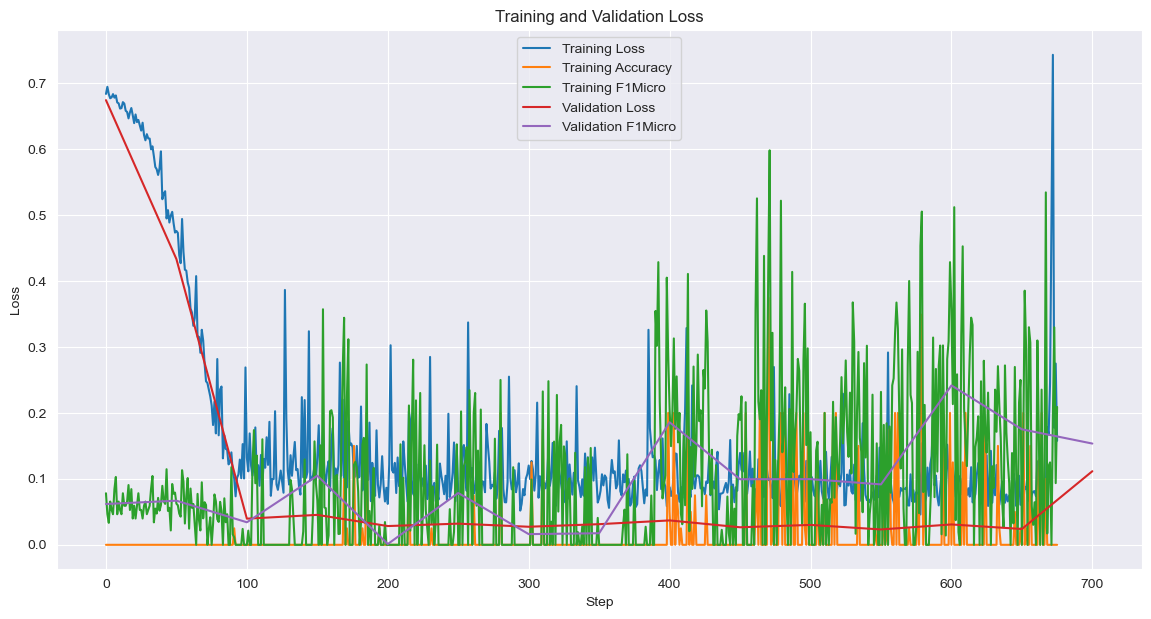

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_f1_micors, label='Training F1Micro')

plt.plot(range(0, 750, 50), val_losses, label='Validation Loss')
plt.plot(range(0, 750, 50), val_f1micro, label='Validation F1Micro')

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
def load_frozen_model(pb_path):
    with tf.gfile.GFile(pb_path, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

graph = load_frozen_model("fine_tuned_43_genres_with_val_vggish_model_multilabel.pb")
print("Frozen model loaded successfully!")

Frozen model loaded successfully!


In [21]:
(features, labels, file_paths, genres) = _get_examples_batch_test(test_df)

  6%|▋         | 59/924 [00:42<10:16,  1.40it/s]


KeyboardInterrupt: 

In [13]:
(features, labels) = _get_examples_batch_validation(val_df)


100%|██████████| 712/712 [06:47<00:00,  1.75it/s]


In [22]:
print(len(features))

NameError: name 'features' is not defined

In [18]:
print(labels[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
features[0].shape

(96, 64)

In [24]:
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classify(features, graph):
    with tf.Session(graph=graph) as sess:
        # Get input and output tensors
        input_tensor = graph.get_tensor_by_name(vggish_params.INPUT_TENSOR_NAME)  # Change as needed
        output_tensor = graph.get_tensor_by_name("mymodel/prediction:0")  # Change as needed

        # Run the model and get predictions
        predictions = sess.run(output_tensor, feed_dict={input_tensor: features})
        # print(predictions)
    # Take the maximum value for each prediction
    max_predictions = np.argmax(predictions, axis=1)
    return max_predictions, predictions

def calculate_metrics(predictions, labels):
    # Apply argmax to labels
    max_labels = np.argmax(labels, axis=1)
    print("Max labels: ", max_labels[0])
    # Calculate metrics
    accuracy = accuracy_score(max_labels, predictions)
    precision = precision_score(max_labels, predictions, average='micro', zero_division=1)
    precision_for_each_class = precision_score(max_labels, predictions, average=None, zero_division=1)
    recall = recall_score(max_labels, predictions, average='micro', zero_division=1)
    f1 = f1_score(max_labels, predictions, average='micro', zero_division=1)

    return accuracy, precision, precision_for_each_class, recall, f1

# Run inference
preds, predictions_probs = classify(features, graph)
print("Done classifying!")



Done classifying!


In [18]:
print(len(preds))

5696


In [41]:
print(preds)
print(predictions_probs[0])

[ 3  1  3 ...  1 87  3]
[9.0618944e-03 2.1272969e-02 8.8895028e-03 2.2165138e-02 6.1445534e-03
 9.2842318e-03 1.4245592e-03 2.1257415e-02 1.0574299e-02 6.2070959e-03
 4.9153990e-03 1.1793415e-02 3.5039729e-03 8.1828311e-03 4.1887928e-03
 2.1025266e-03 3.2573256e-03 8.1430860e-03 3.6210506e-03 4.7108247e-03
 1.0267308e-02 3.1714314e-03 5.6473734e-03 1.0136870e-02 1.4192901e-02
 5.5529261e-03 2.0371575e-05 6.6208922e-05 4.0493179e-03 5.2746921e-03
 6.5913135e-03 3.4821830e-03 1.1620138e-02 8.4008854e-03 6.0519865e-03
 5.1020565e-03 3.5178177e-03 1.3203859e-02 3.0768865e-03 3.8669107e-03
 2.7896303e-03 1.4155468e-02 2.7390599e-04 2.3301614e-03 3.1034595e-03
 1.6955240e-02 1.3375415e-02 9.6884808e-03 1.3524105e-02 5.2662045e-08
 3.8963469e-04 3.2249585e-04 1.6074570e-02 8.4874500e-03 3.6784601e-03
 5.1075714e-03 2.2085106e-03 5.2333330e-03 4.1933893e-03 3.0490784e-03
 8.5159475e-03 4.4675148e-03 1.0139679e-02 1.0963858e-02 5.8621420e-03
 2.5001408e-03 4.8245060e-05 1.3880876e-02 3.9055226e

In [25]:
# Calculate and print metrics
accuracy, precision,precision_for_each_class, recall, f1 = calculate_metrics(preds, labels)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Precision for each class: {precision_for_each_class}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Max labels:  51
Accuracy: 0.020377254577998074
Precision: 0.8138663302299538
Precision for each class: [1.         0.03147208 1.         0.01275917 1.         1.
 1.         0.         0.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.28125    0.
 0.         1.         1.         1.         0.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.01707048 1.         1.
 1.         1.         1.         0.875      1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         0.01052632 1.         1.
 1.         

In [27]:
# Create a mapping of positive_class_index to genre
genre_mapping = df[['first_genre', 'positive_class_index']].drop_duplicates().sort_values('positive_class_index')

# Display the mapping
genre_mapping

first_genre  positive_class_index
204         acoustic pop                     0
110      adult standards                     1
16            album rock                     2
164                alt z                     3
166  alternative country                     4
..                   ...                   ...
228            reggaeton                   123
354                salsa                   124
91                 sleep                   125
80             soft rock                   126
158            vallenato                   127

[128 rows x 2 columns]

In [33]:
import pandas as pd
import numpy as np

# Create a DataFrame with file paths, labels, and predictions
print("Creating DataFrame with probs...")
data = {
    'file_path': file_paths,
    'genre': genres,
    'label': labels,
    'prediction': preds,
    'prediction_probabilities': predictions_probs.tolist()
}
df = pd.DataFrame(data)

# Create a dictionary for mapping
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Add a column that maps predictions to genres
df['predicted_genre'] = df['prediction'].map(genre_dict)

# Add a column with the index of the maximum label
df['max_label_index'] = df['label'].apply(np.argmax)

df

Creating DataFrame with probs...


file_path                 genre  \
0     ../mp3songs/spotify_dataset_stratified_first_g...  contemporary country   
1     ../mp3songs/spotify_dataset_stratified_first_g...     alternative metal   
2     ../mp3songs/spotify_dataset_stratified_first_g...       baton rouge rap   
3     ../mp3songs/spotify_dataset_stratified_first_g...           chicago rap   
4     ../mp3songs/spotify_dataset_stratified_first_g...           chamber pop   
...                                                 ...                   ...   
7258  ../mp3songs/spotify_dataset_stratified_first_g...               grupera   
7259  ../mp3songs/spotify_dataset_stratified_first_g...         environmental   
7260  ../mp3songs/spotify_dataset_stratified_first_g...                   emo   
7261  ../mp3songs/spotify_dataset_stratified_first_g...           atl hip hop   
7262  ../mp3songs/spotify_dataset_stratified_first_g...       adult standards   

                                                  label  prediction  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           3   
1     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...           1   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           3   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          63   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          87   
...                                                 ...         ...   
7258  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          63   
7259  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         108   
7260  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           1   
7261  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...          87   
7262  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           3   

                               prediction_probabilities     predicted_genre  \
0     [0.009061894379556179, 0.021272968500852585, 0...               alt z   
1     [0.009918978437781334, 0.02369345910847187, 0....     adult standards   
2     [0.013314958661794662, 0.014533448964357376, 0...               alt z   
3     [0.014591106213629246, 0.012375966645777225, 0...  east coast hip hop   
4     [0.012353897094726562, 0.02048420161008835, 0....       indie pop rap   
...                                                 ...                 ...   
7258  [0.013947687111794949, 0.016536859795451164, 0...  east coast hip hop   
7259  [0.013476223684847355, 0.033374007791280746, 0...        new romantic   
7260  [0.010610425844788551, 0.02994132600724697, 0....     adult standards   
7261  [0.012813805602490902, 0.013662219978868961, 0...       indie pop rap   
7262  [0.011649479158222675, 0.019637320190668106, 0...               alt z   

      max_label_index  
0                  51  
1                   8  
2                  20  
3                  37  
4                  35  
...               ...  
7258               80  
7259               69  
7260               67  
7261               14  
7262                1  

[7263 rows x 7 columns]

In [25]:
df.head(1)

file_path          genre  \
0  ../mp3songs/spotify_dataset_stratified_first_g...  latin hip hop   

                                               label  prediction  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          63   

                            prediction_probabilities     predicted_genre  
0  [0.01161882933229208, 0.01189463771879673, 0.0...  east coast hip hop

In [37]:
import pandas as pd

# Assuming df is your DataFrame with 'file_path', 'predicted_genre', 'genre', 'prediction', 'prediction_probabilities', and 'max_label_index' columns
# Create a dictionary for mapping class indices to genres
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Expand the prediction_probabilities into separate columns
probabilities_df = pd.DataFrame(df['prediction_probabilities'].tolist(), index=df['file_path'])

# Rename the columns to indicate genre probabilities
probabilities_df.columns = [genre_dict[i] for i in range(probabilities_df.shape[1])]

# Reset the index to include file_path as a column
probabilities_df.reset_index(inplace=True)

# Add the genre, prediction, predicted_genre, and max_label_index columns
probabilities_df.insert(1, 'predicted_genre', df['predicted_genre'].values)
probabilities_df.insert(2, 'true_genre', df['genre'].values)
probabilities_df.insert(3, 'prediction_class_index', df['prediction'].values)
probabilities_df.insert(4, 'true_class_index', df['max_label_index'].values)

# Display the DataFrame
probabilities_df

file_path     predicted_genre  \
0     ../mp3songs/spotify_dataset_stratified_first_g...               alt z   
1     ../mp3songs/spotify_dataset_stratified_first_g...     adult standards   
2     ../mp3songs/spotify_dataset_stratified_first_g...               alt z   
3     ../mp3songs/spotify_dataset_stratified_first_g...  east coast hip hop   
4     ../mp3songs/spotify_dataset_stratified_first_g...       indie pop rap   
...                                                 ...                 ...   
7258  ../mp3songs/spotify_dataset_stratified_first_g...  east coast hip hop   
7259  ../mp3songs/spotify_dataset_stratified_first_g...        new romantic   
7260  ../mp3songs/spotify_dataset_stratified_first_g...     adult standards   
7261  ../mp3songs/spotify_dataset_stratified_first_g...       indie pop rap   
7262  ../mp3songs/spotify_dataset_stratified_first_g...               alt z   

                true_genre  prediction_class_index  true_class_index  \
0     contemporary country                       3                51   
1        alternative metal                       1                 8   
2          baton rouge rap                       3                20   
3              chicago rap                      63                37   
4              chamber pop                      87                35   
...                    ...                     ...               ...   
7258               grupera                      63                80   
7259         environmental                     108                69   
7260                   emo                       1                67   
7261           atl hip hop                      87                14   
7262       adult standards                       3                 1   

      acoustic pop  adult standards  album rock     alt z  \
0         0.009062         0.021273    0.008890  0.022165   
1         0.009919         0.023693    0.011024  0.021310   
2         0.013315         0.014533    0.008269  0.032109   
3         0.014591         0.012376    0.010236  0.035731   
4         0.012354         0.020484    0.010773  0.023966   
...            ...              ...         ...       ...   
7258      0.013948         0.016537    0.010415  0.030607   
7259      0.013476         0.033374    0.016890  0.028310   
7260      0.010610         0.029941    0.010056  0.022983   
7261      0.012814         0.013662    0.009226  0.026960   
7262      0.011649         0.019637    0.009369  0.024325   

      alternative country  ...  pov: indie      punk       r&b  reggae fusion  \
0                0.006145  ...    0.003737  0.003526  0.010171       0.006904   
1                0.007625  ...    0.005315  0.003468  0.011459       0.007792   
2                0.005499  ...    0.003712  0.001586  0.008219       0.014028   
3                0.005952  ...    0.003835  0.001474  0.010678       0.027608   
4                0.007316  ...    0.004773  0.003131  0.012068       0.010888   
...                   ...  ...         ...       ...       ...            ...   
7258             0.005697  ...    0.004663  0.002128  0.008762       0.016990   
7259             0.012416  ...    0.008403  0.008277  0.015539       0.008850   
7260             0.006574  ...    0.004432  0.004941  0.009691       0.005259   
7261             0.005694  ...    0.003283  0.001877  0.011322       0.018963   
7262             0.006602  ...    0.004255  0.002517  0.011031       0.009276   

      reggae rock  reggaeton     salsa     sleep  soft rock  vallenato  
0        0.000893   0.005060  0.004628  0.004219   0.006530   0.002010  
1        0.001061   0.006617  0.005572  0.004824   0.007940   0.002931  
2        0.001224   0.005533  0.002914  0.001695   0.007066   0.002546  
3        0.001463   0.008178  0.002647  0.001548   0.007377   0.004939  
4        0.001191   0.008551  0.004856  0.003881   0.007294   0.003425  
...           ...        ...       ...       ...        ...        ...  
7258     0.0012

#TODO tu sa opytat bednara ze ako. Ci to zgrupim pre kazdy frame (8) a tak zoradim a vyhodnotim alebo ako ale celkovo slabe pravdepodobnosti mam

In [39]:
# Select the first row
first_row = probabilities_df.iloc[0]

# Exclude the 'file_path' and 'predicted_genre' columns to get only genre values
genre_values = first_row.drop(['file_path', 'predicted_genre','true_genre', 'prediction_class_index', 'true_class_index'])

# Display the genre values
genre_values

acoustic pop           0.009062
adult standards        0.021273
album rock              0.00889
alt z                  0.022165
alternative country    0.006145
                         ...   
reggaeton               0.00506
salsa                  0.004628
sleep                  0.004219
soft rock               0.00653
vallenato               0.00201
Name: 0, Length: 128, dtype: object

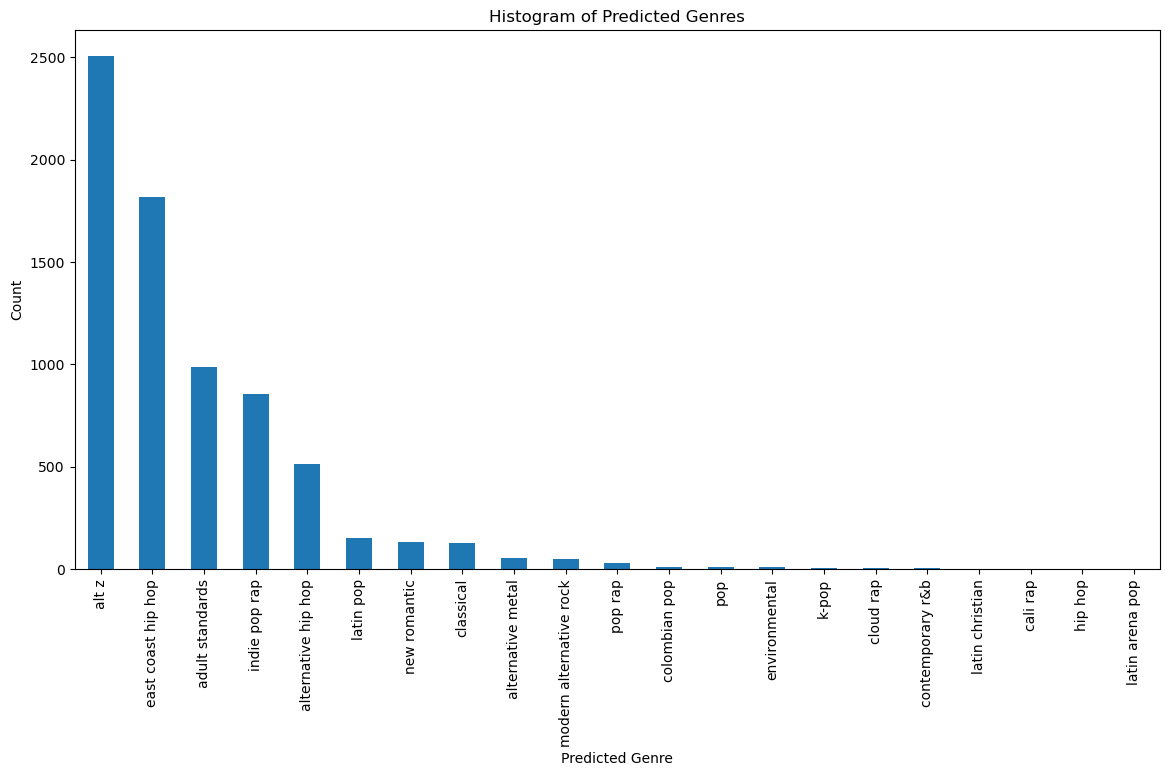

In [40]:
import matplotlib.pyplot as plt

# Plot the histogram of the count of predicted genres
plt.figure(figsize=(14, 7))
df['predicted_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Predicted Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()